<a href="https://colab.research.google.com/github/beimnet777/coffee_disease_image_segmentation/blob/main/leaf_disease_segmention_lara2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [ ]:
!pip install -U -q segmentation-models

In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
def mask_preparation(image):

  lower_red=np.array([0,0,250])
  upper_red=np.array([0,0,255])

  mask = cv2.inRange(image, lower_red, upper_red)

 

  mask[mask > 0] = 255

  mask[mask == 0] = 0


  return mask

In [ ]:
def prepare_dataset(mask_path,image_path):
  images = []
  masks = [] 
        
  for root,dirs,files in os.walk(mask_path):
      for file in files:
          image_path_=os.path.join(image_path,file.split("_")[0]+".jpg")
          img = cv2.imread(image_path_)  

          img = cv2.resize(img, (512, 256))
          img=img.astype(np.float32)
          img/=255
          images.append(img)

          mask_path_=os.path.join(mask_path,file)
          mask = cv2.imread(mask_path_)

          mask = cv2.resize(mask, (512,256))
          cv2_imshow(mask)
          mask=mask_preparation(mask)
          cv2_imshow(mask)
          mask=np.expand_dims(mask,axis=-1)
          mask//=255
          masks.append(mask.astype(np.float32))   
  masks = np.array(masks)
  images = np.array(images)
  return images,masks

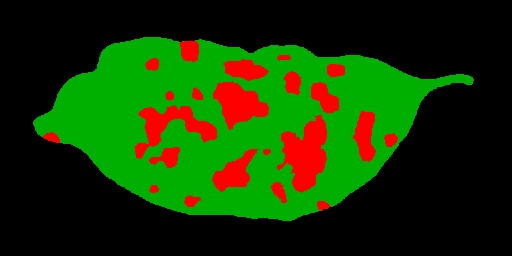

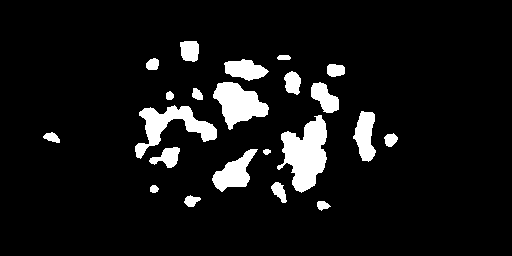

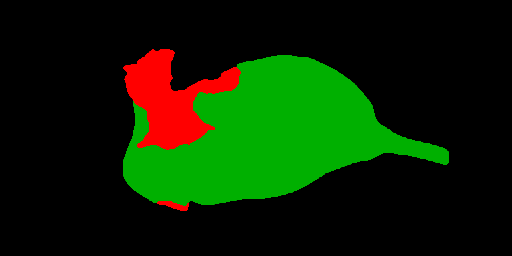

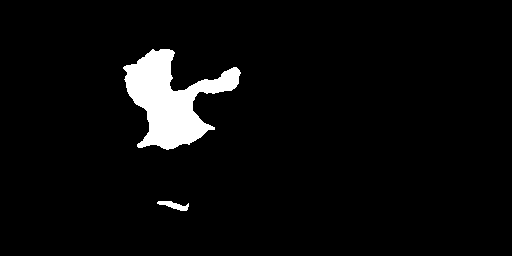

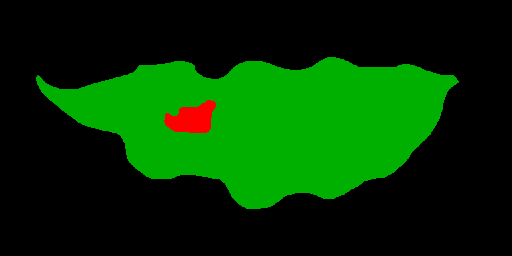

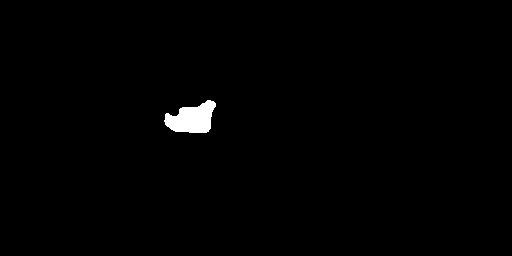

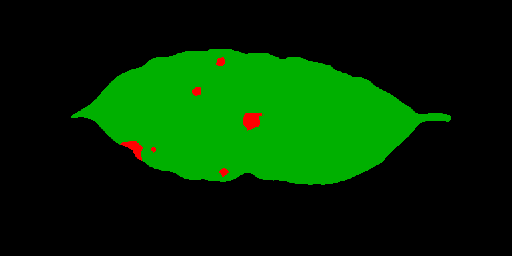

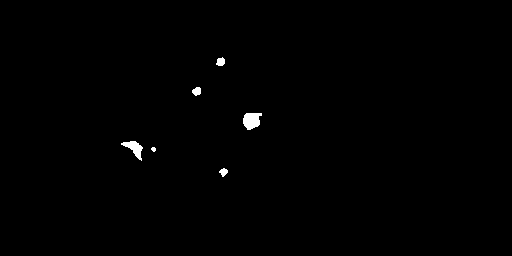

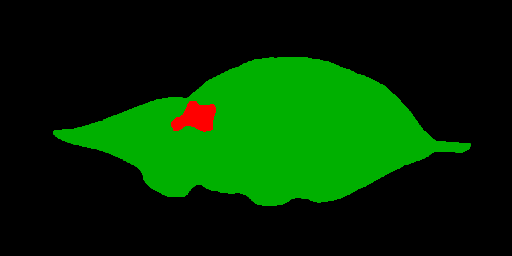

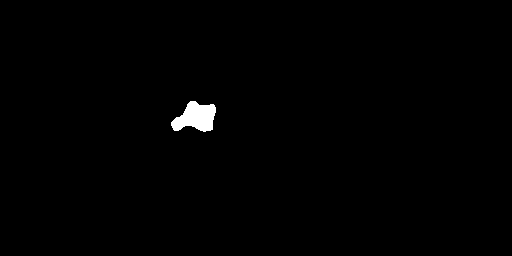

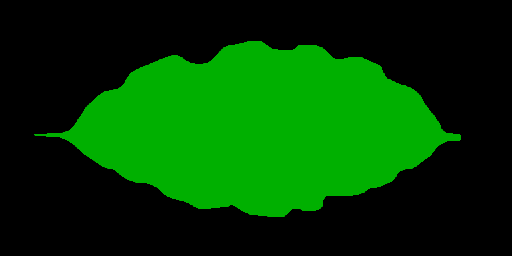

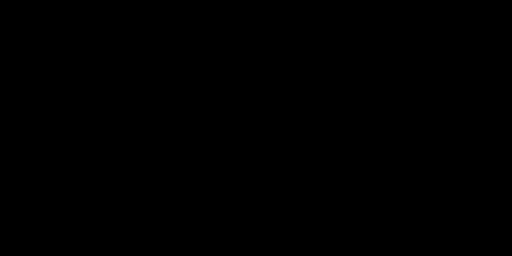

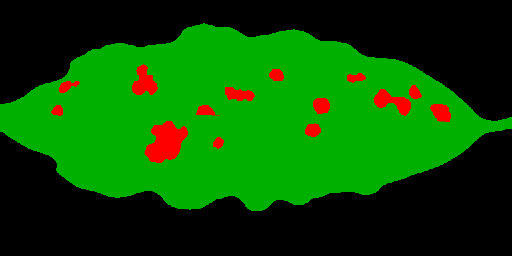

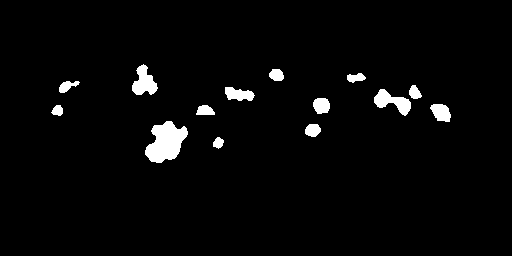

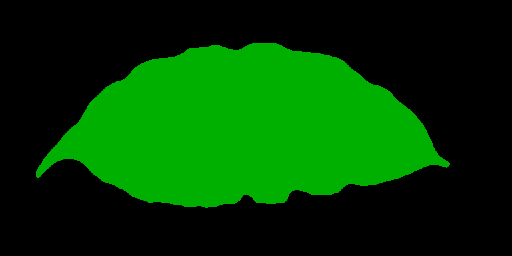

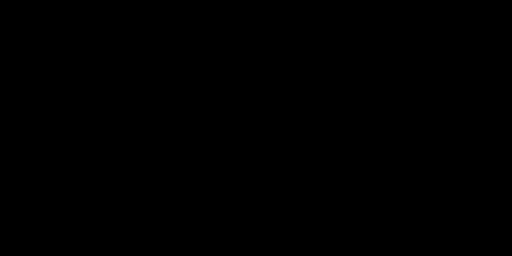

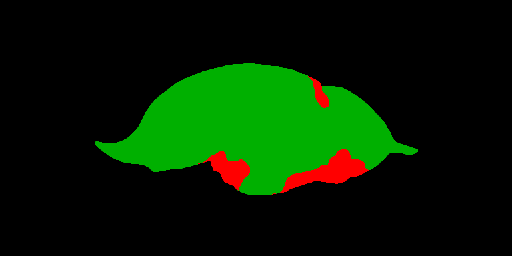

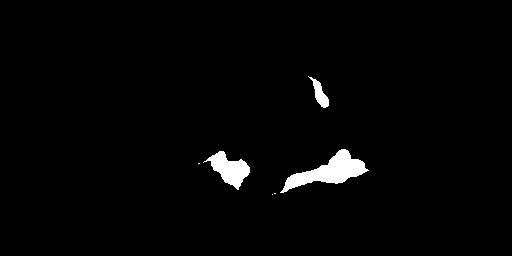

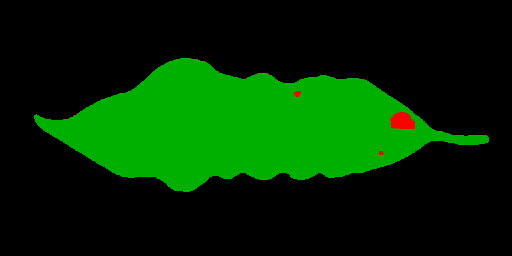

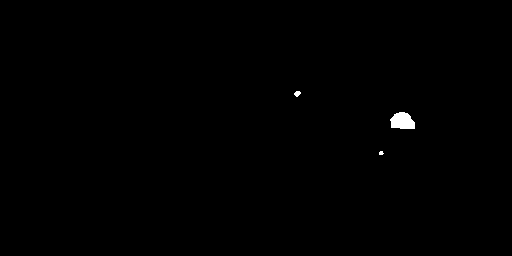

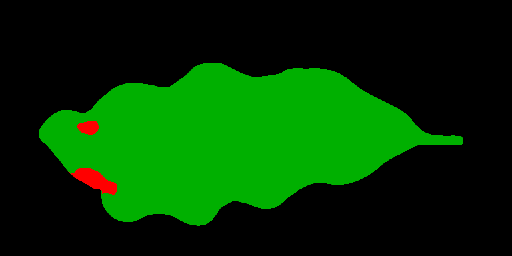

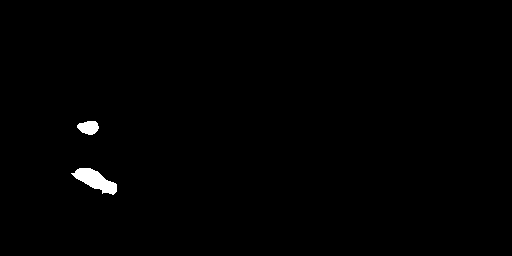

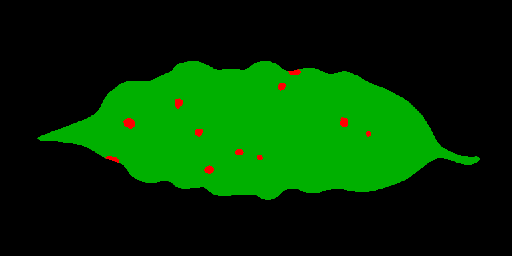

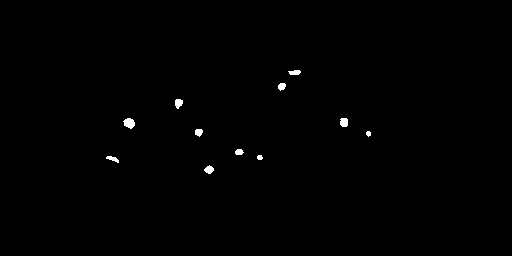

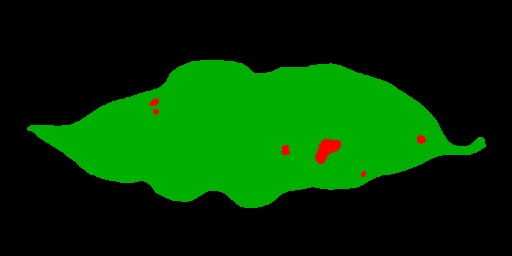

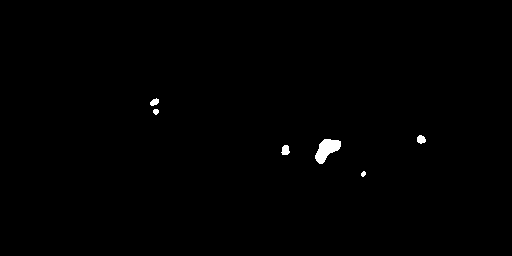

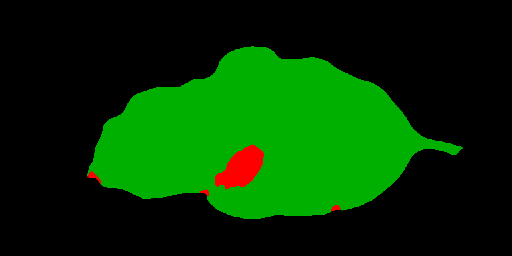

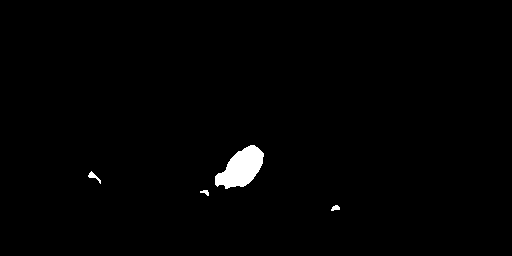

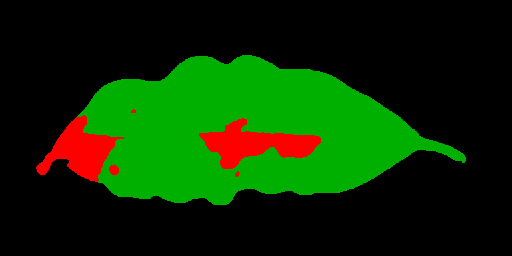

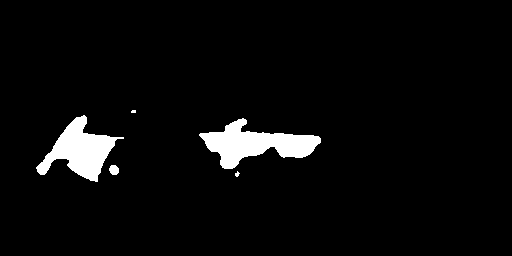

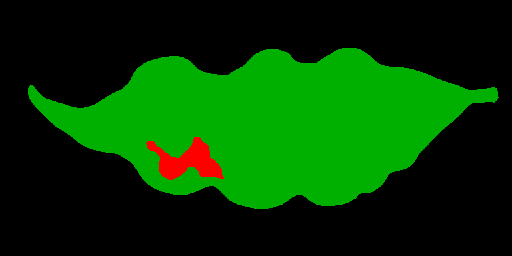

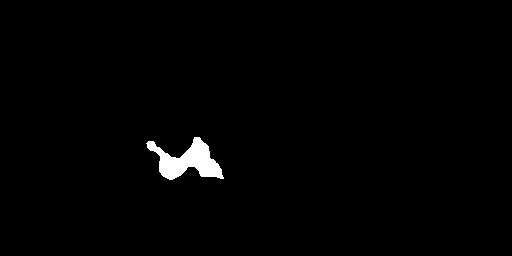

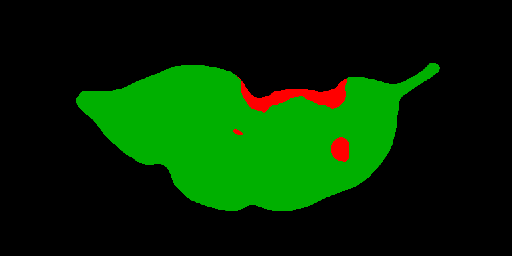

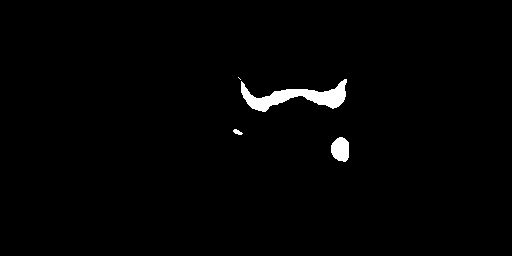

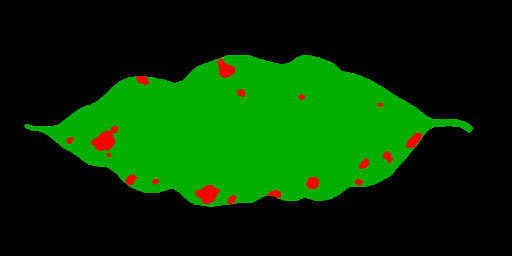

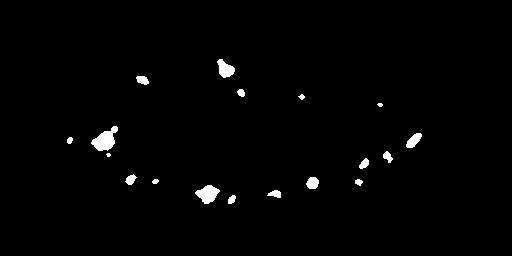

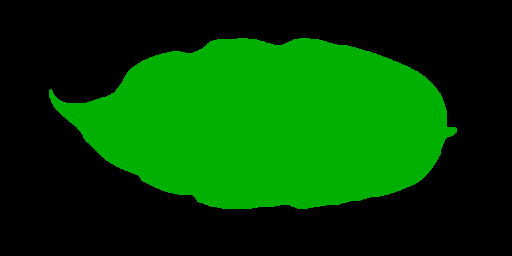

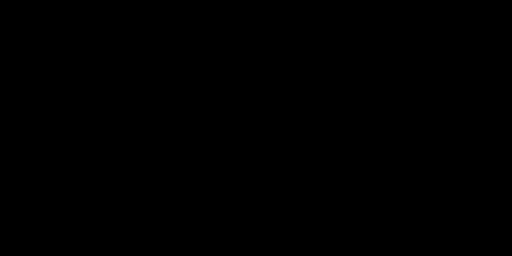

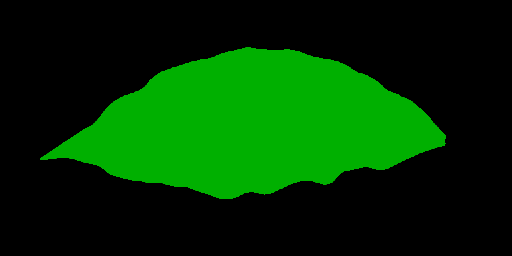

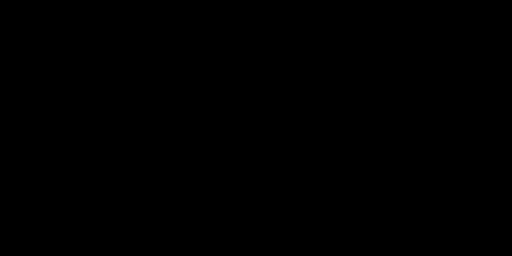

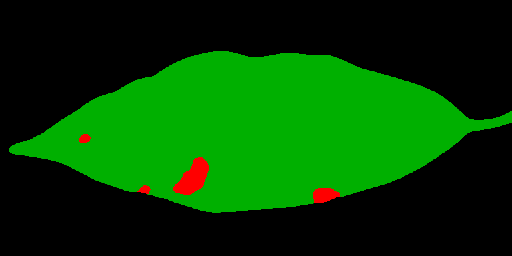

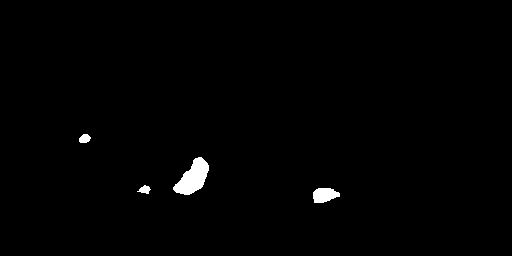

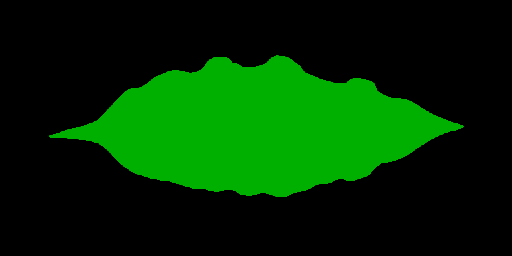

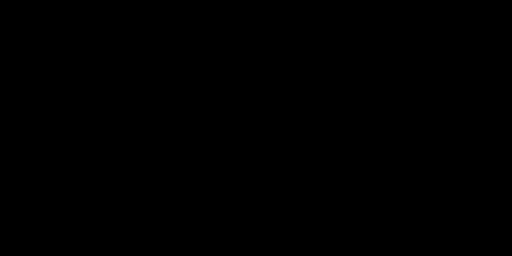

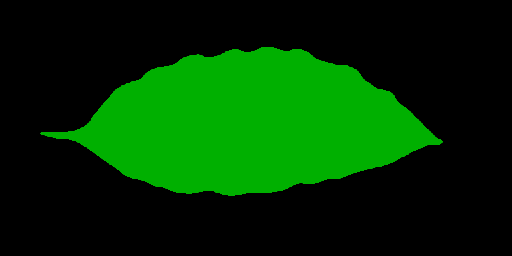

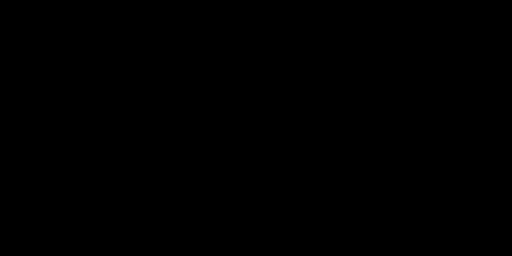

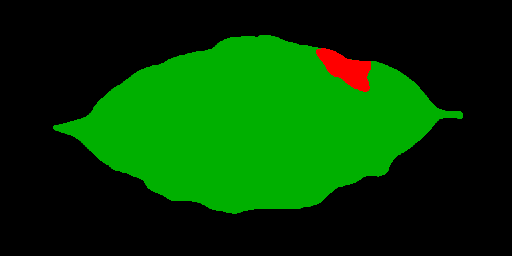

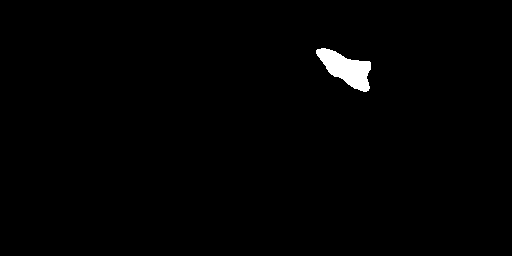

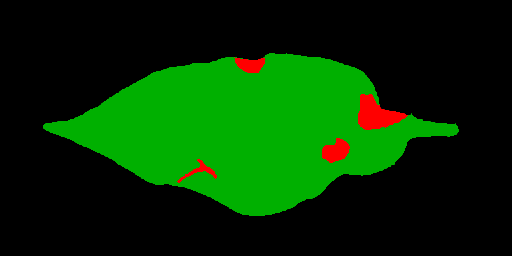

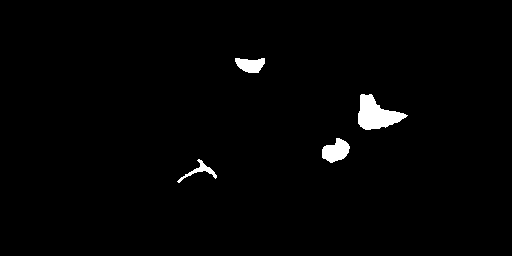

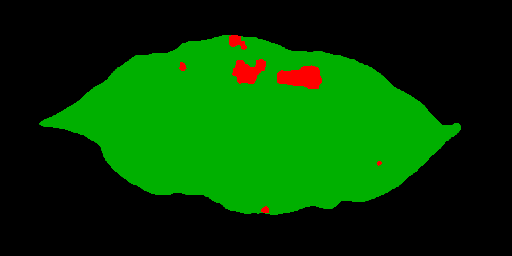

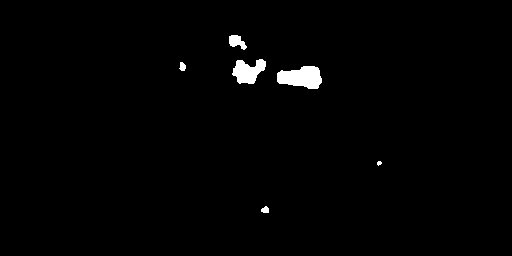

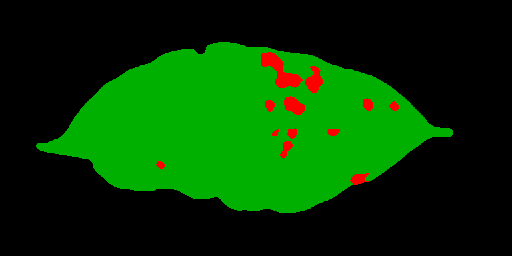

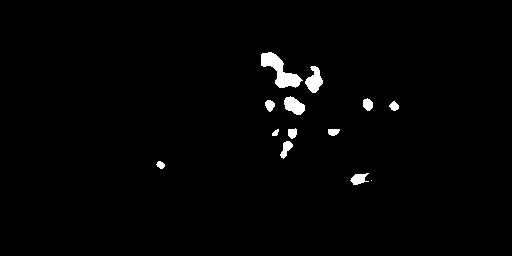

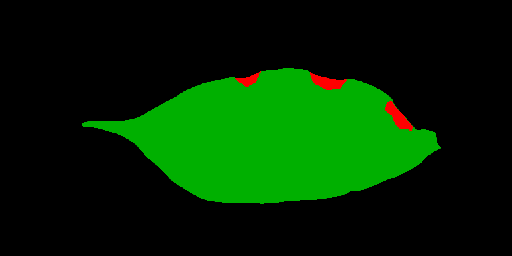

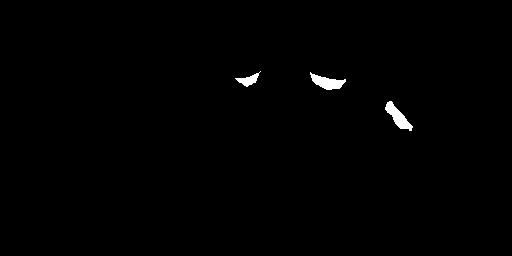

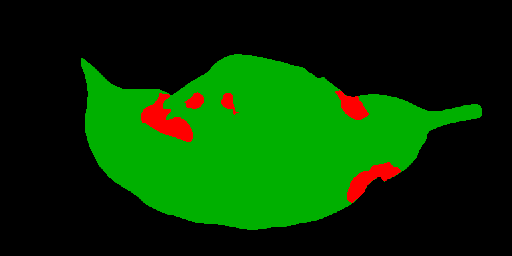

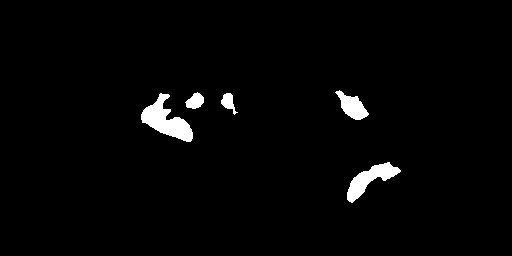

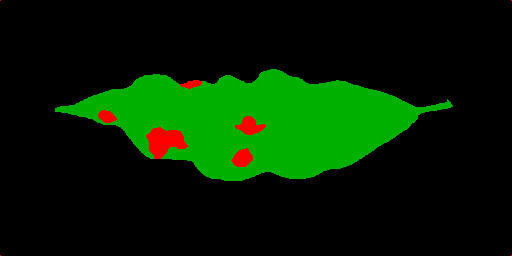

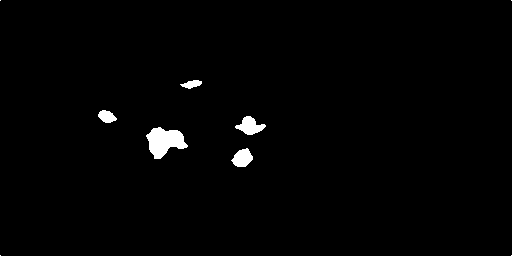

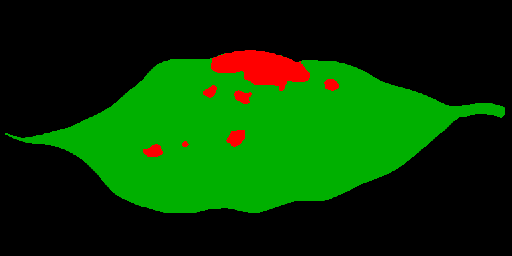

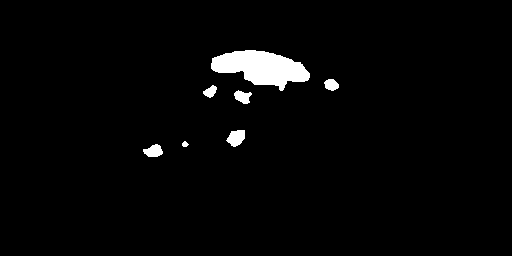

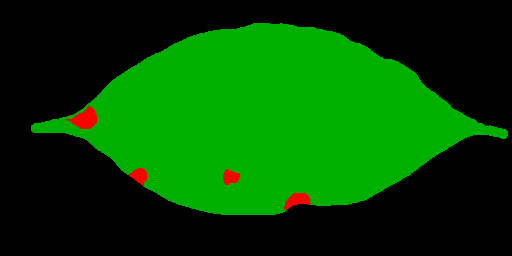

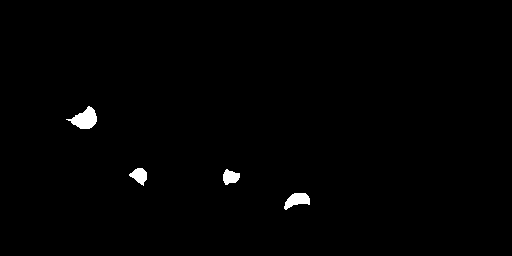

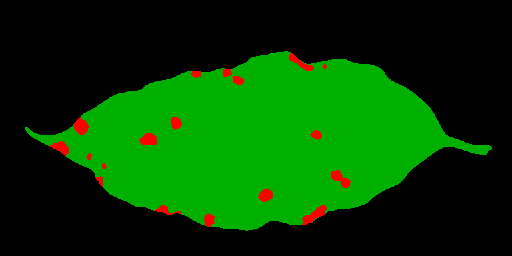

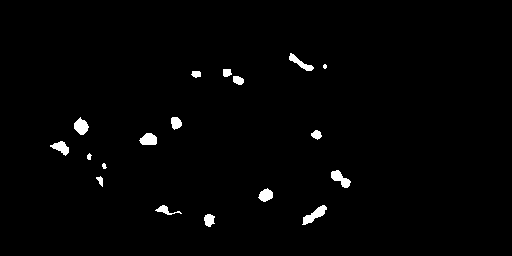

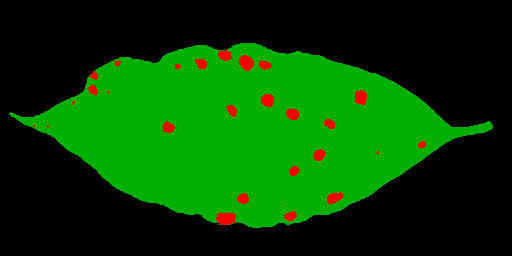

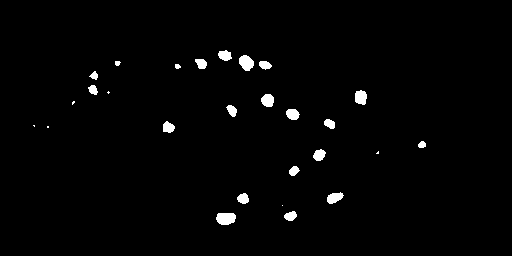

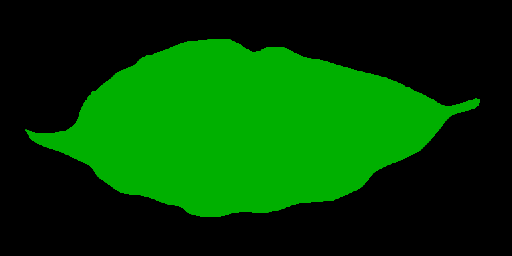

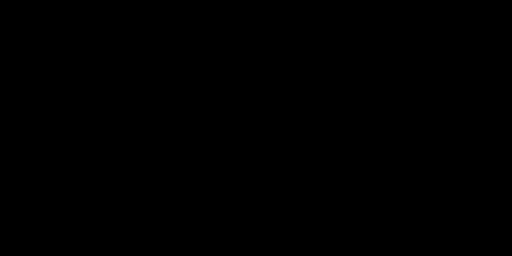

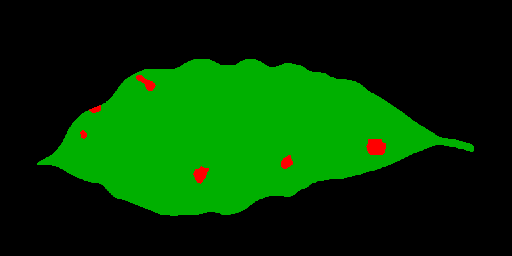

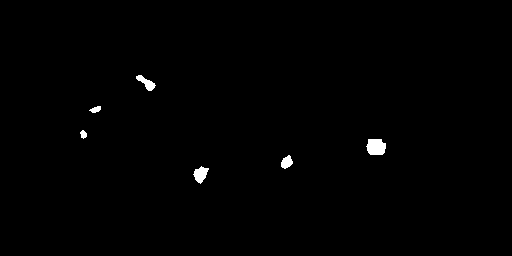

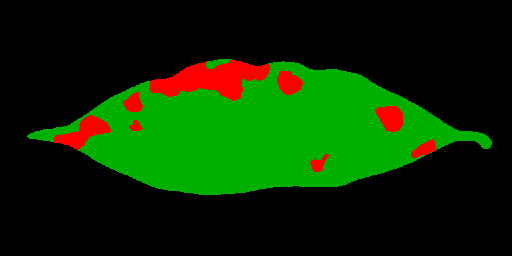

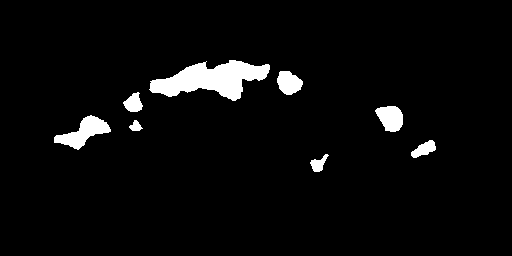

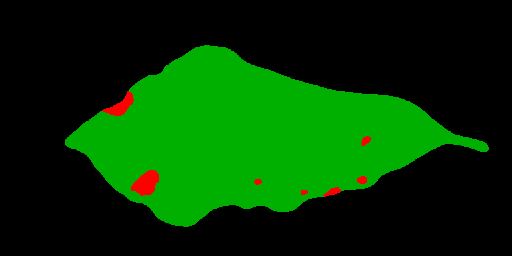

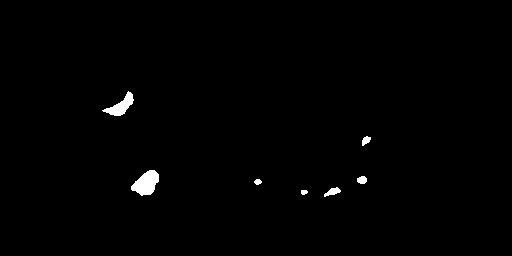

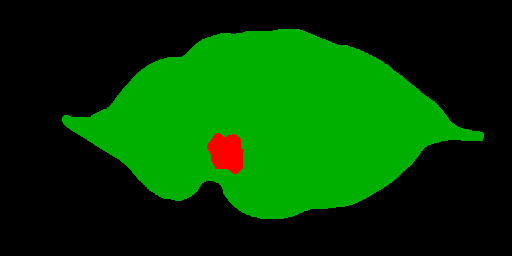

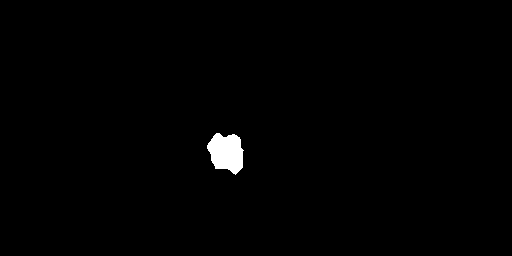

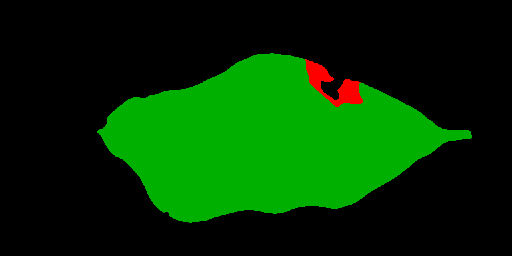

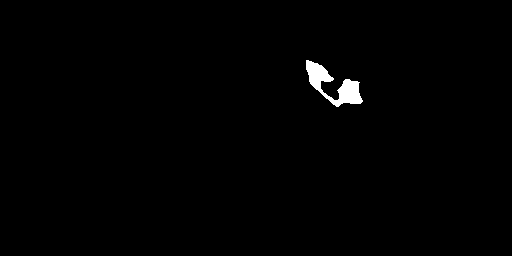

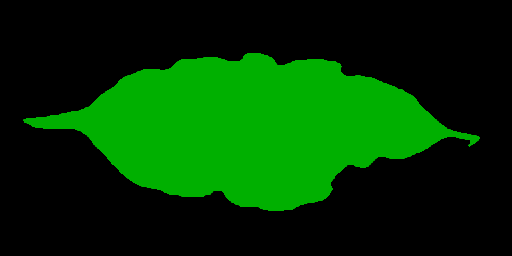

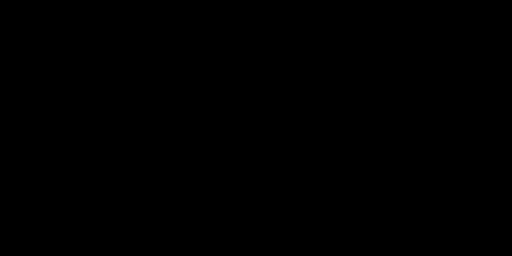

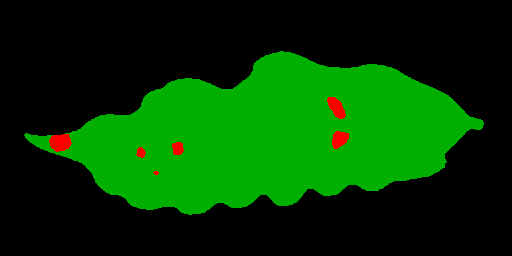

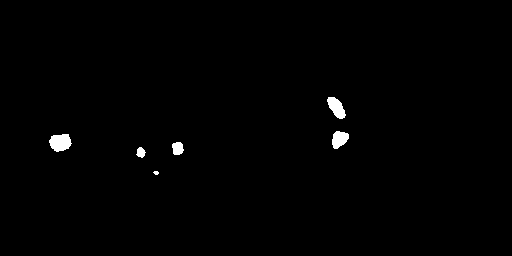

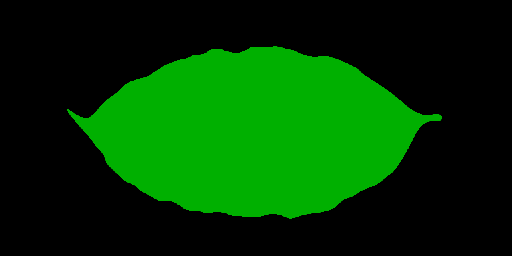

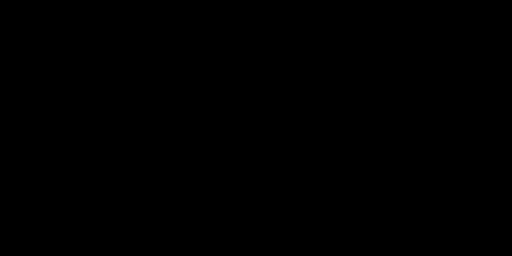

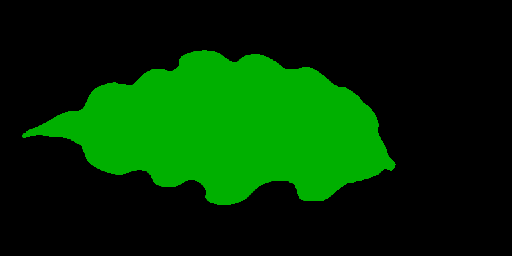

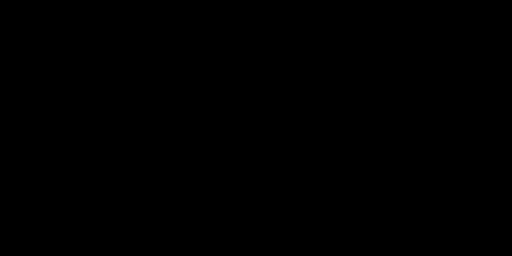

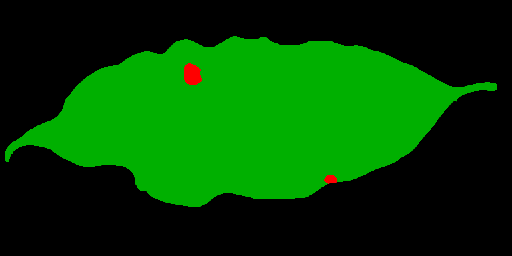

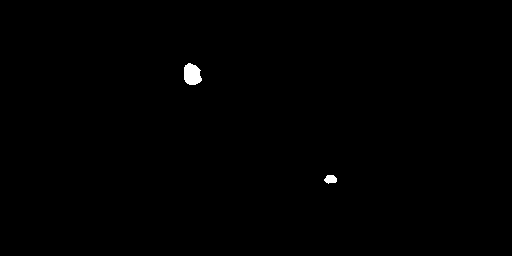

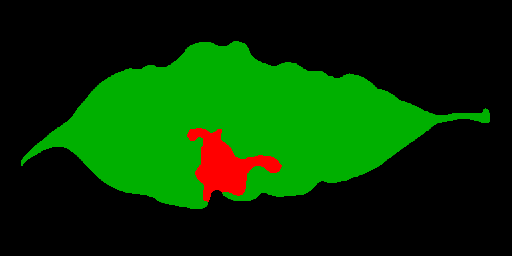

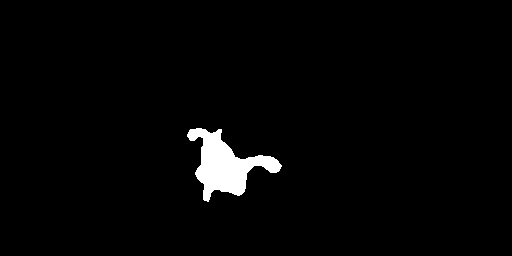

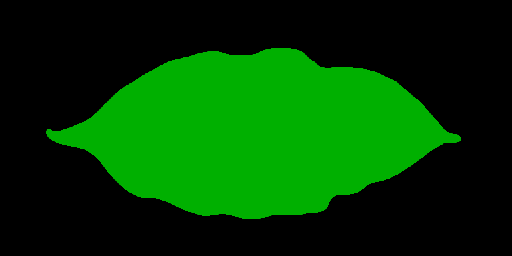

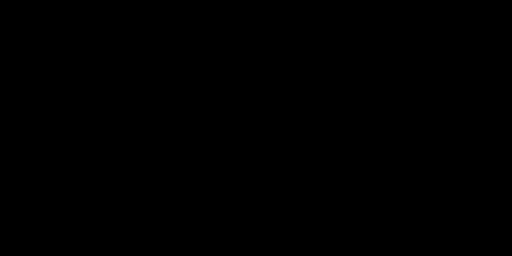

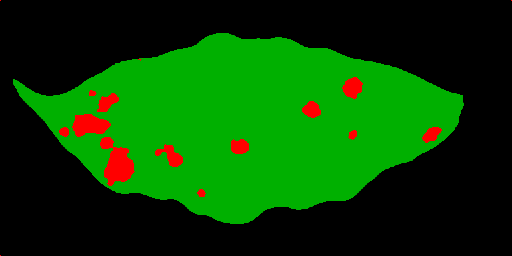

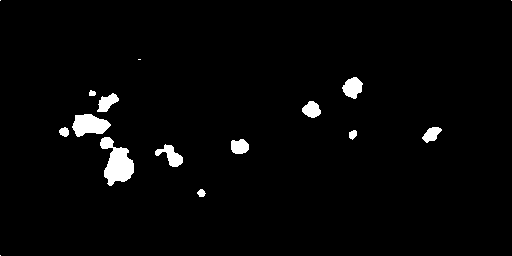

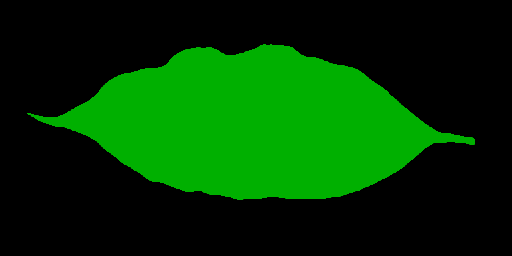

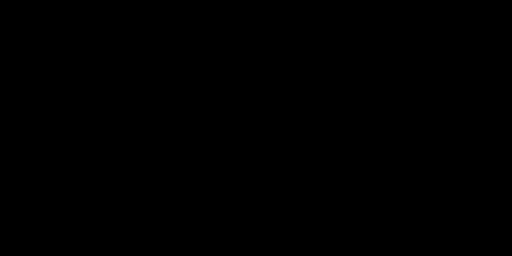

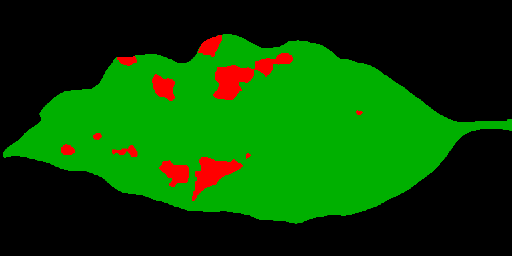

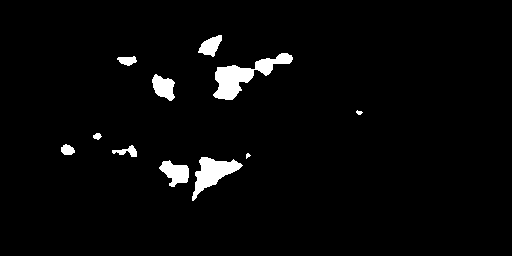

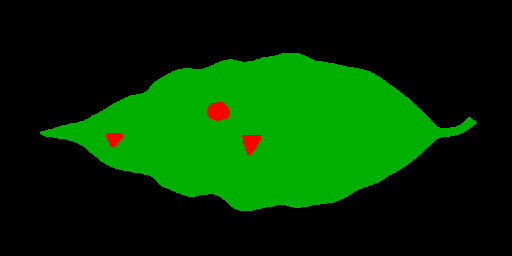

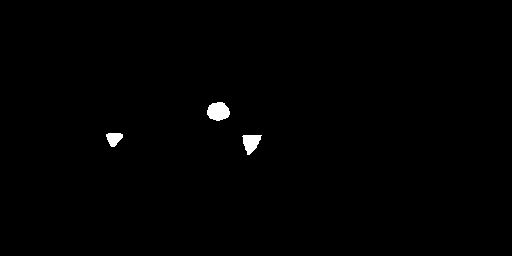

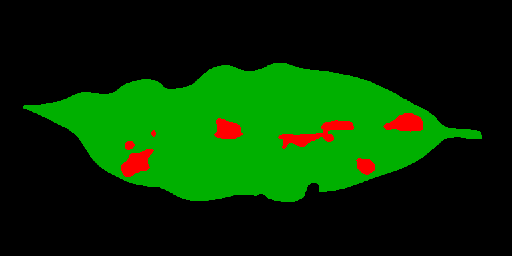

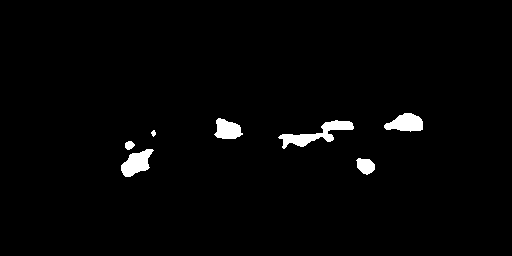

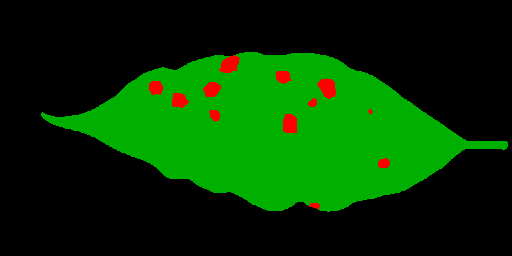

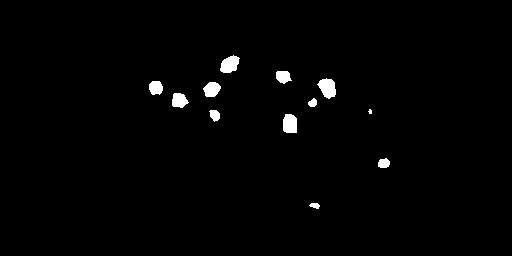

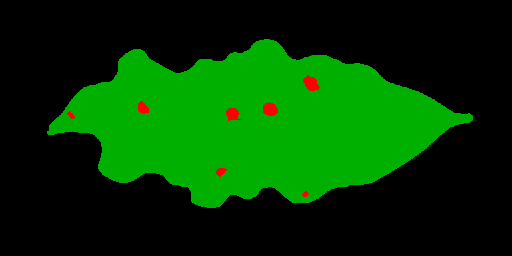

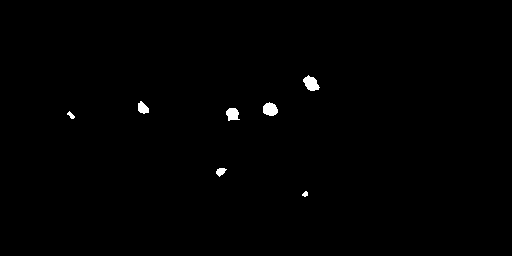

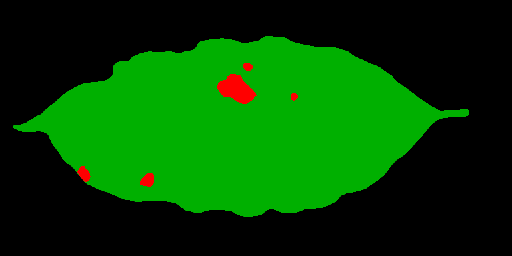

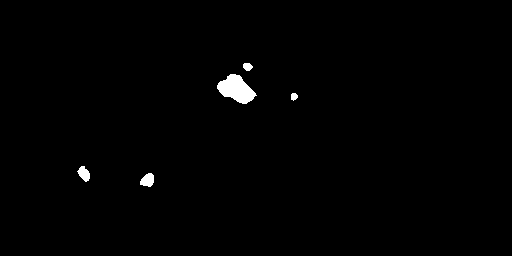

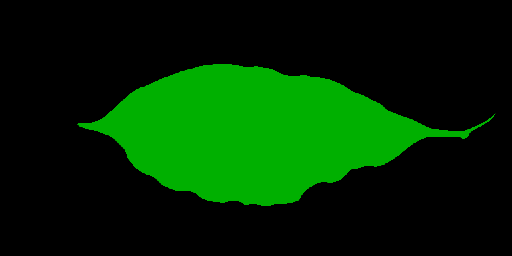

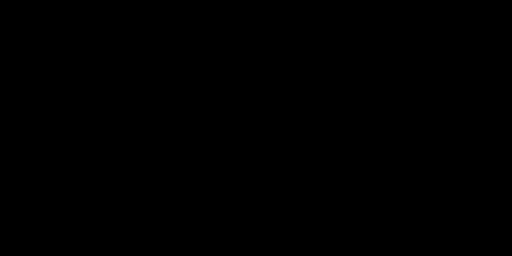

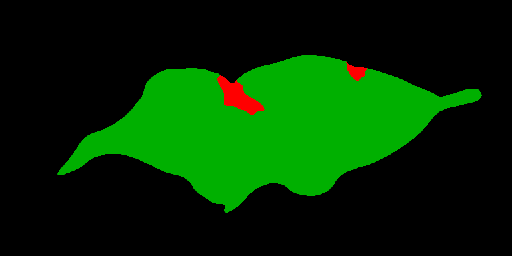

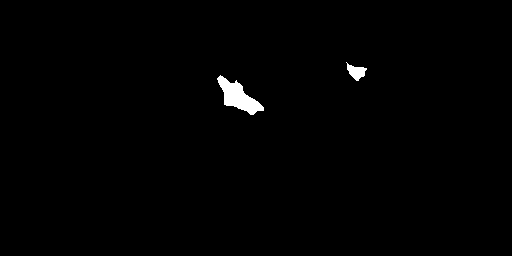

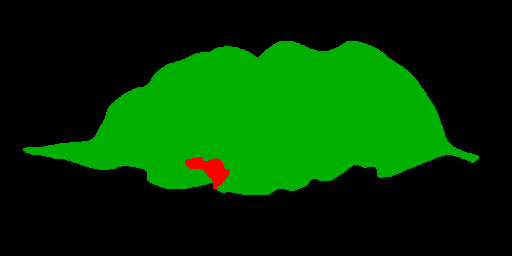

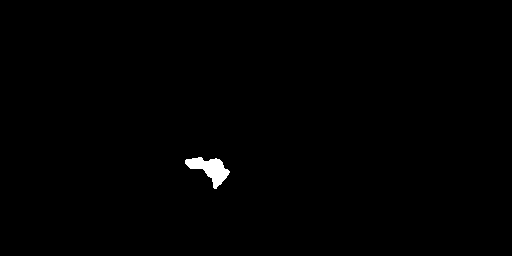

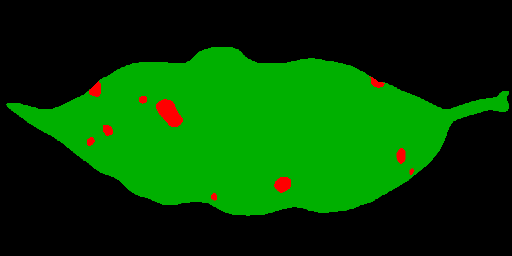

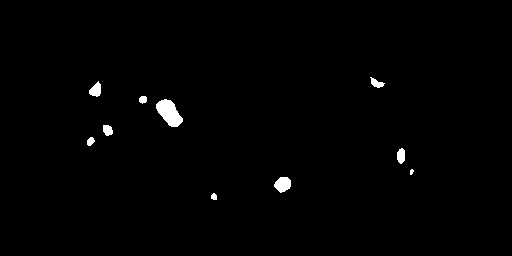

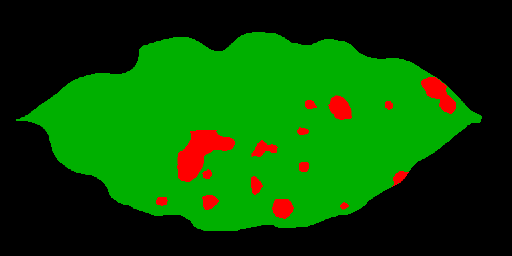

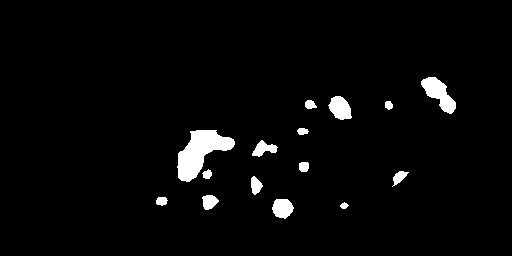

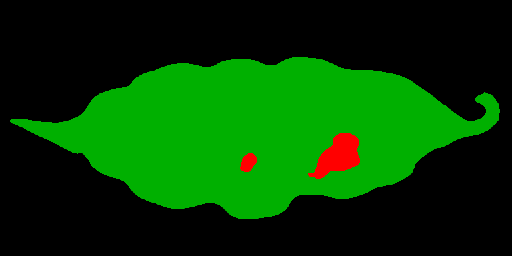

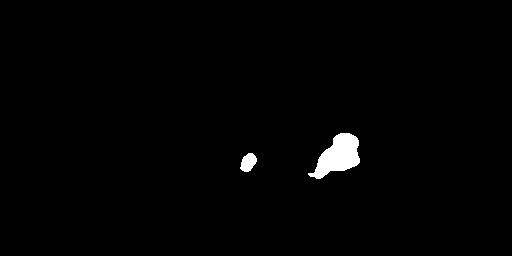

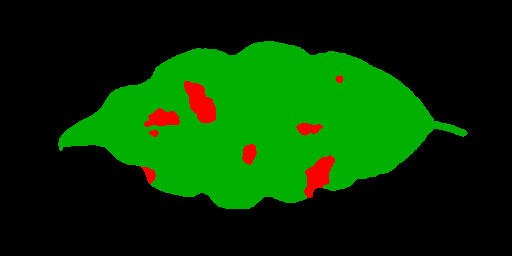

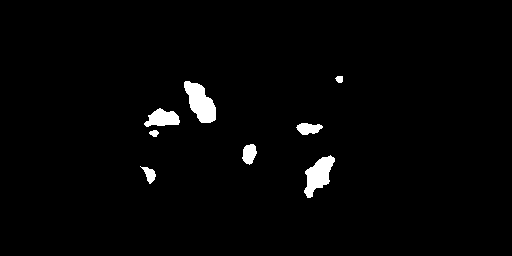

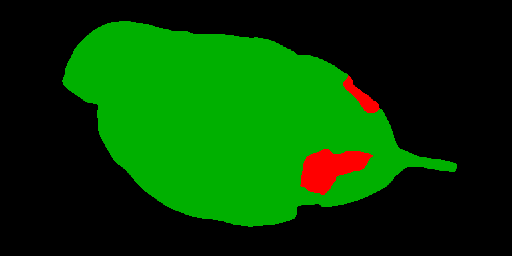

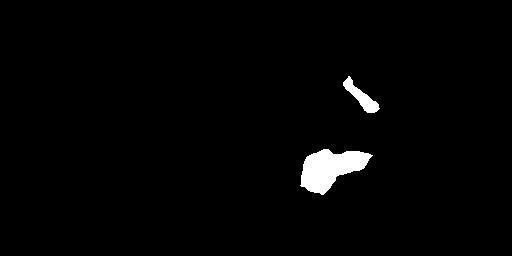

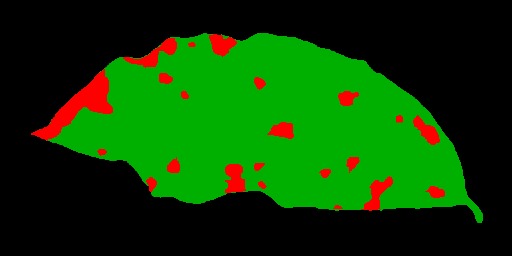

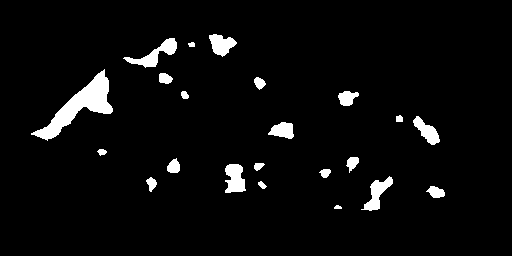

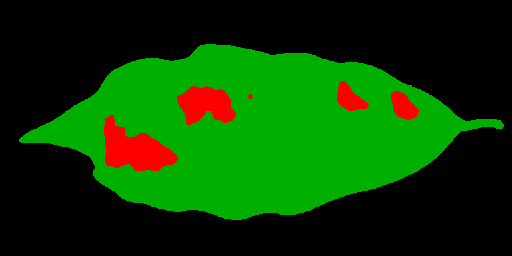

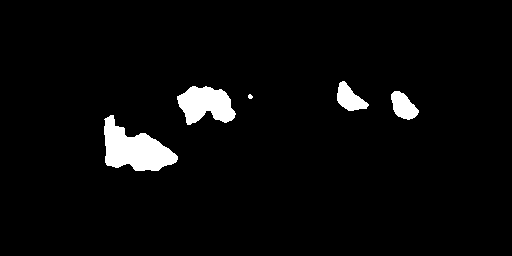

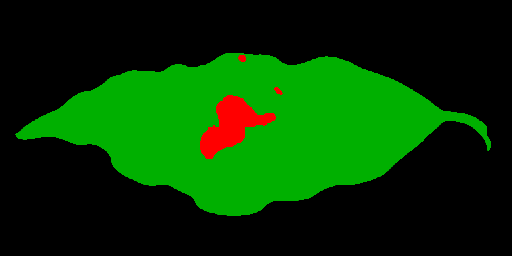

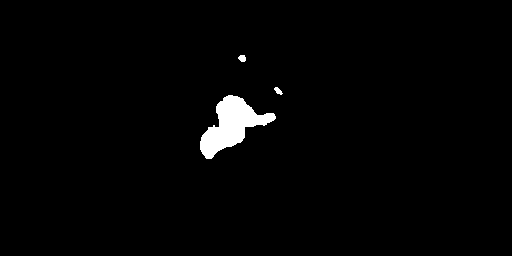

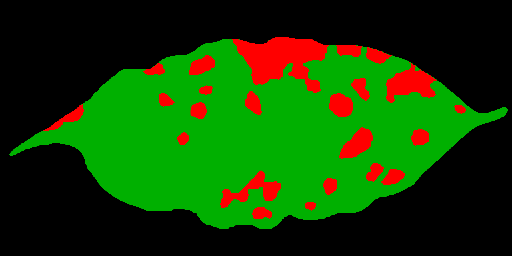

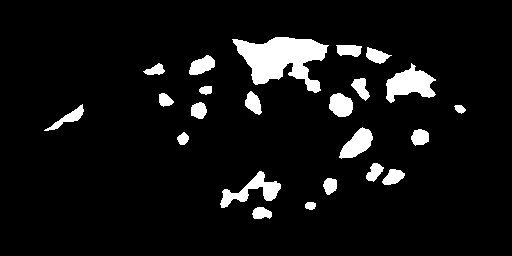

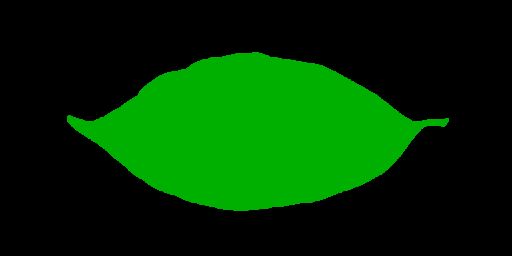

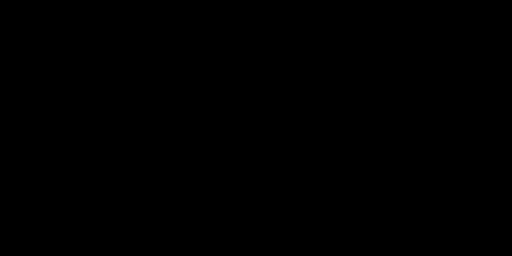

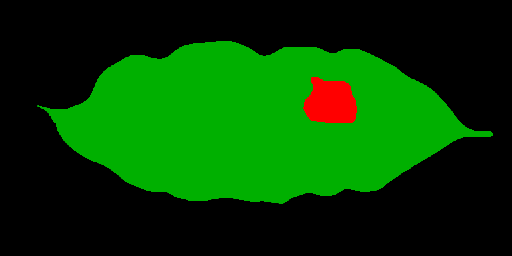

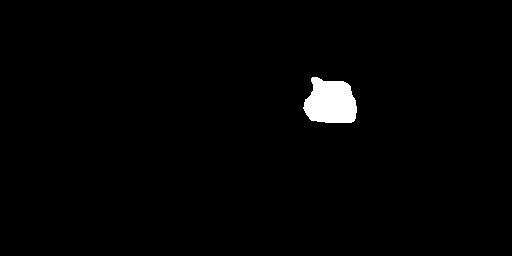

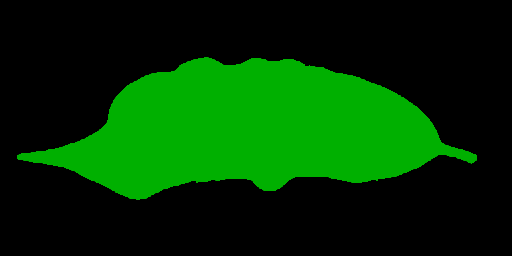

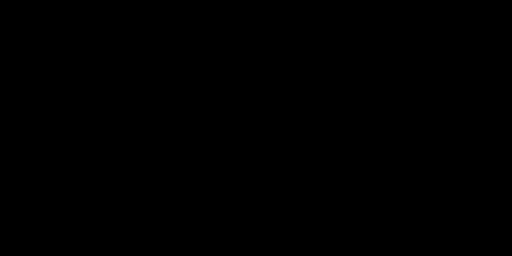

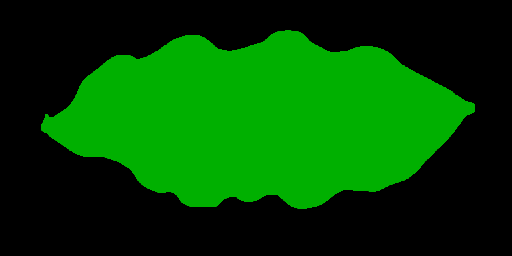

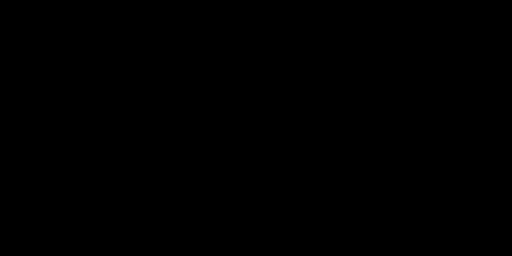

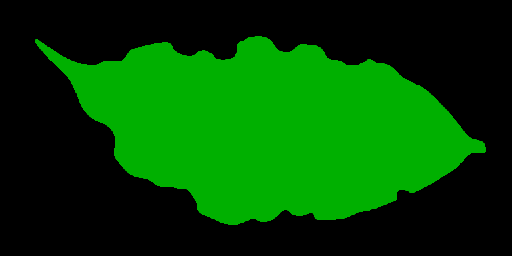

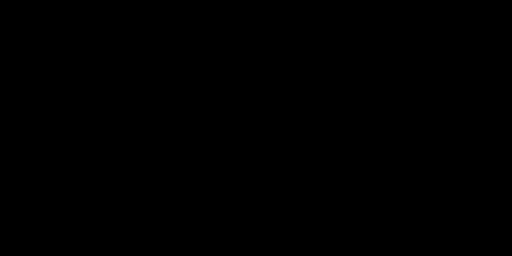

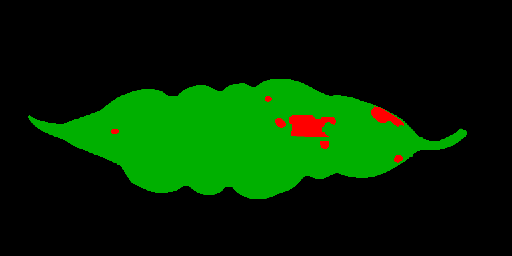

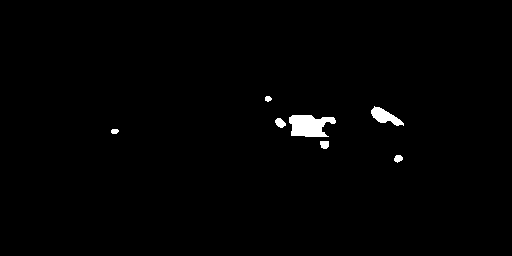

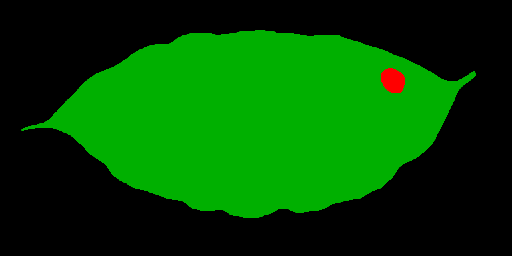

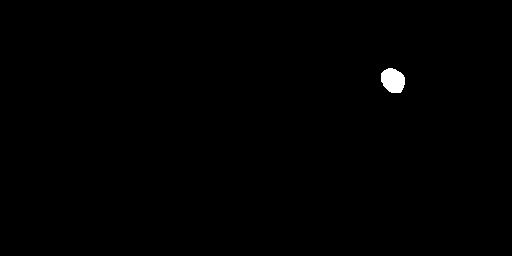

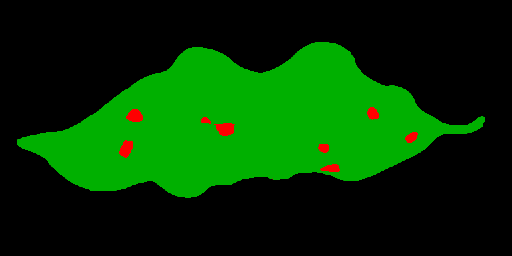

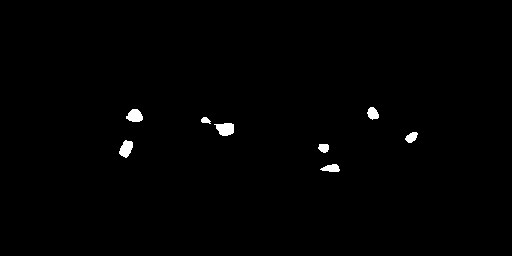

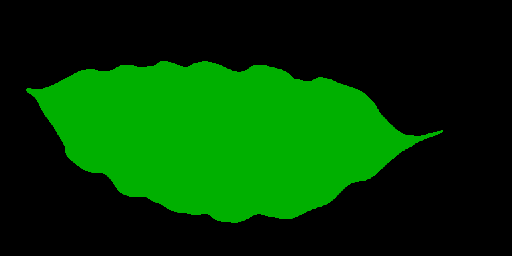

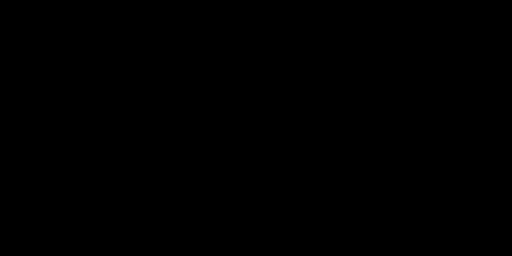

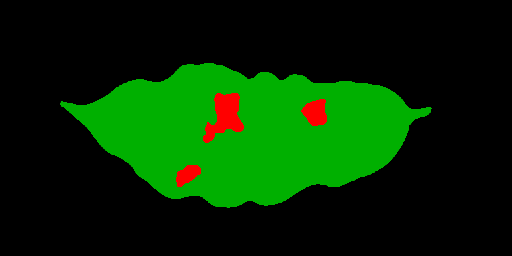

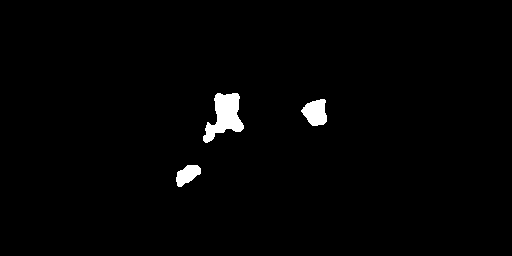

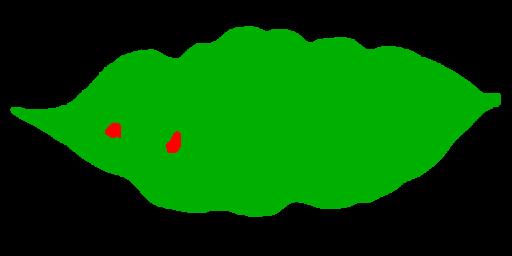

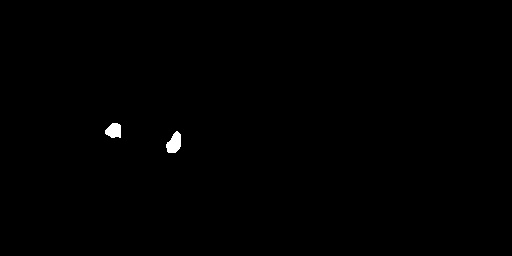

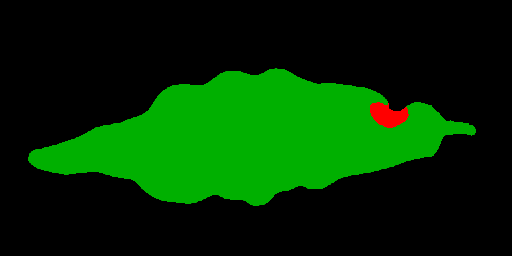

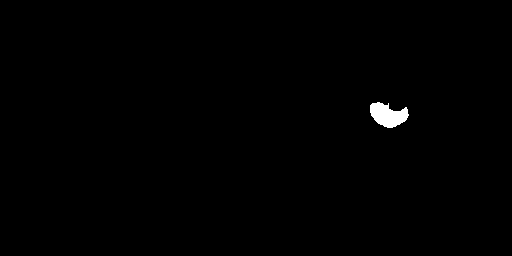

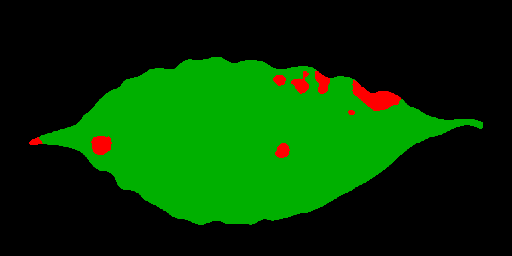

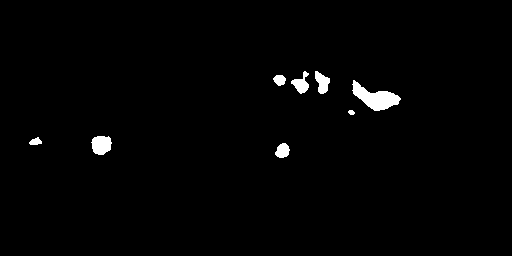

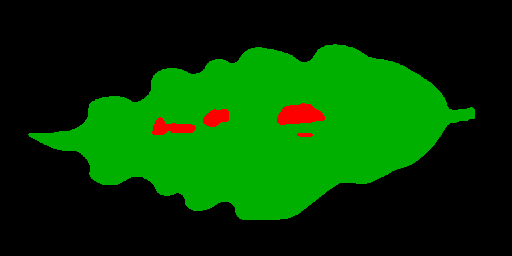

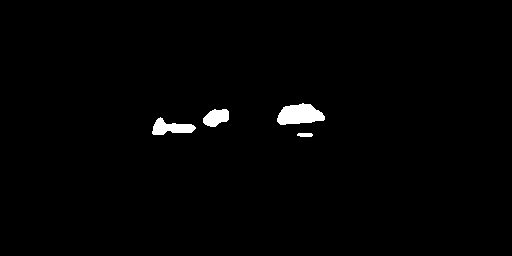

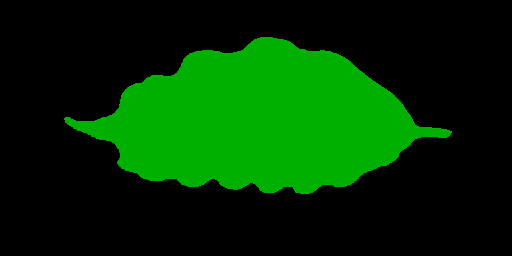

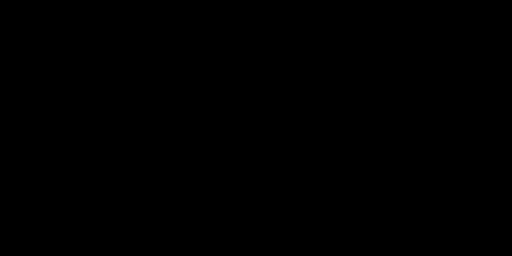

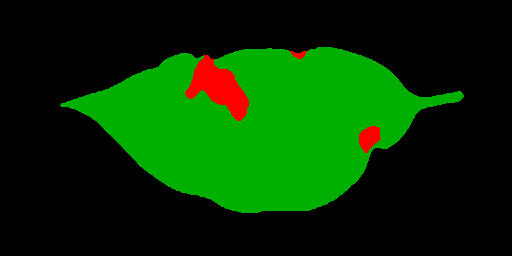

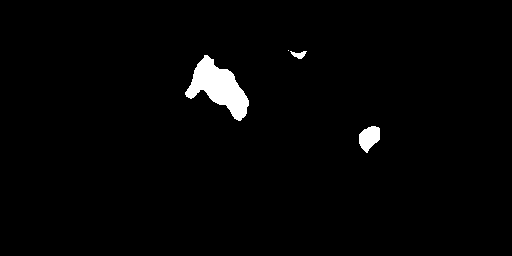

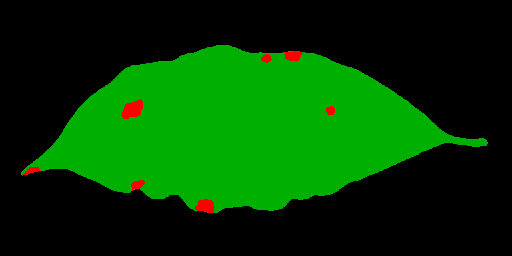

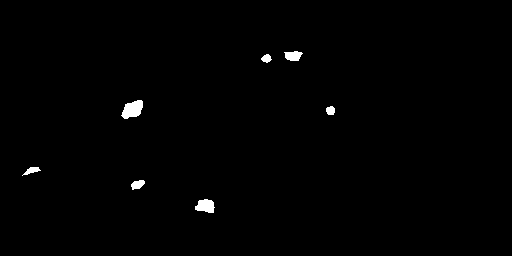

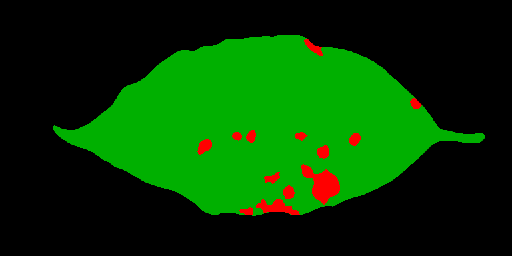

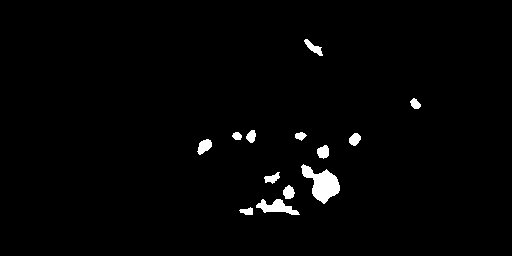

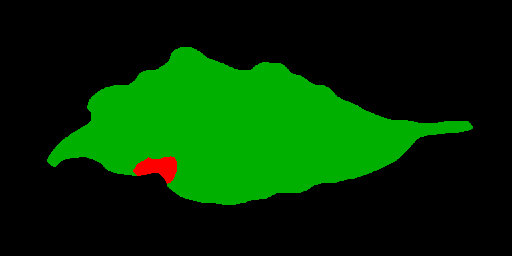

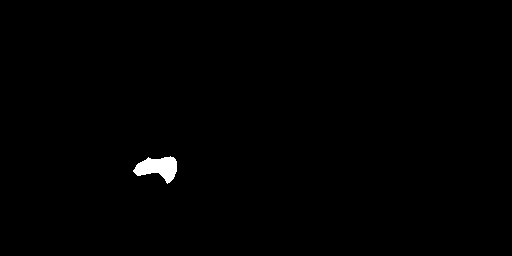

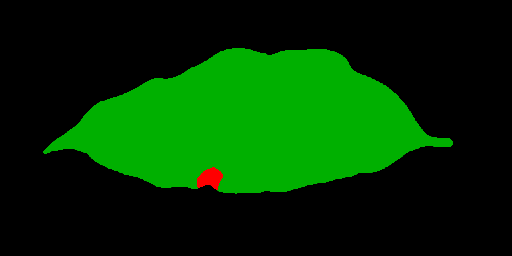

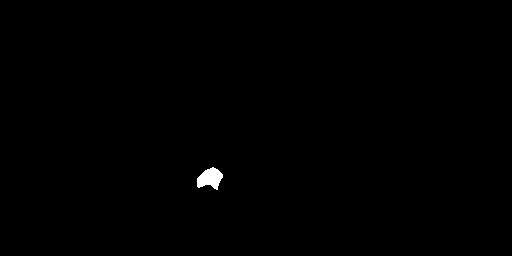

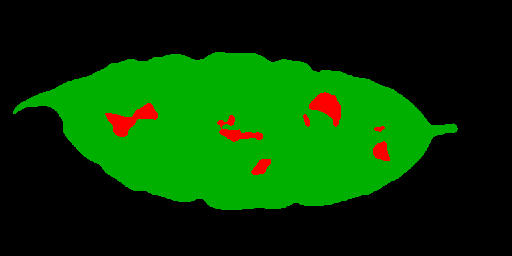

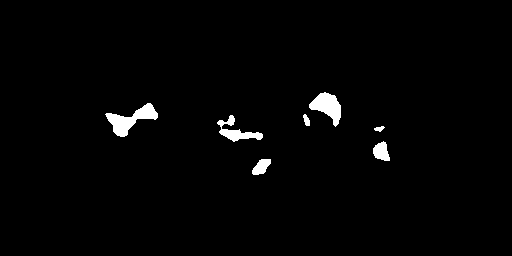

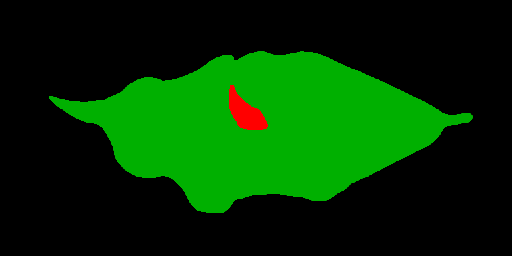

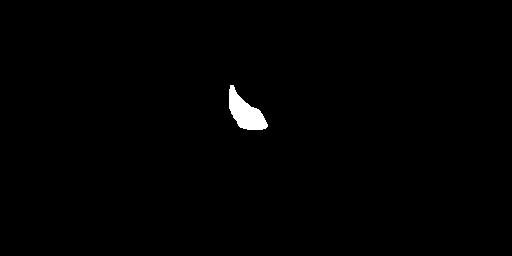

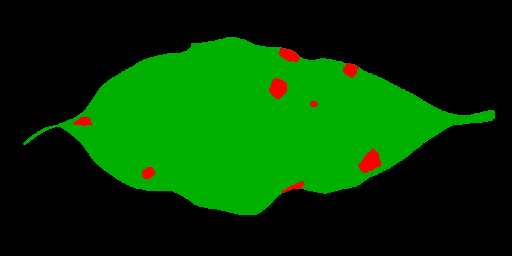

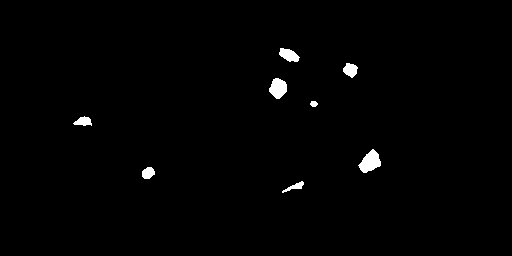

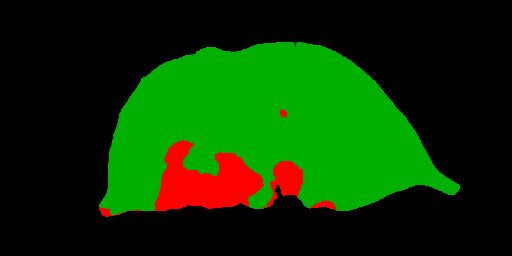

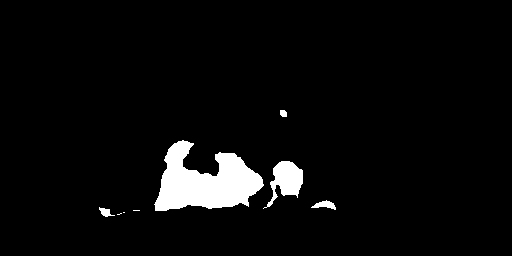

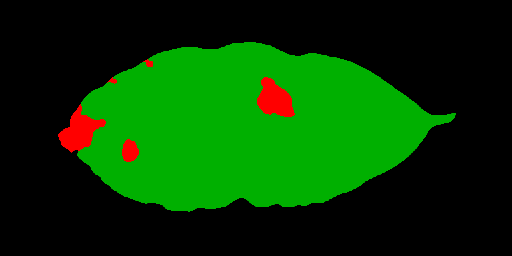

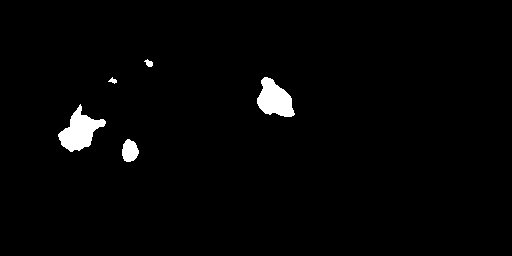

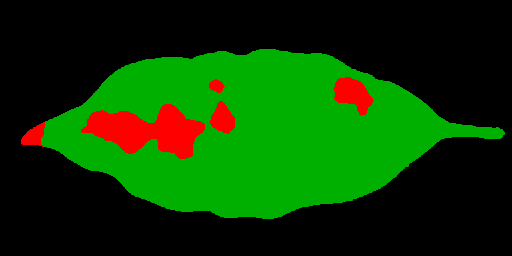

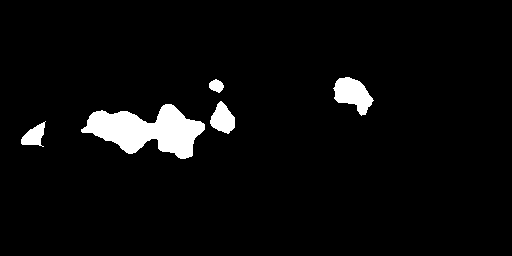

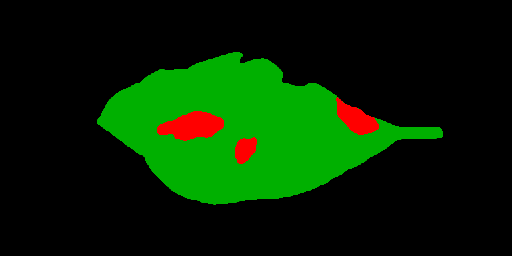

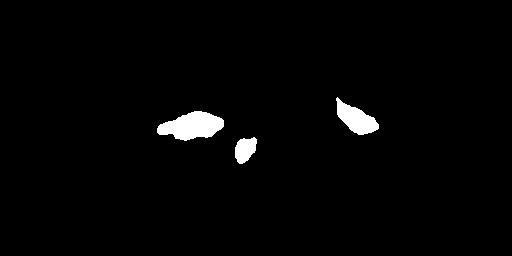

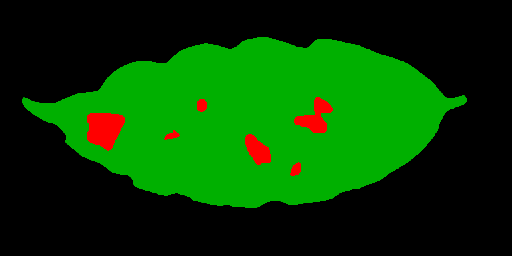

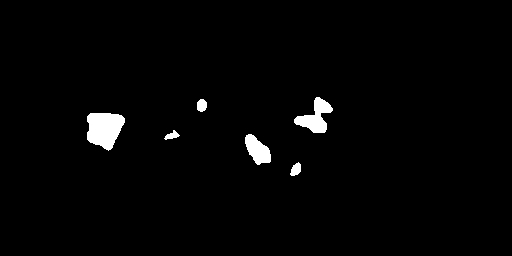

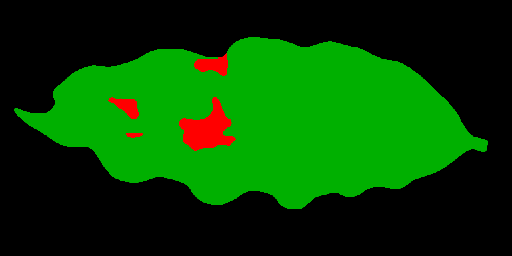

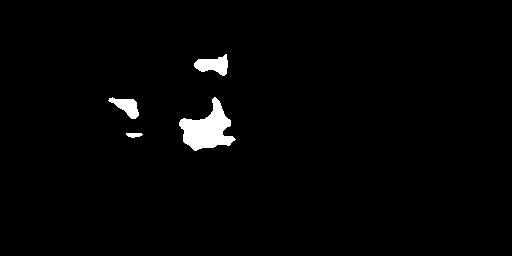

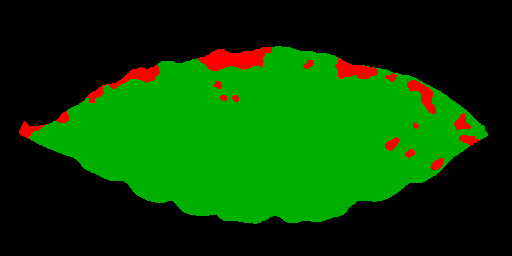

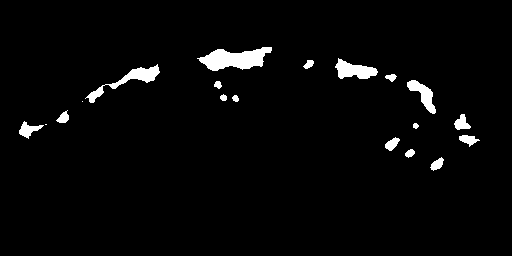

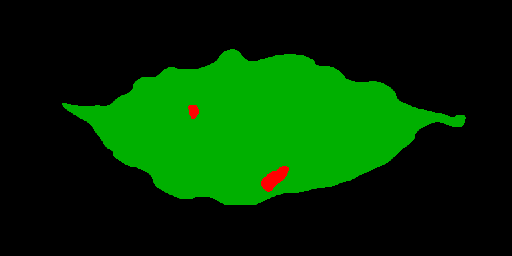

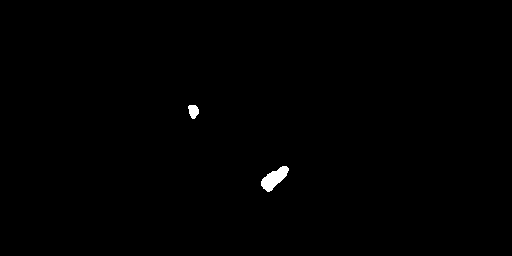

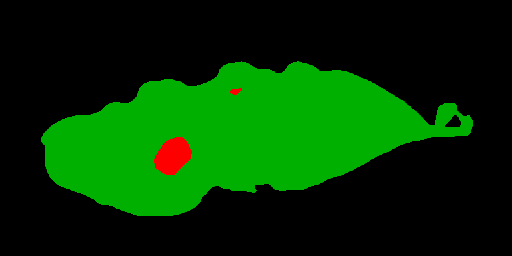

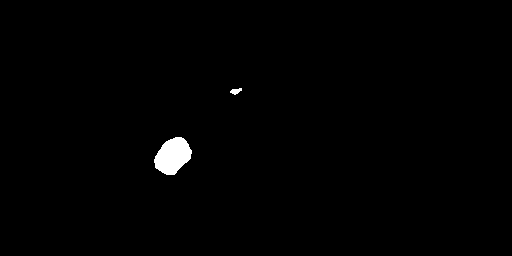

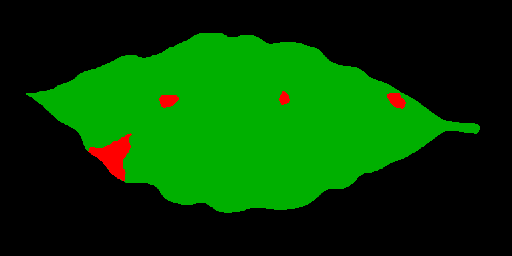

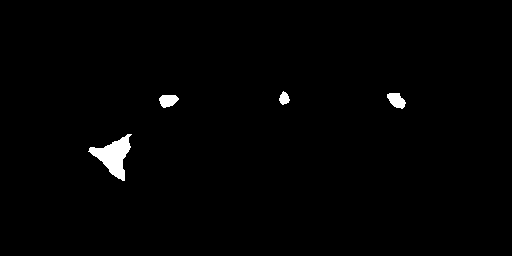

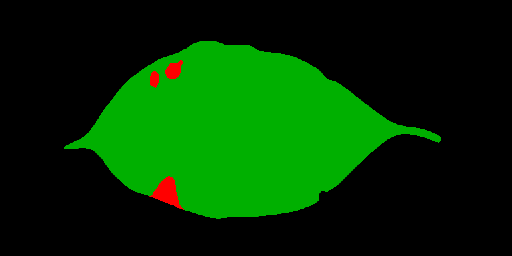

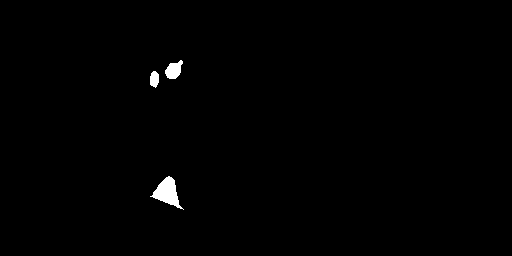

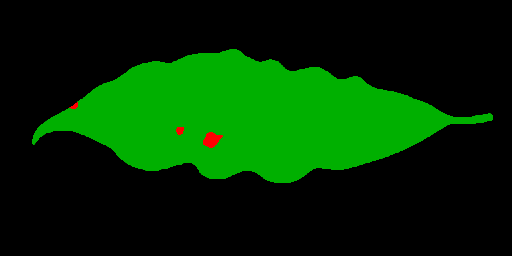

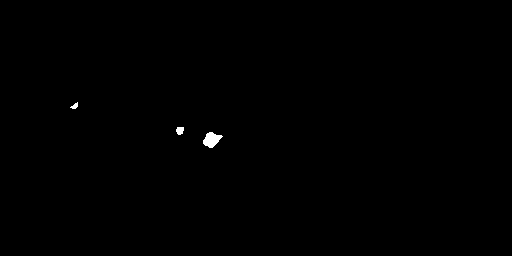

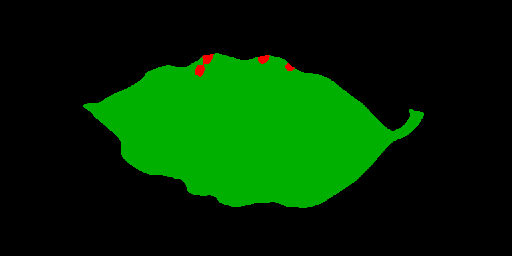

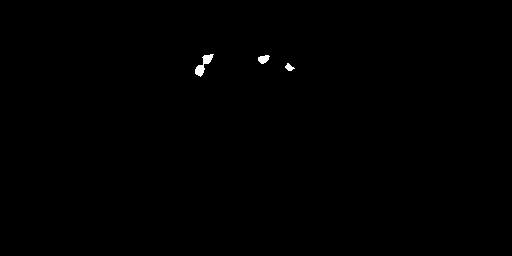

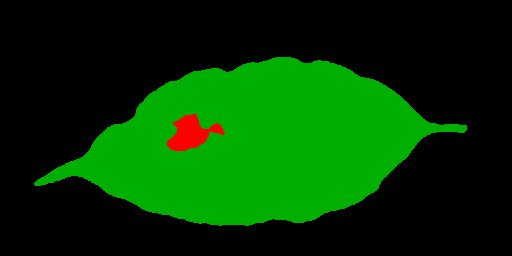

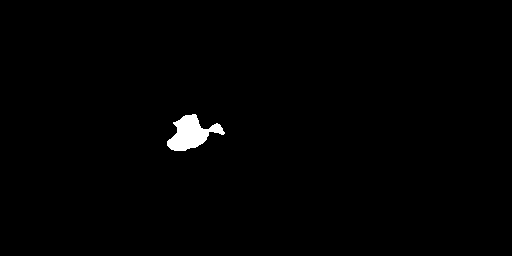

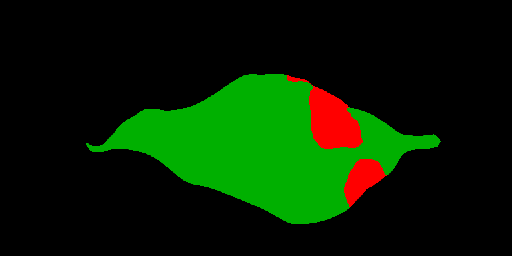

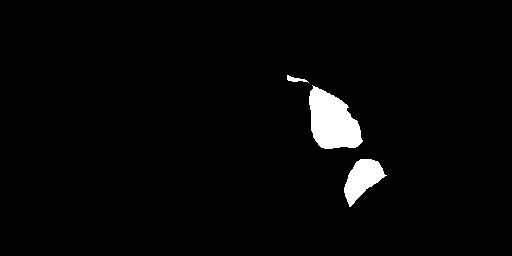

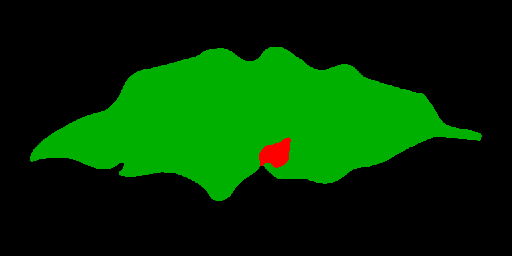

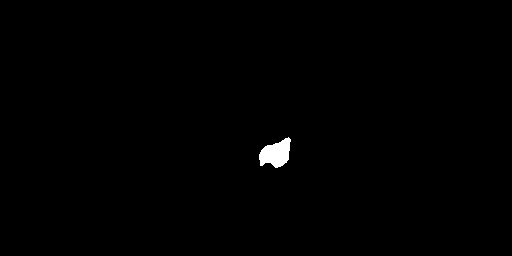

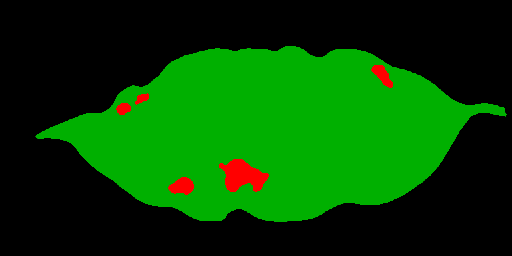

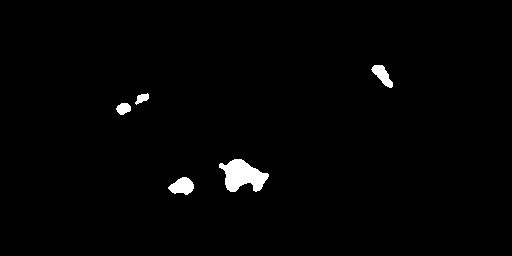

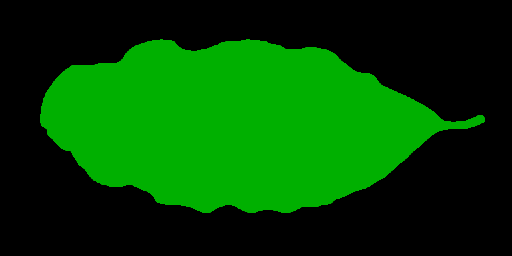

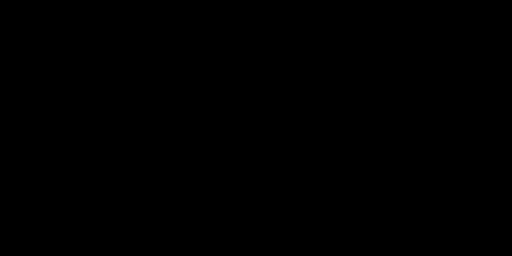

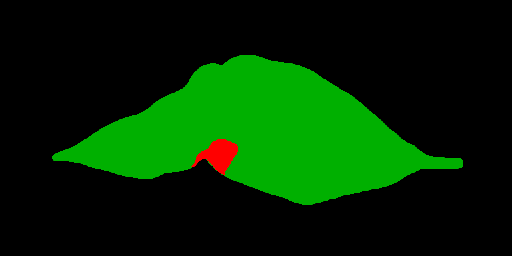

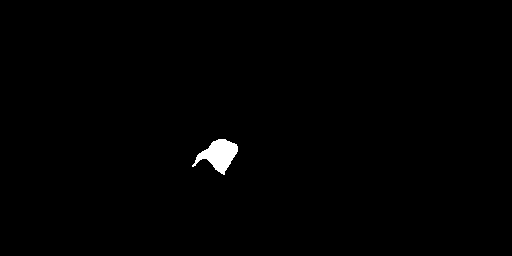

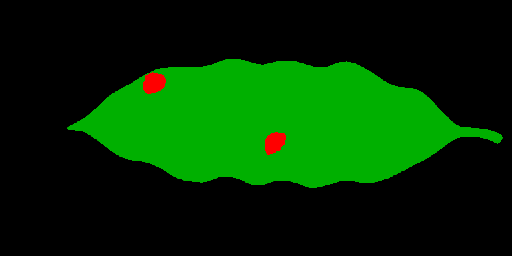

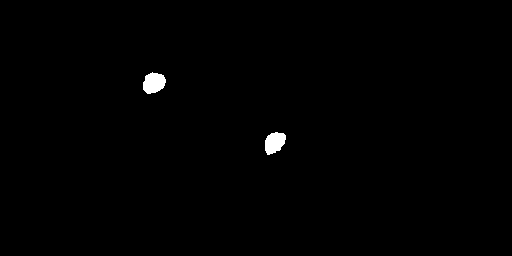

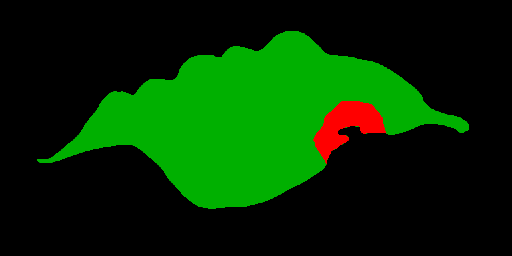

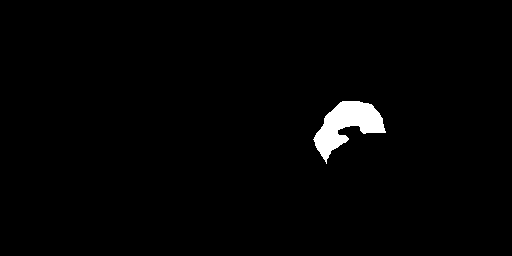

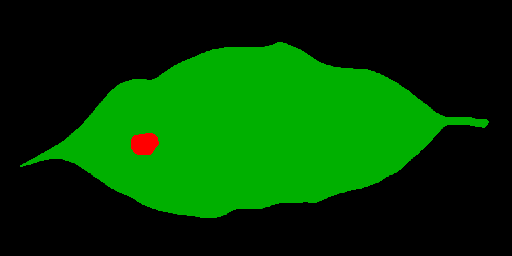

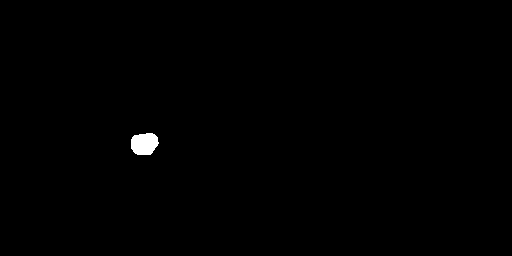

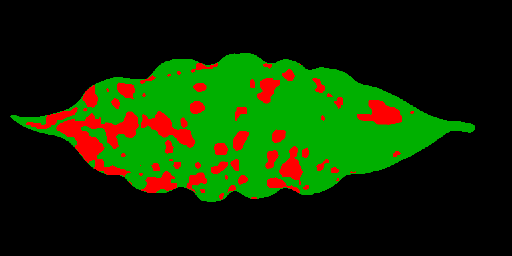

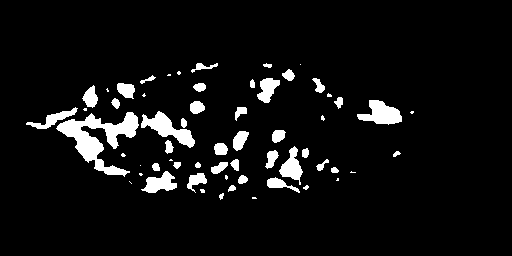

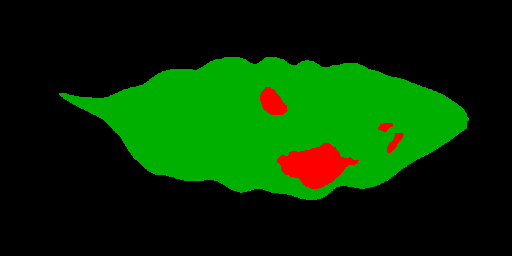

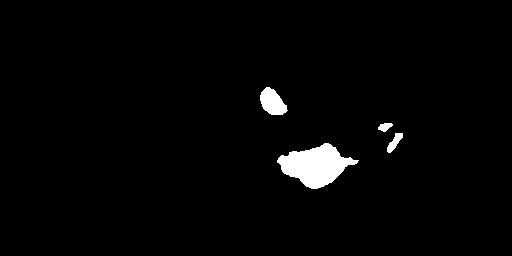

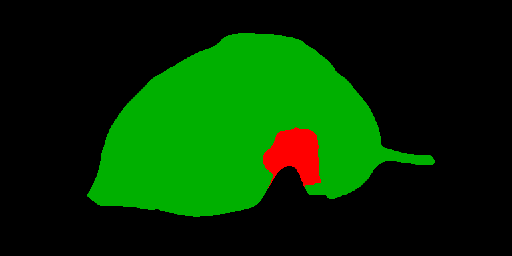

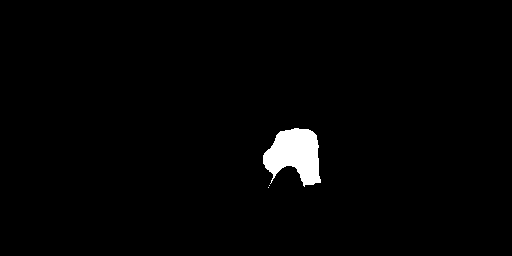

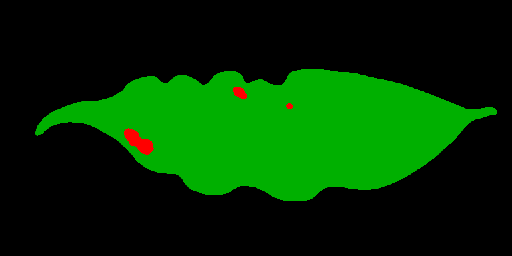

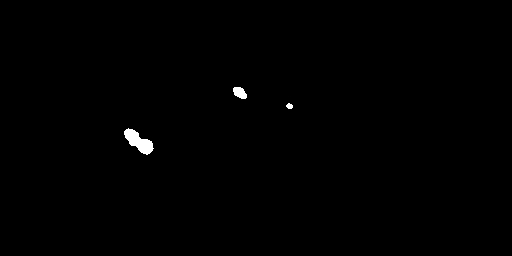

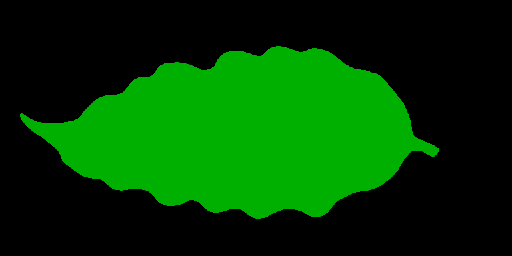

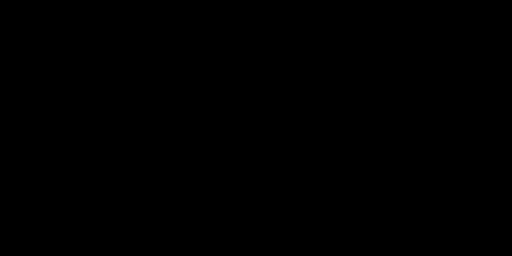

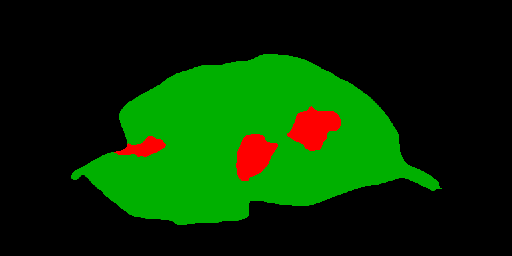

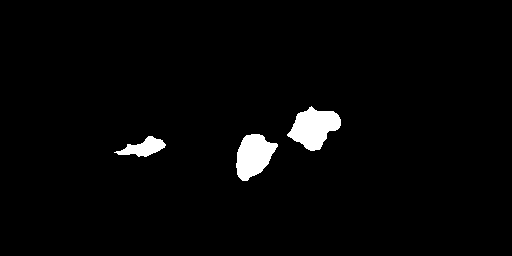

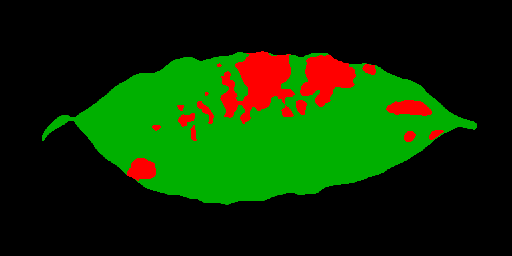

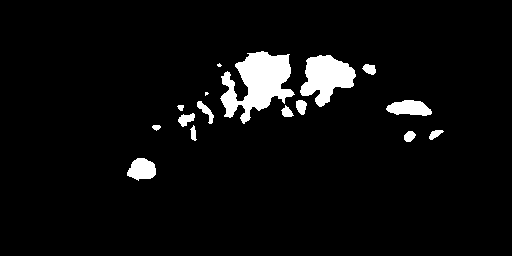

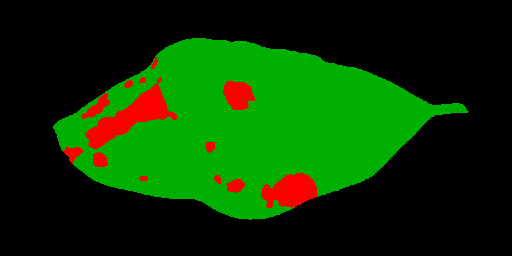

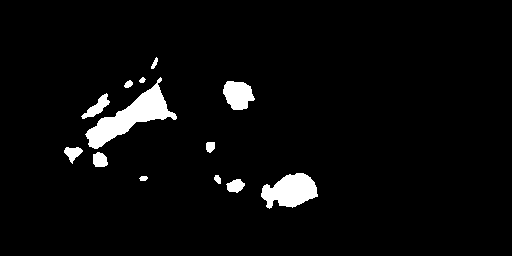

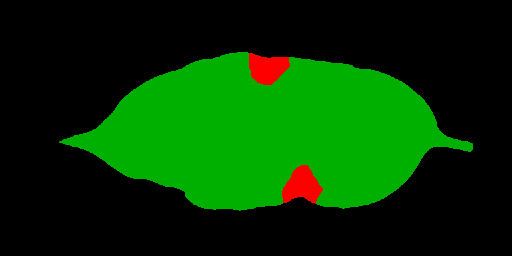

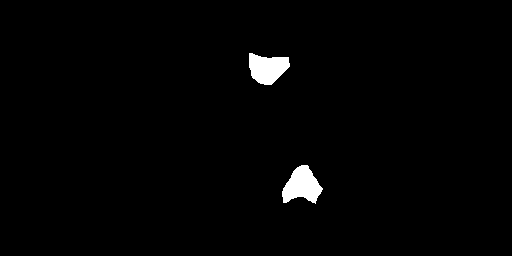

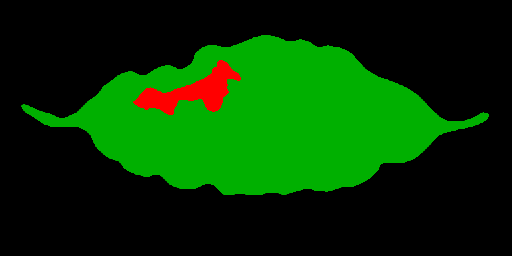

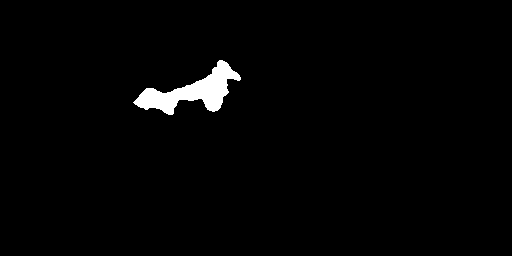

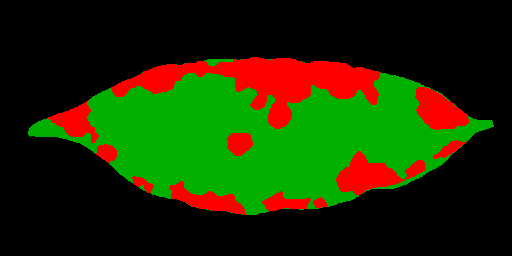

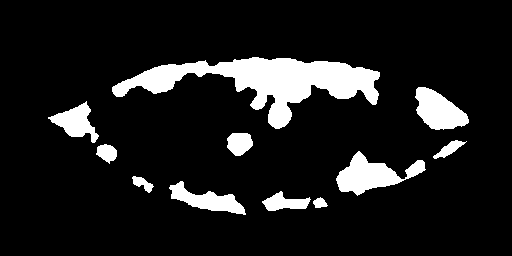

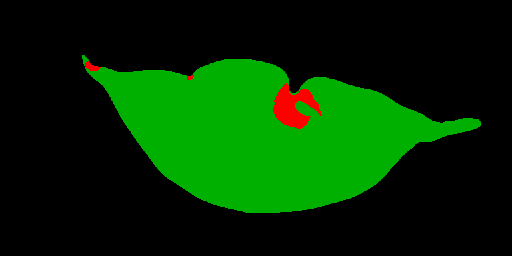

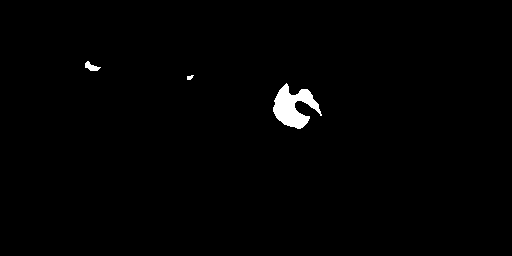

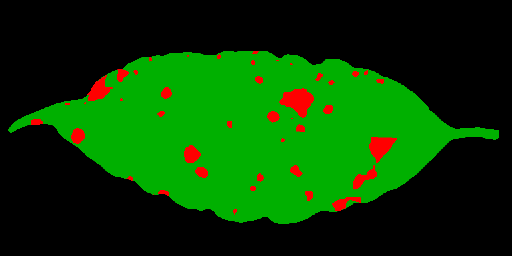

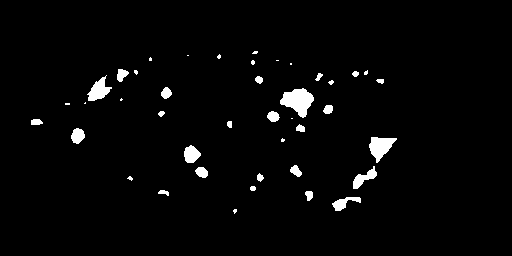

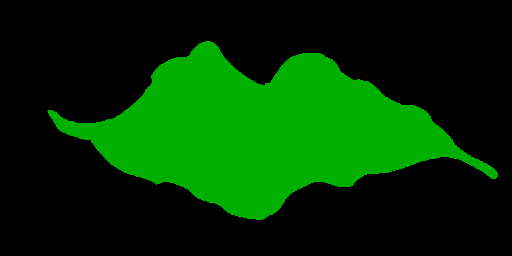

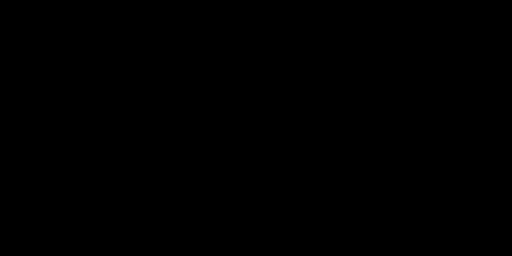

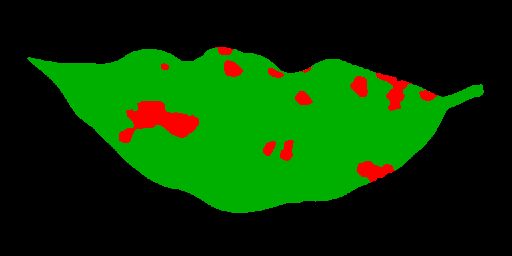

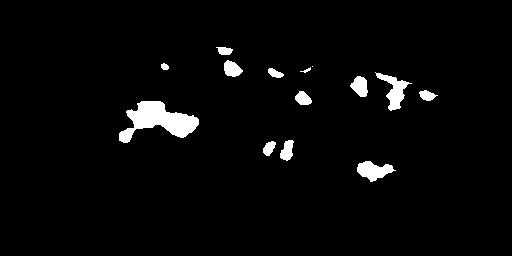

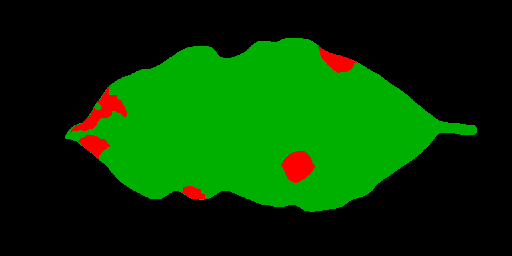

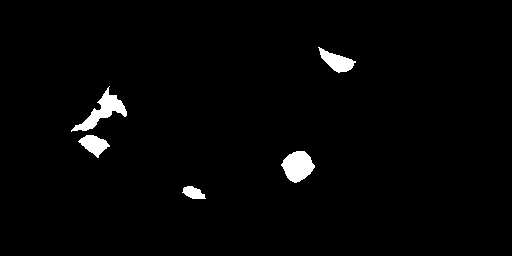

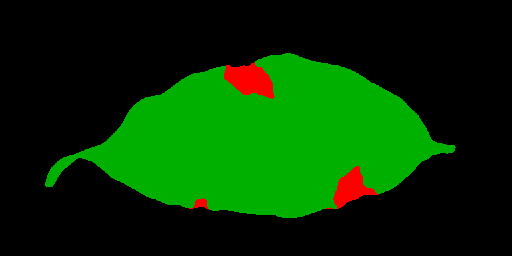

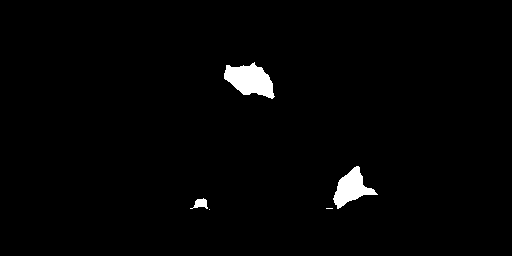

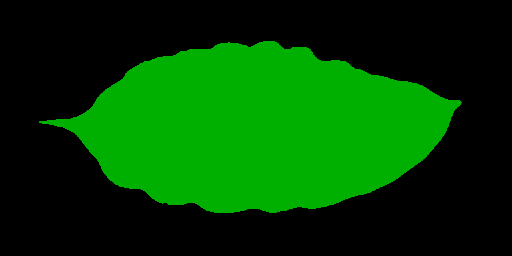

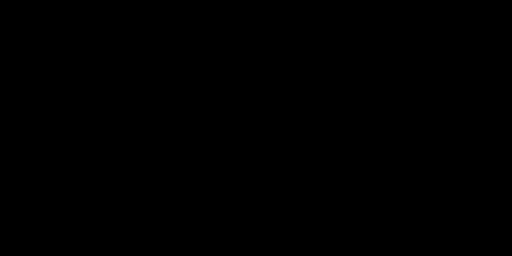

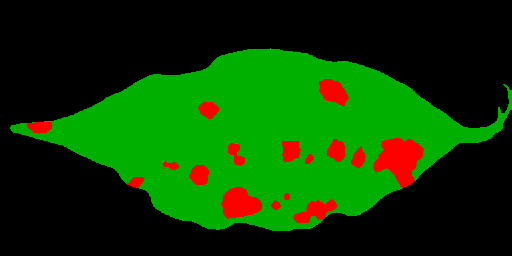

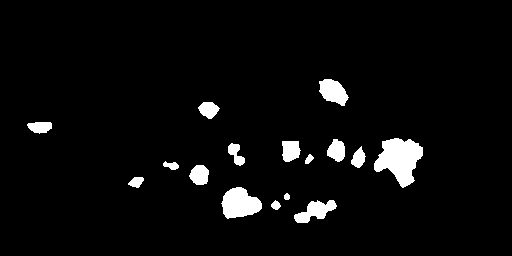

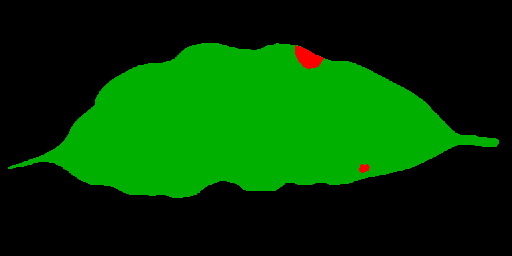

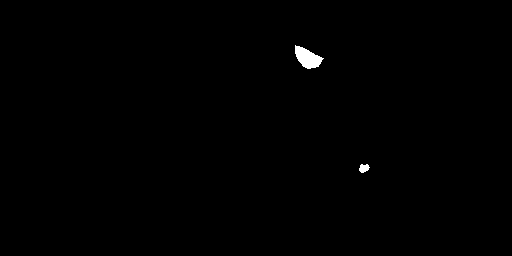

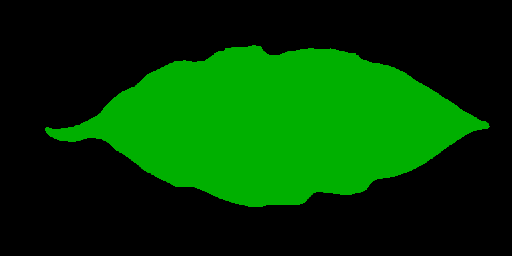

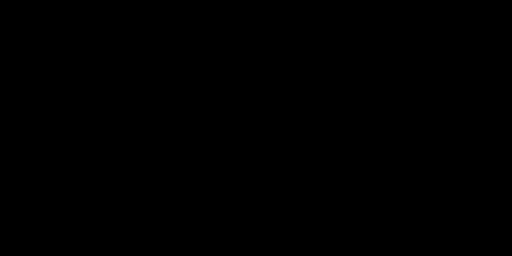

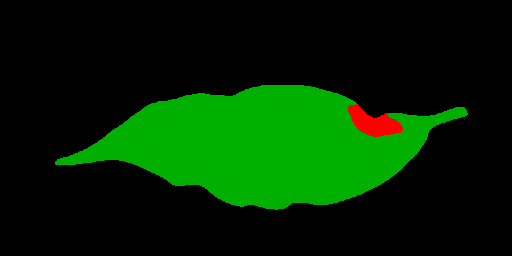

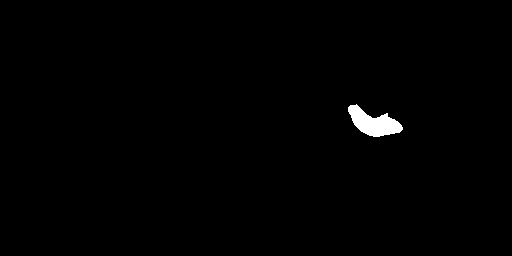

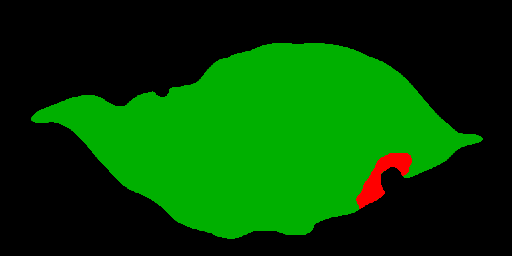

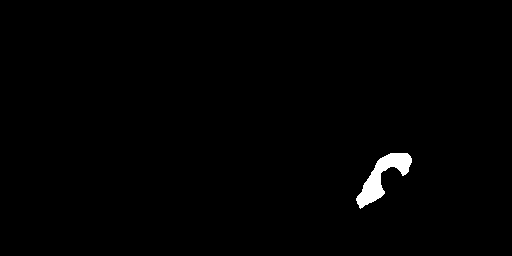

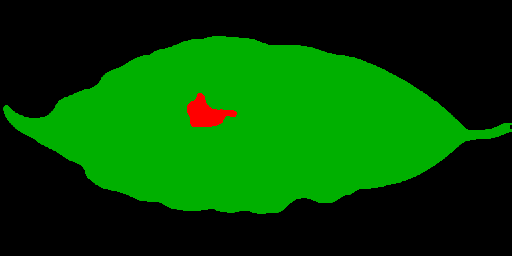

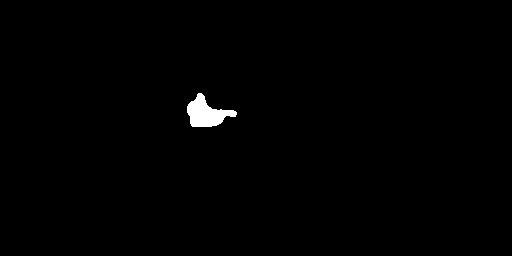

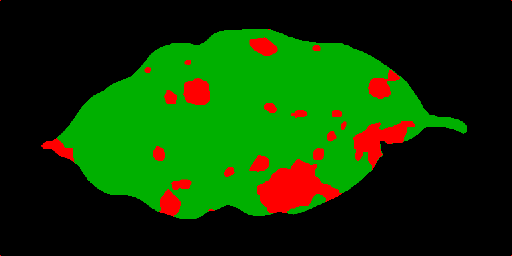

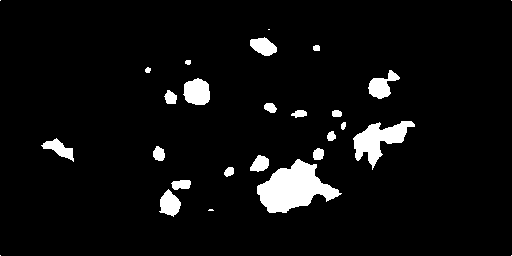

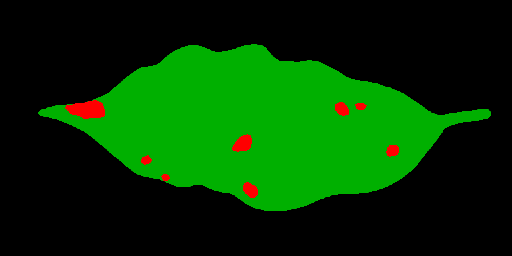

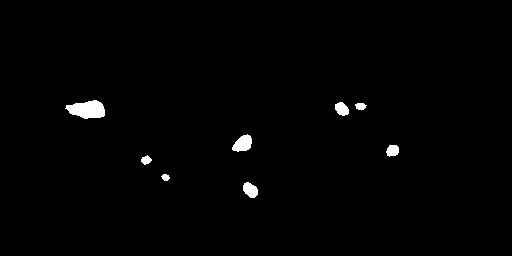

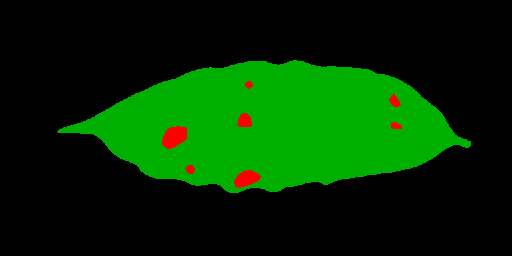

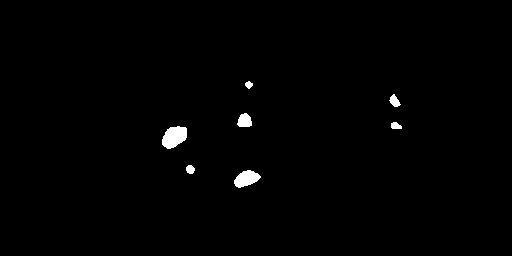

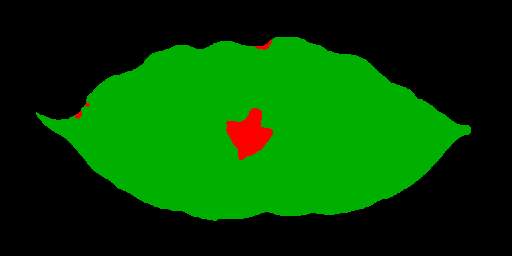

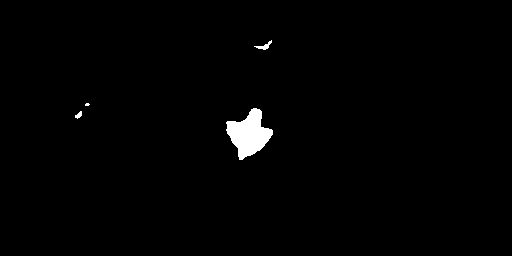

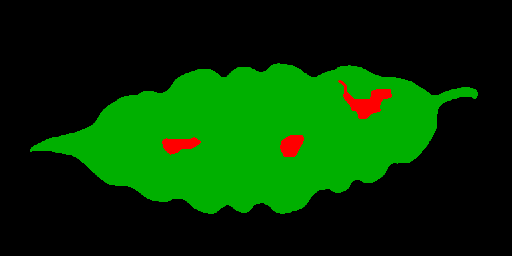

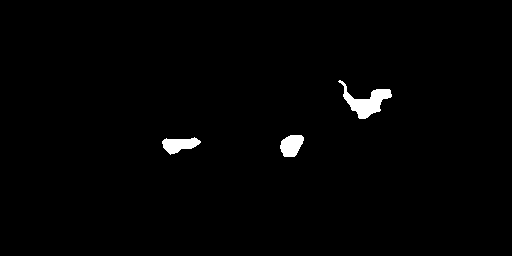

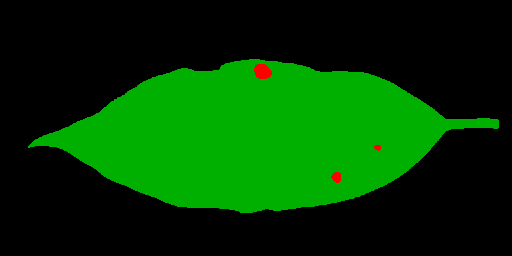

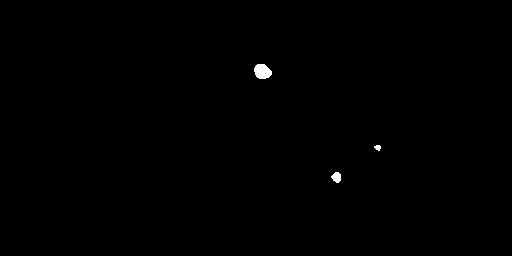

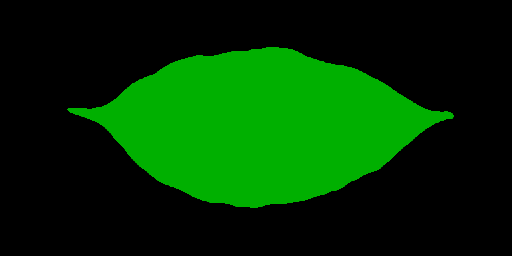

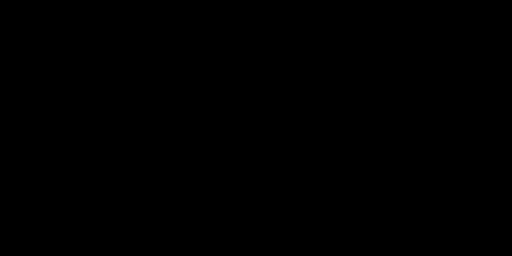

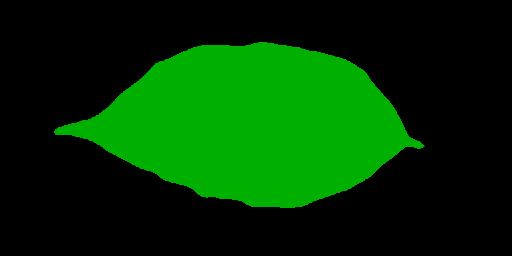

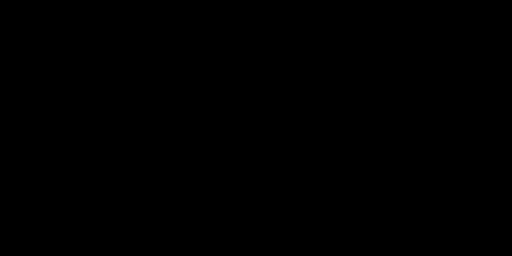

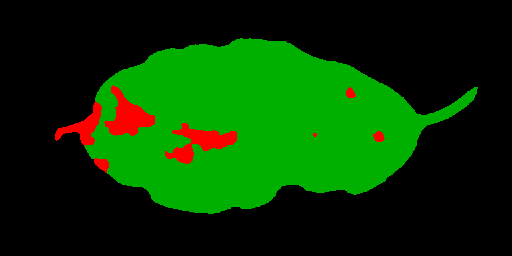

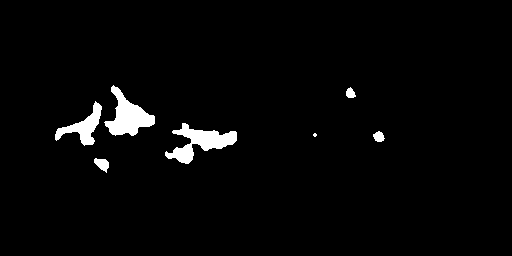

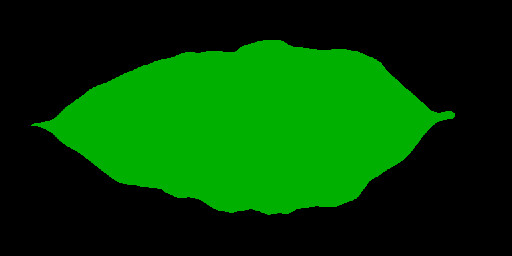

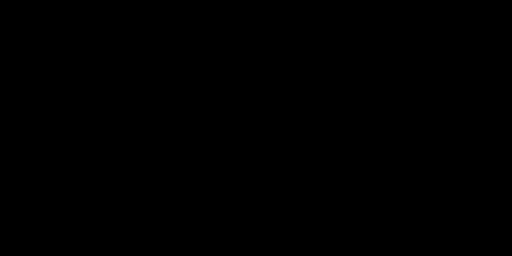

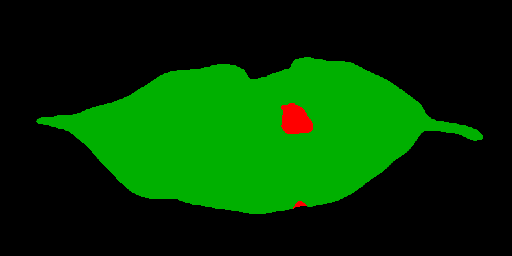

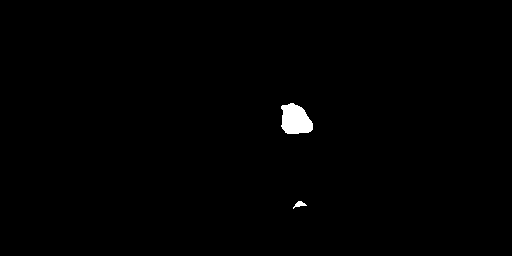

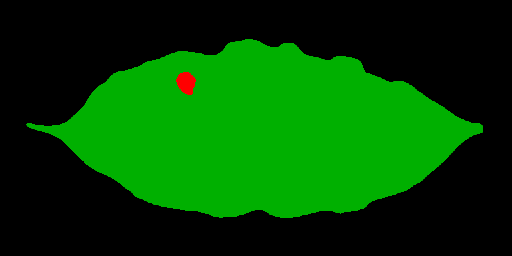

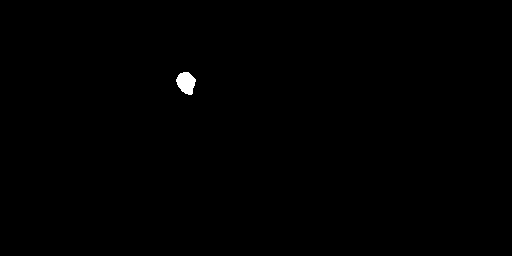

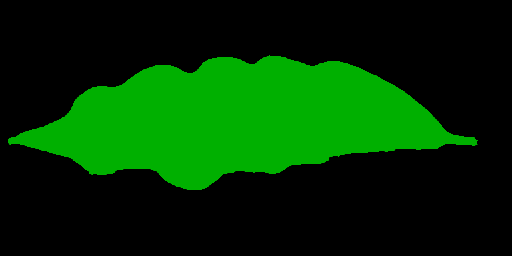

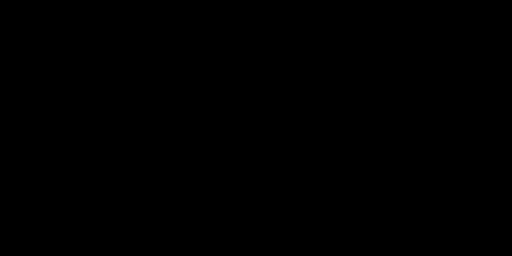

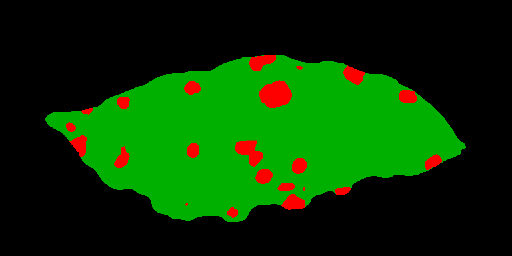

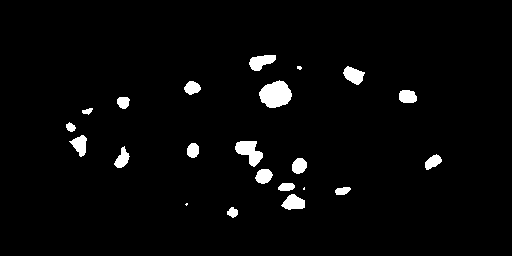

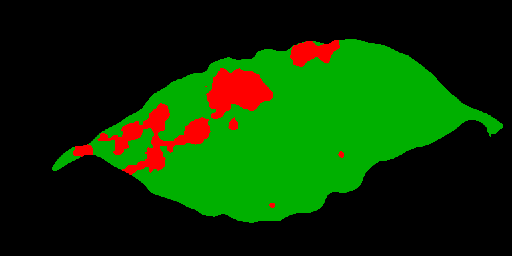

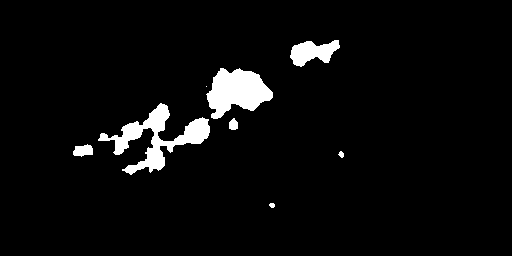

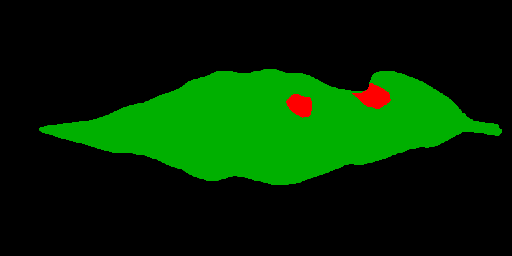

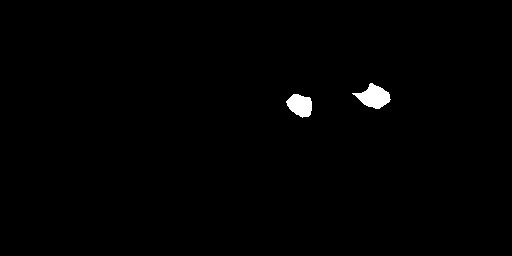

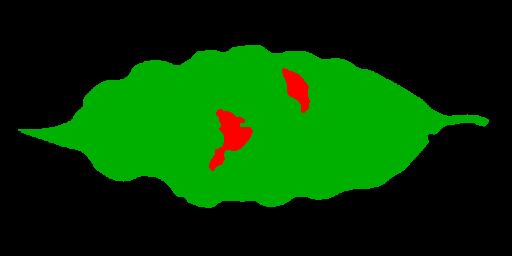

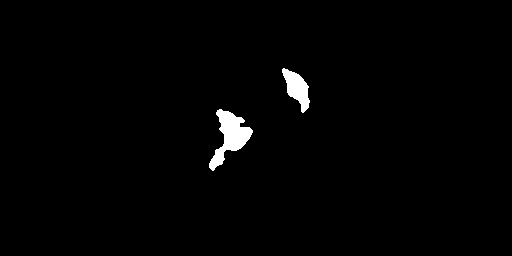

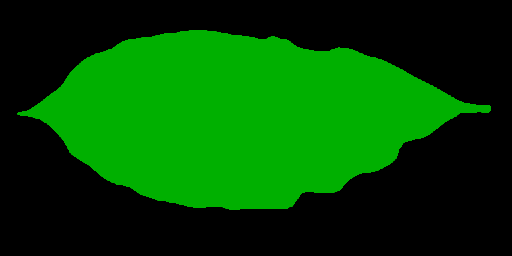

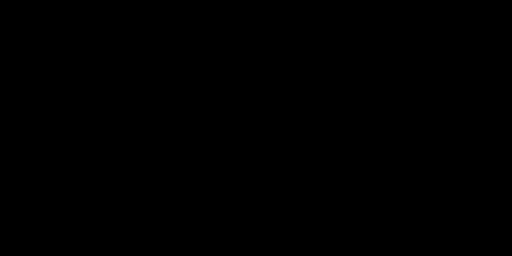

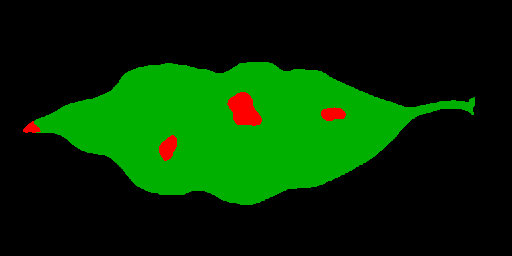

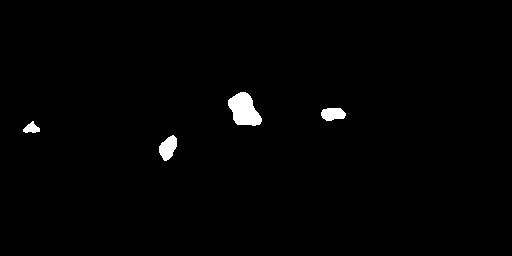

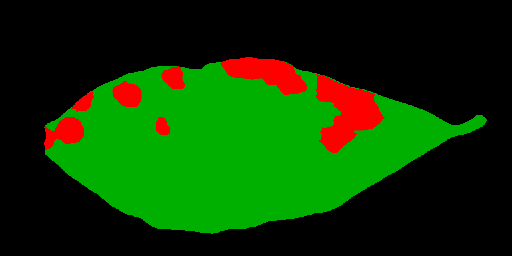

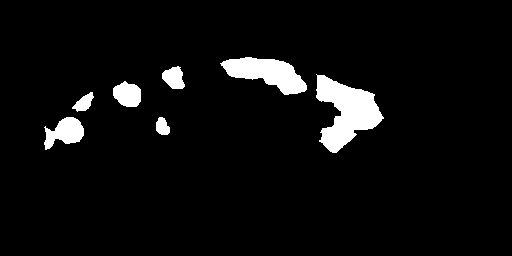

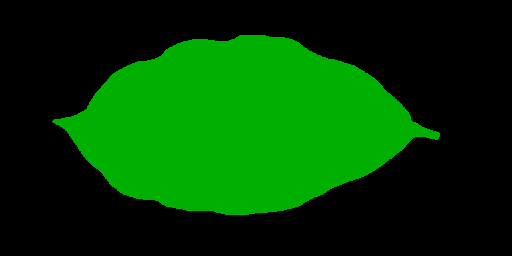

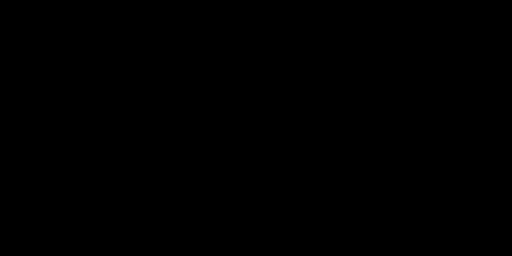

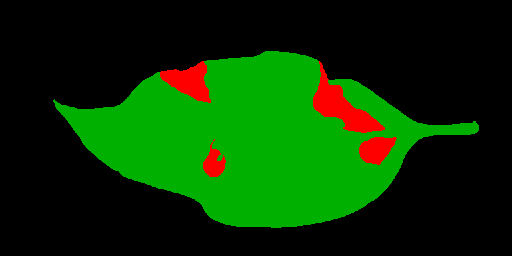

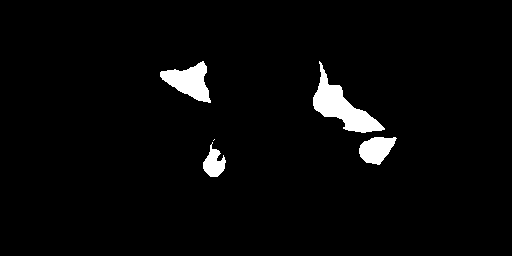

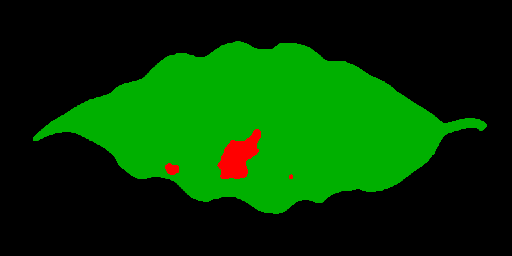

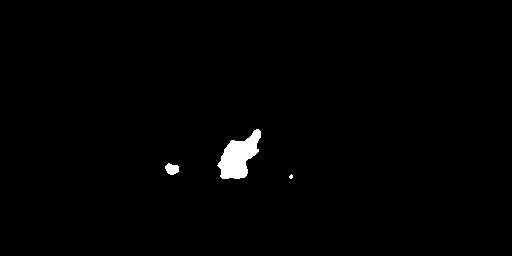

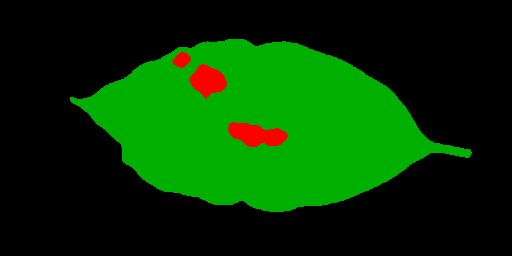

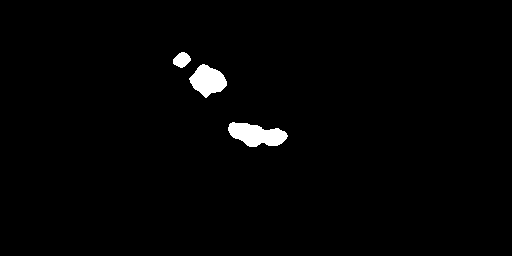

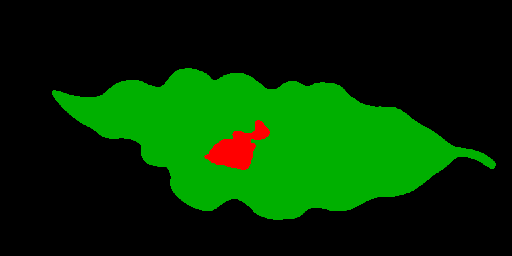

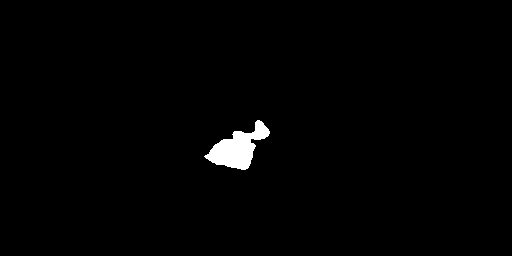

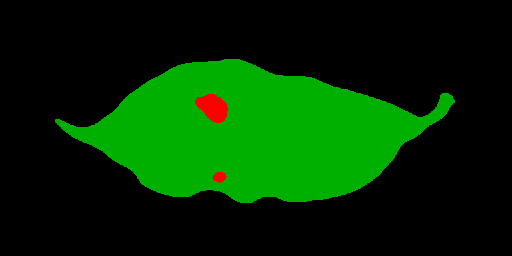

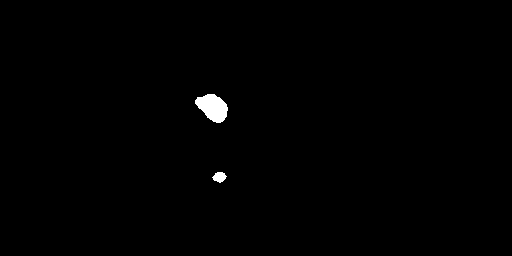

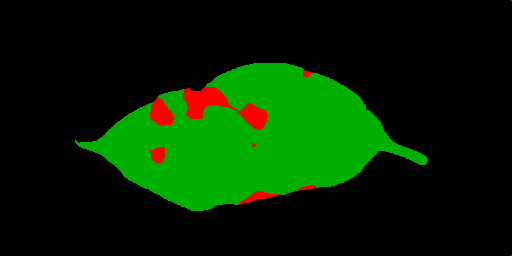

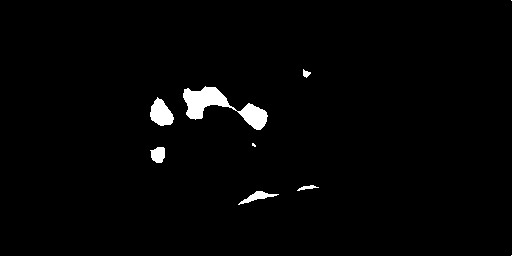

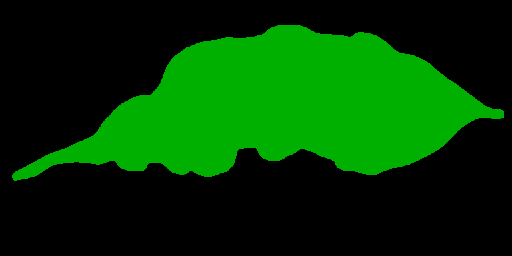

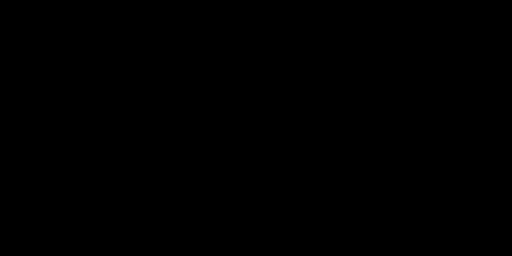

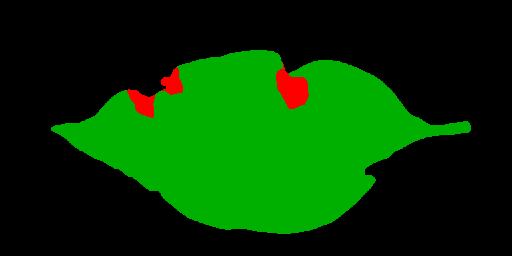

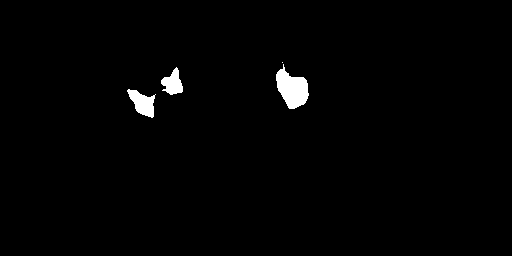

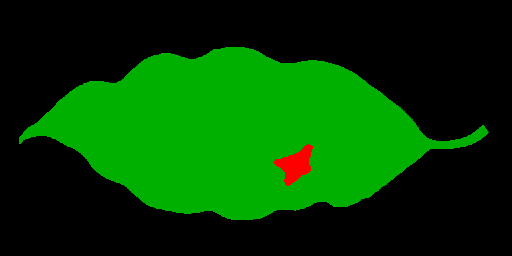

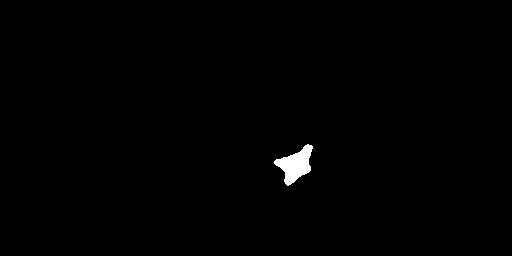

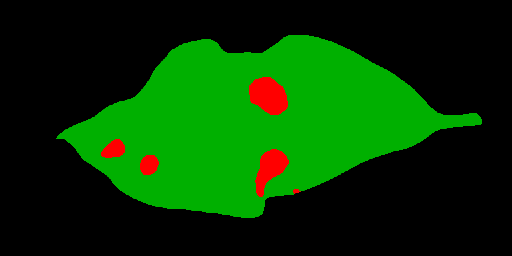

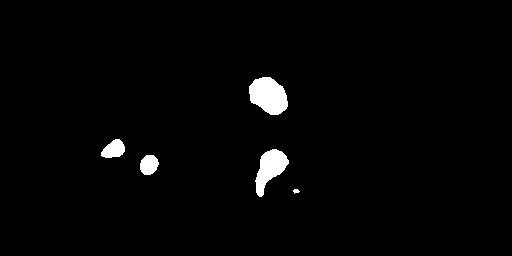

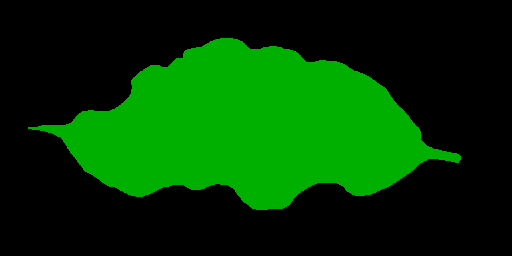

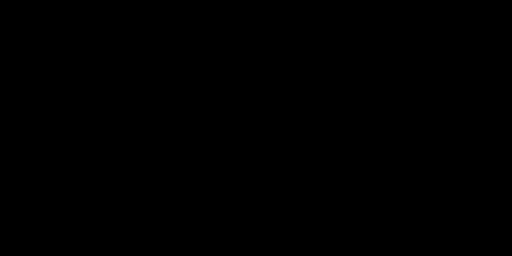

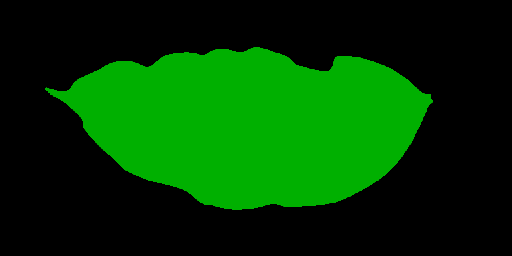

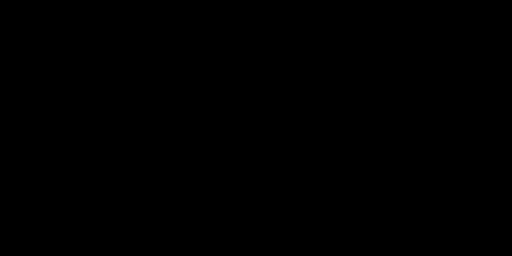

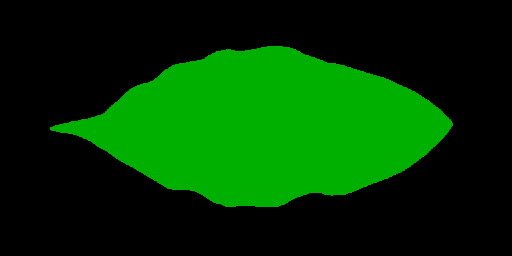

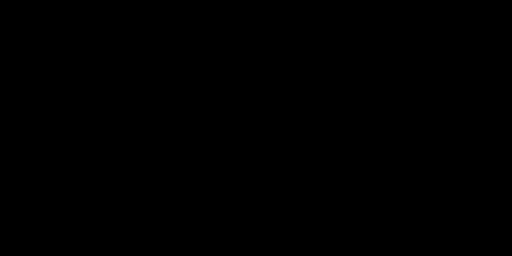

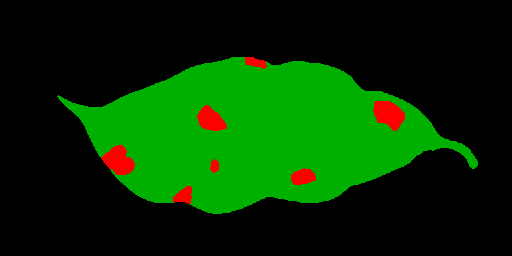

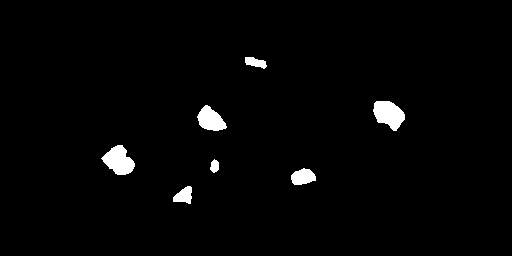

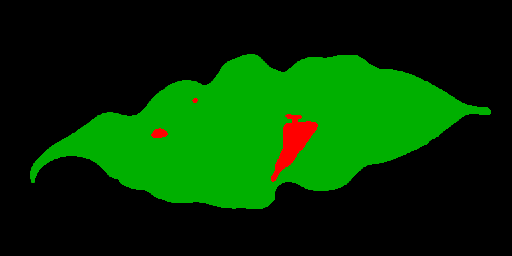

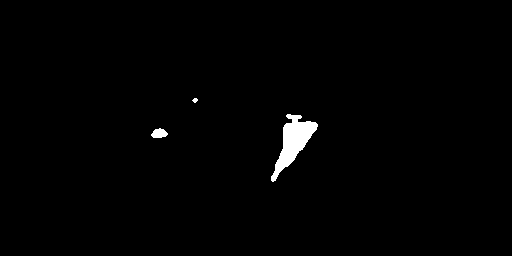

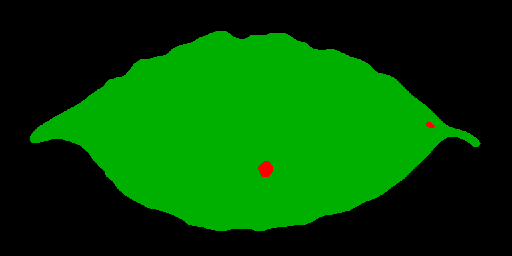

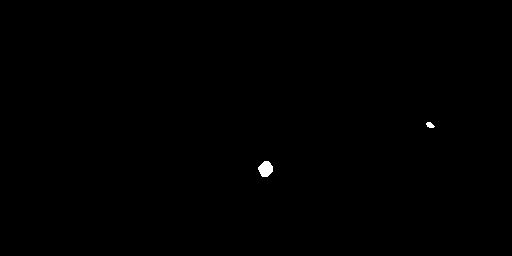

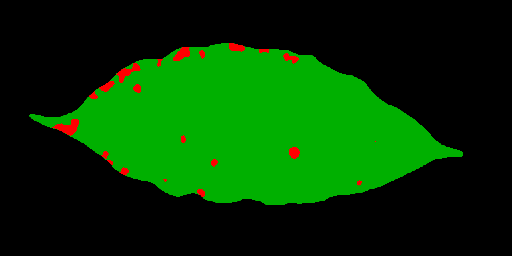

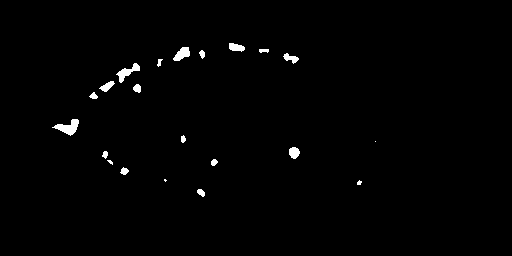

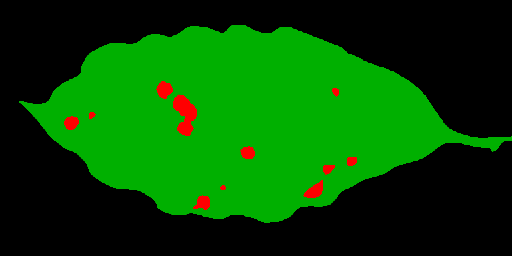

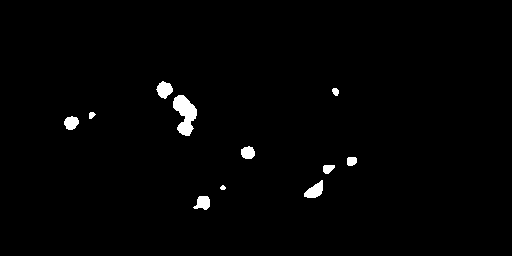

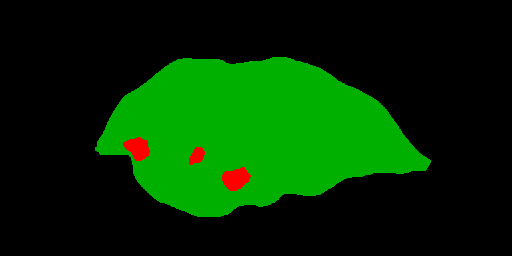

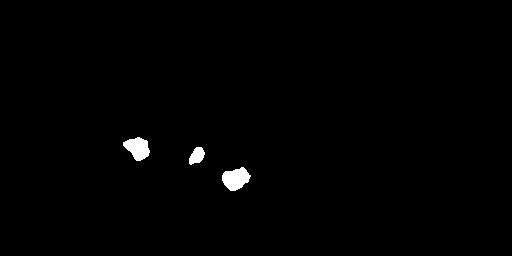

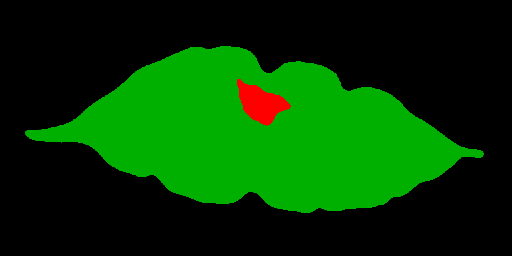

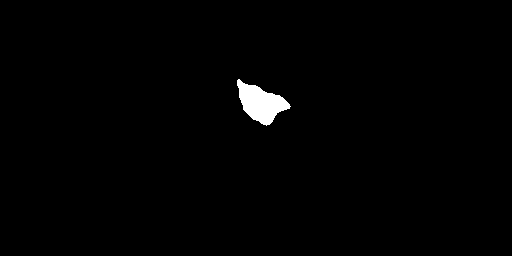

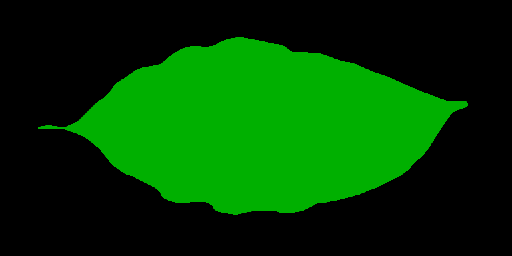

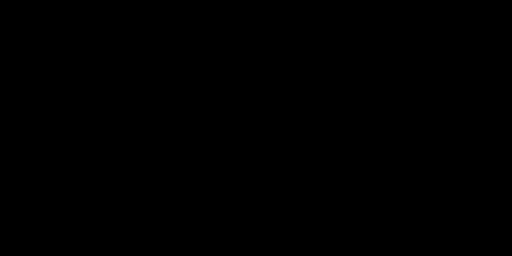

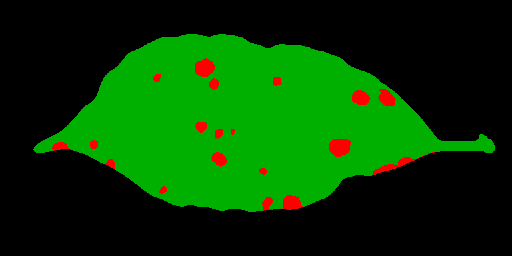

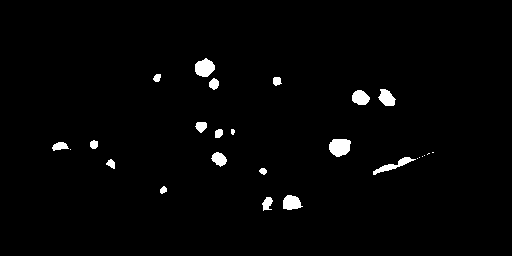

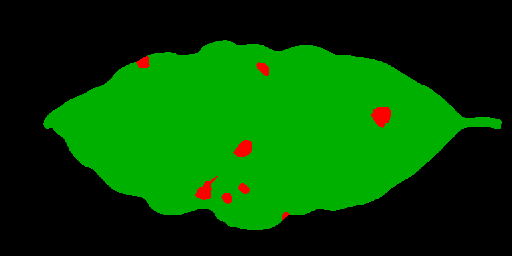

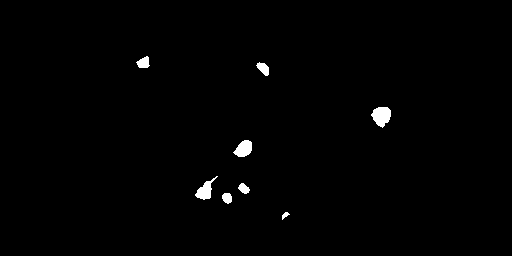

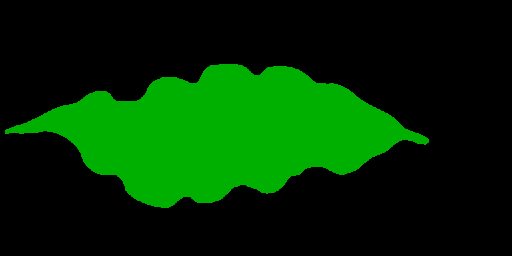

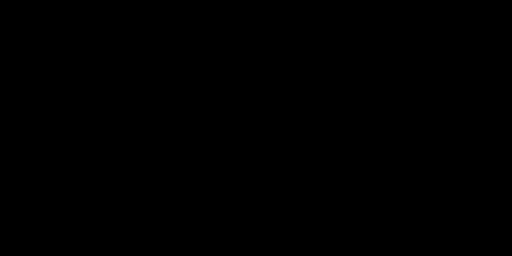

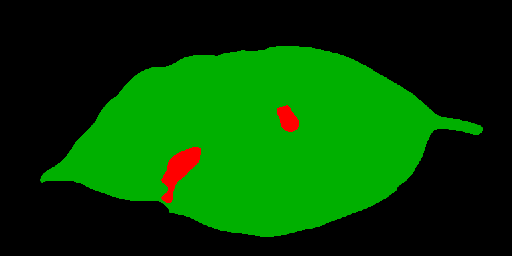

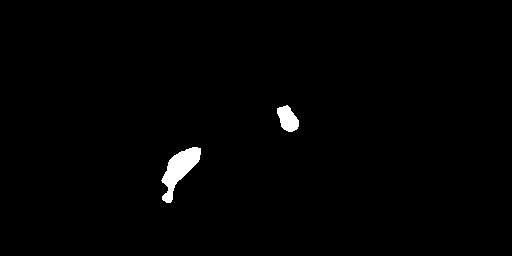

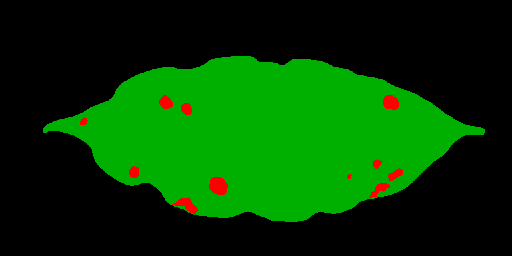

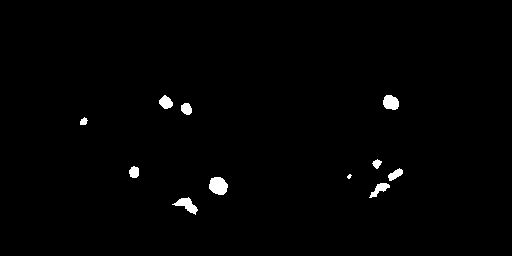

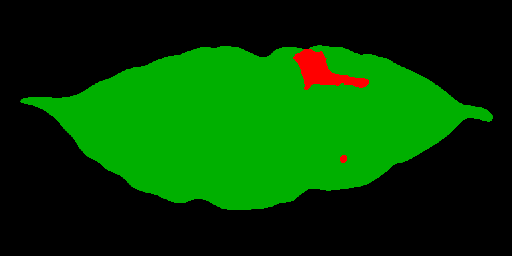

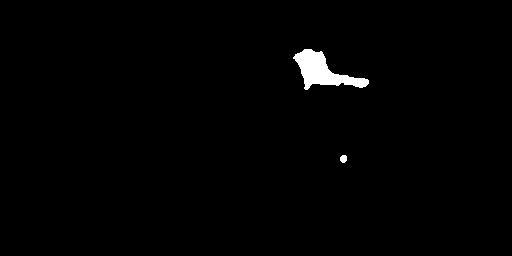

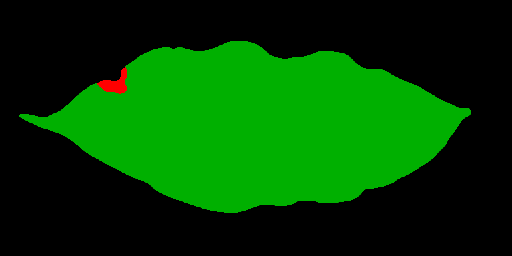

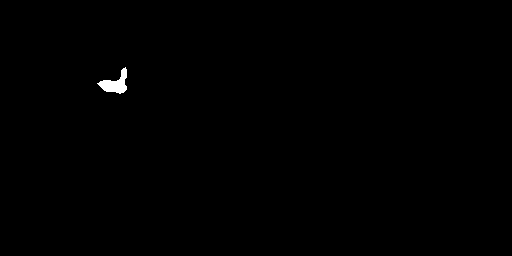

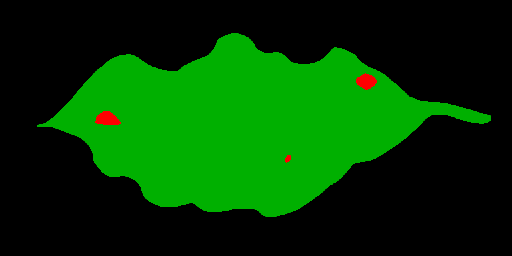

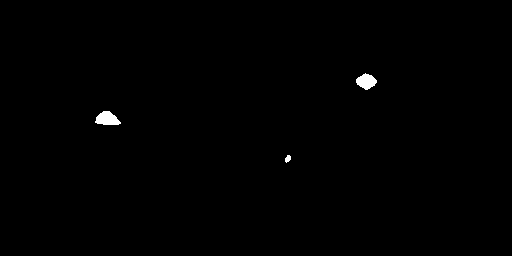

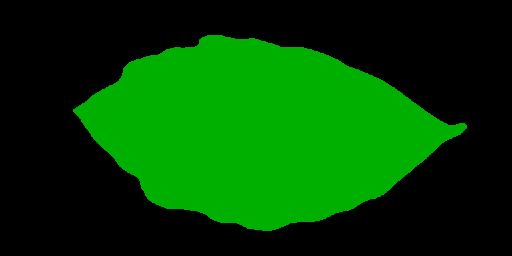

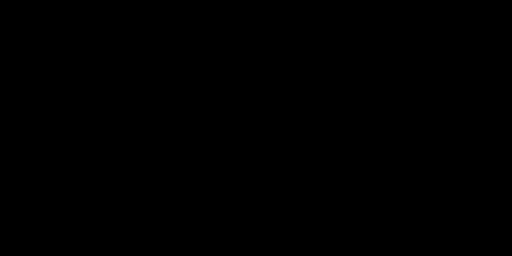

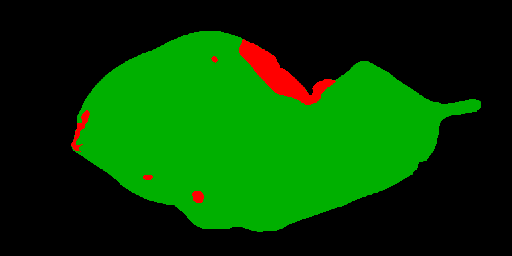

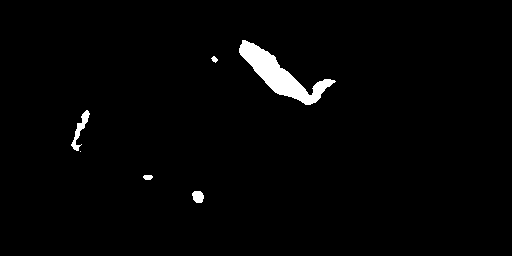

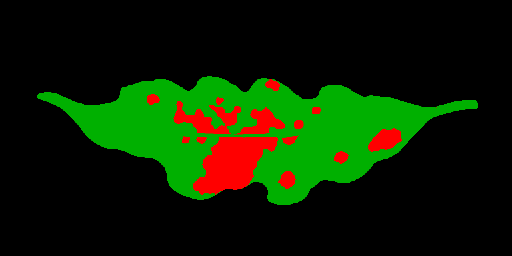

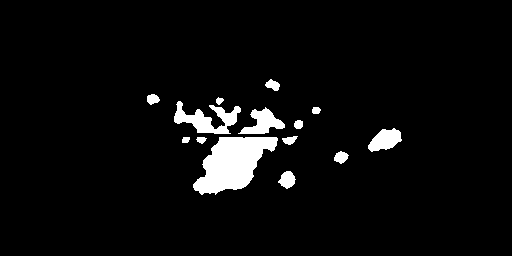

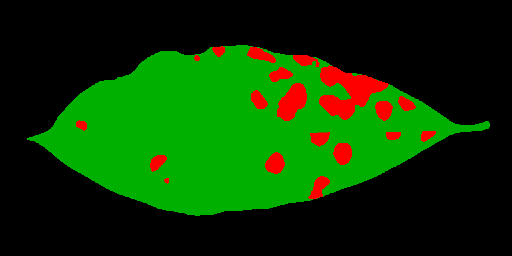

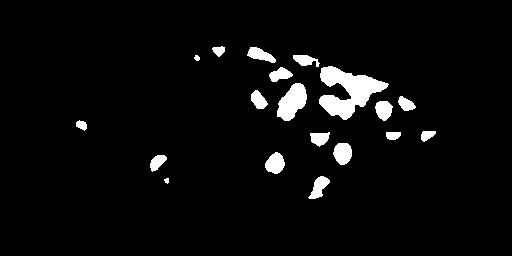

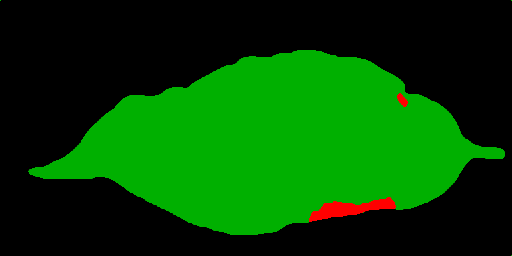

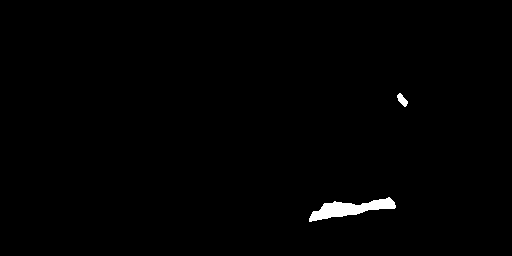

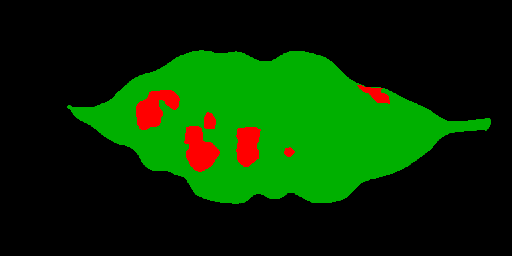

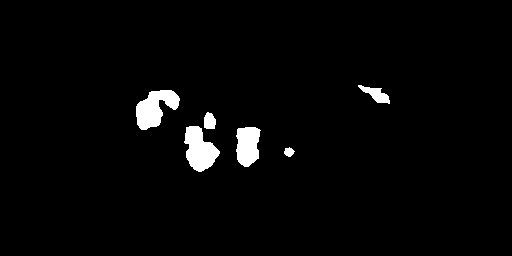

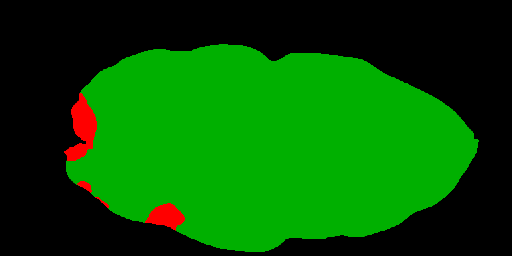

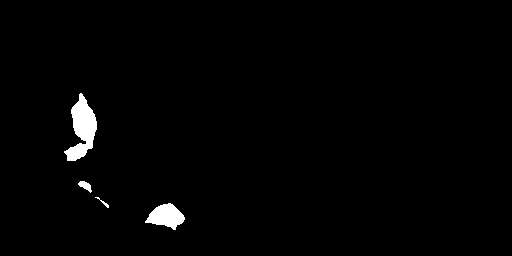

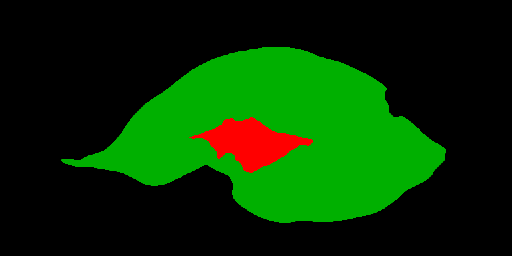

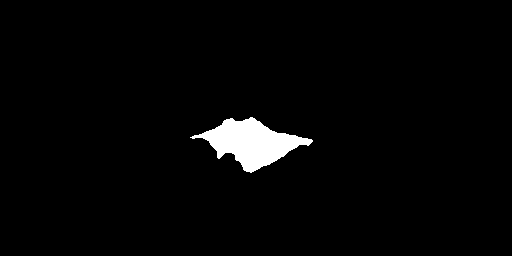

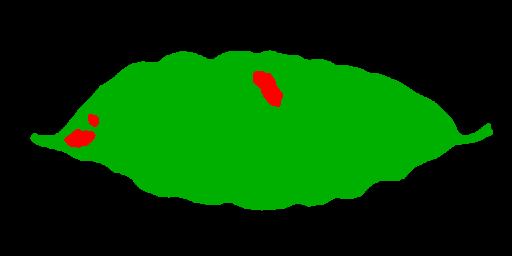

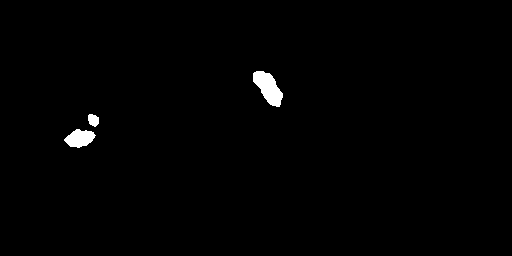

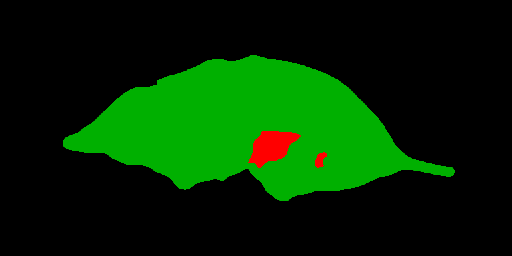

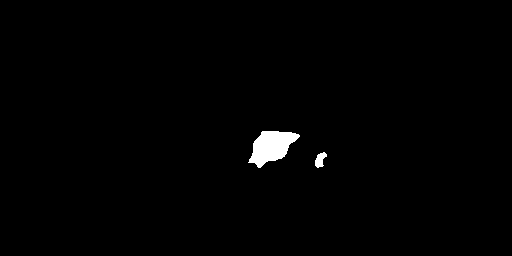

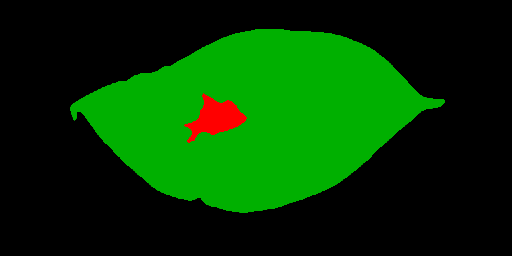

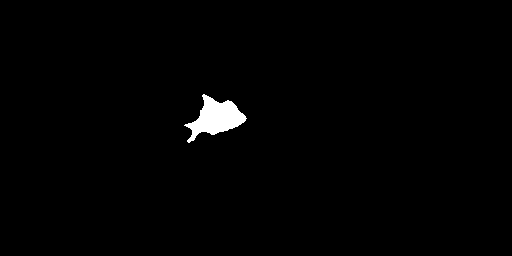

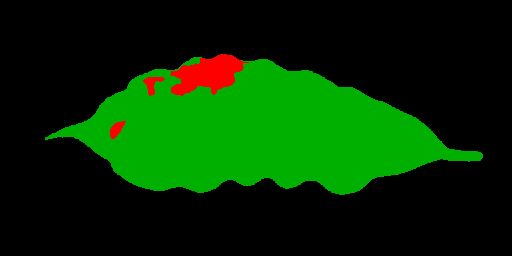

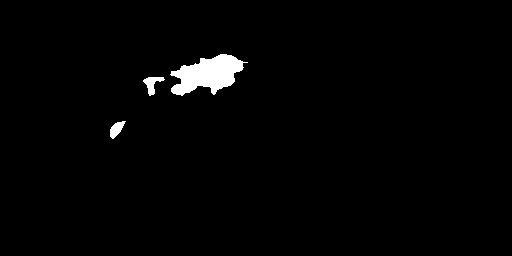

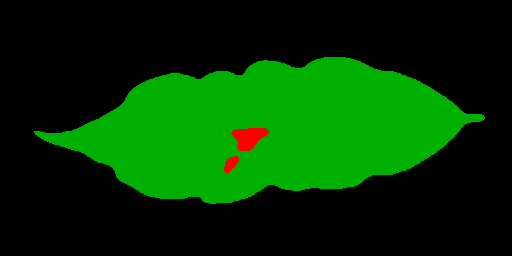

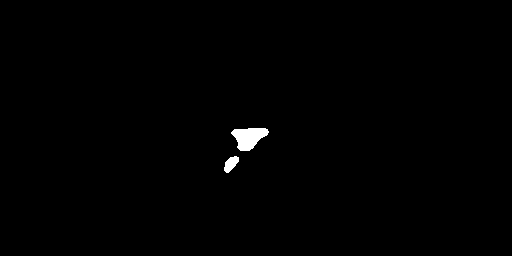

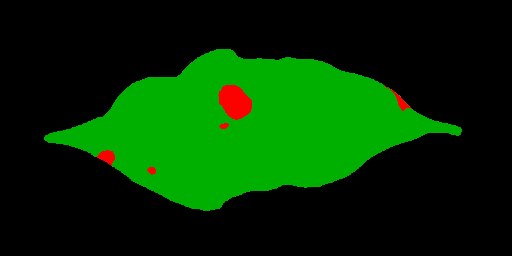

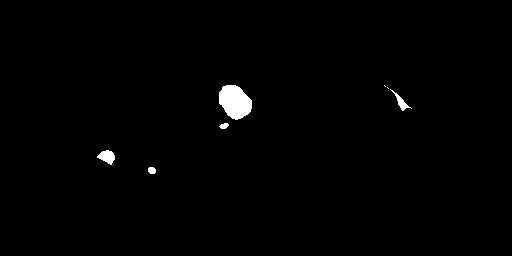

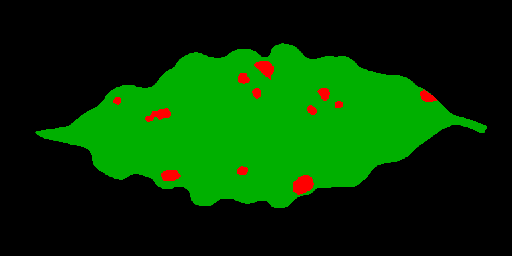

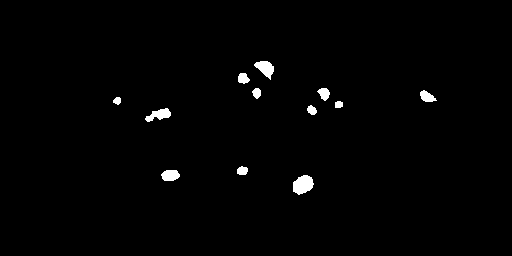

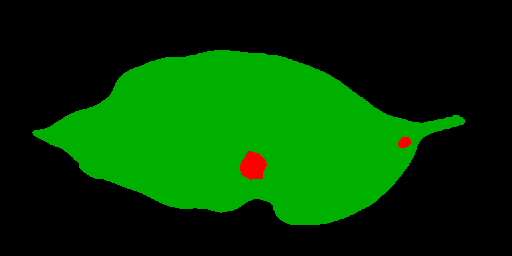

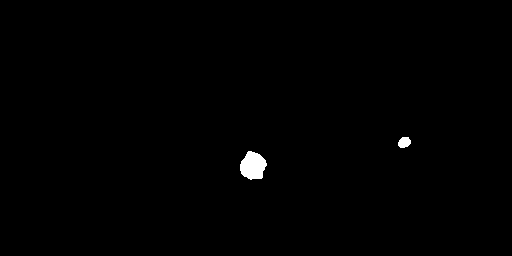

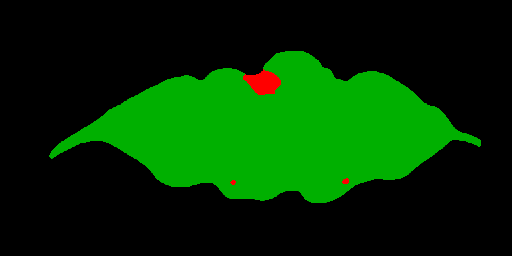

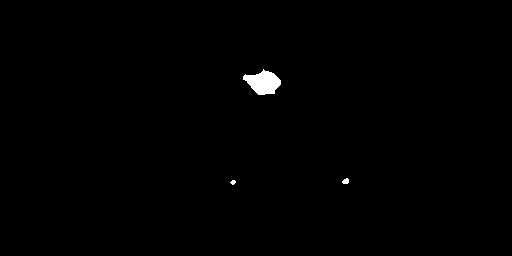

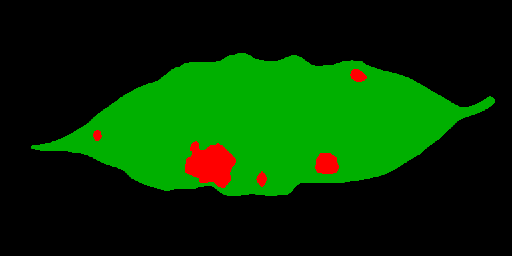

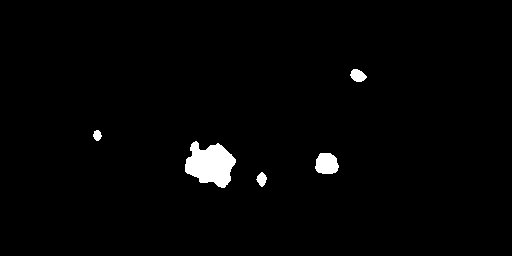

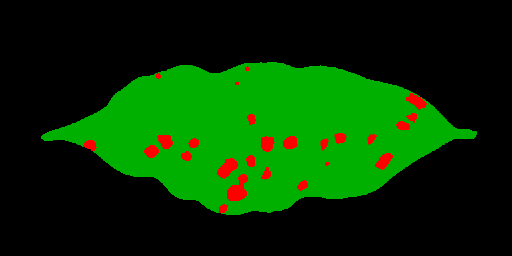

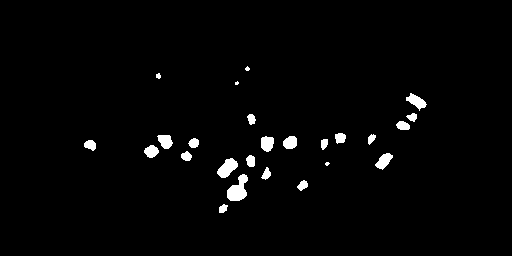

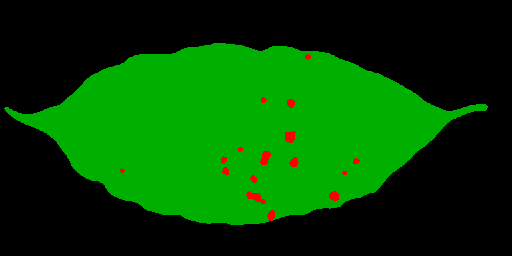

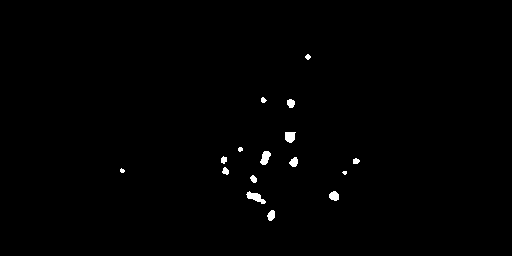

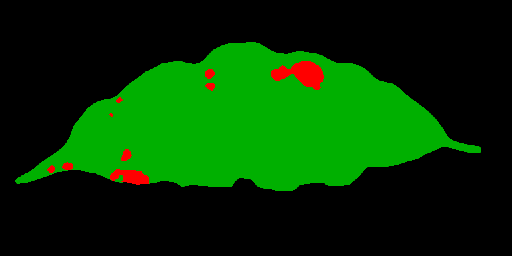

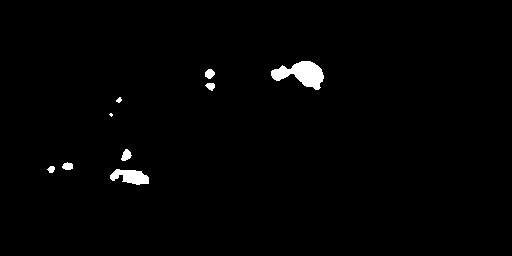

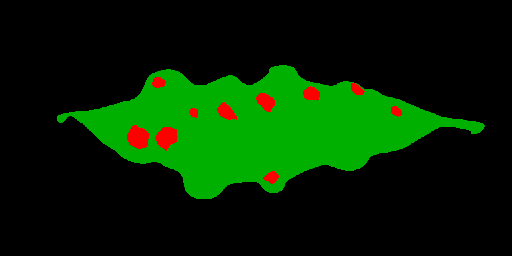

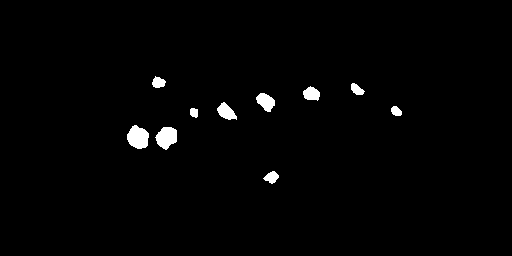

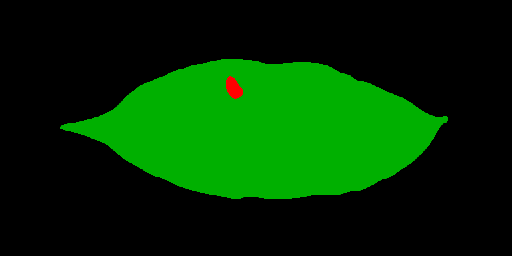

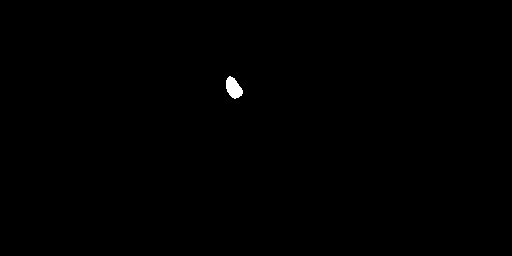

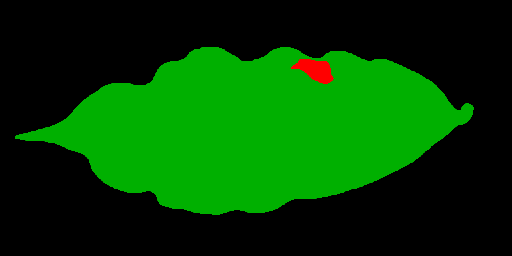

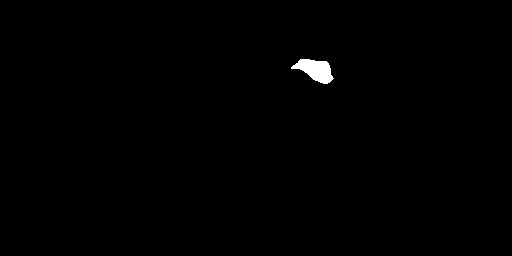

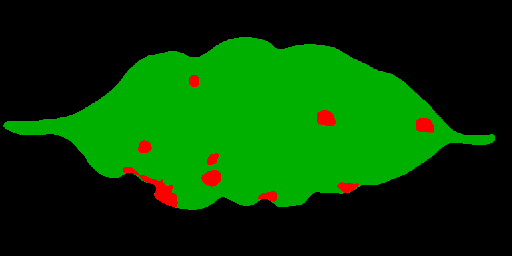

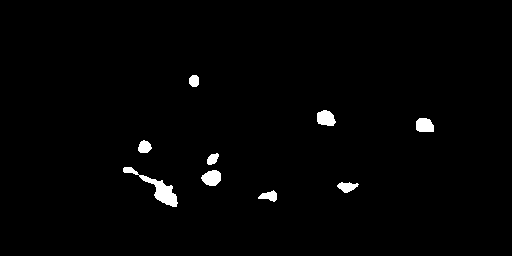

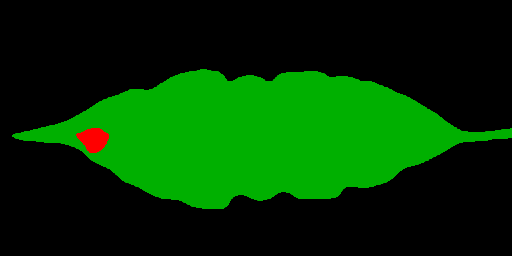

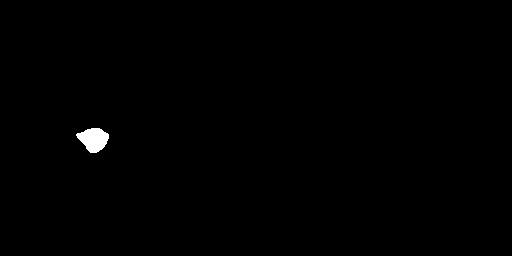

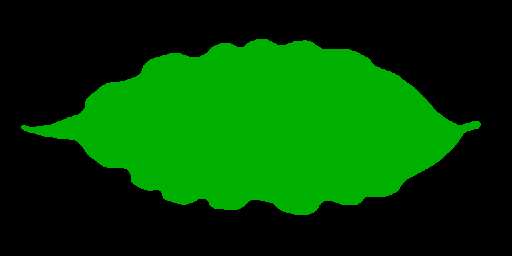

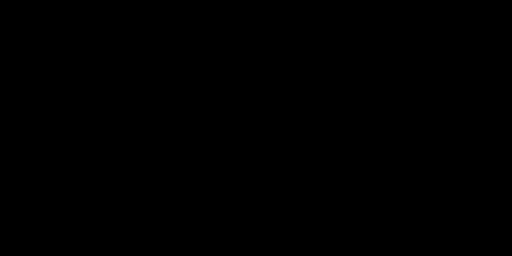

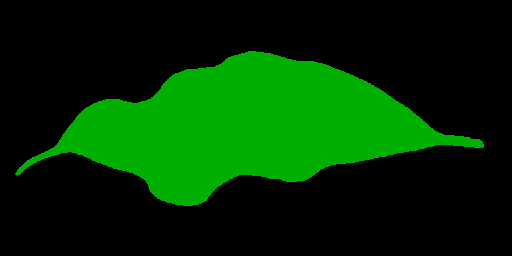

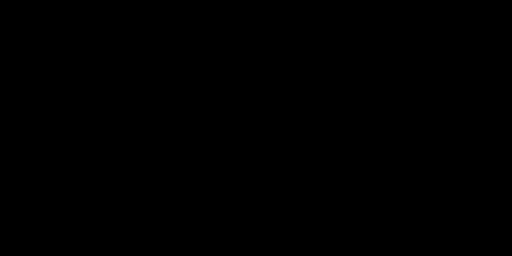

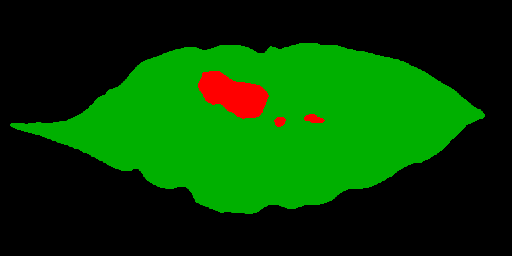

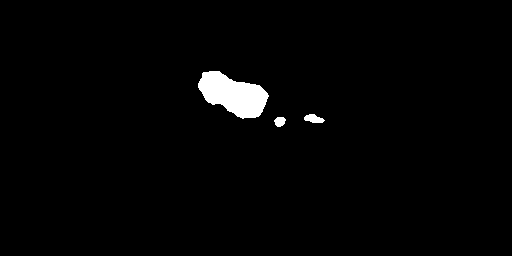

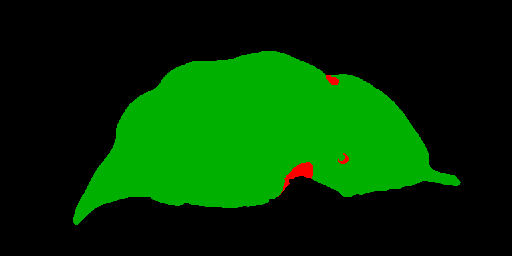

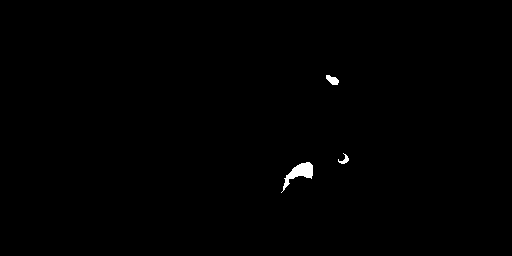

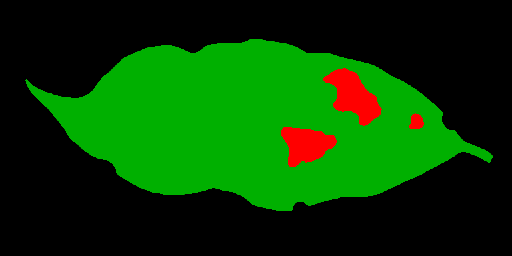

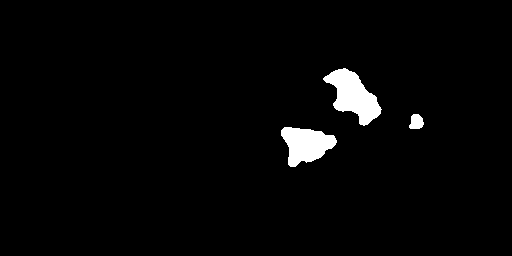

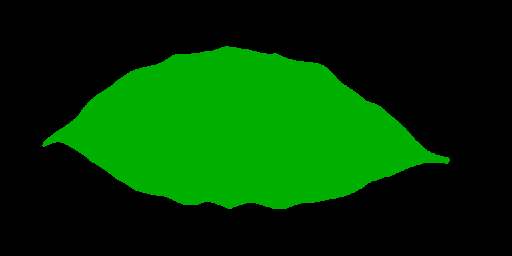

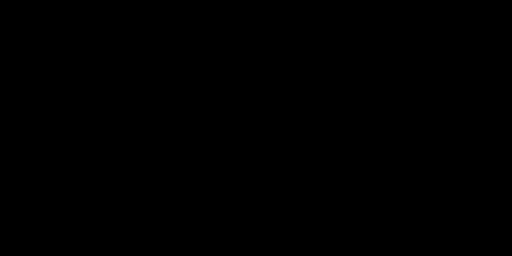

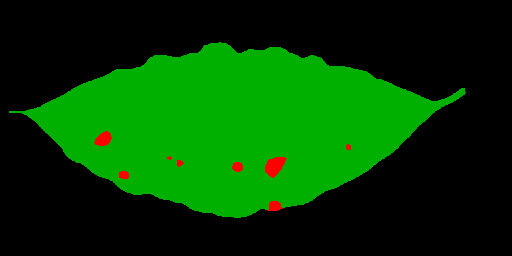

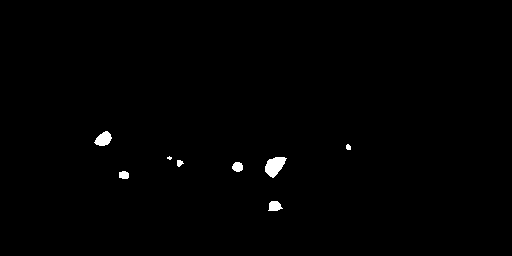

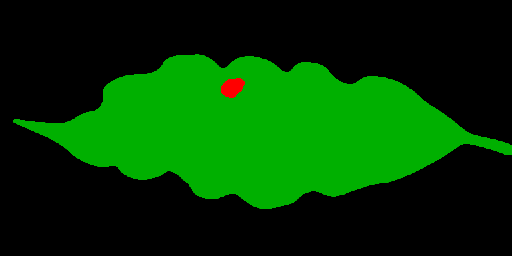

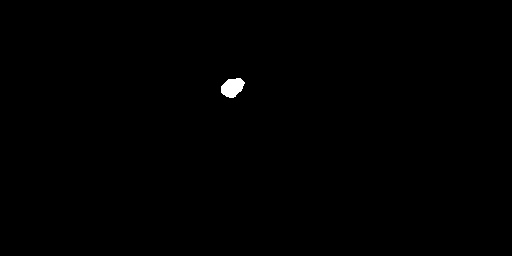

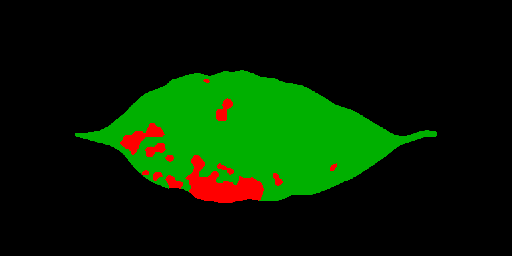

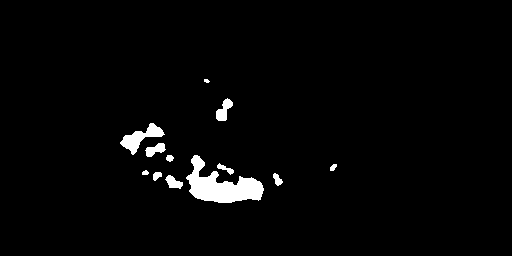

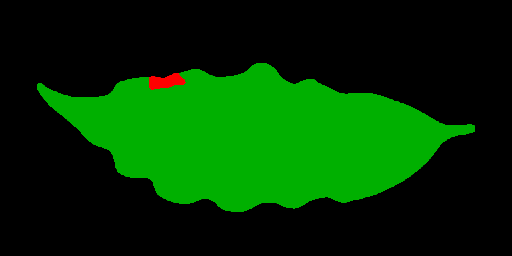

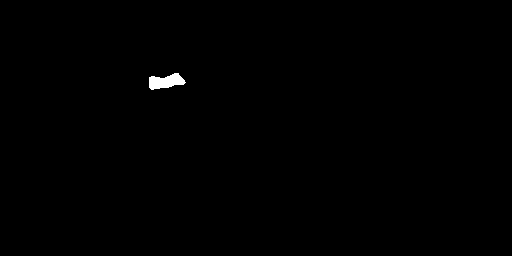

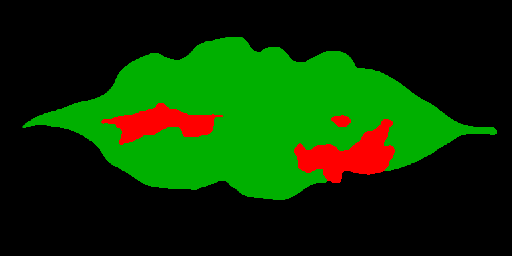

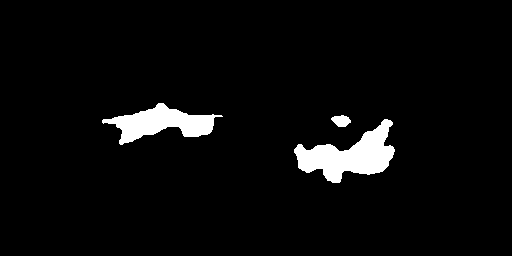

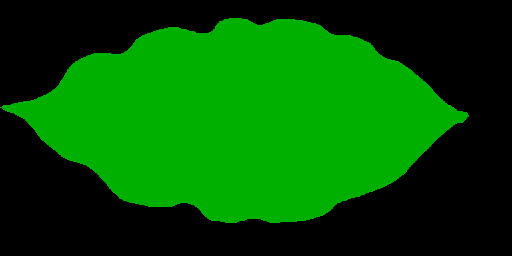

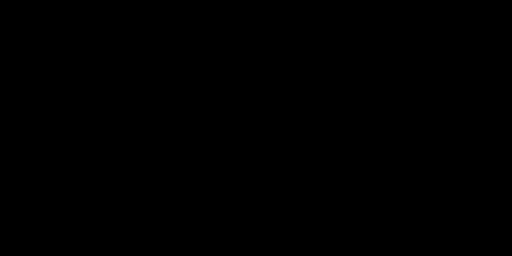

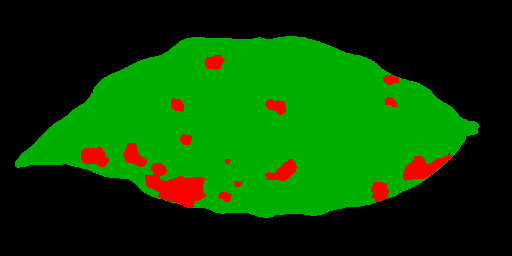

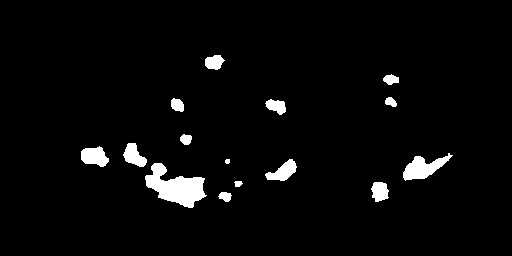

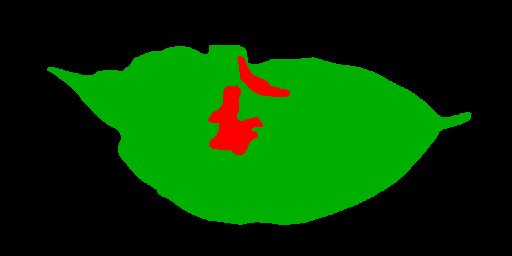

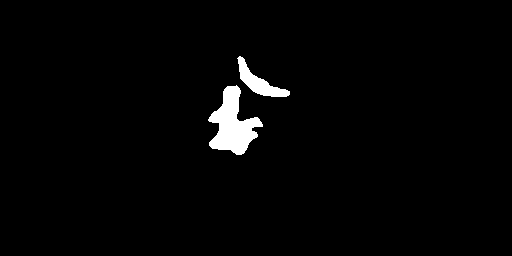

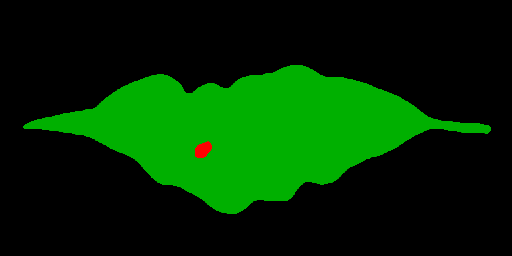

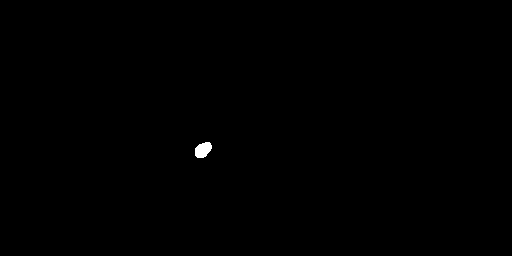

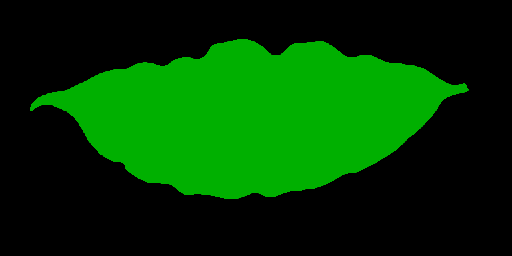

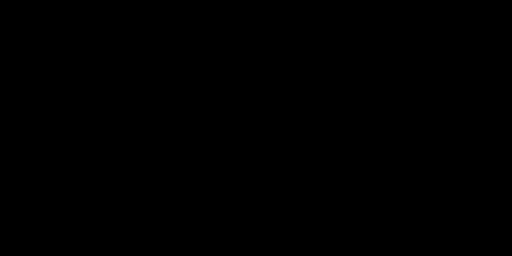

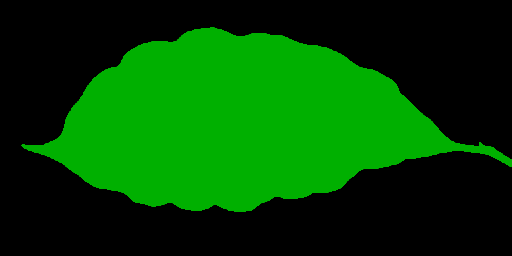

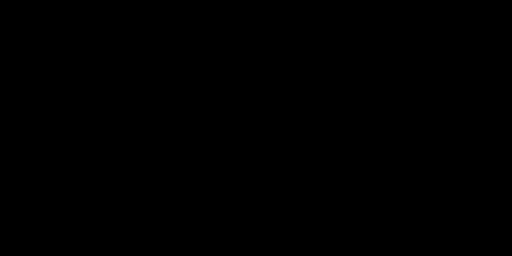

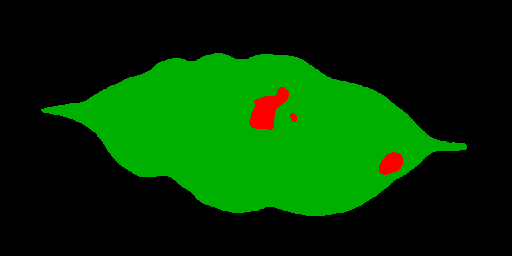

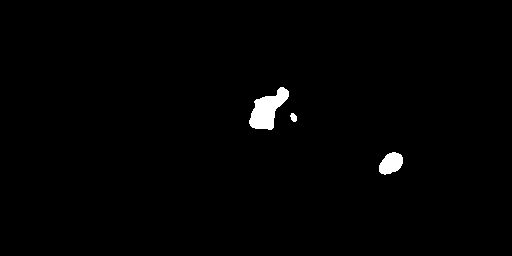

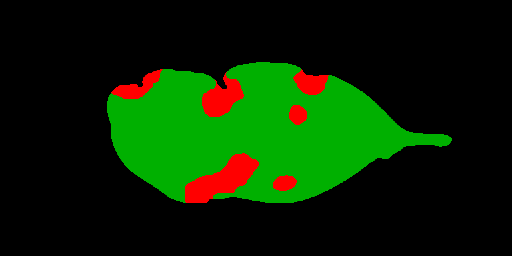

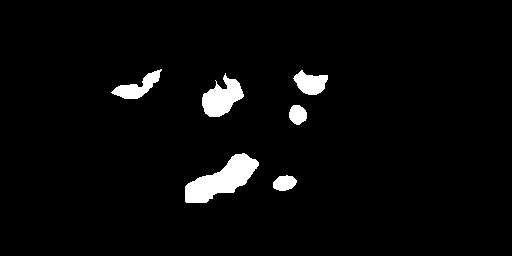

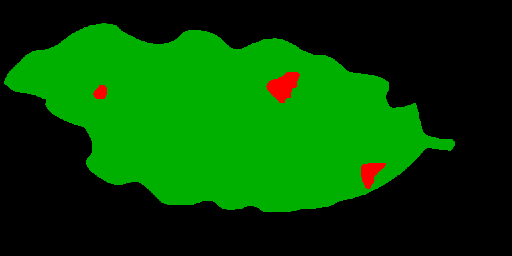

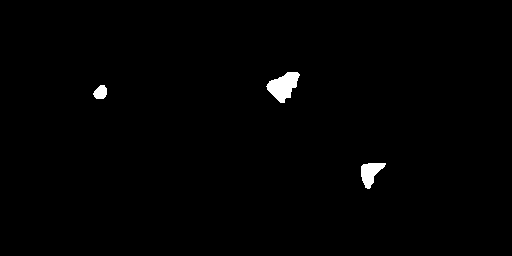

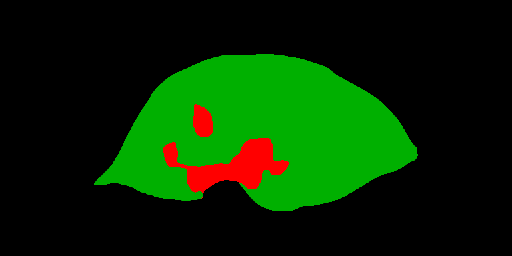

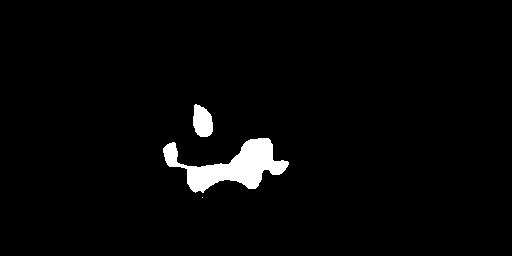

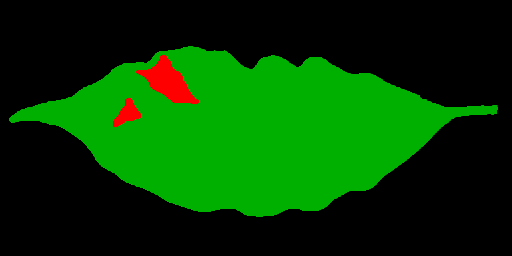

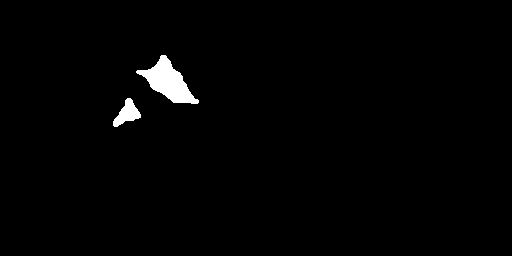

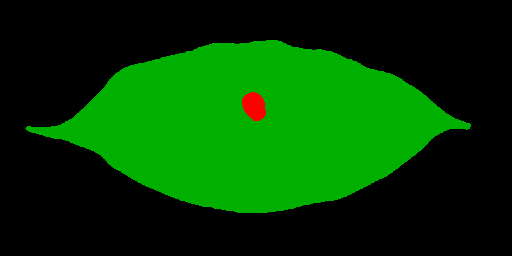

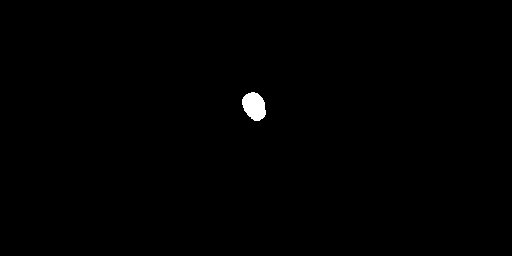

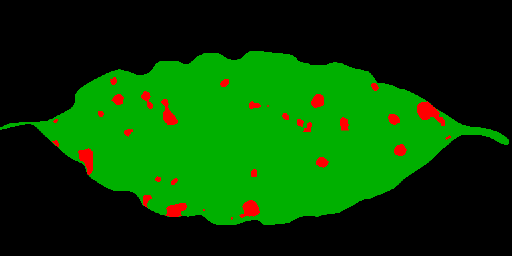

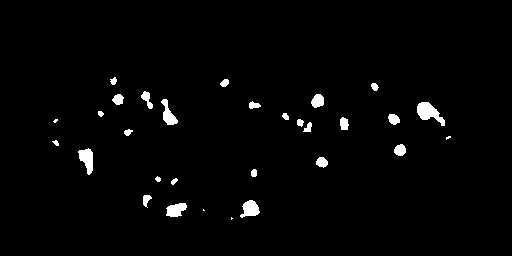

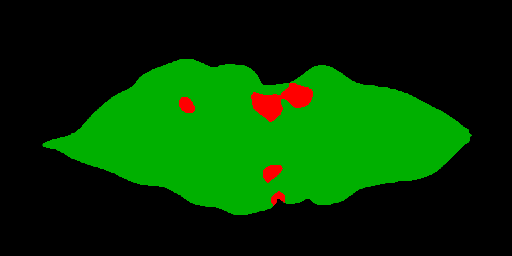

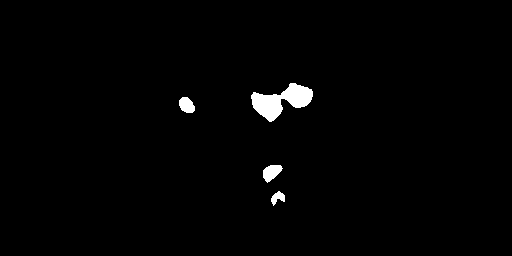

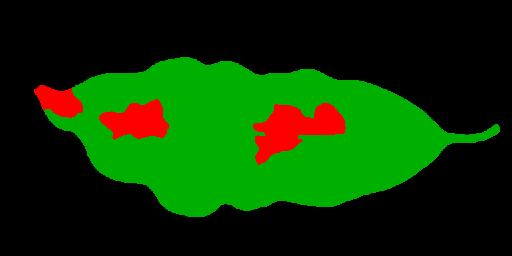

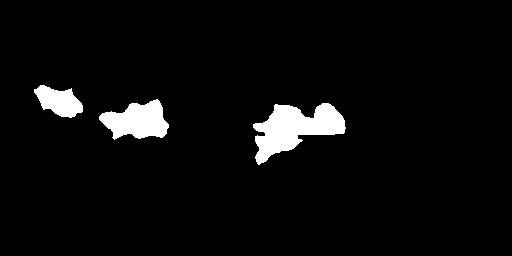

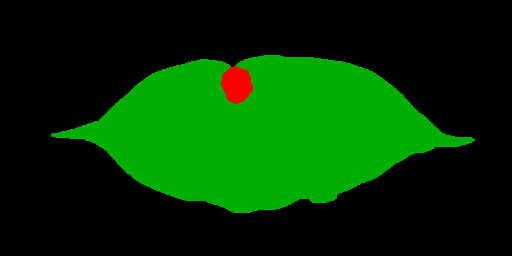

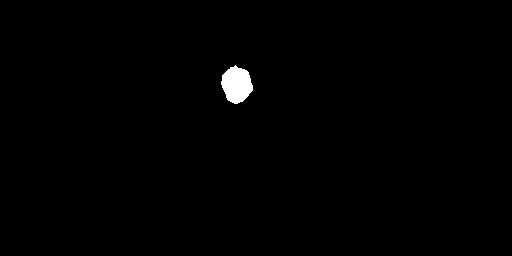

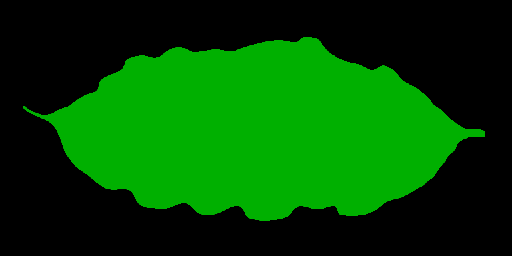

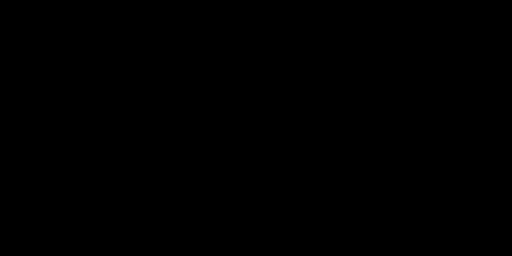

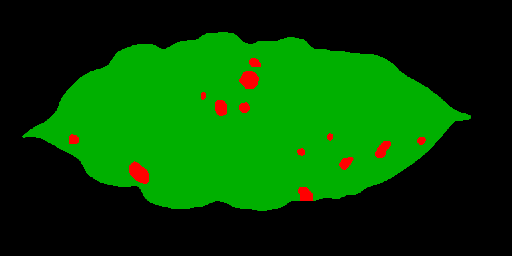

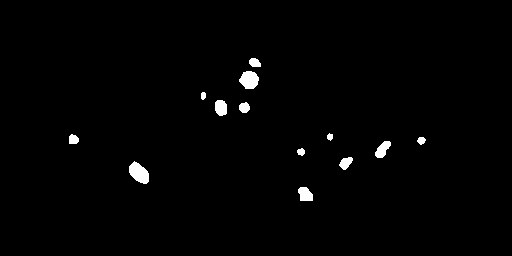

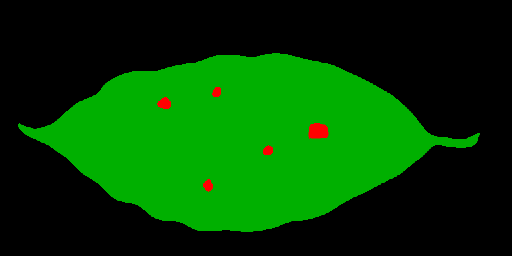

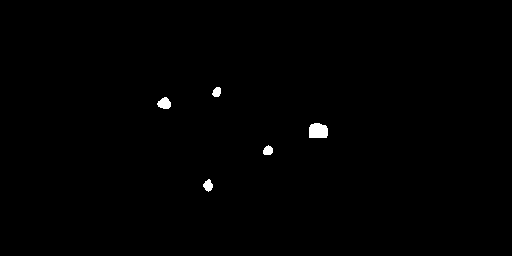

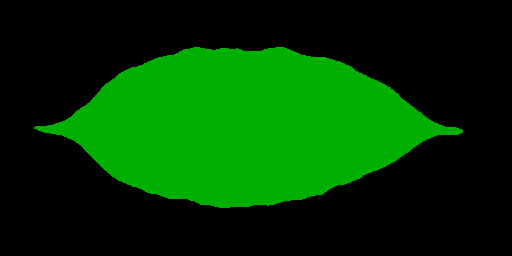

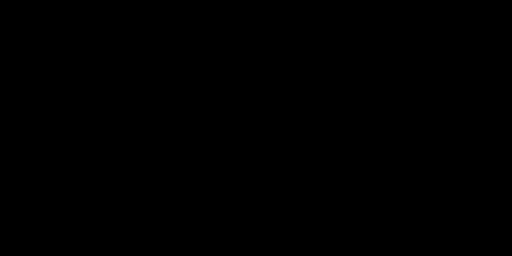

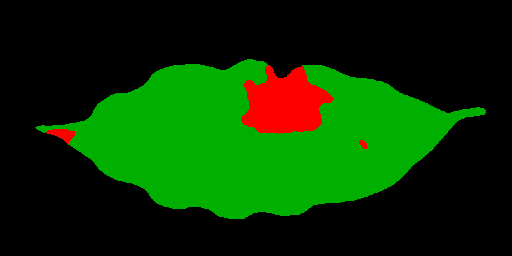

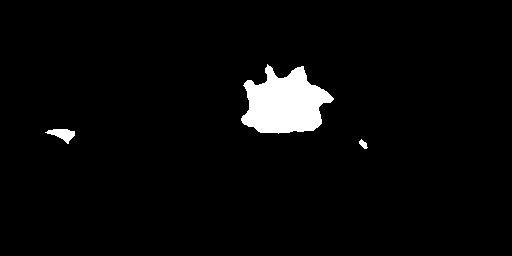

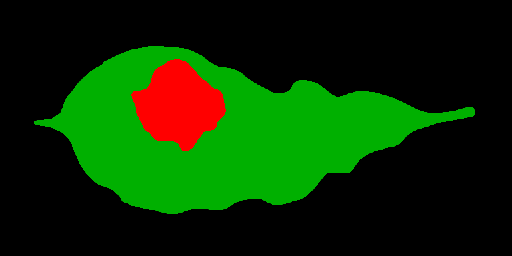

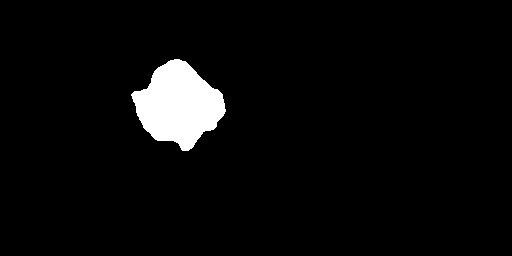

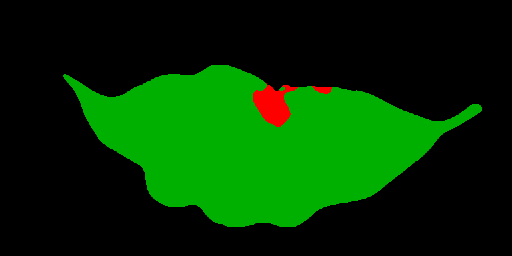

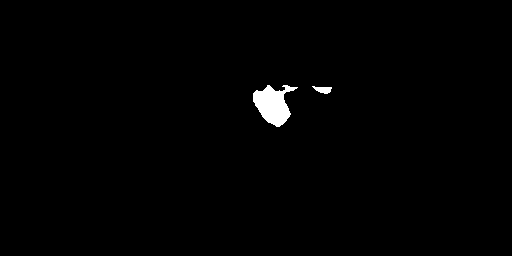

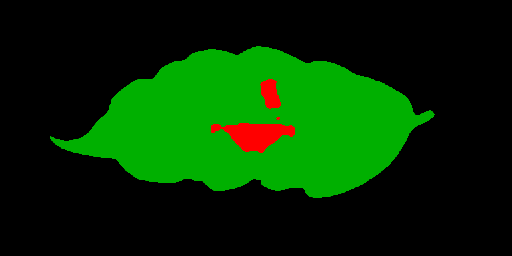

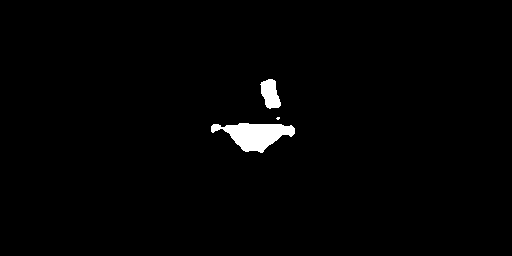

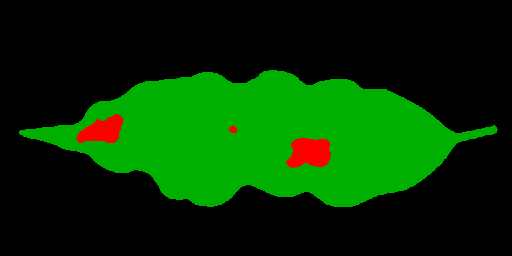

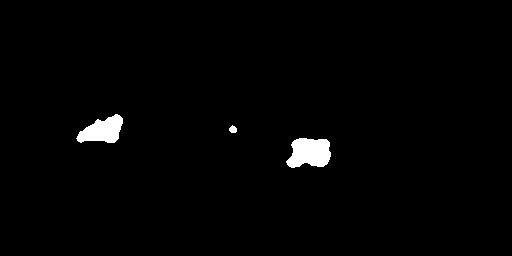

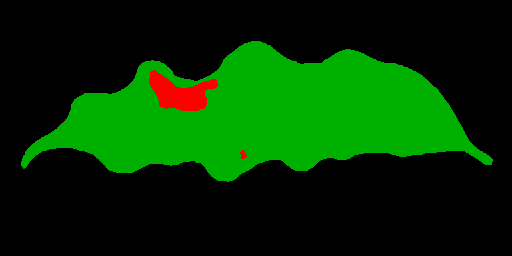

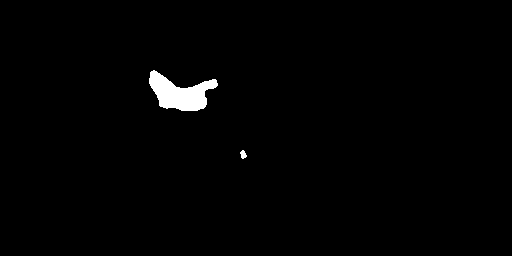

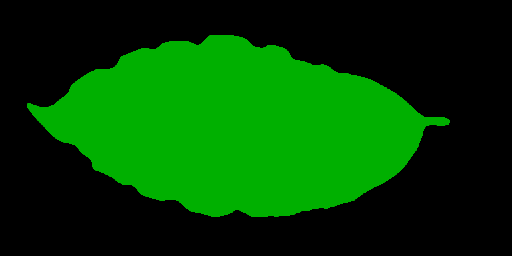

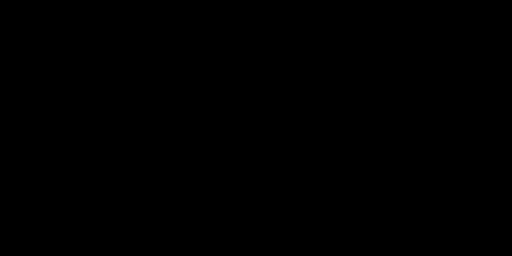

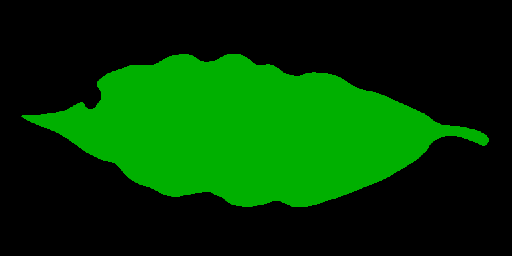

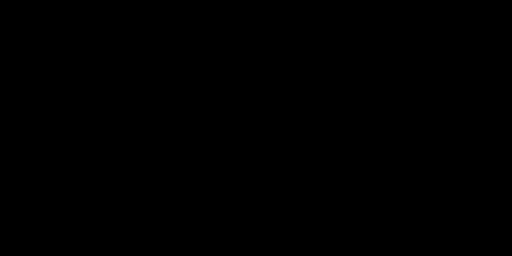

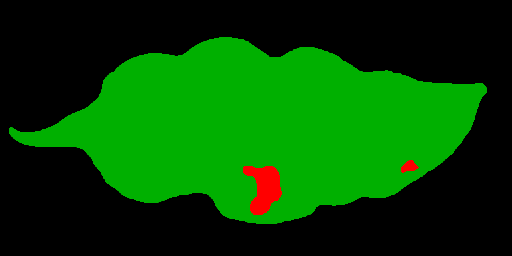

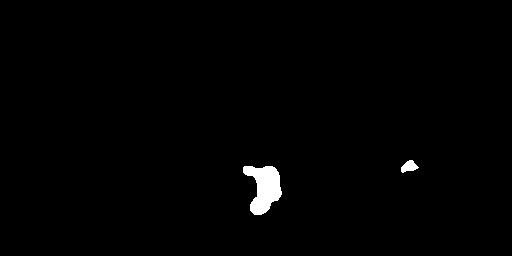

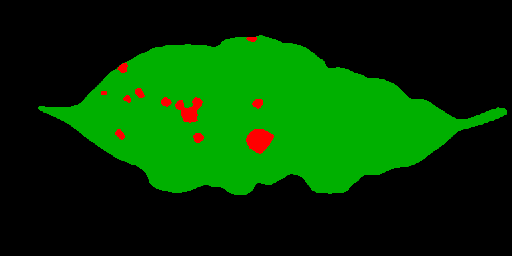

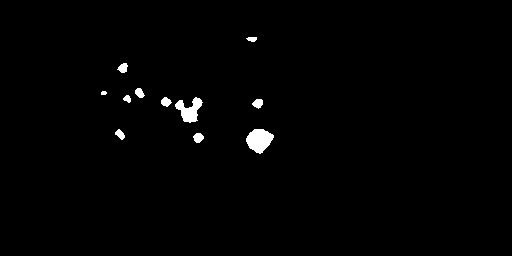

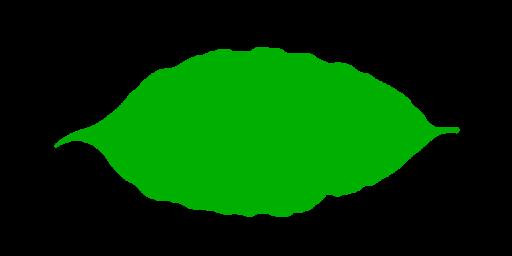

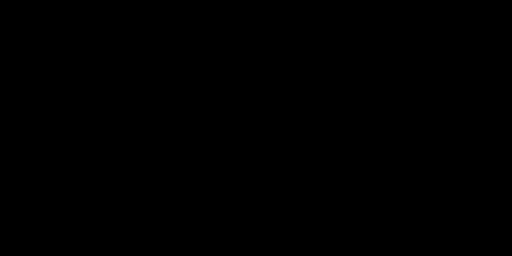

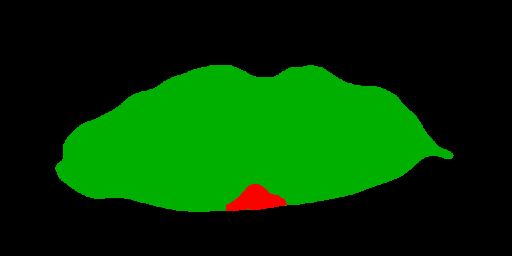

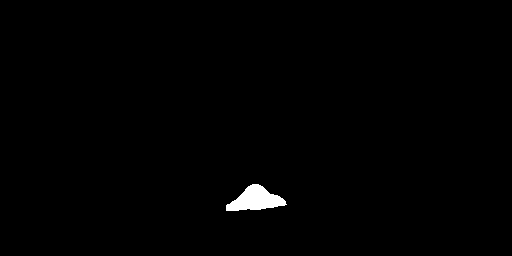

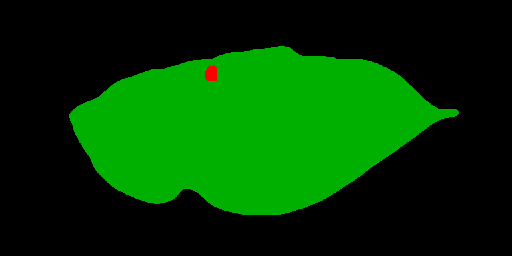

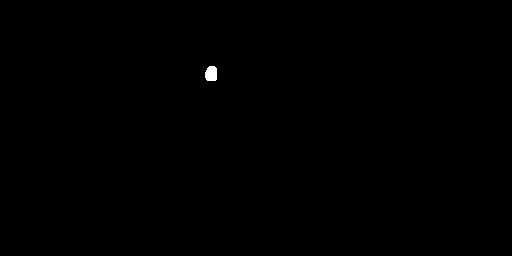

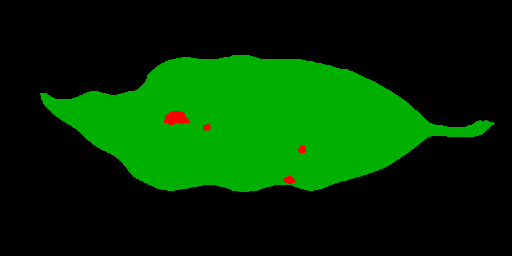

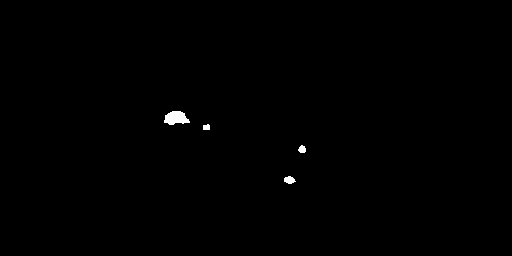

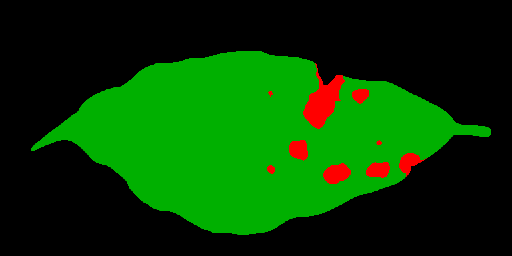

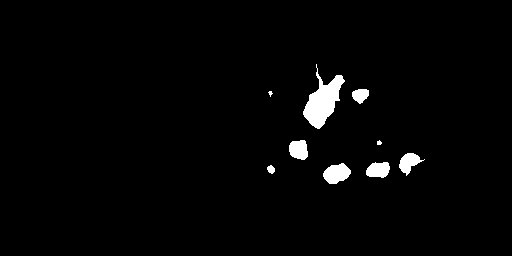

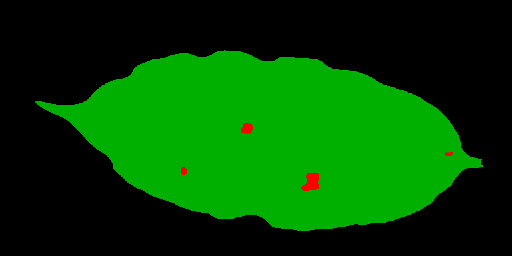

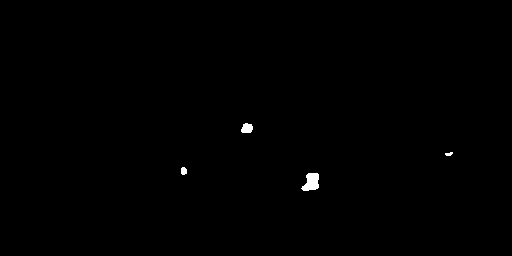

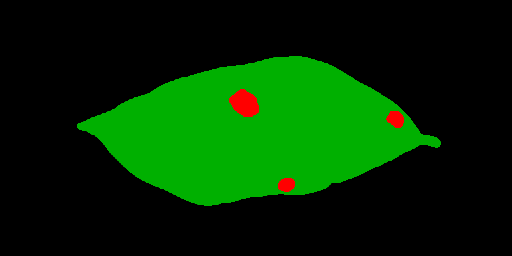

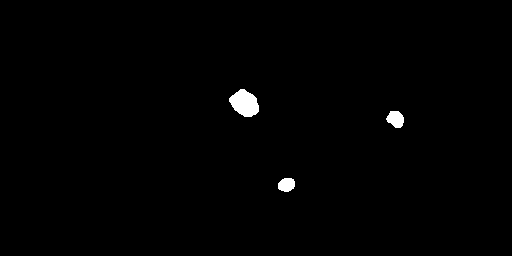

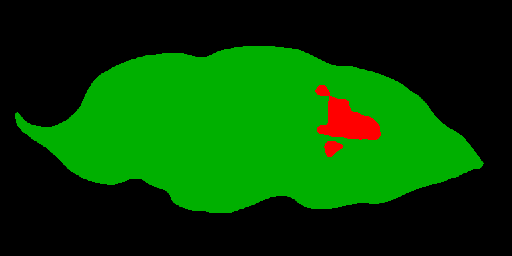

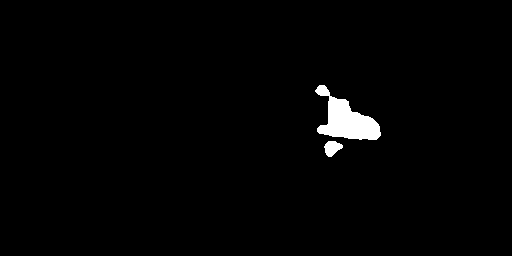

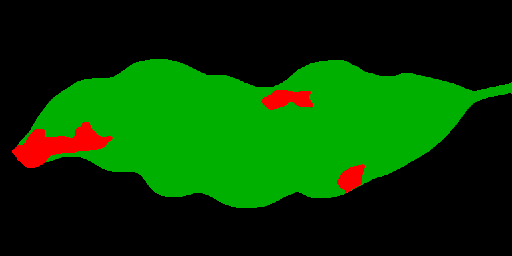

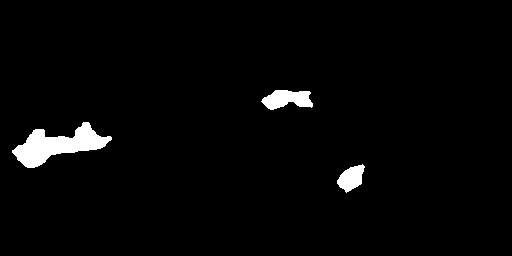

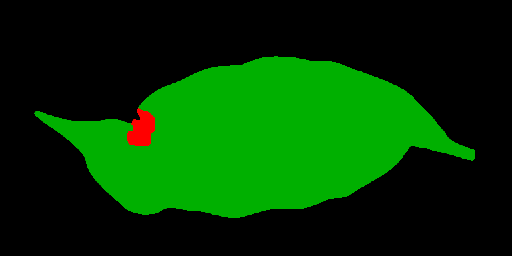

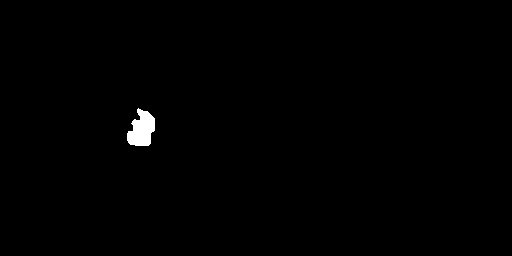

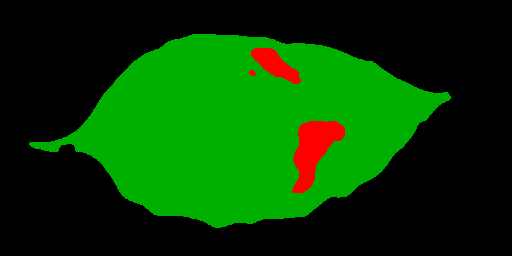

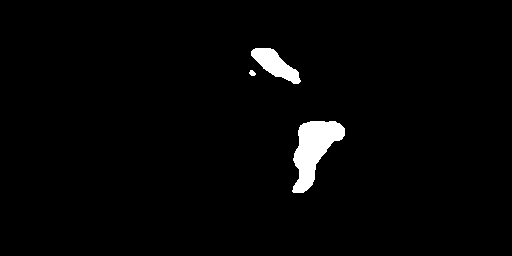

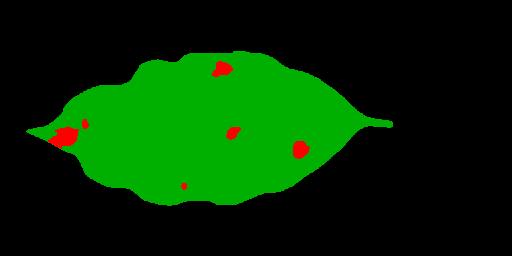

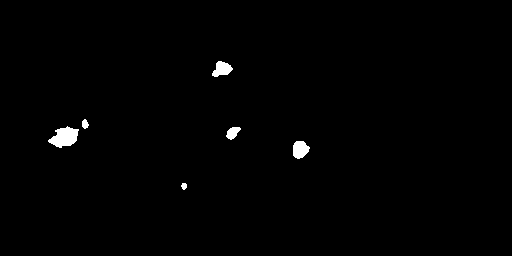

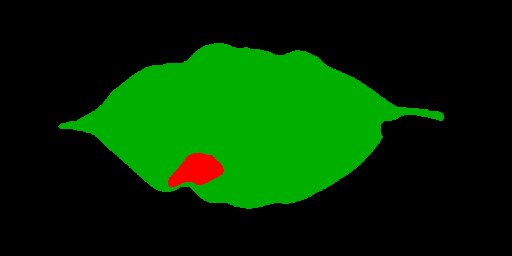

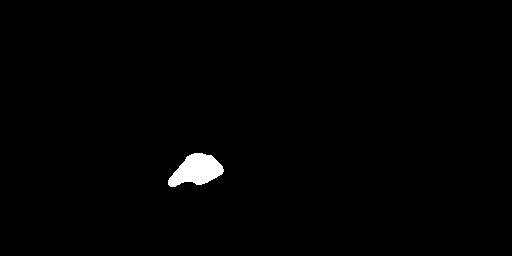

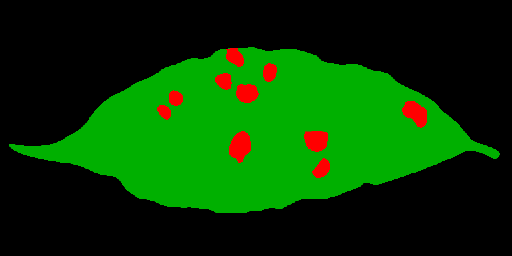

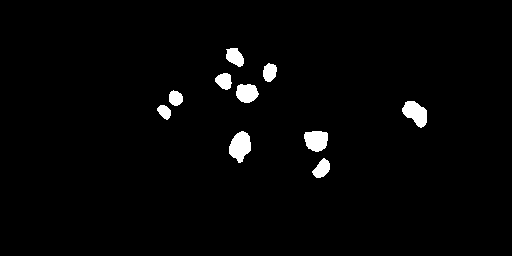

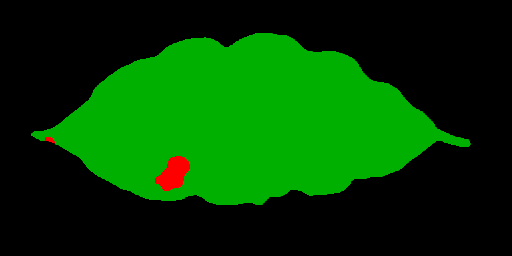

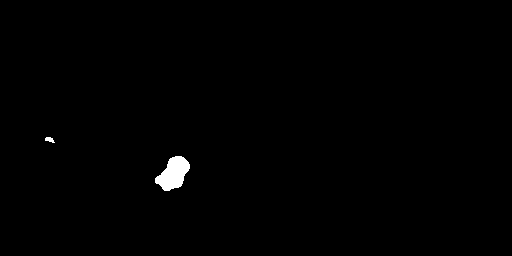

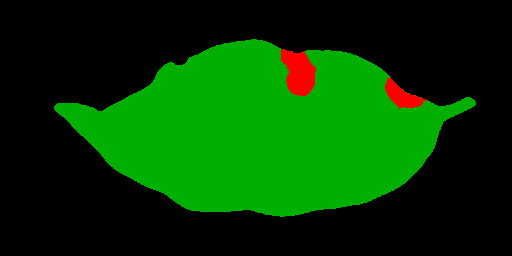

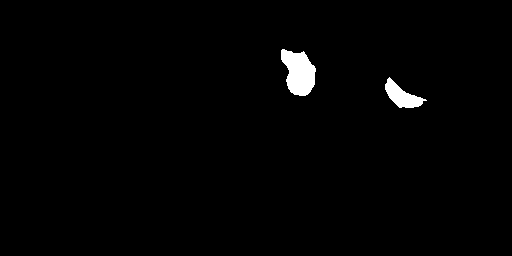

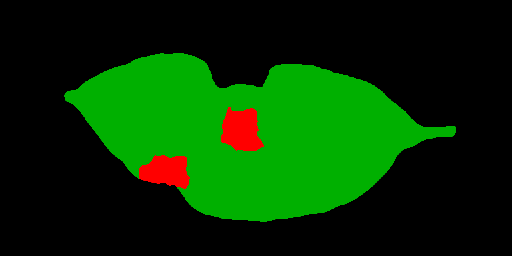

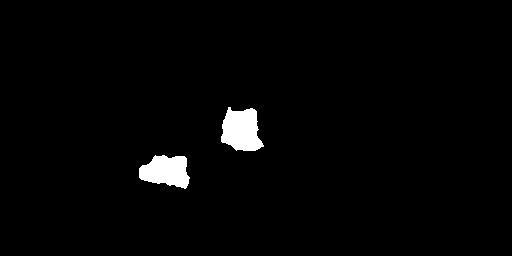

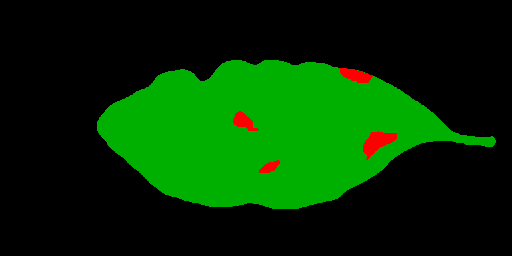

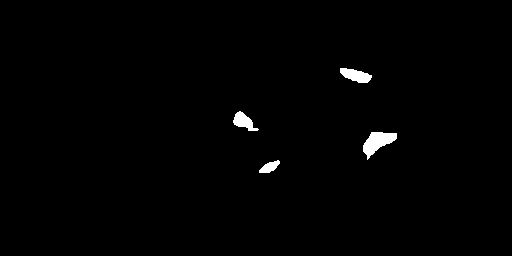

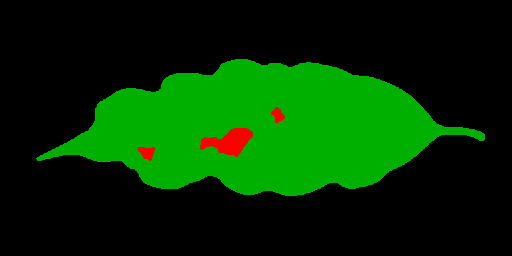

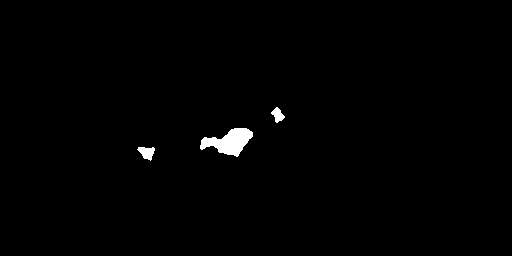

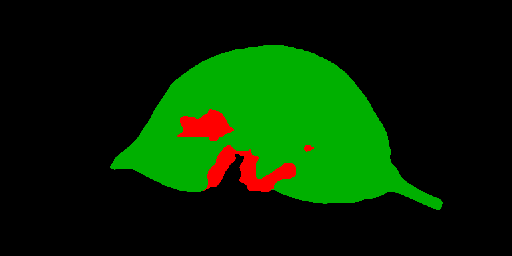

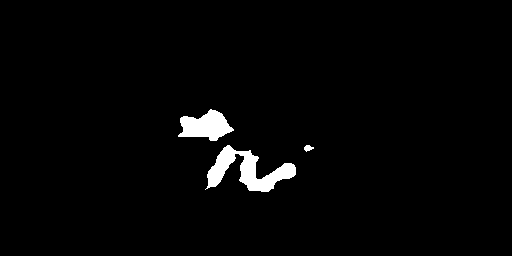

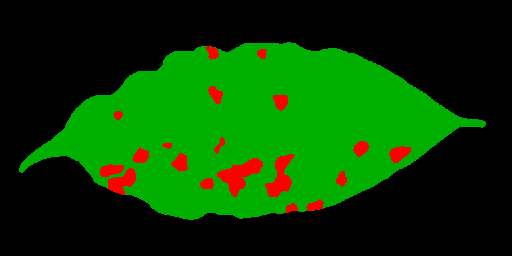

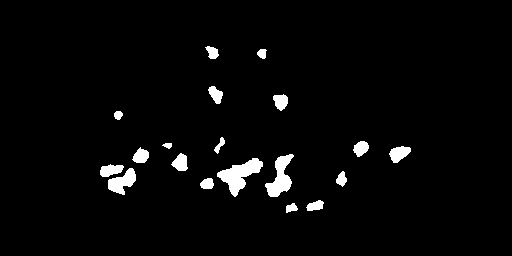

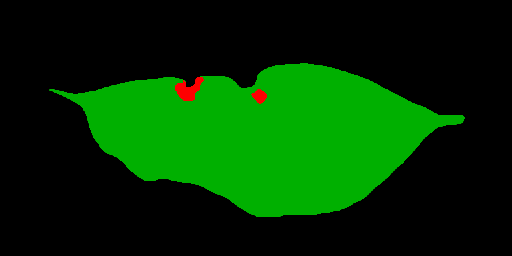

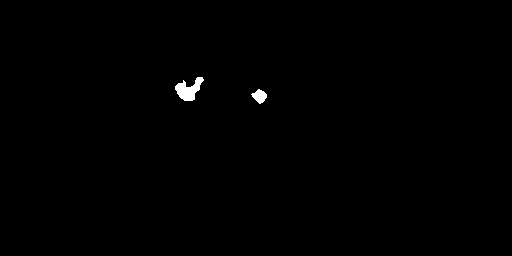

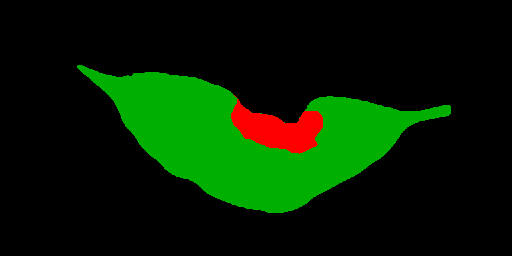

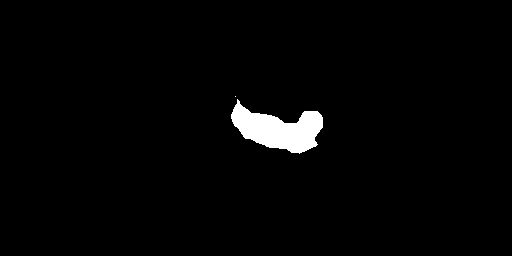

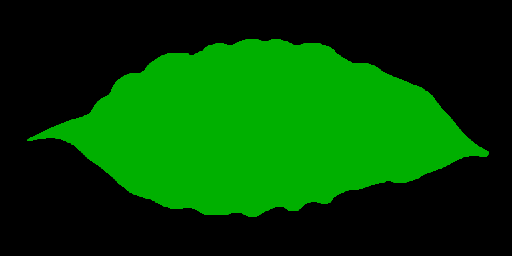

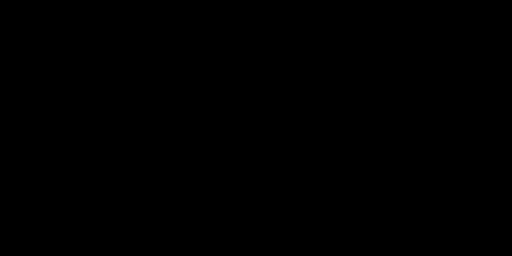

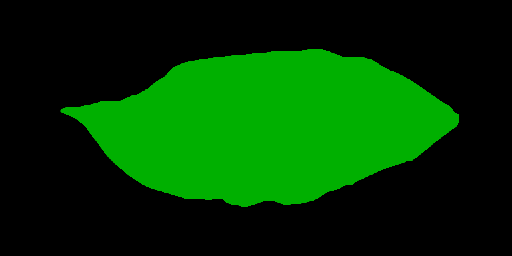

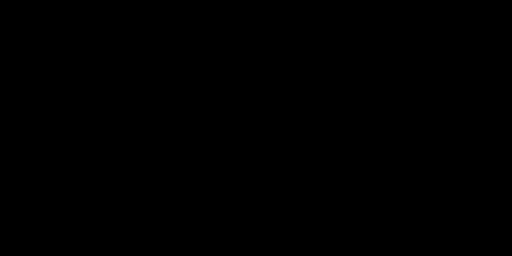

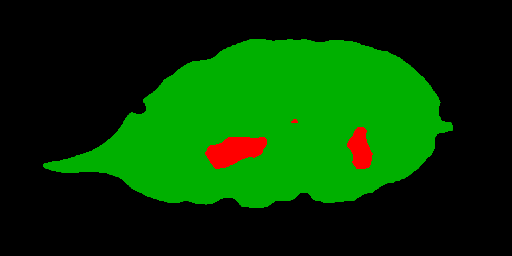

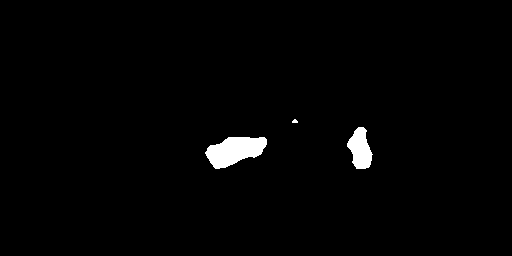

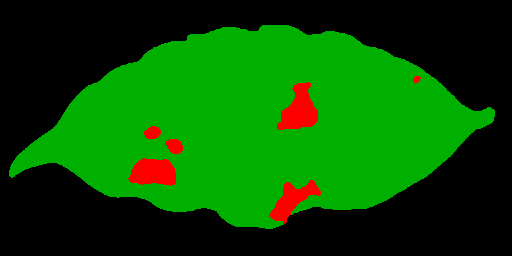

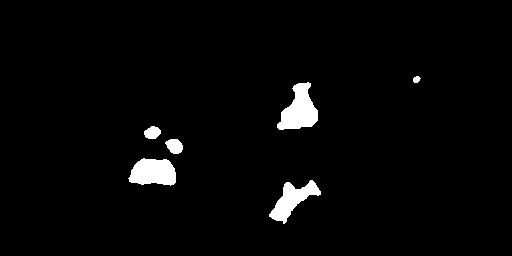

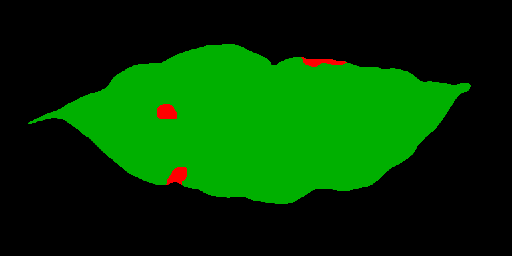

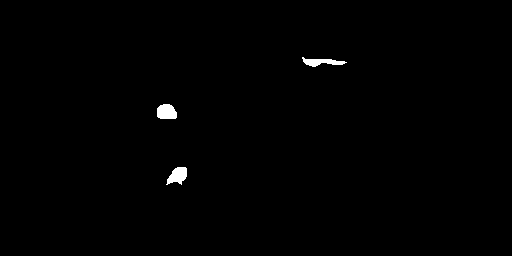

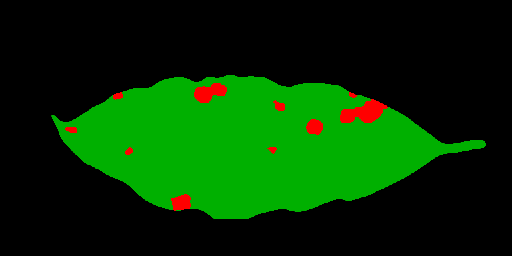

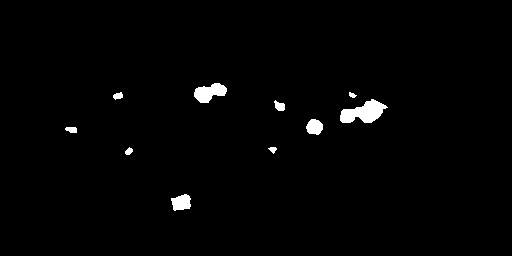

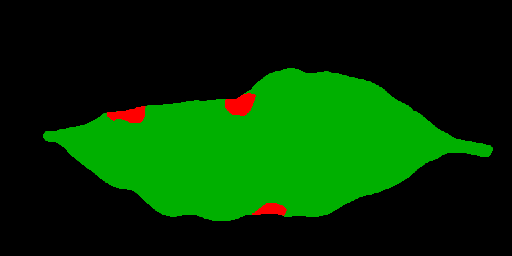

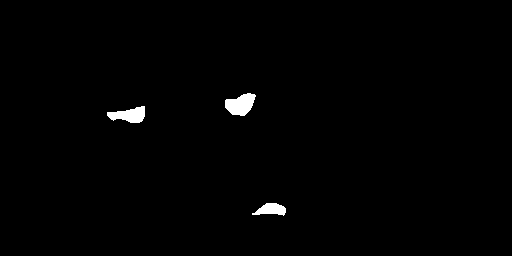

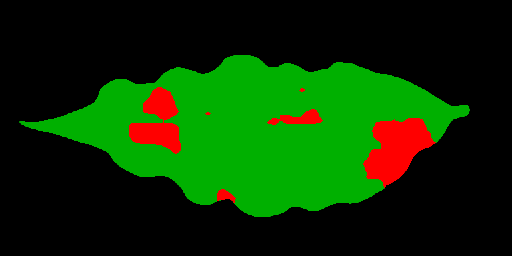

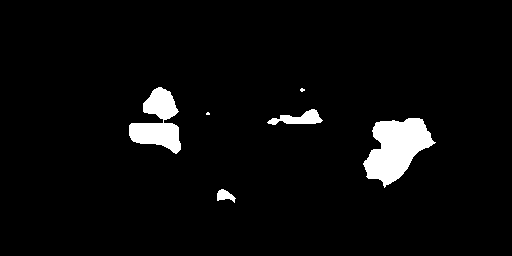

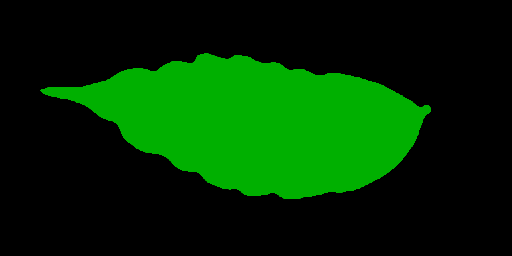

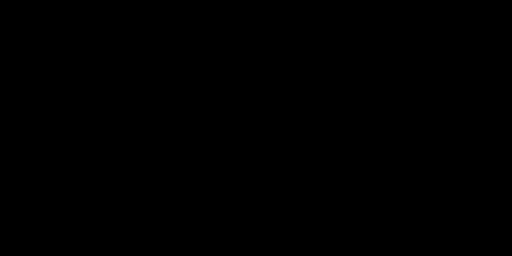

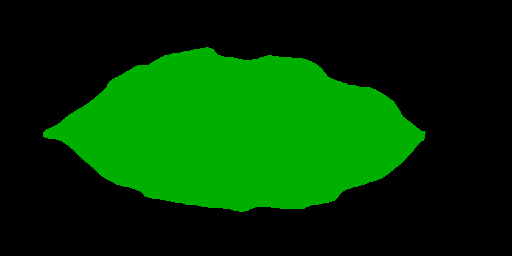

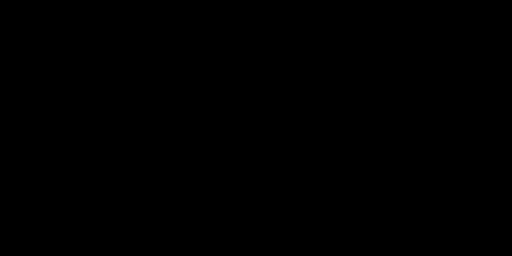

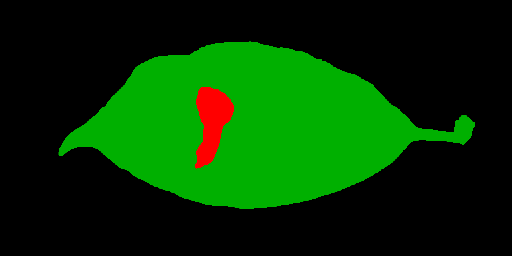

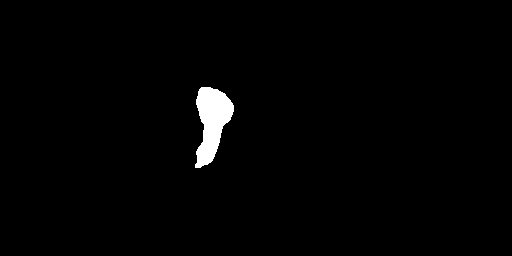

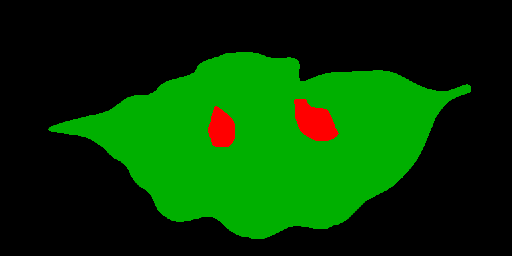

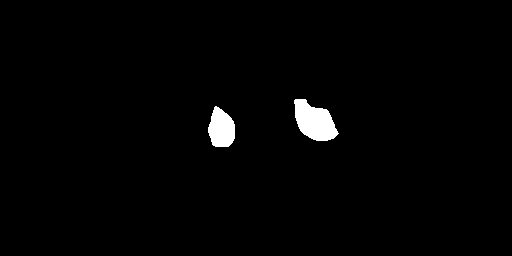

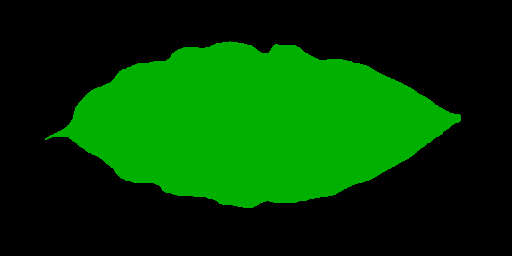

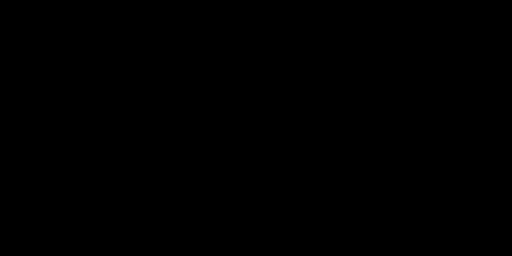

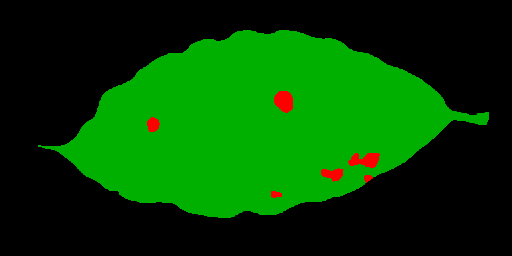

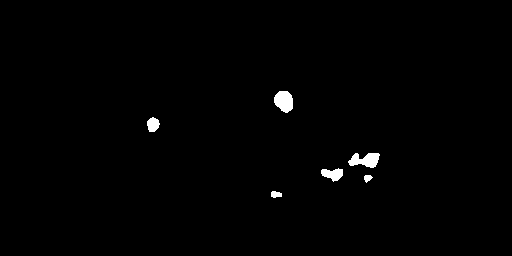

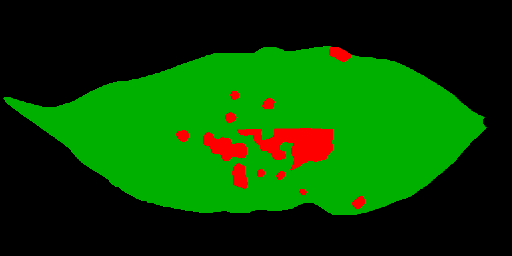

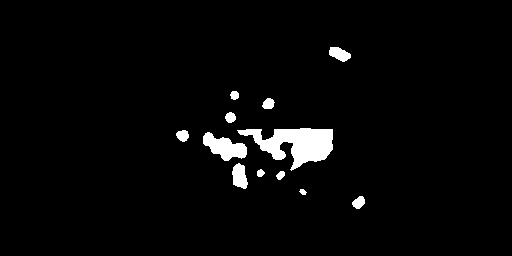

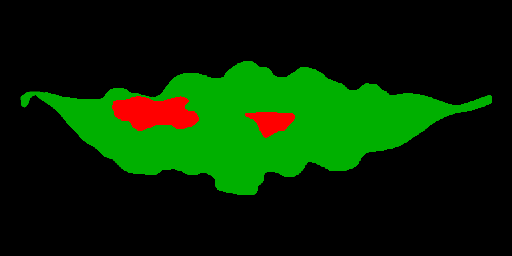

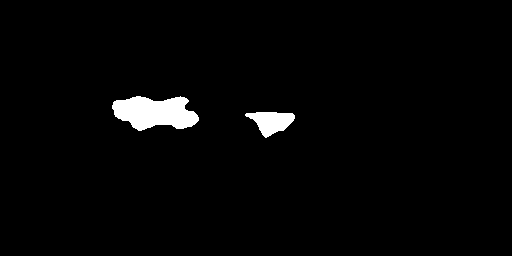

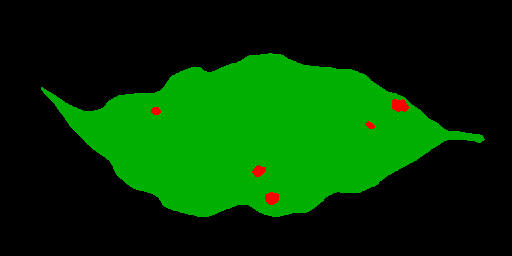

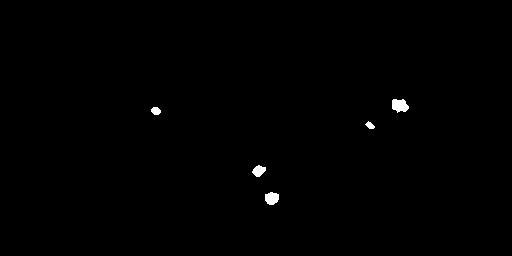

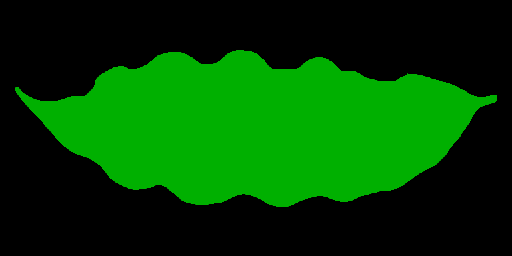

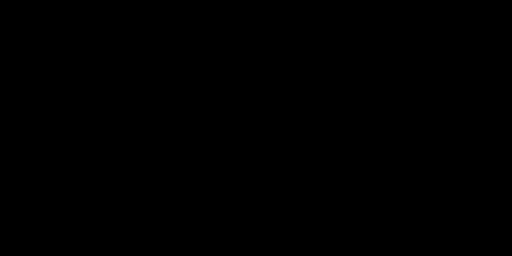

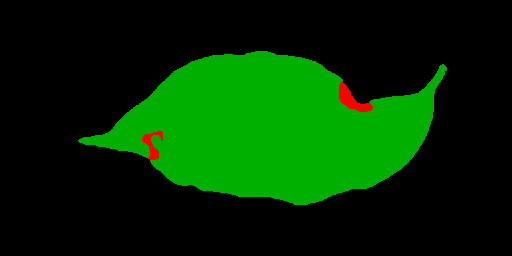

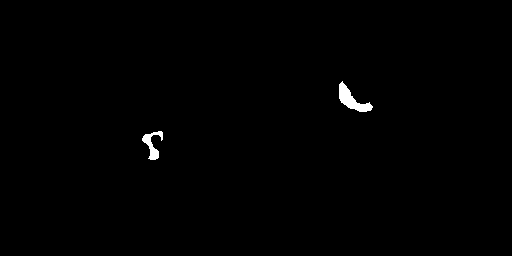

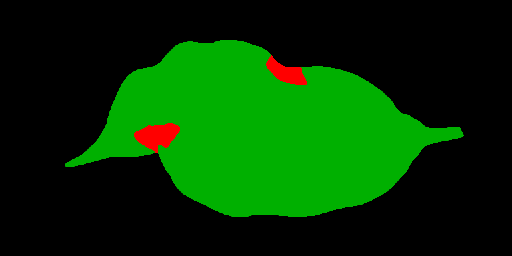

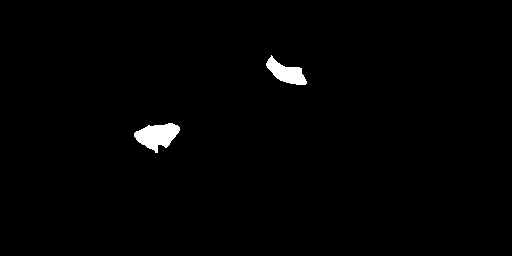

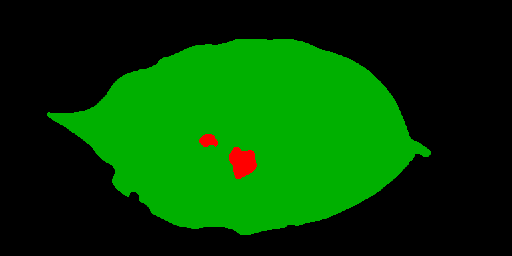

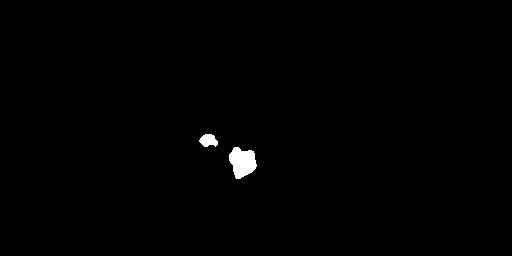

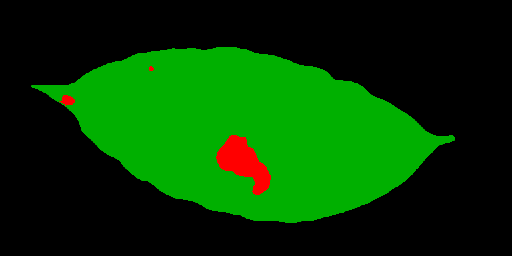

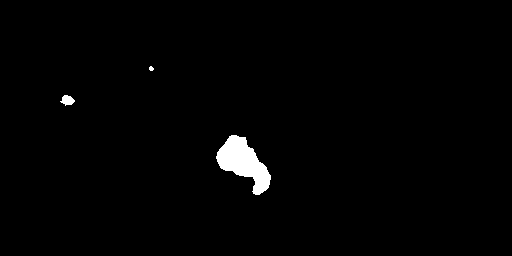

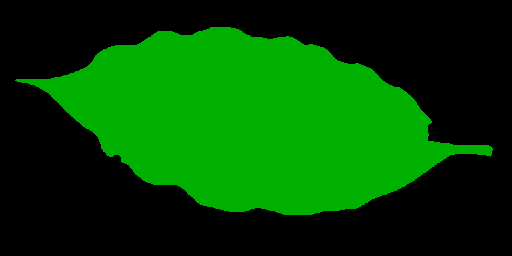

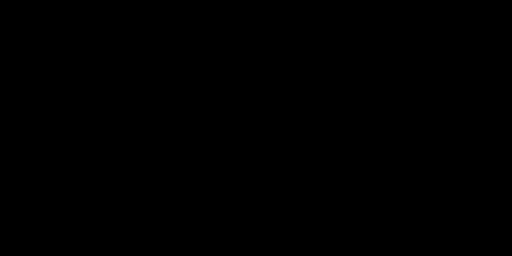

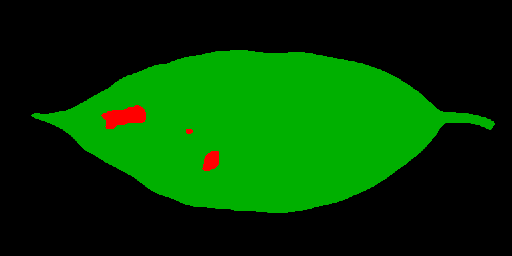

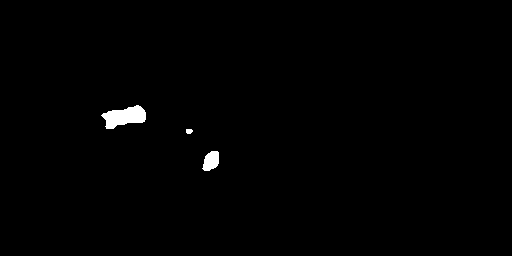

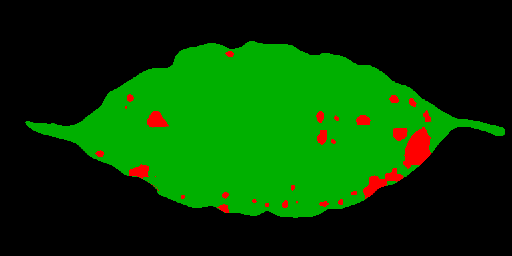

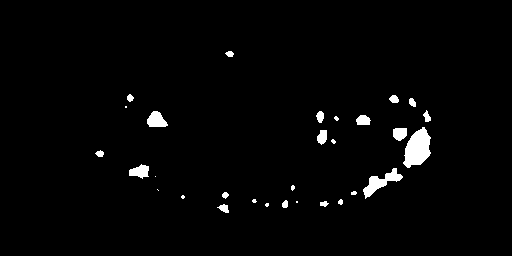

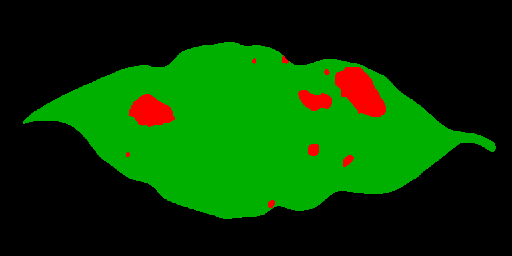

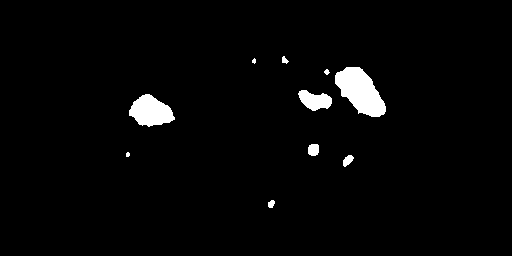

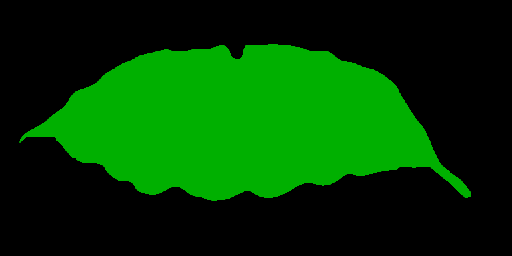

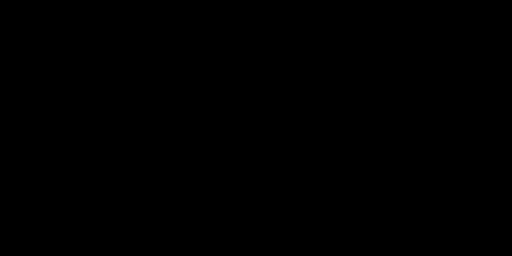

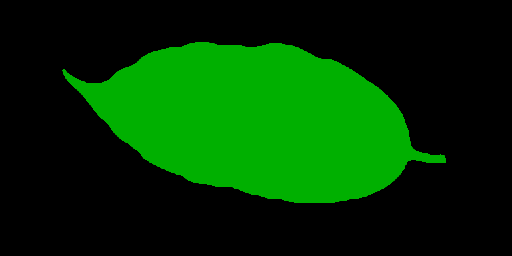

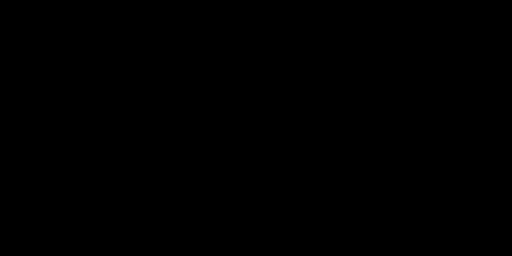

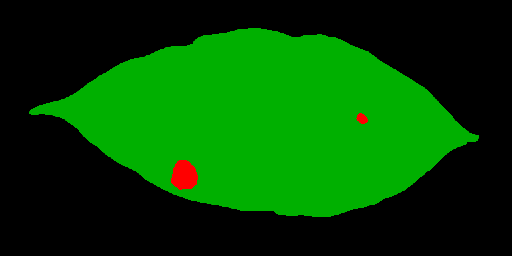

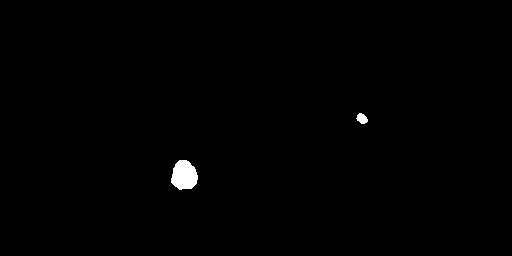

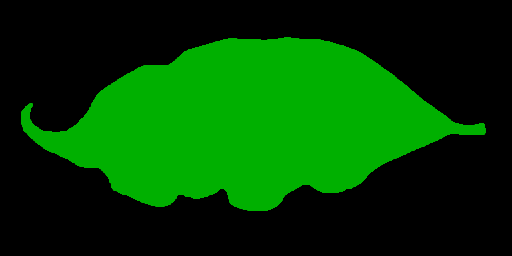

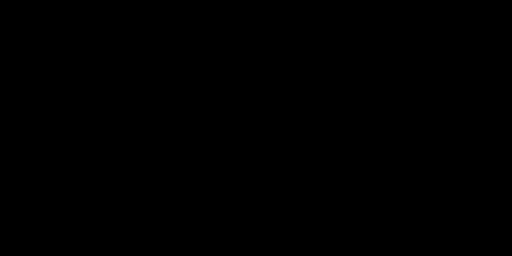

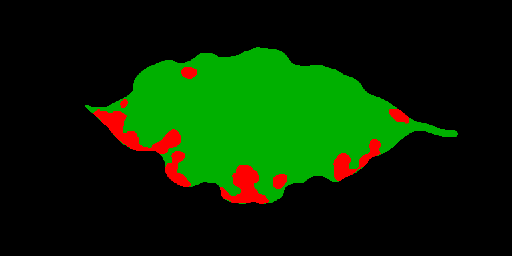

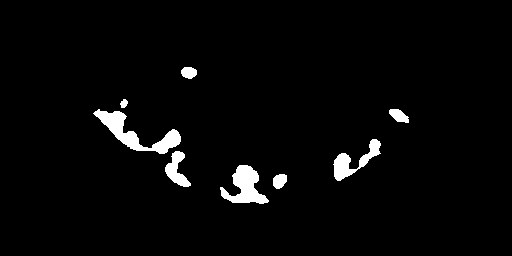

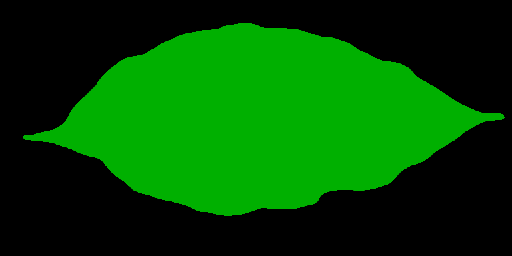

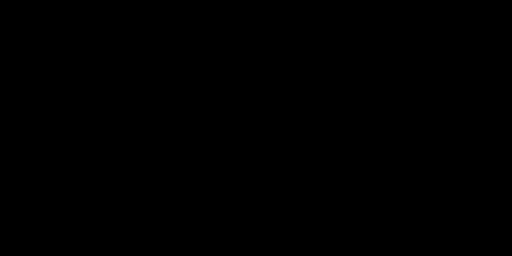

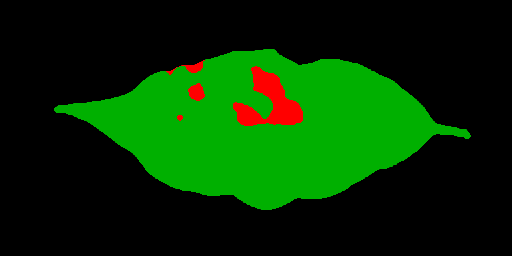

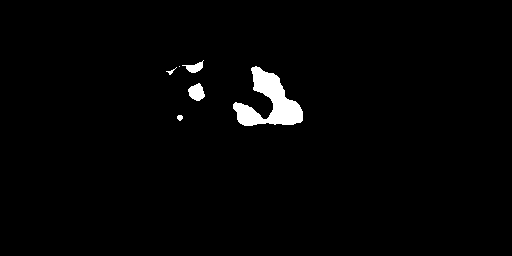

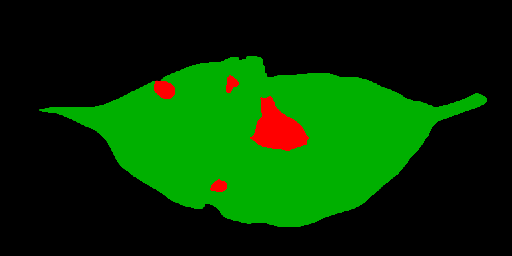

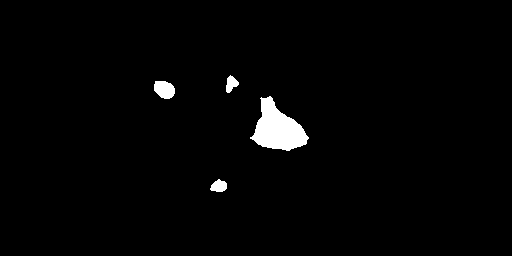

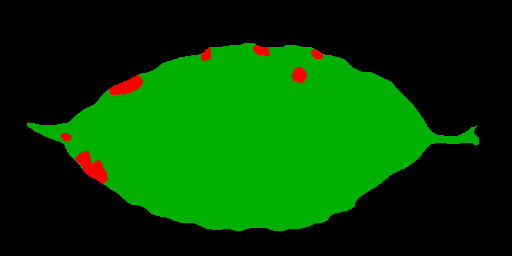

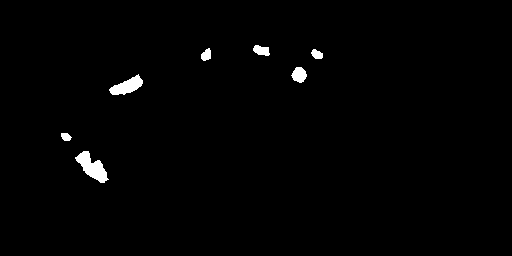

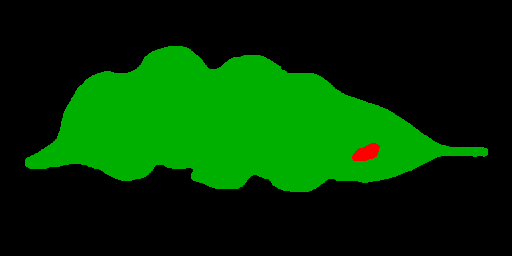

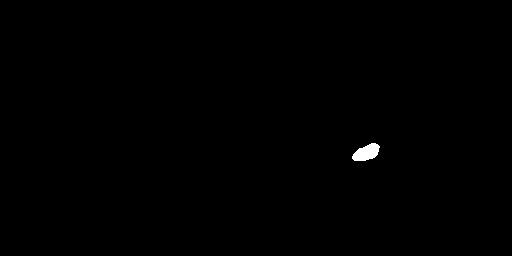

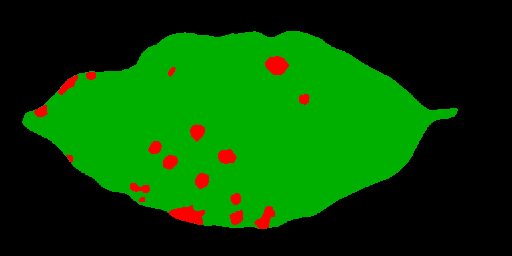

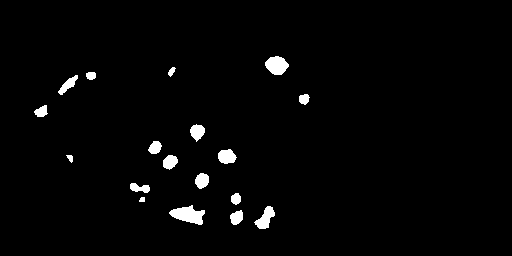

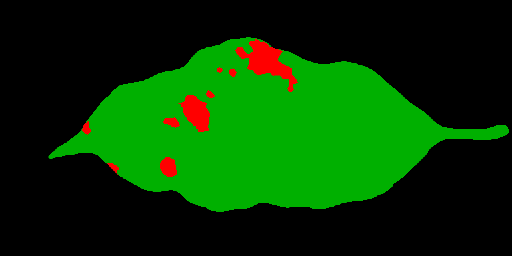

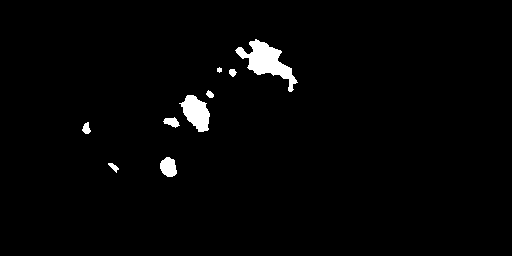

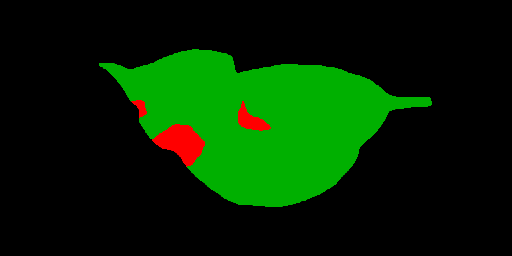

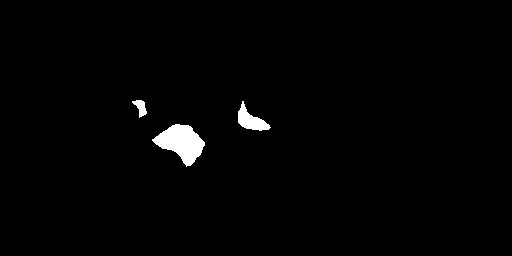

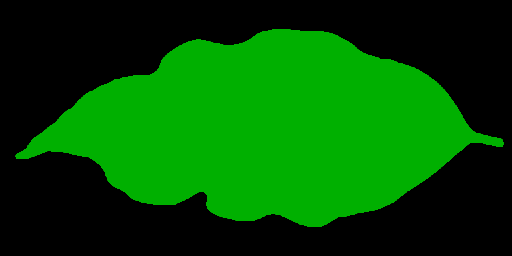

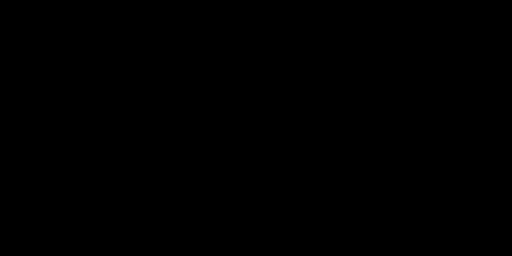

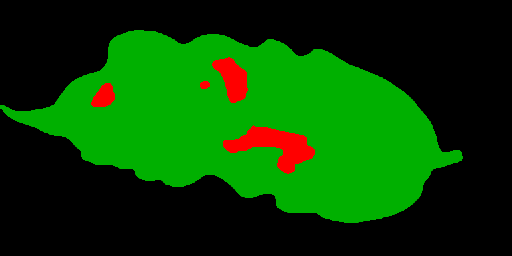

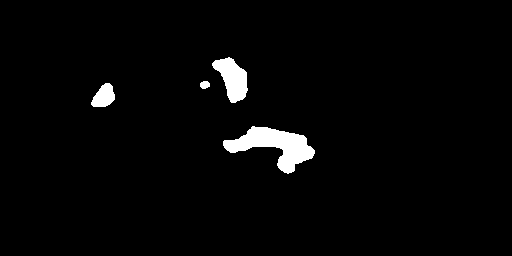

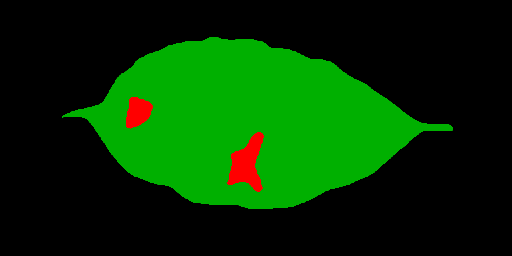

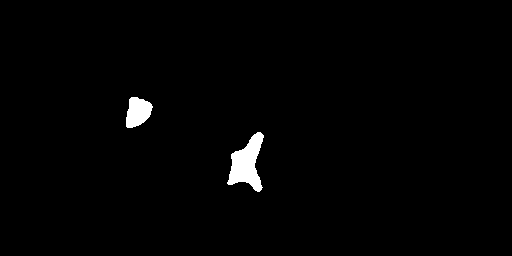

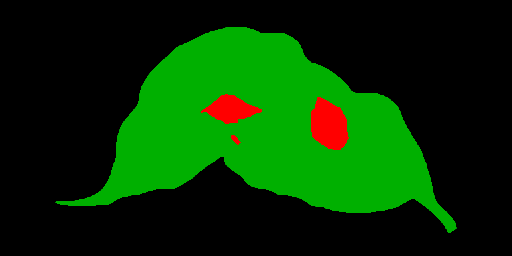

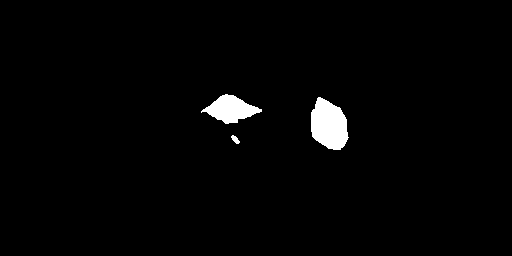

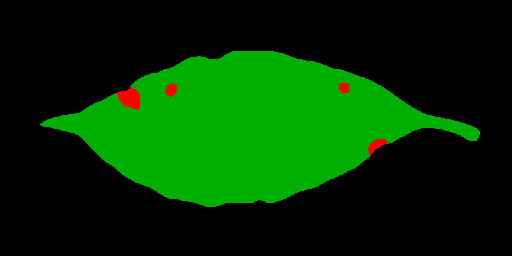

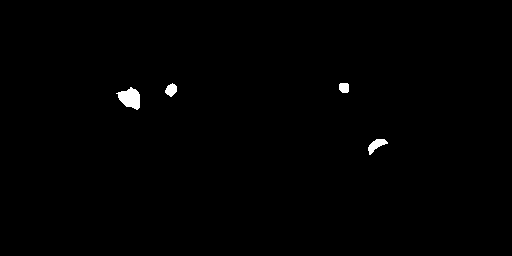

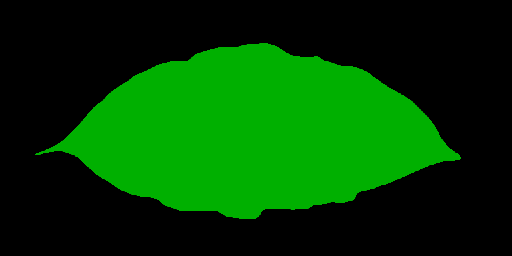

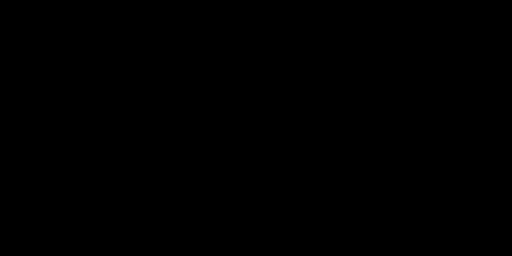

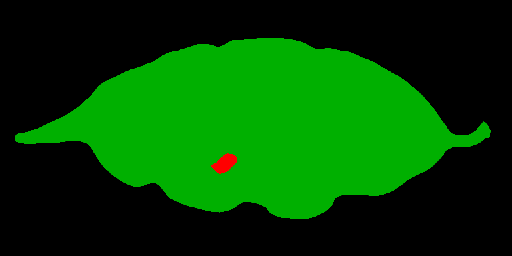

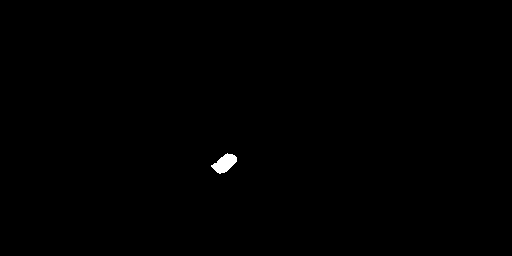

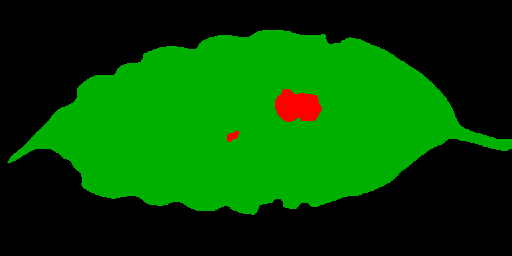

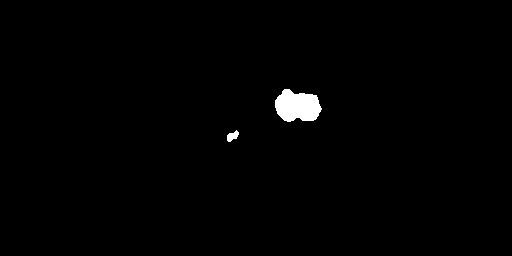

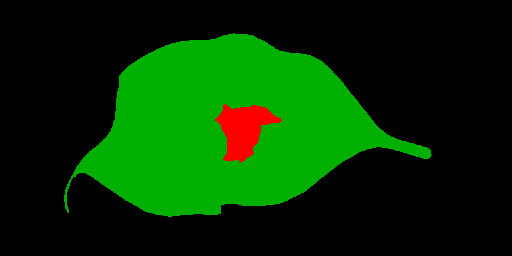

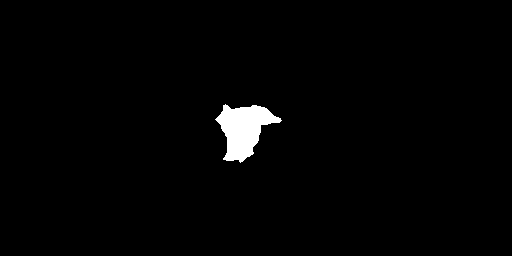

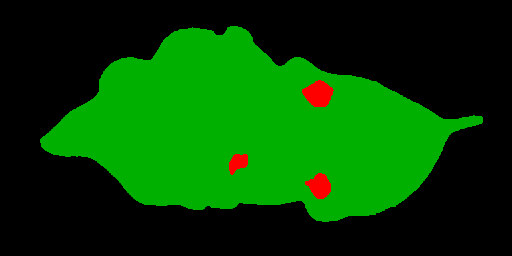

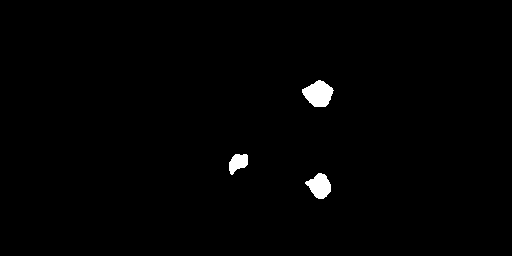

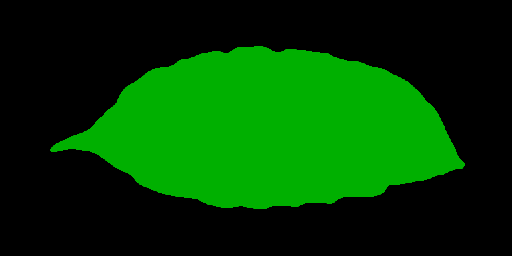

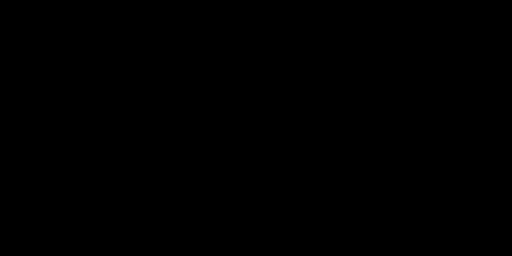

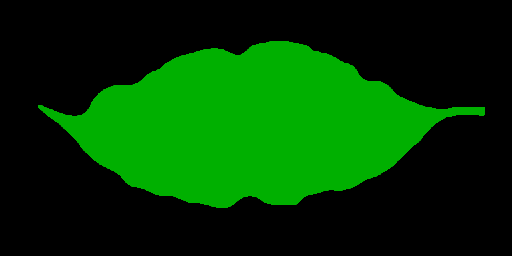

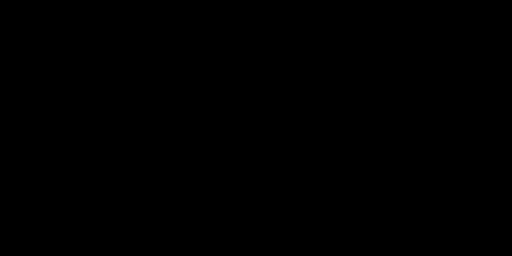

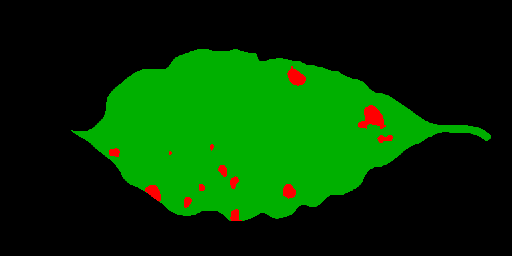

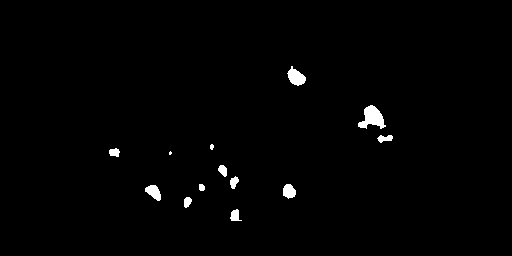

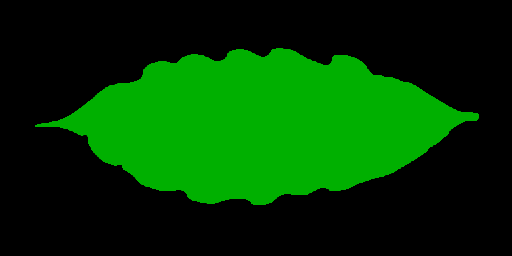

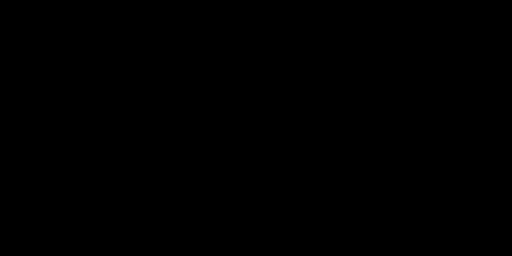

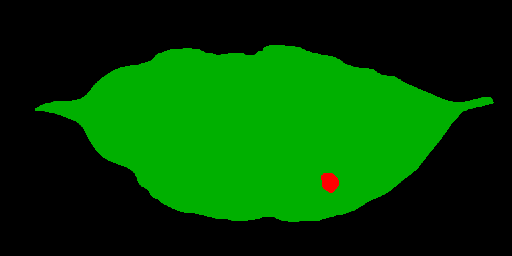

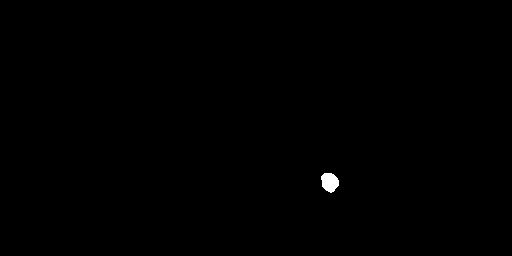

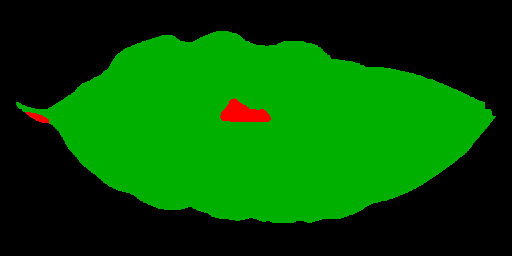

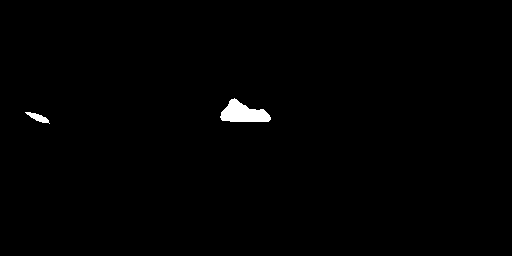

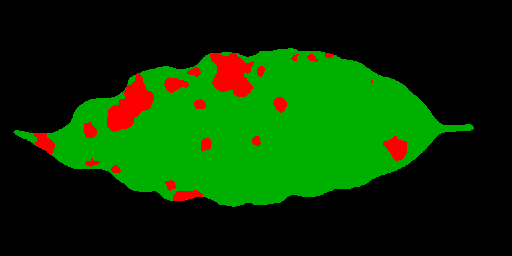

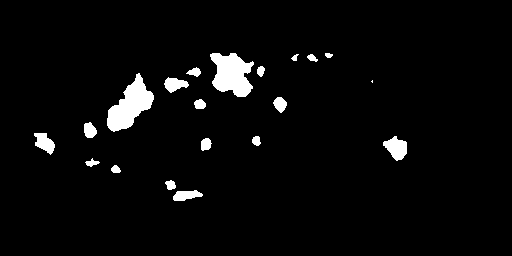

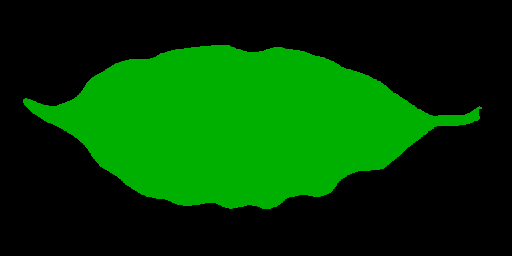

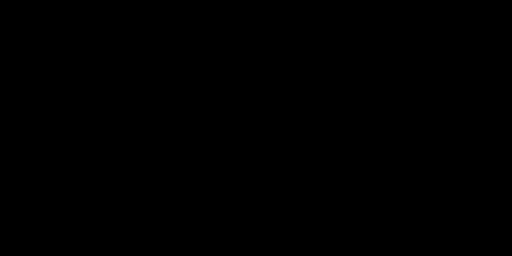

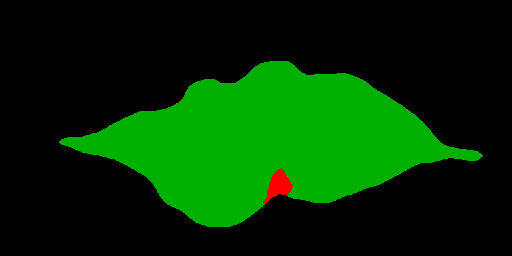

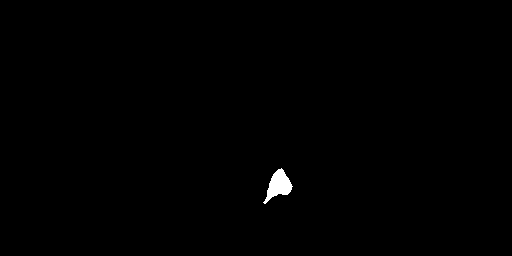

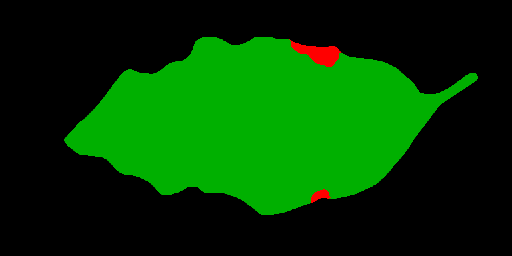

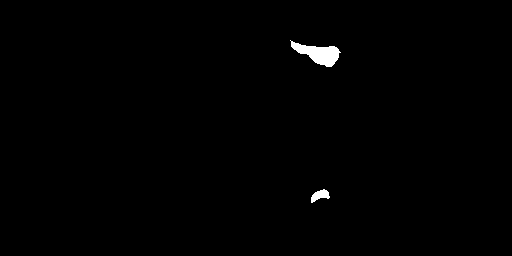

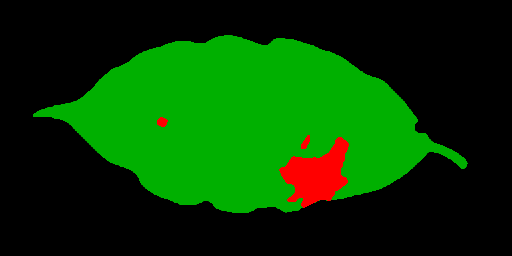

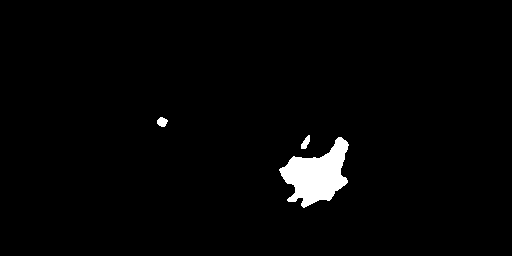

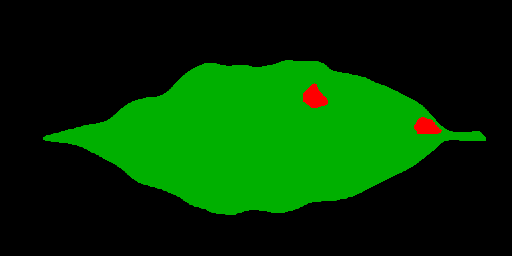

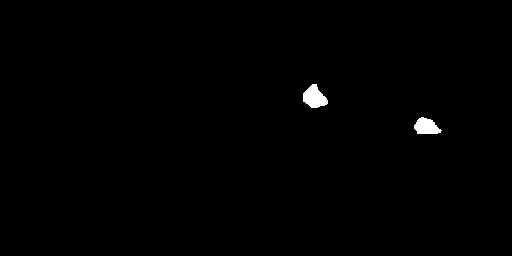

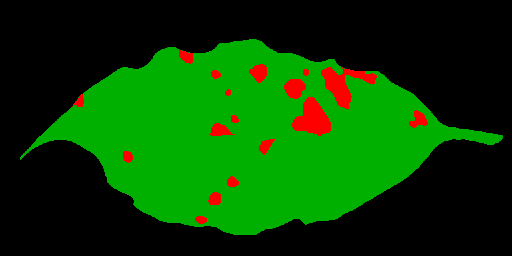

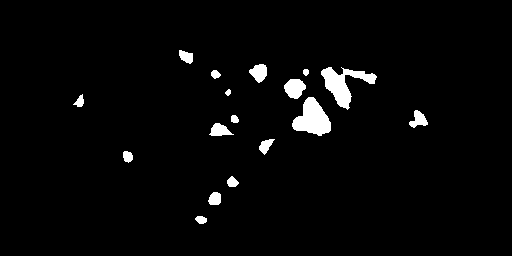

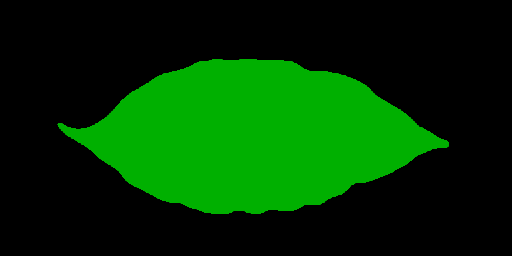

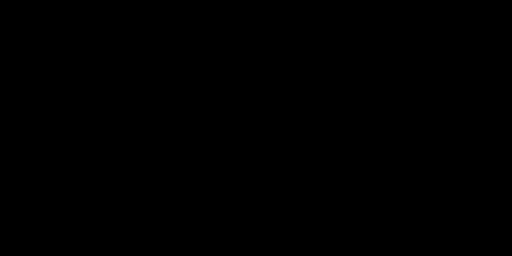

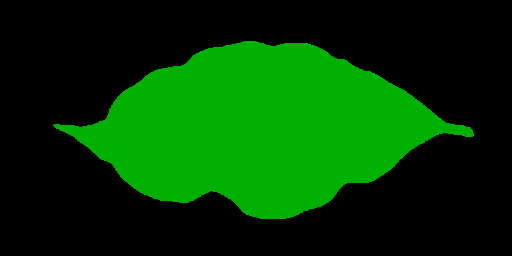

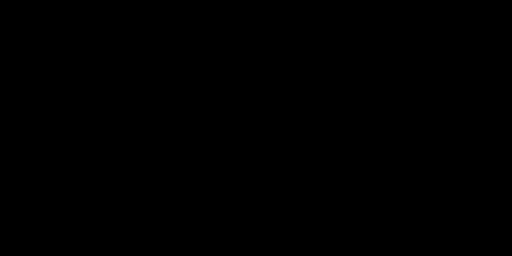

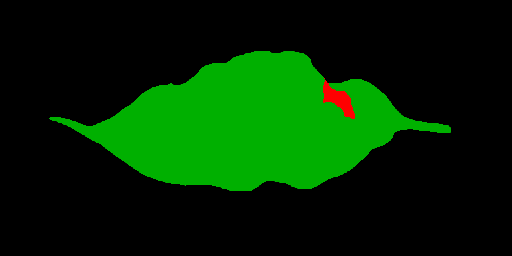

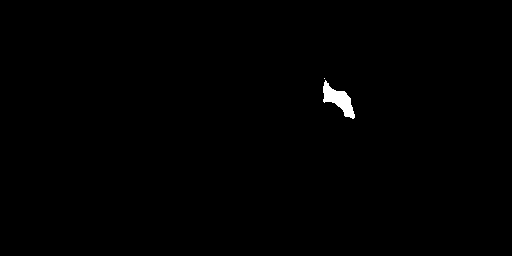

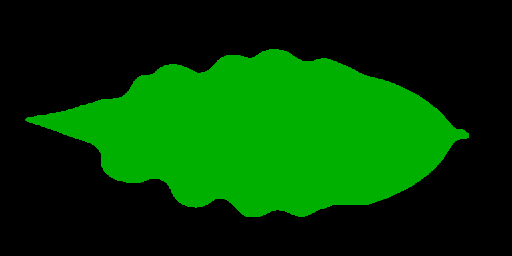

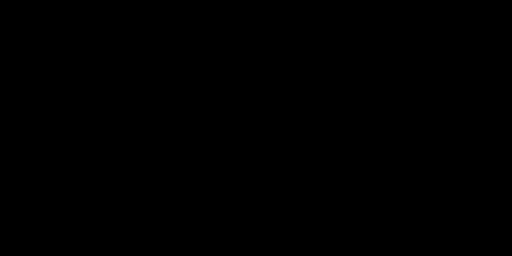

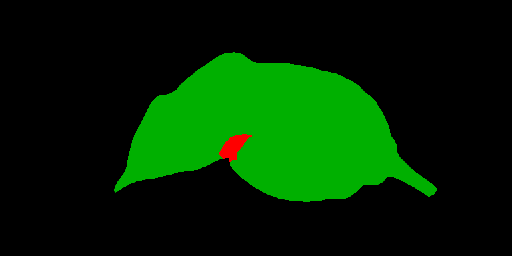

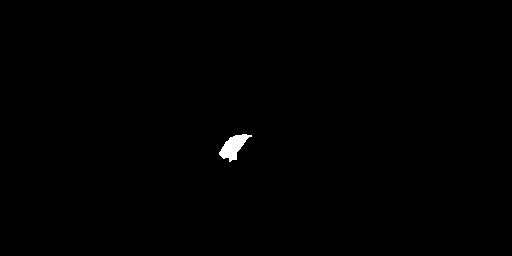

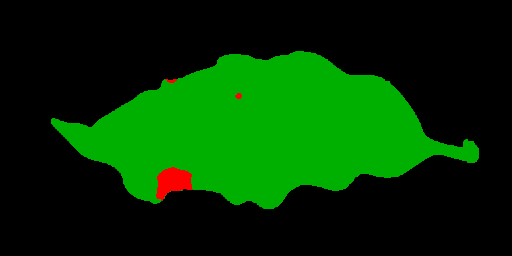

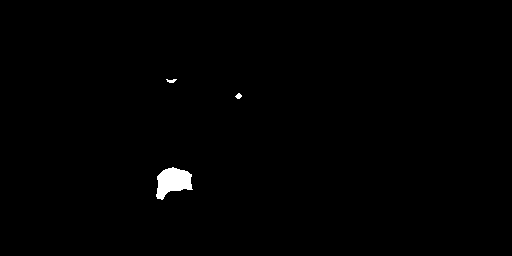

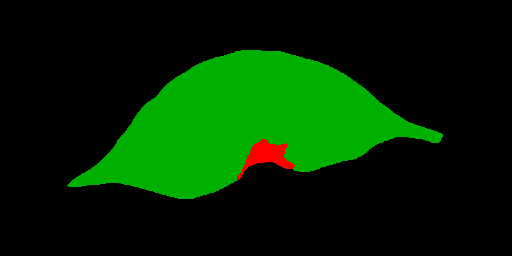

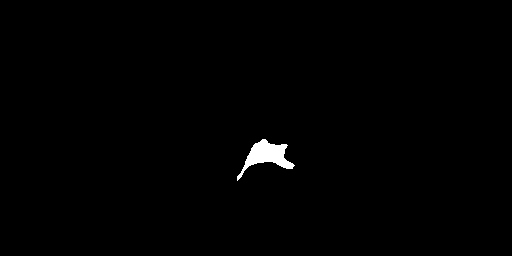

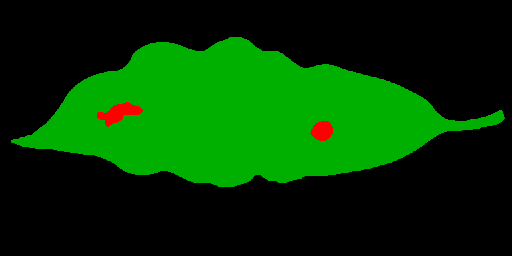

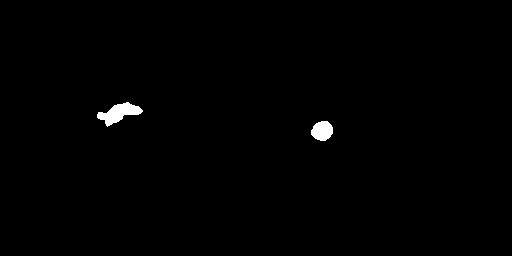

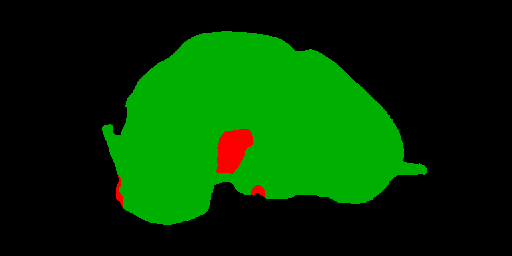

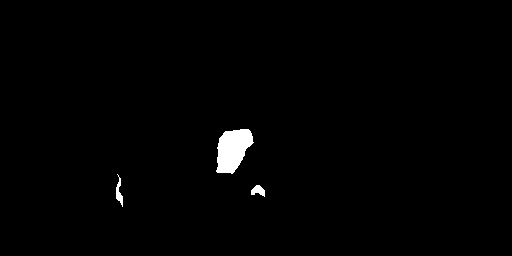

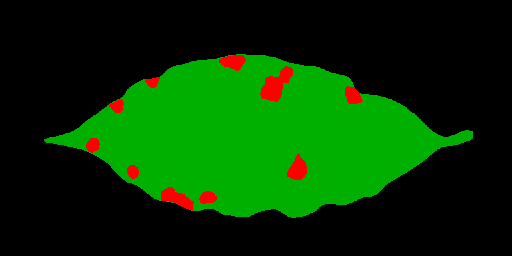

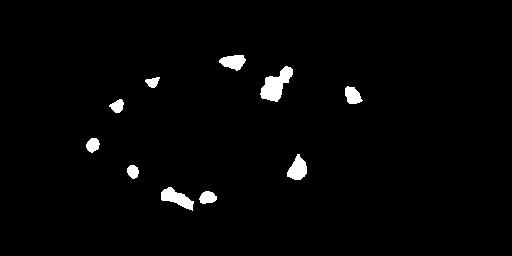

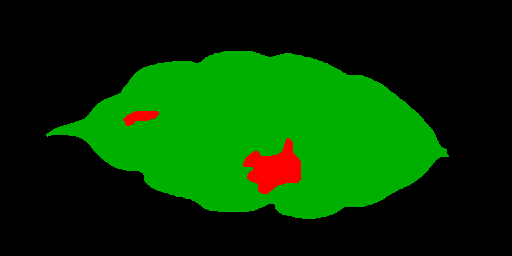

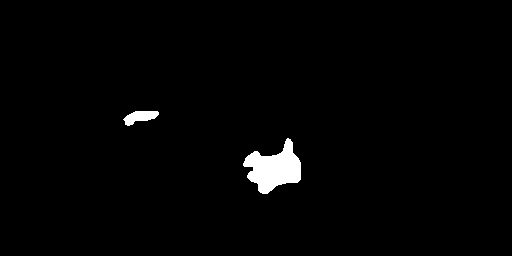

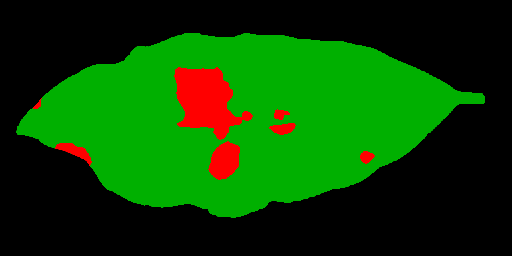

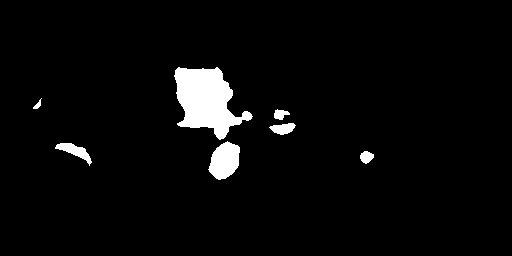

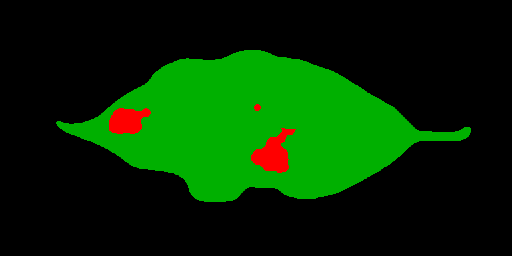

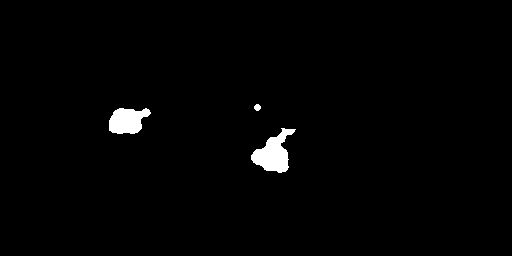

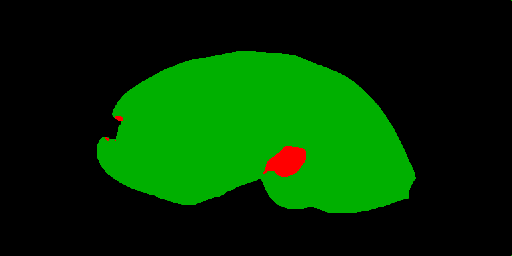

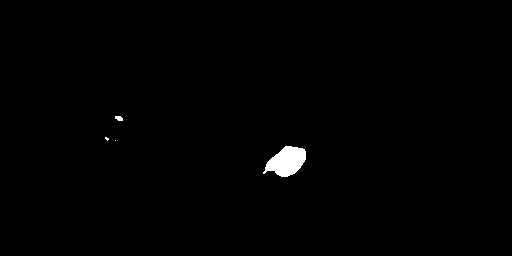

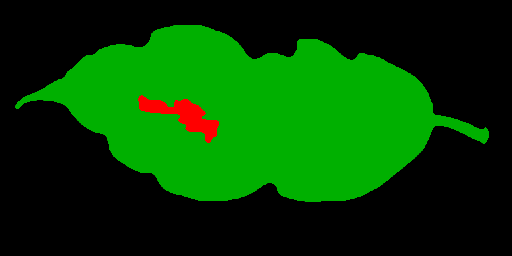

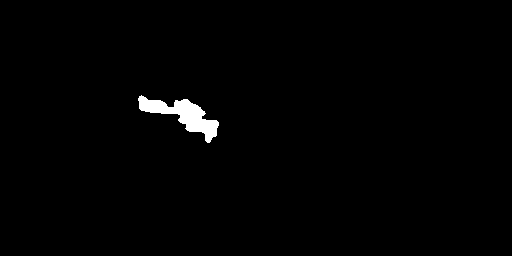

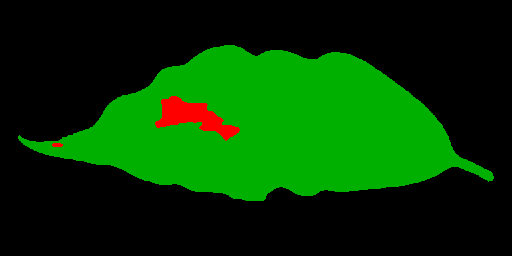

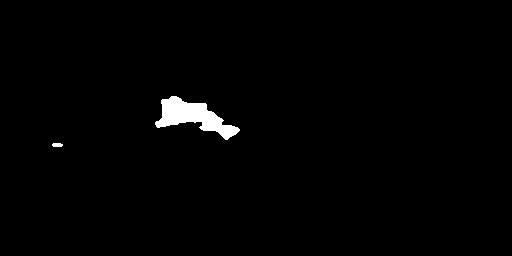

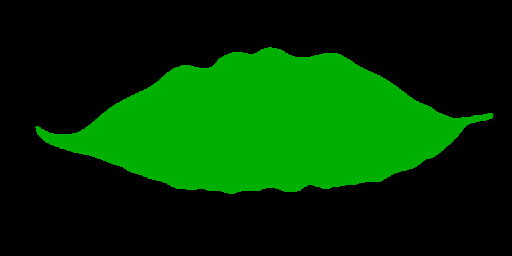

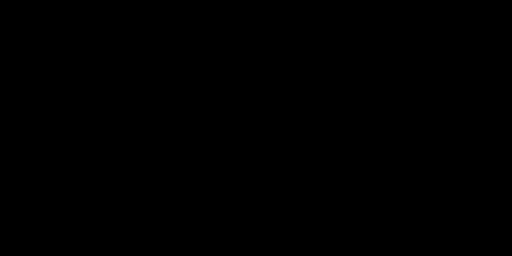

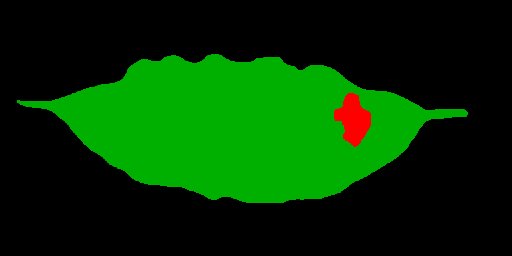

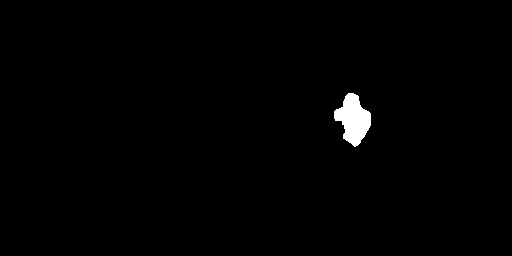

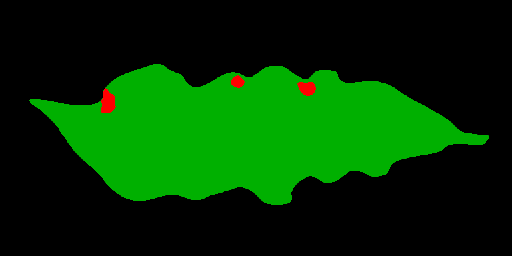

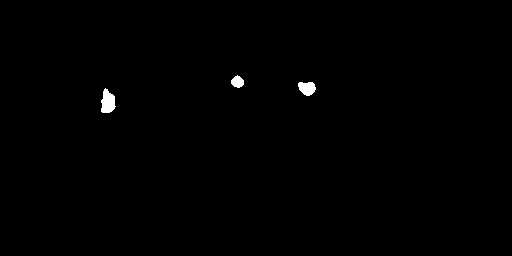

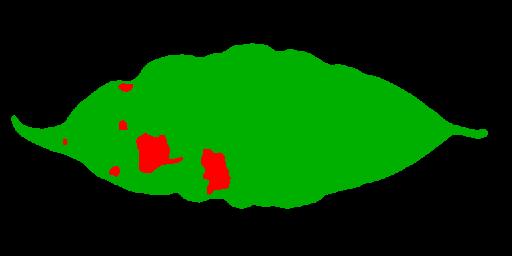

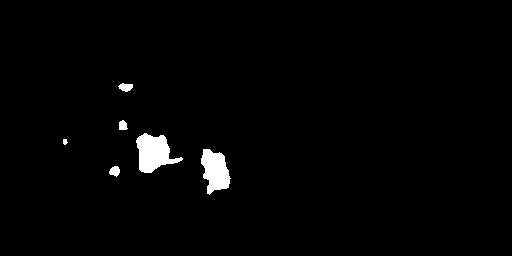

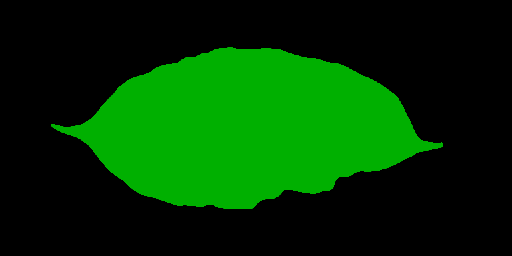

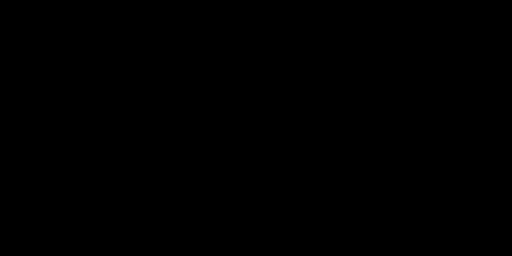

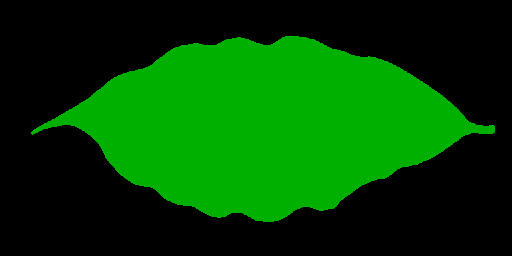

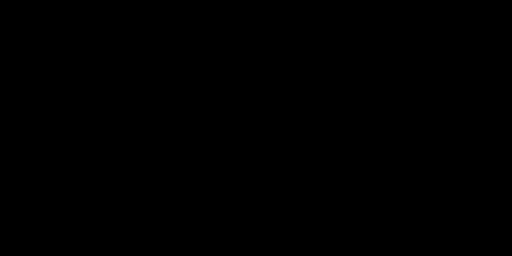

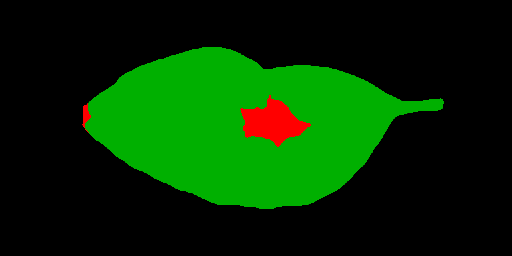

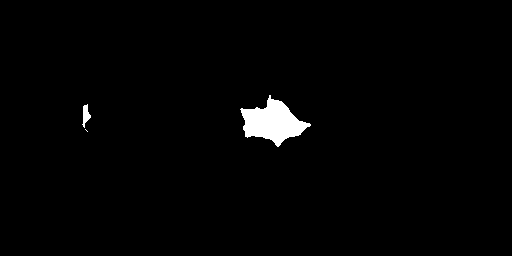

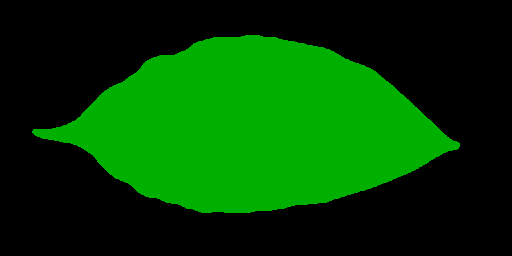

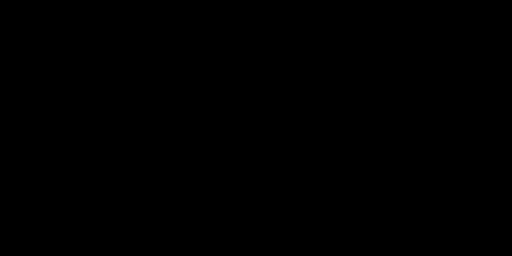

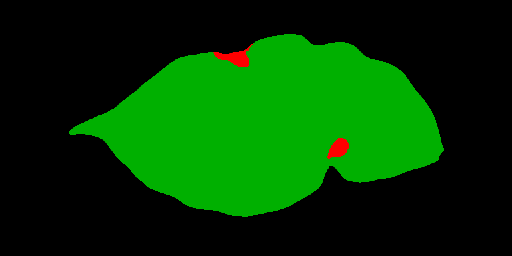

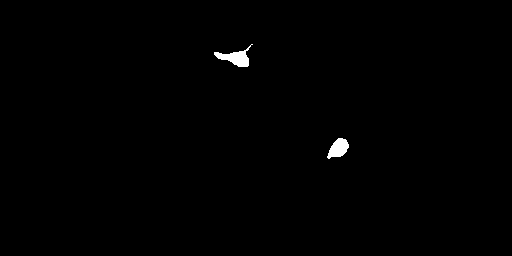

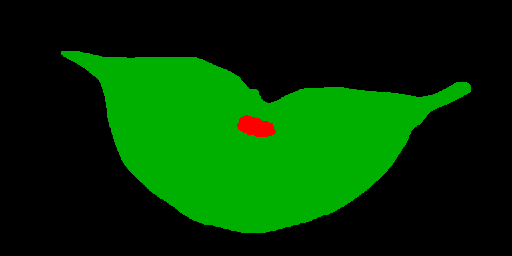

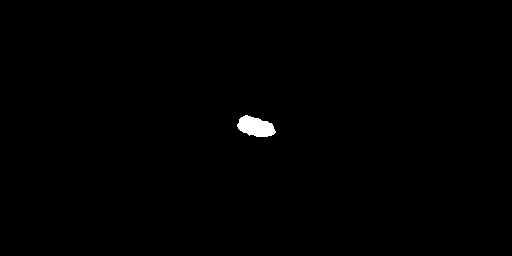

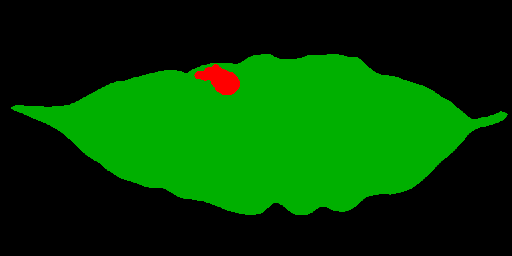

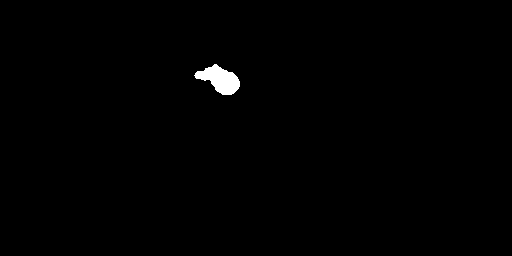

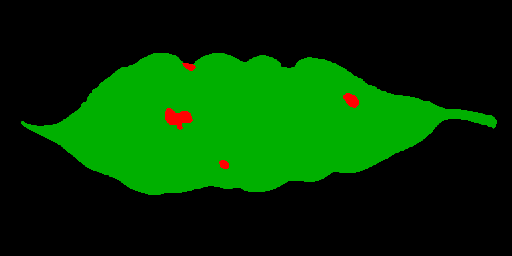

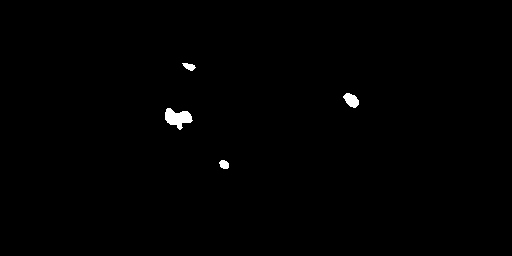

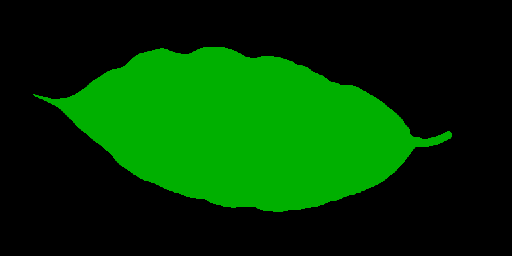

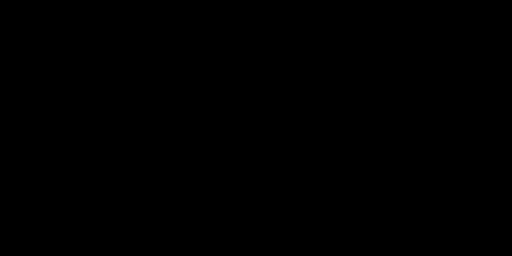

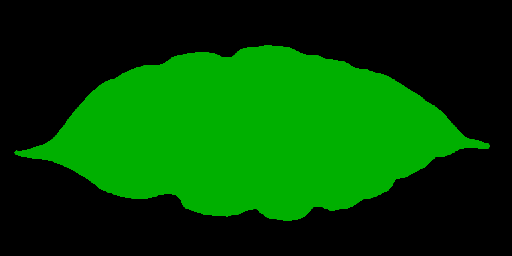

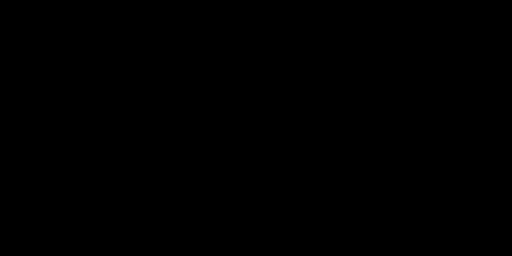

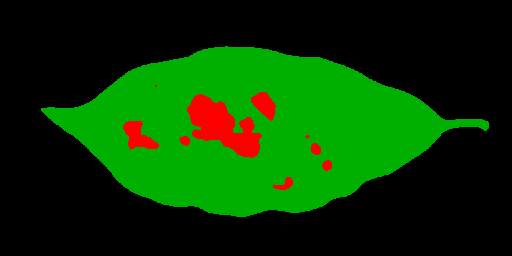

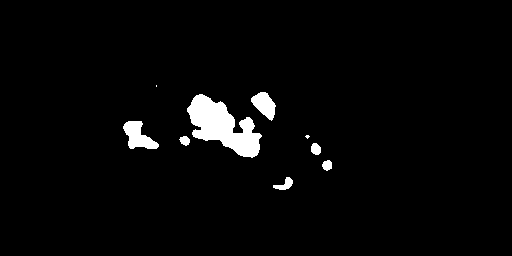

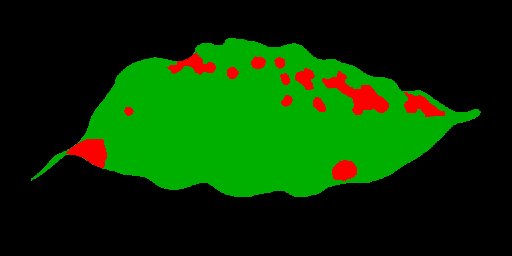

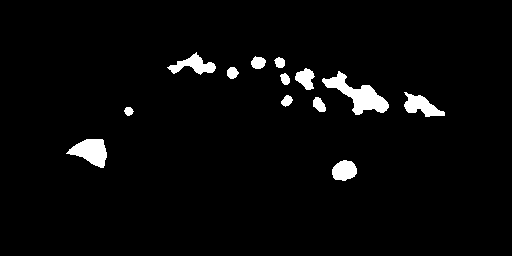

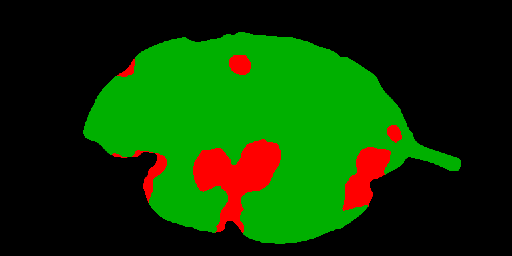

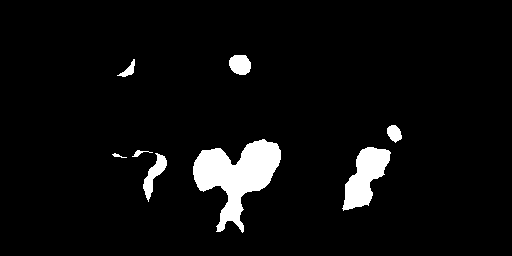

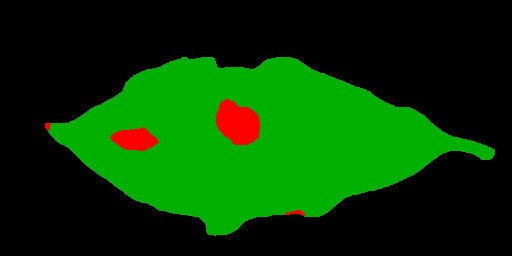

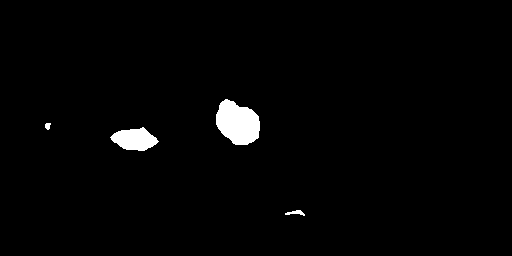

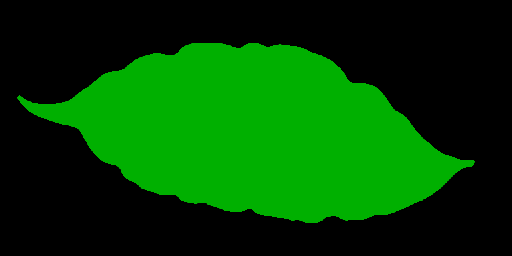

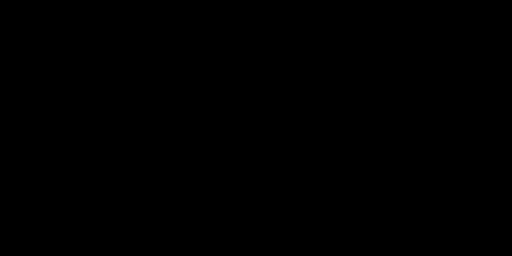

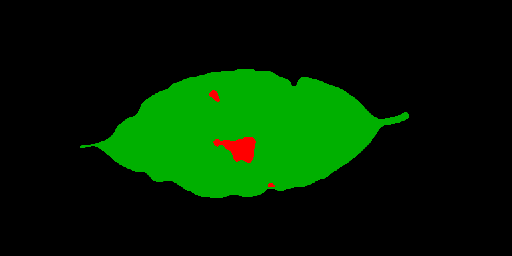

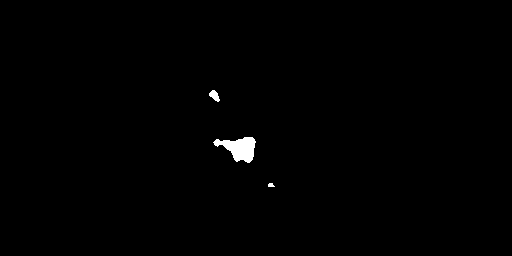

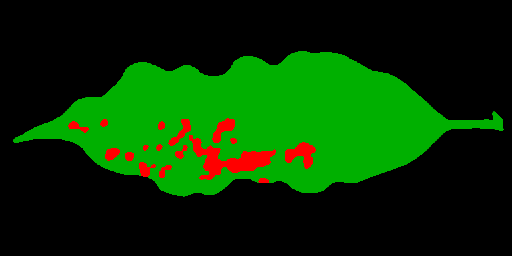

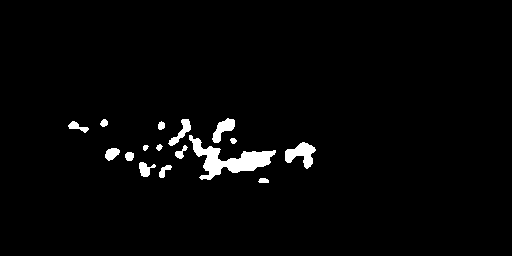

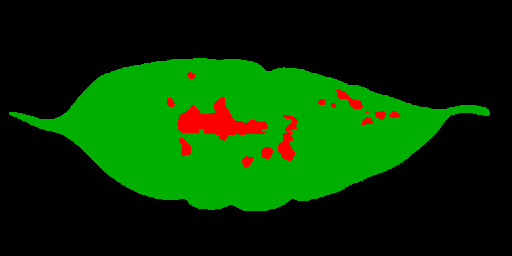

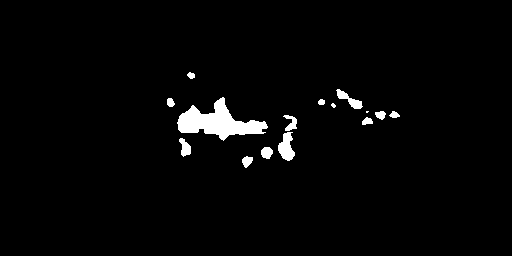

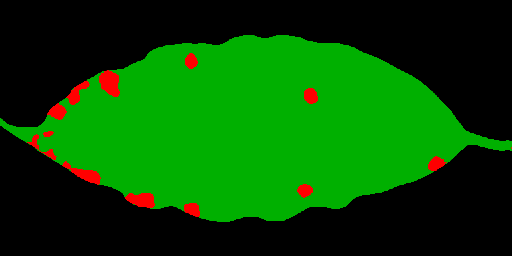

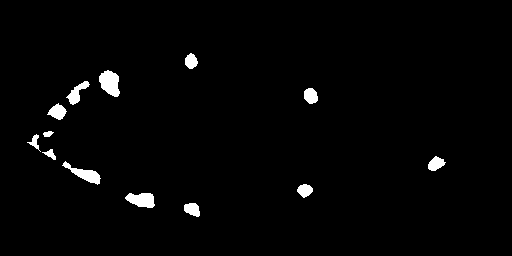

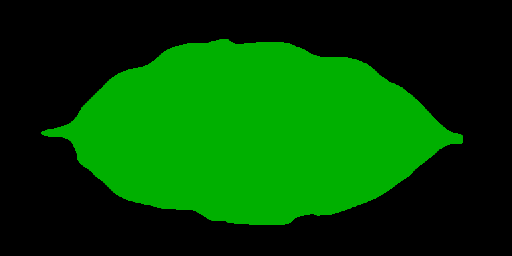

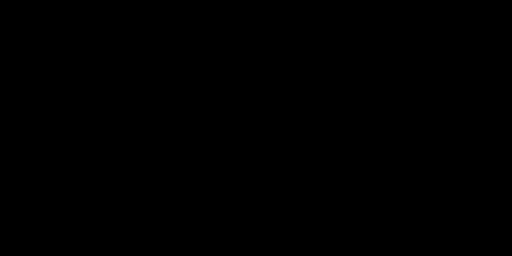

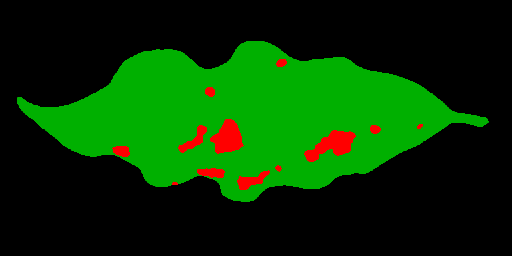

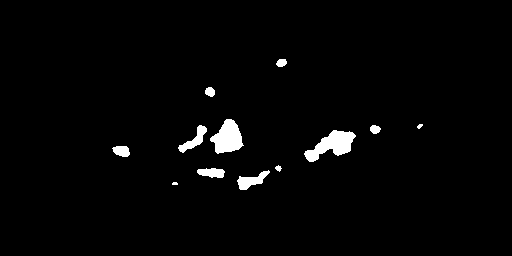

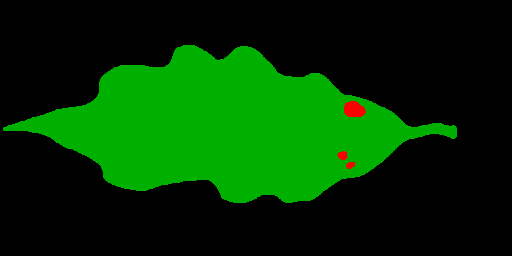

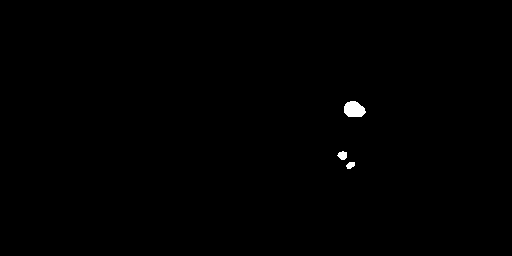

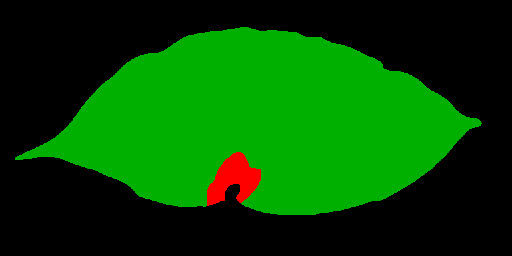

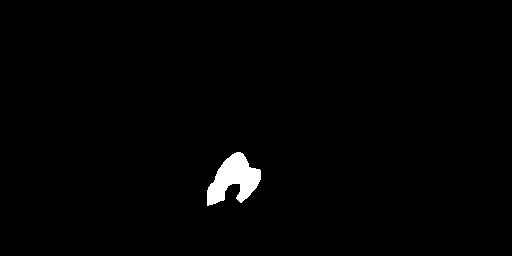

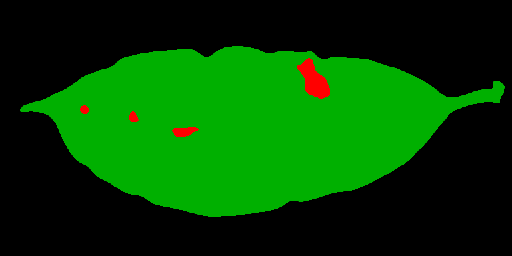

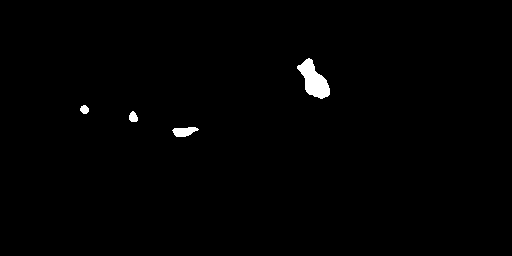

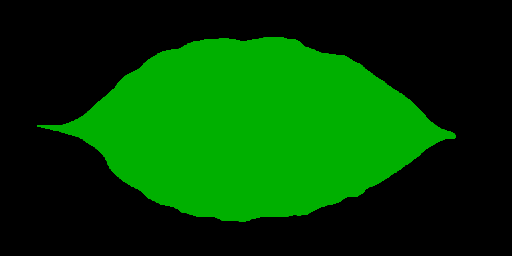

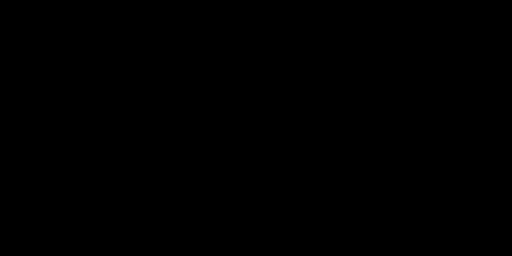

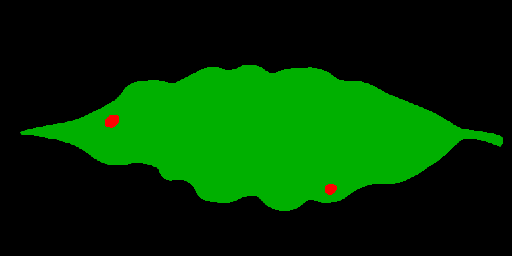

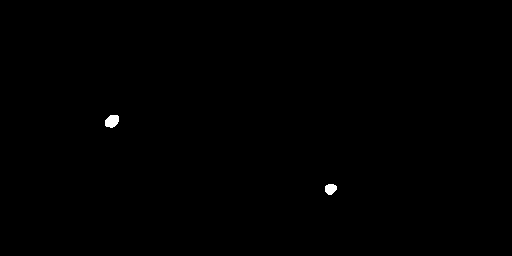

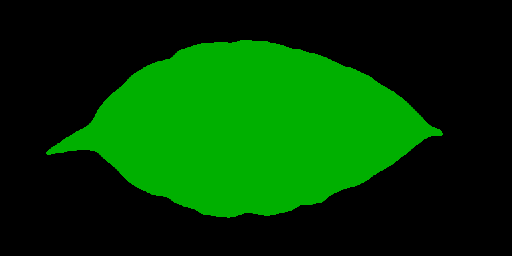

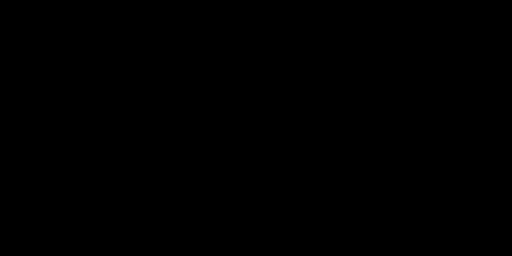

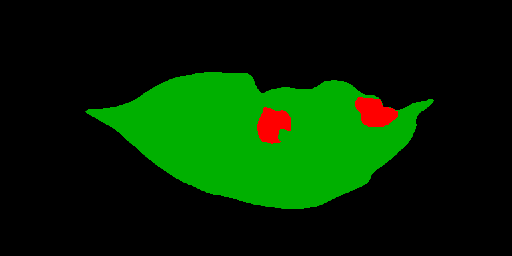

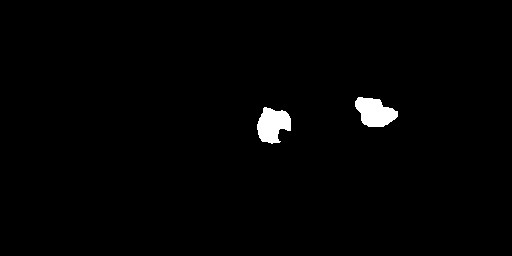

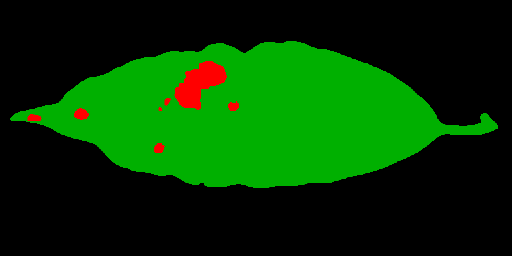

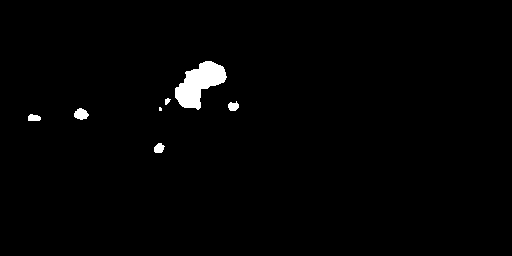

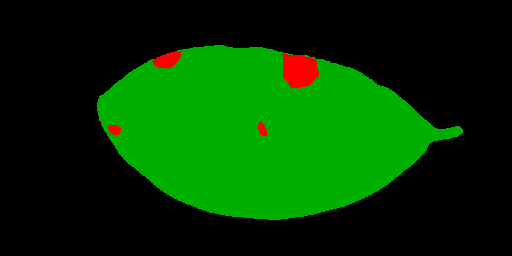

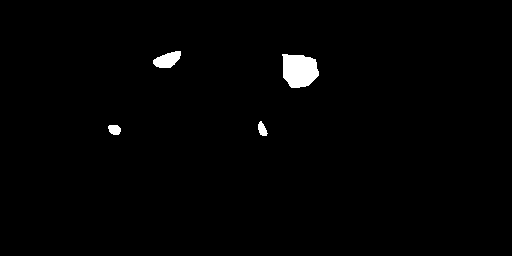

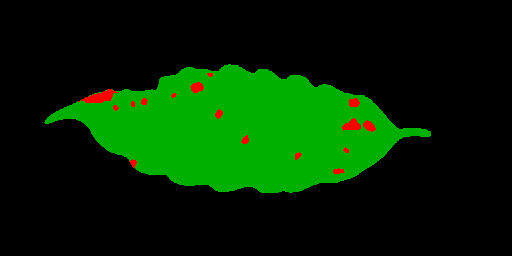

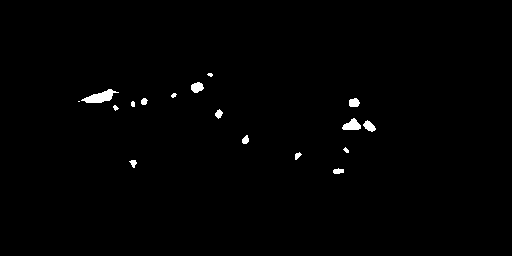

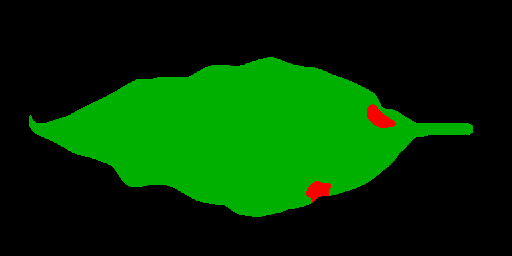

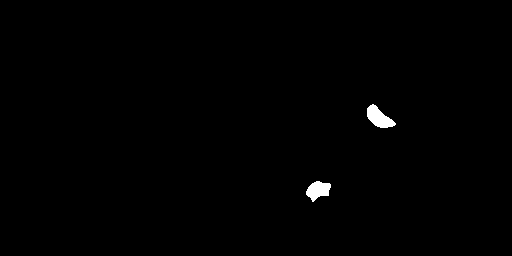

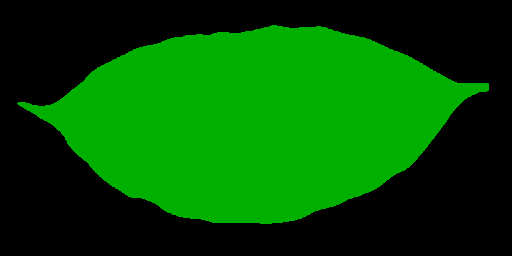

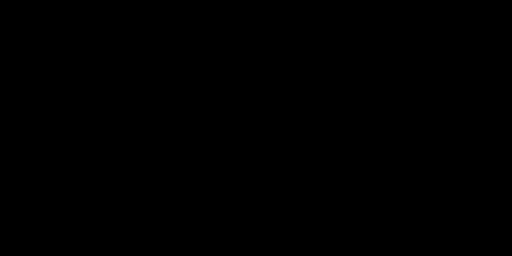

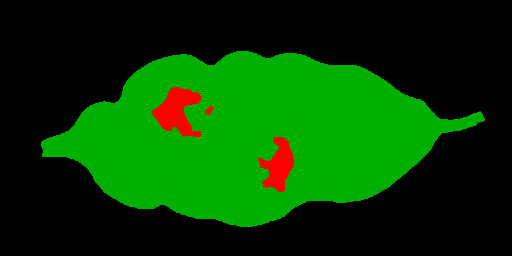

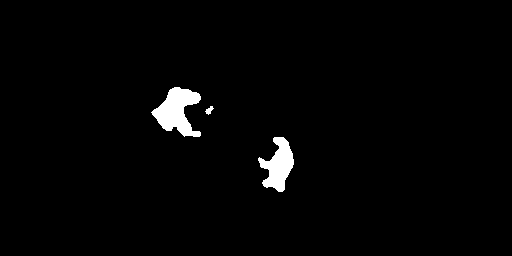

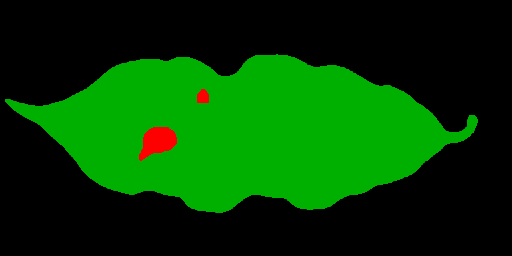

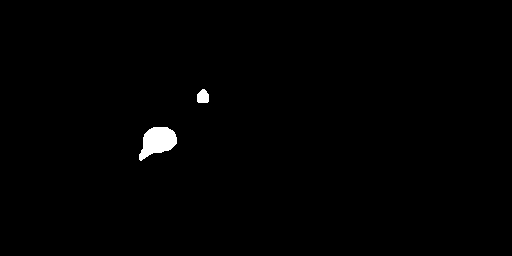

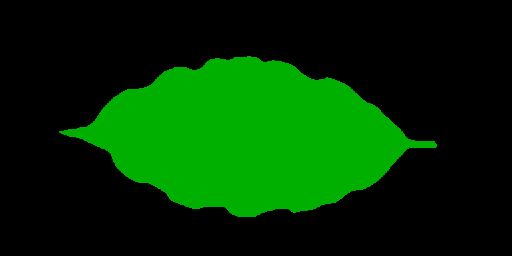

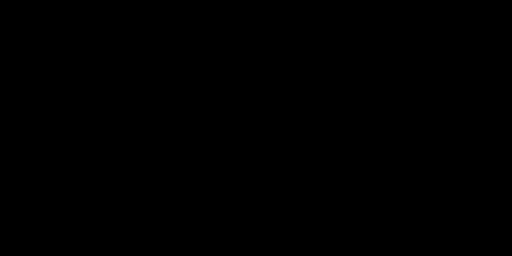

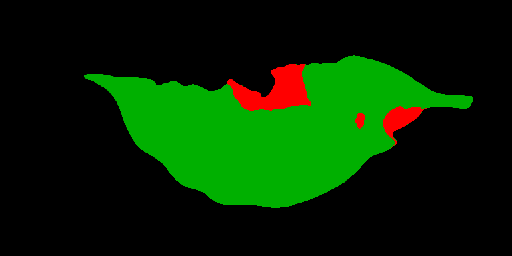

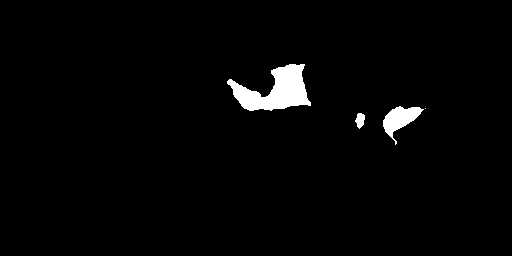

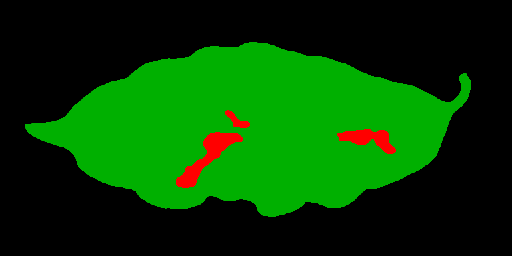

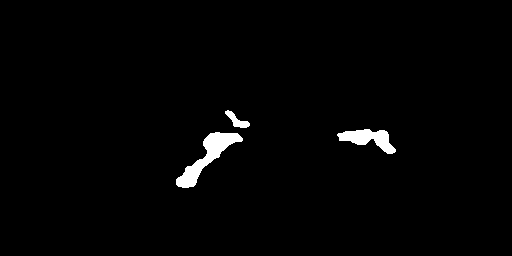

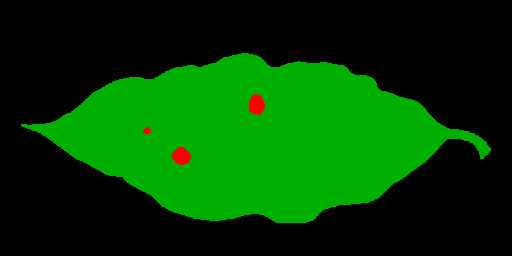

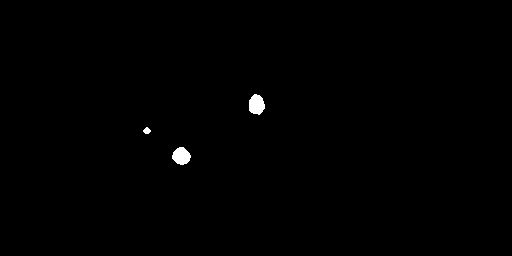

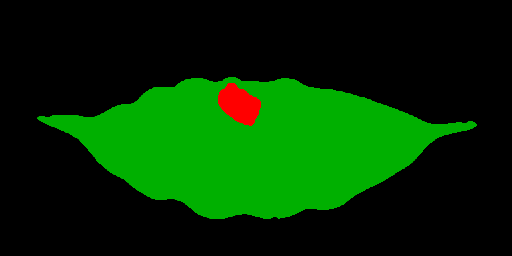

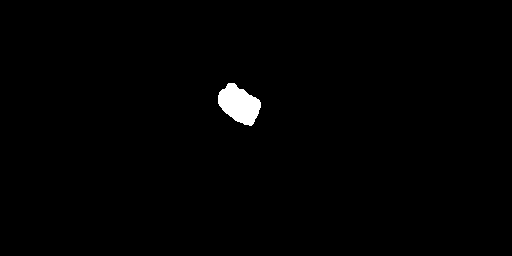

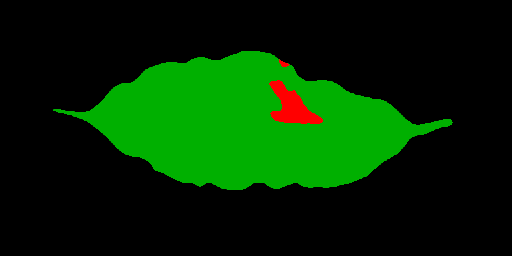

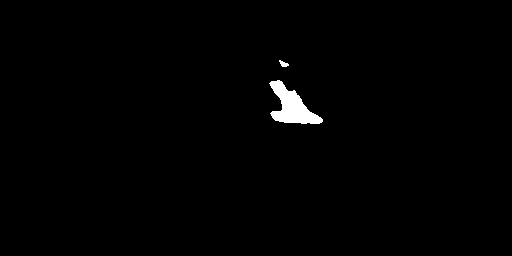

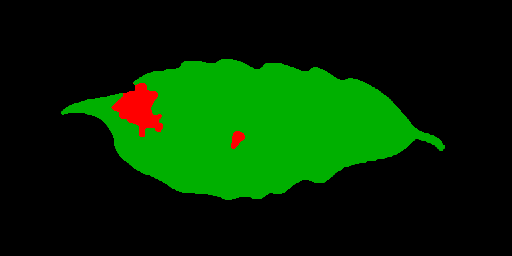

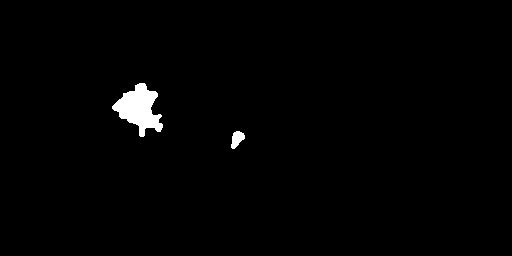

In [ ]:
train=prepare_dataset("/content/drive/MyDrive/annotations/train","/content/drive/MyDrive/images/train")

In [ ]:
train[0][0].shape

(256, 512, 3)

In [ ]:
train[1][0].shape

(256, 512, 1)

In [ ]:
n_classes=2
activation='sigmoid'

dice_loss = sm.losses.DiceLoss() 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
BACKBONE1 = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)
X_train = preprocess_input1(train[0])
y_train= train[1]

model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

model1.compile(optimizer="sgd", loss=total_loss, metrics=metrics)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

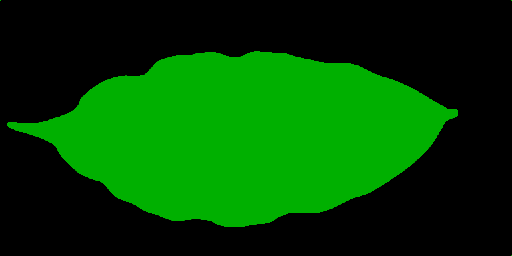

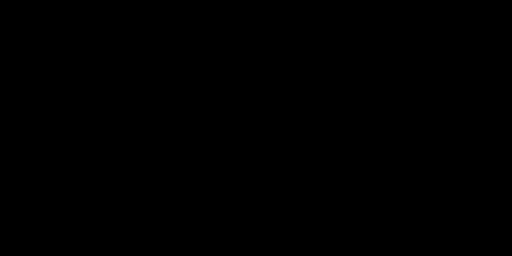

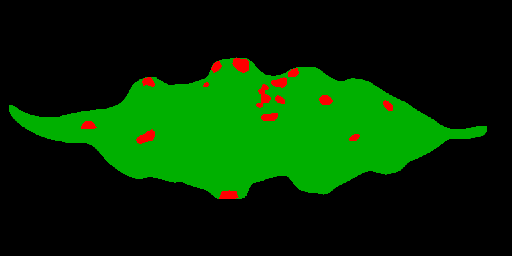

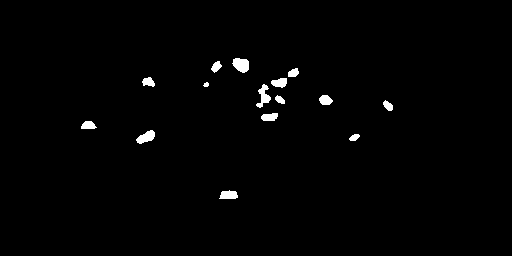

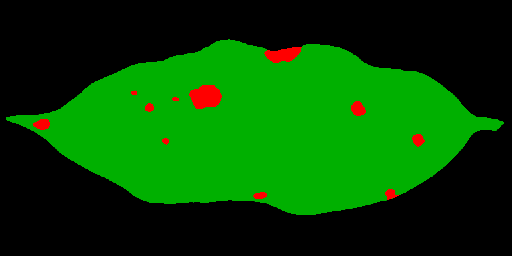

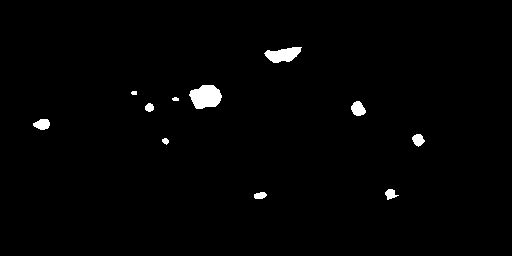

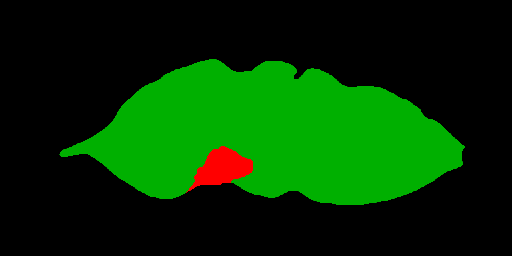

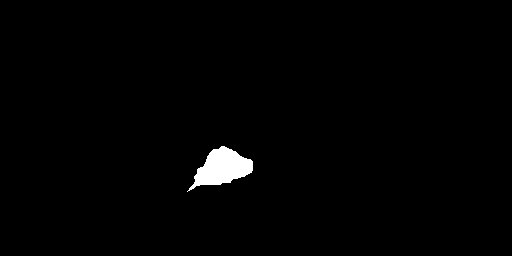

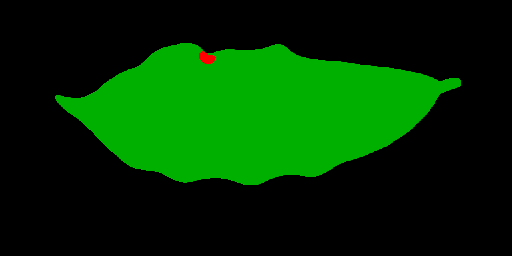

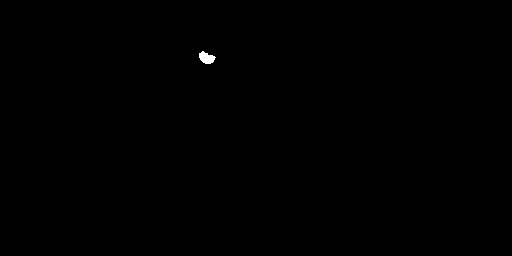

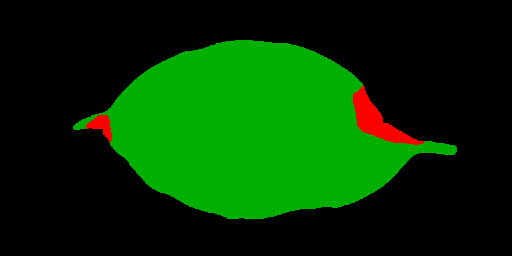

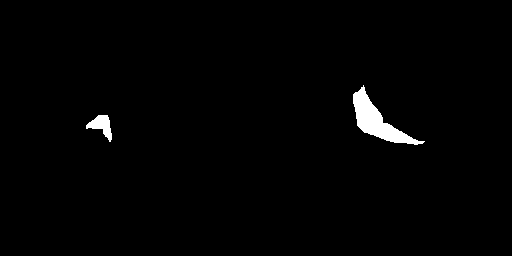

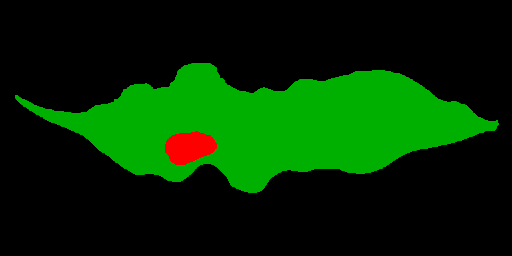

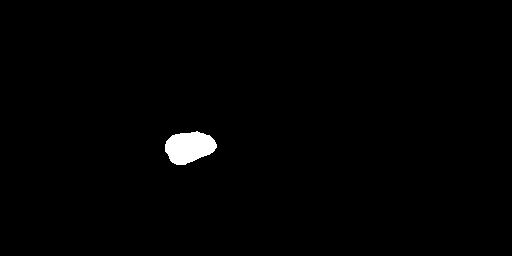

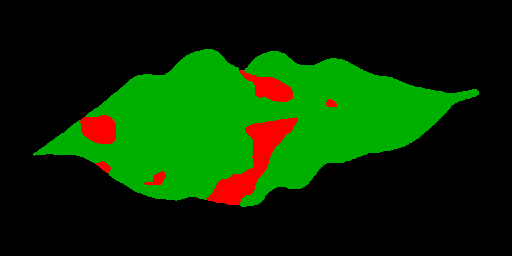

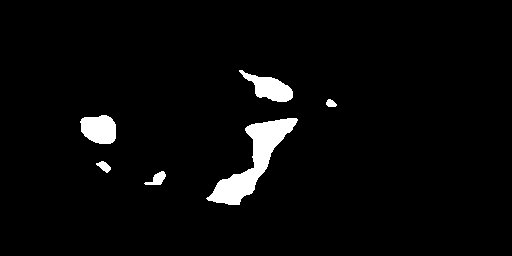

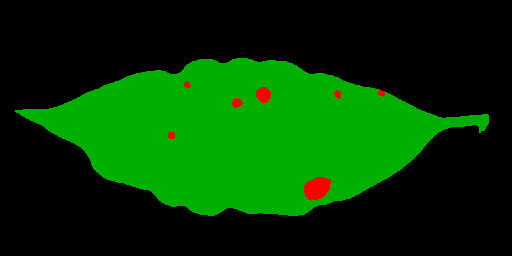

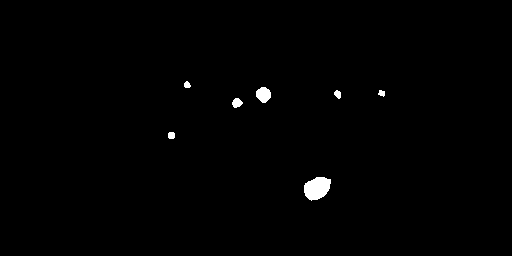

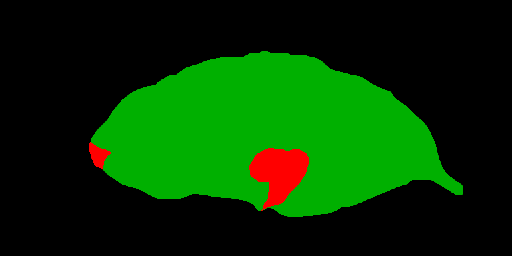

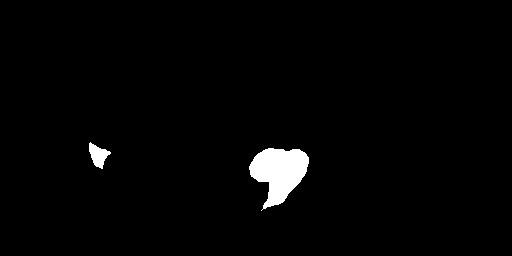

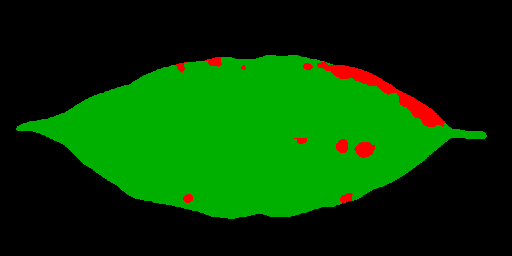

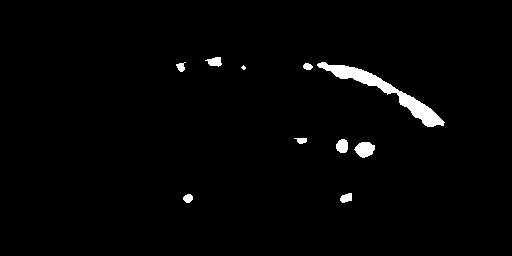

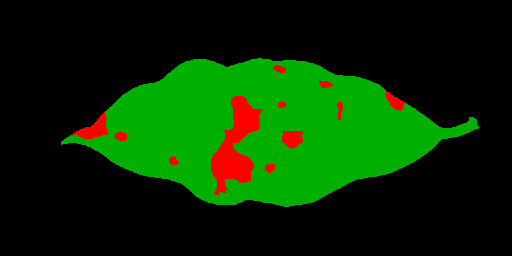

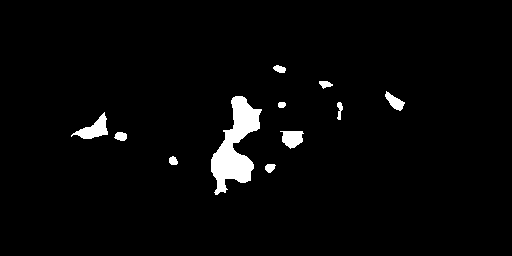

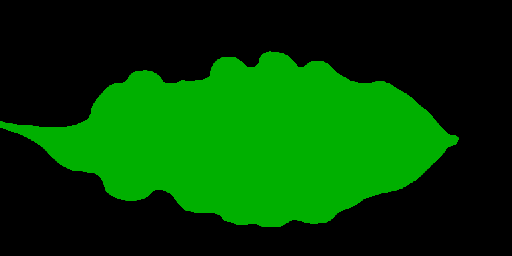

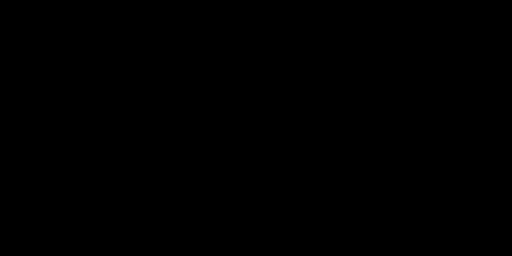

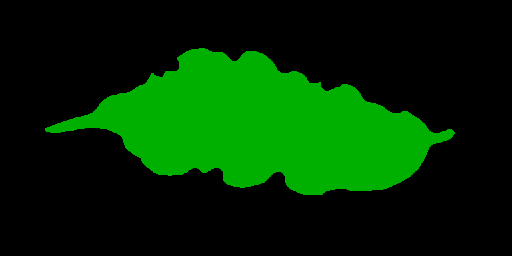

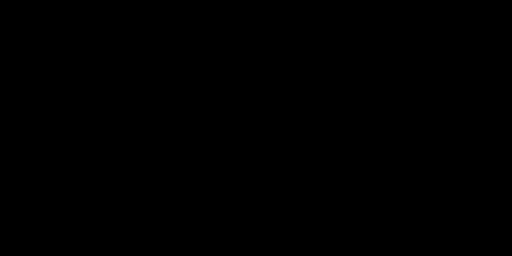

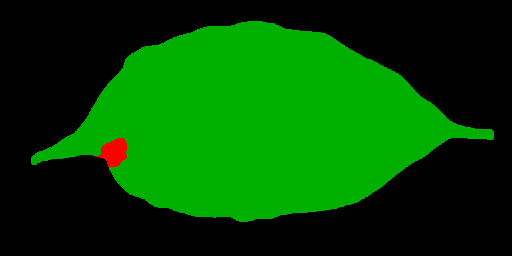

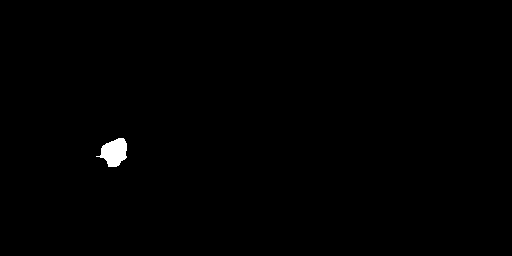

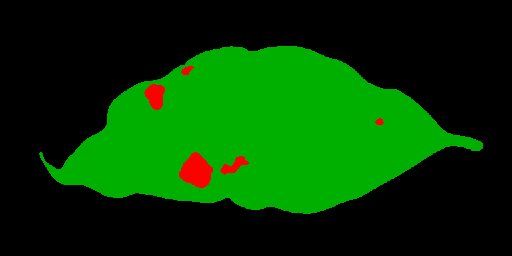

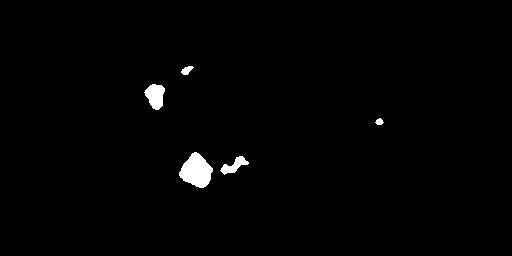

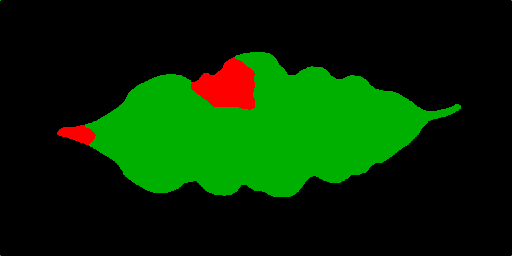

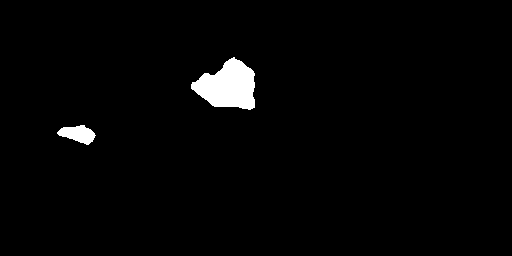

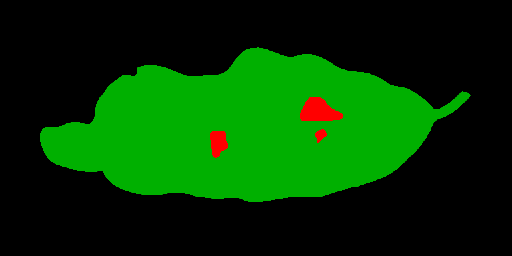

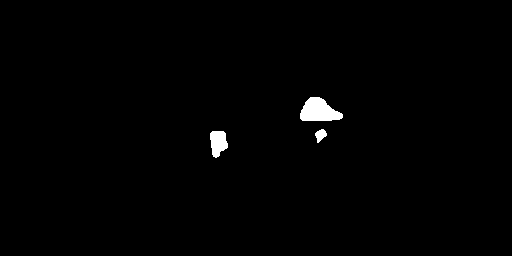

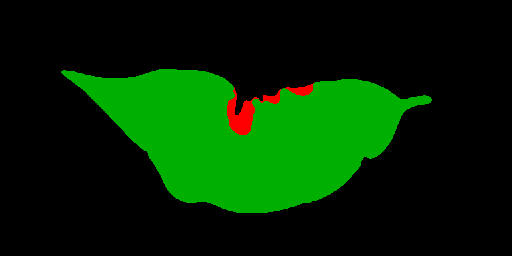

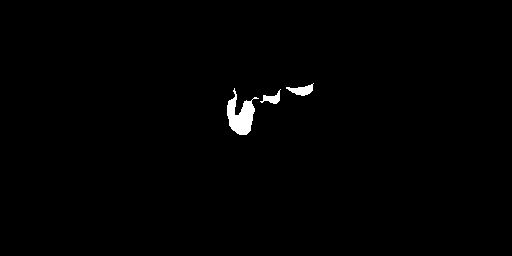

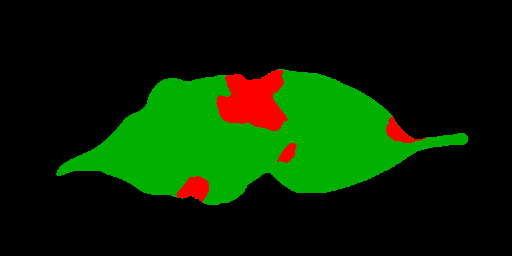

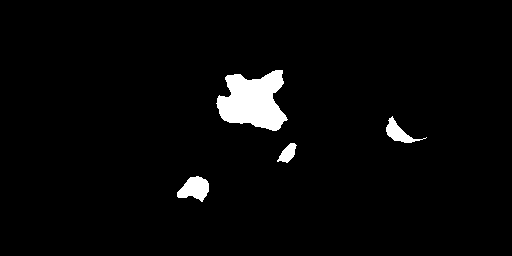

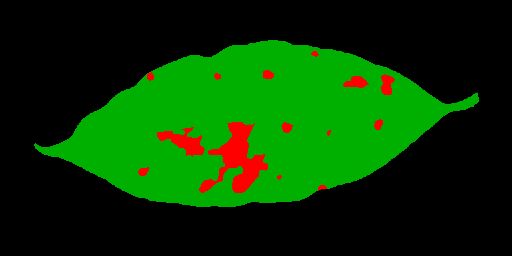

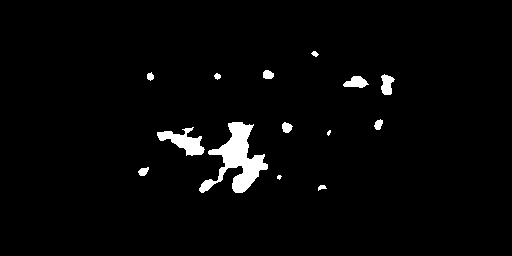

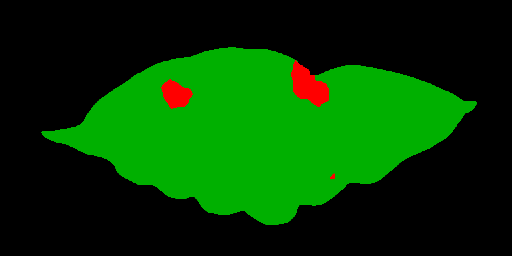

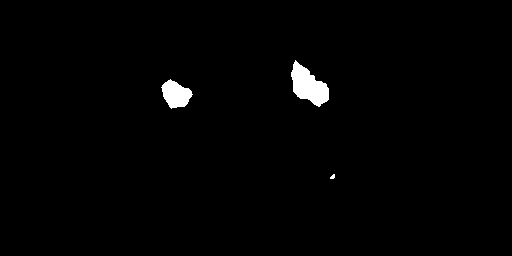

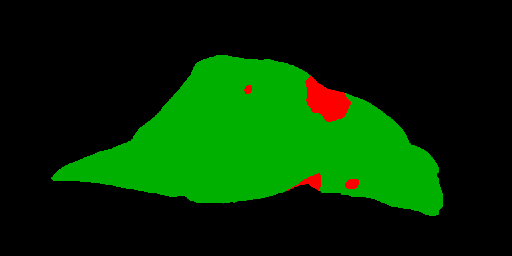

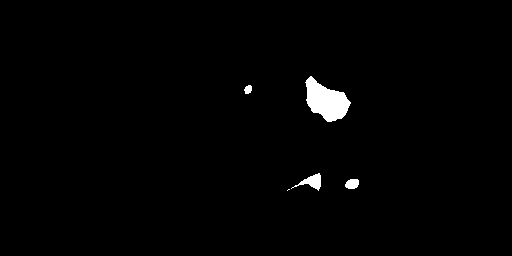

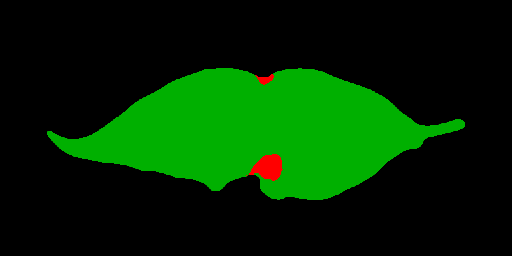

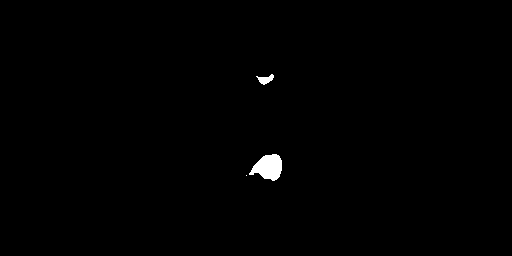

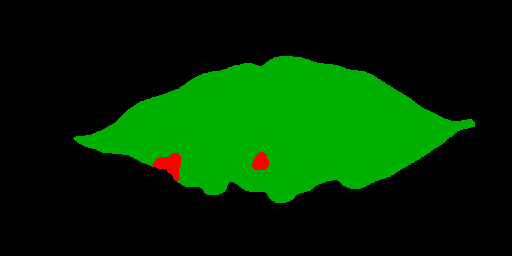

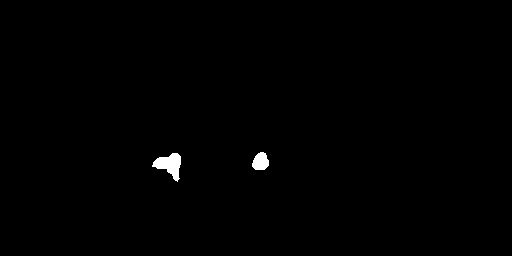

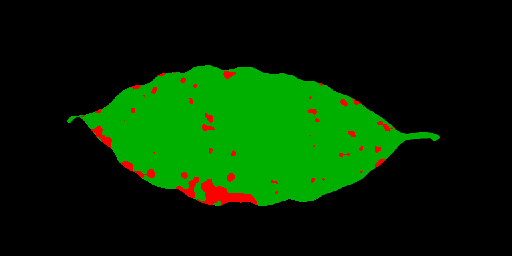

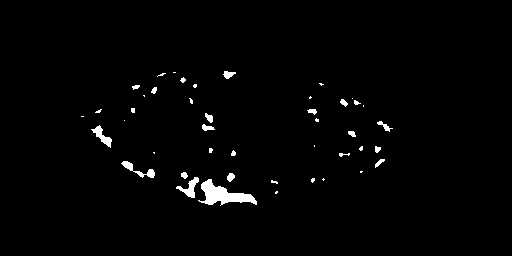

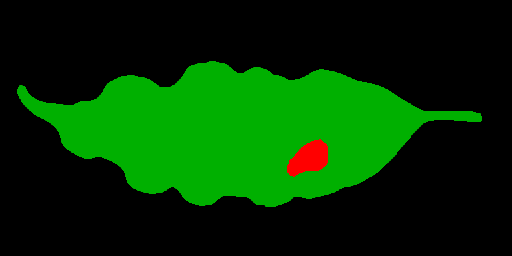

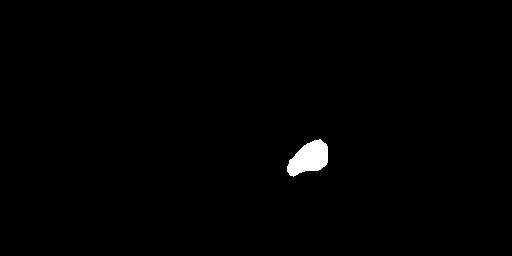

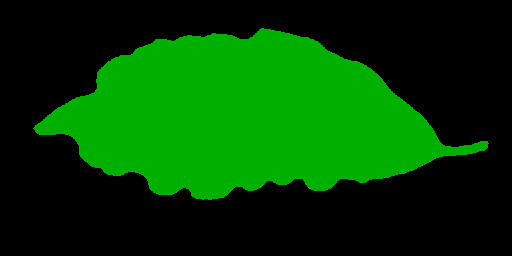

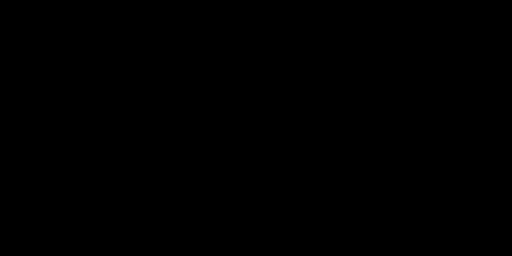

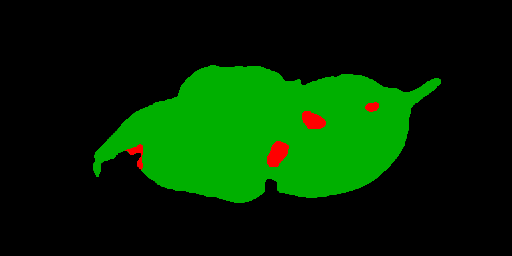

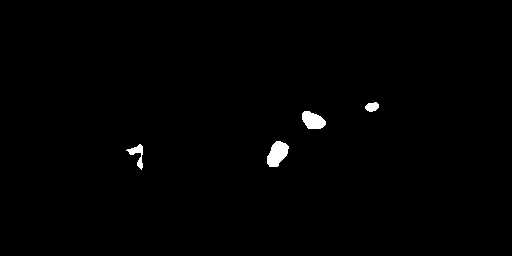

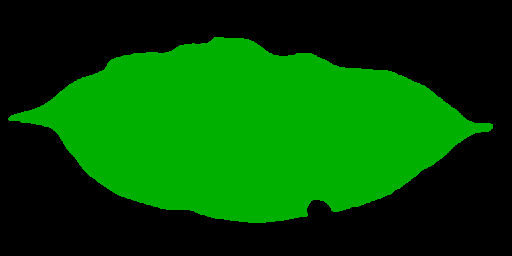

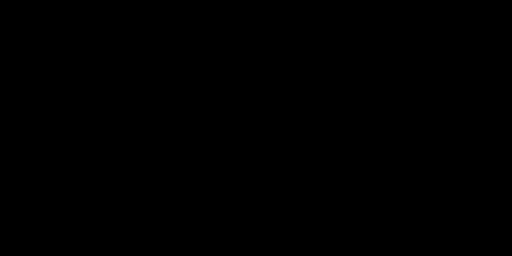

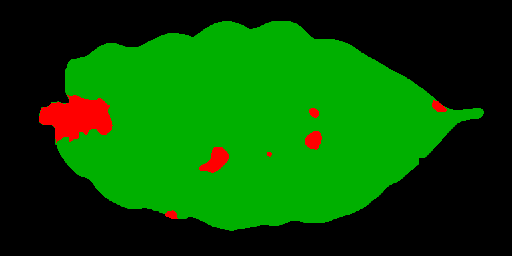

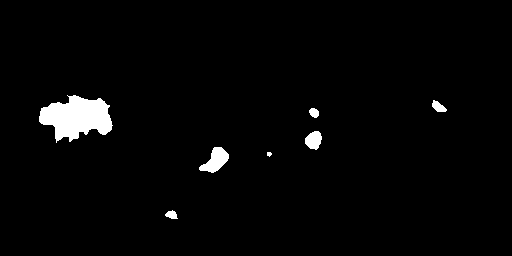

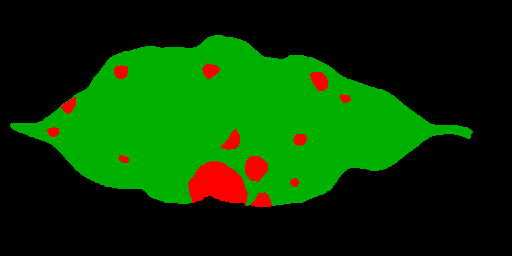

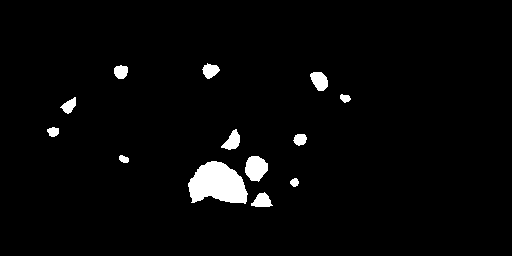

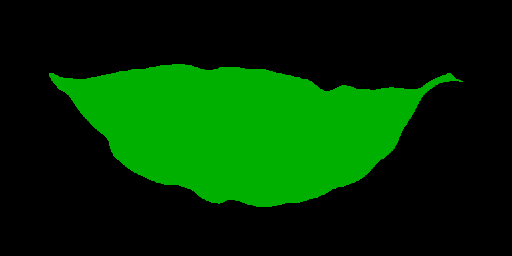

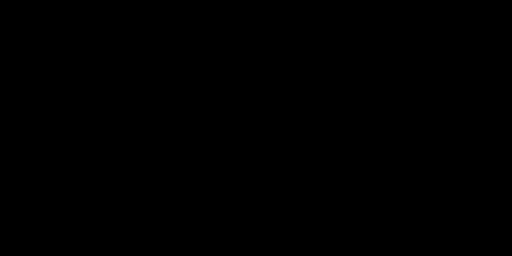

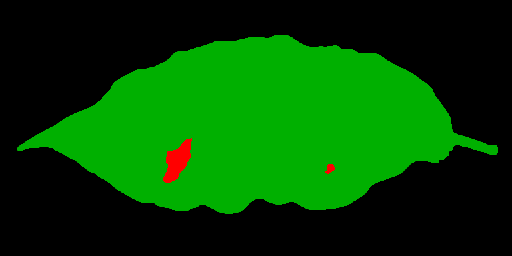

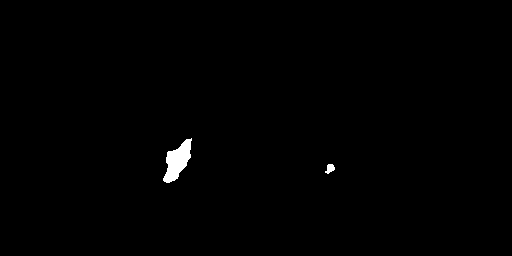

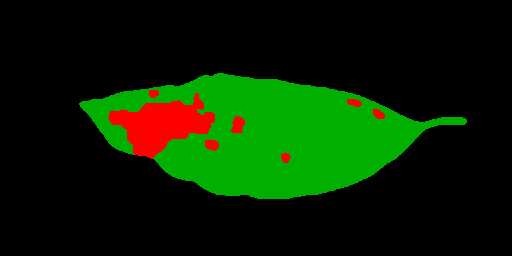

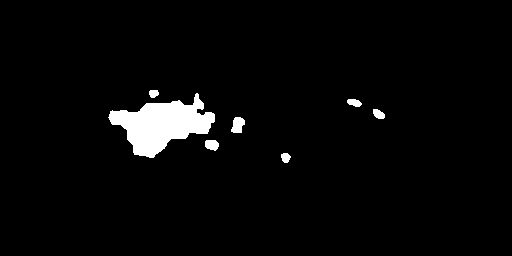

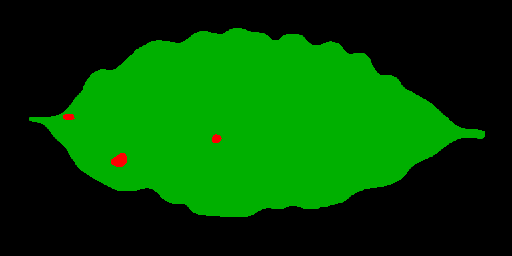

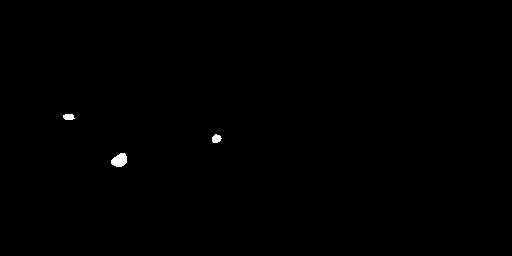

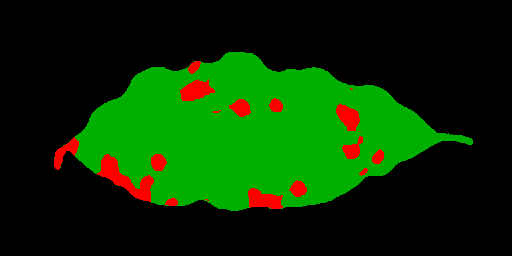

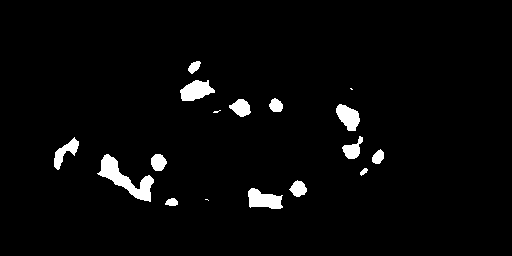

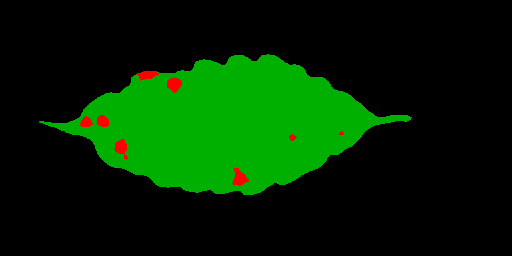

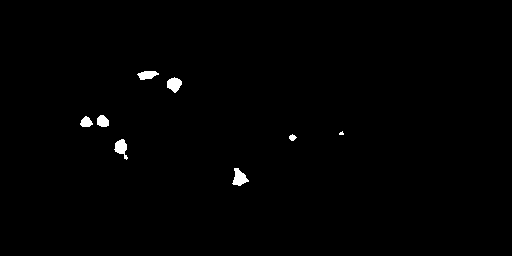

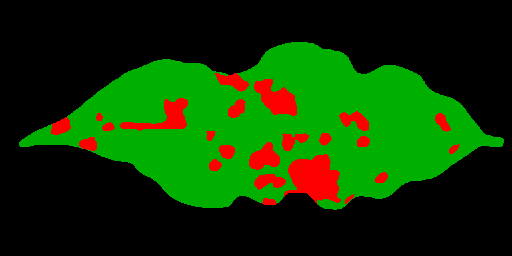

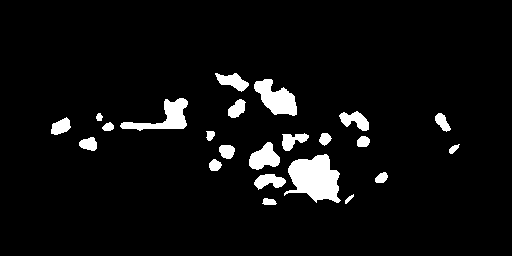

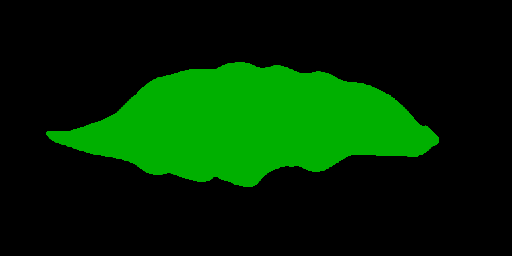

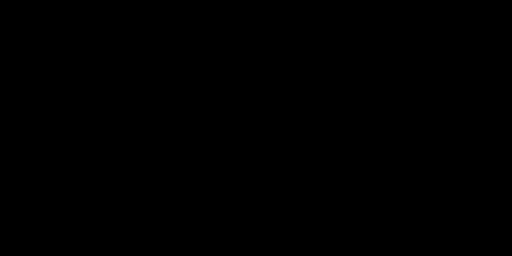

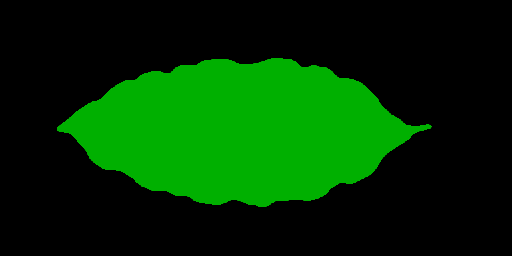

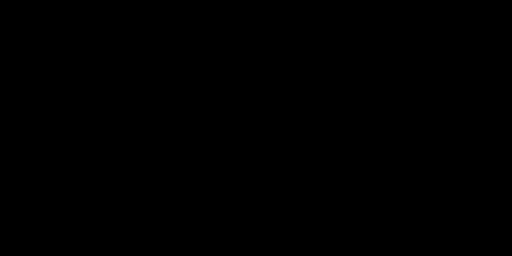

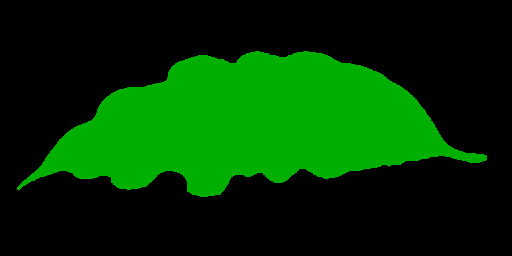

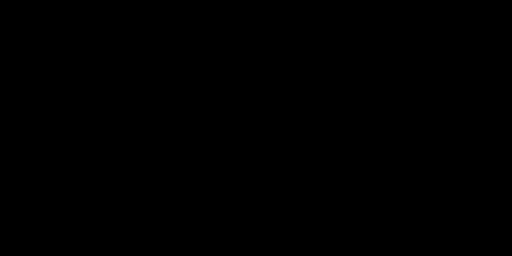

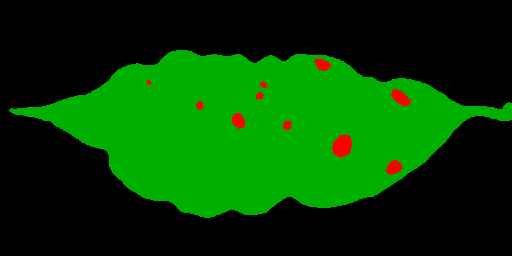

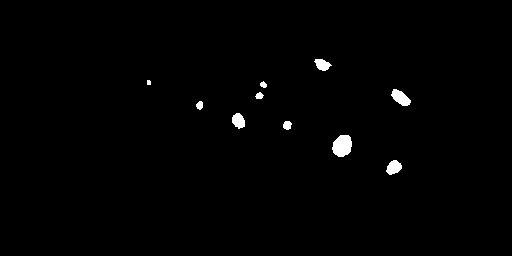

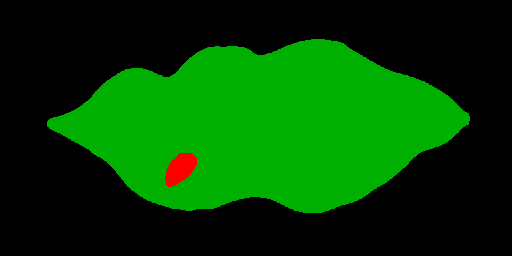

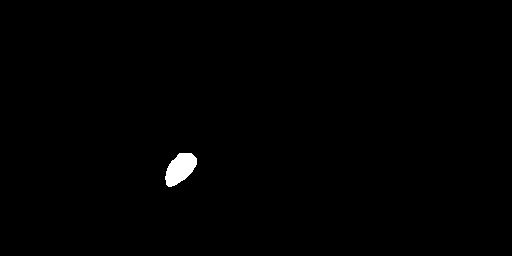

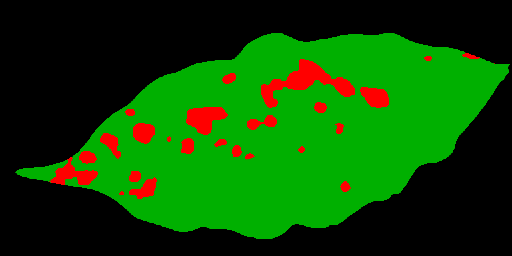

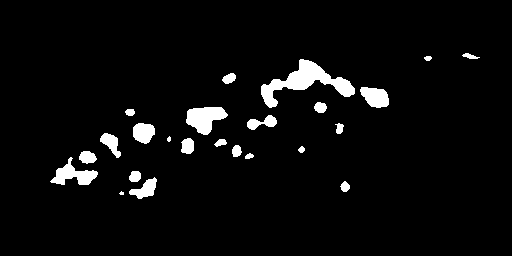

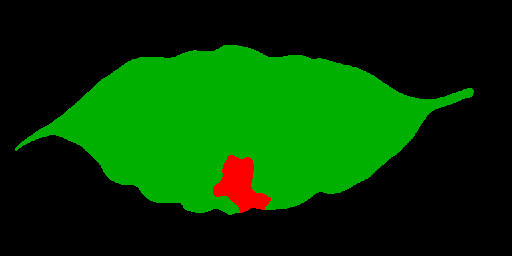

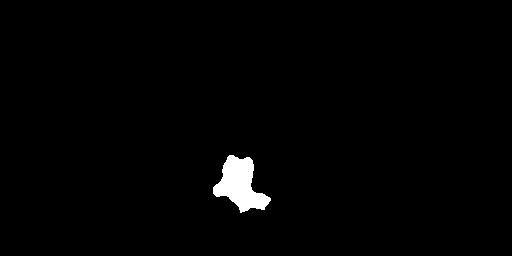

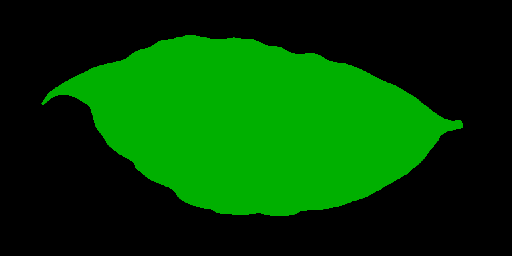

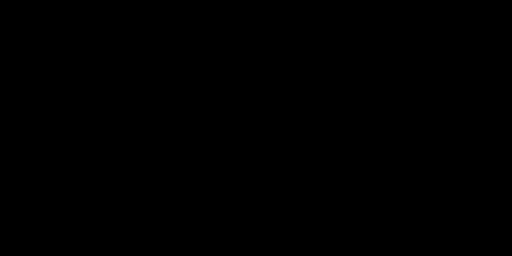

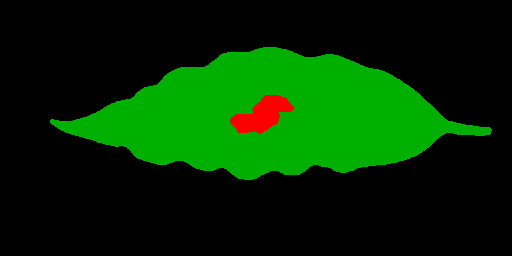

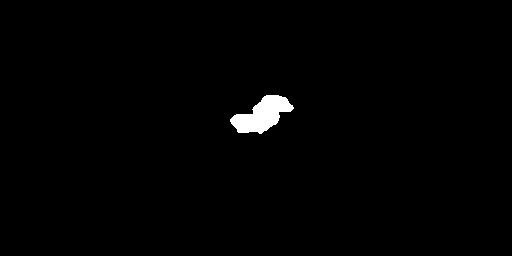

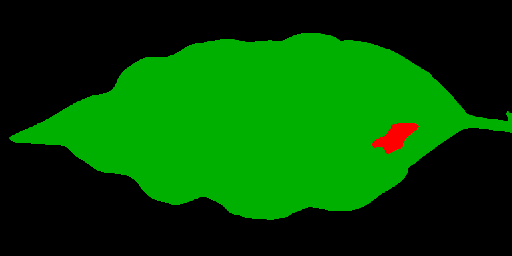

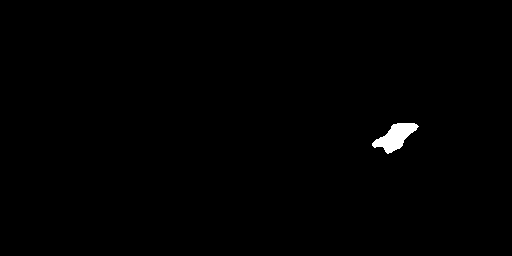

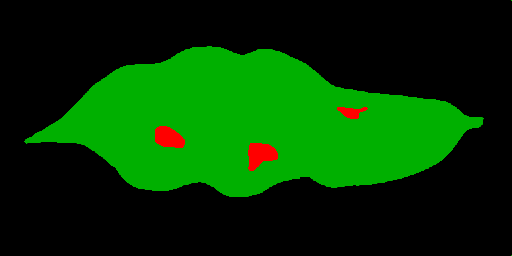

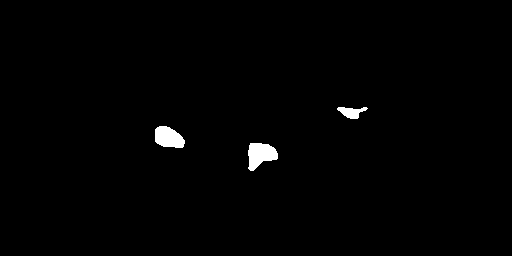

In [ ]:
validation=prepare_dataset("/content/drive/MyDrive/annotations/val","/content/drive/MyDrive/images/val")

In [ ]:
history1=model1.fit(X_train, y_train,batch_size=8, epochs=40,validation_data=validation)

Epoch 1/40
50/50 [==============================] - 17s 347ms/step - loss: 0.0883 - iou_score: 0.8515 - f1-score: 0.9193 - val_loss: 0.1318 - val_iou_score: 0.7937 - val_f1-score: 0.8837
Epoch 2/40
50/50 [==============================] - 15s 292ms/step - loss: 0.0895 - iou_score: 0.8499 - f1-score: 0.9183 - val_loss: 0.1325 - val_iou_score: 0.7933 - val_f1-score: 0.8833
Epoch 3/40
50/50 [==============================] - 15s 291ms/step - loss: 0.0888 - iou_score: 0.8505 - f1-score: 0.9187 - val_loss: 0.1316 - val_iou_score: 0.7958 - val_f1-score: 0.8845
Epoch 4/40
50/50 [==============================] - 14s 284ms/step - loss: 0.0865 - iou_score: 0.8542 - f1-score: 0.9210 - val_loss: 0.1405 - val_iou_score: 0.7822 - val_f1-score: 0.8758
Epoch 5/40
50/50 [==============================] - 14s 287ms/step - loss: 0.0853 - iou_score: 0.8556 - f1-score: 0.9217 - val_loss: 0.1279 - val_iou_score: 0.8010 - val_f1-score: 0.8879
Epoch 6/40
50/50 [==============================] - 14s 285ms/ste

In [ ]:
model1.save("/content/drive/MyDrive/coffee_fist_model_to_tune.h5")

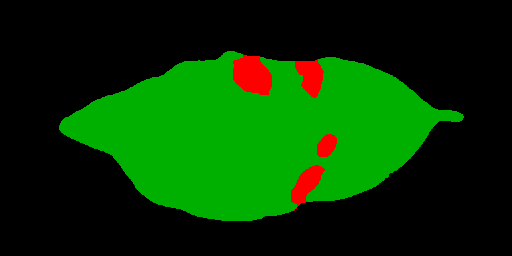

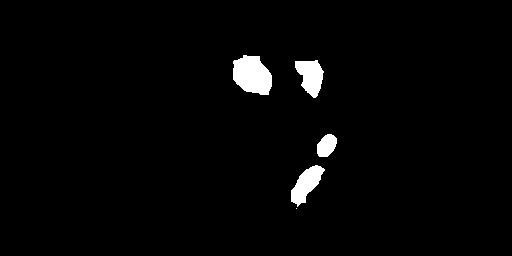

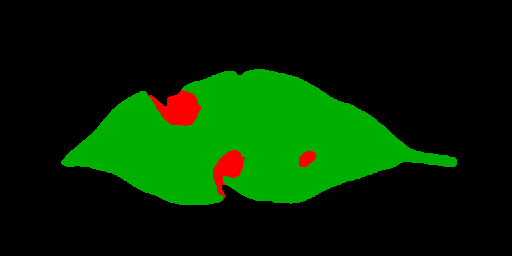

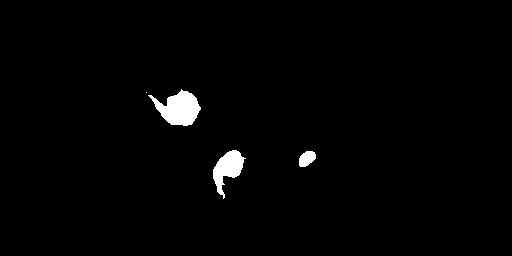

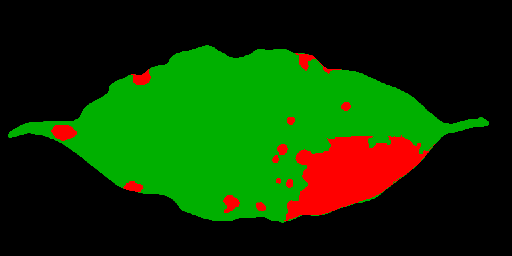

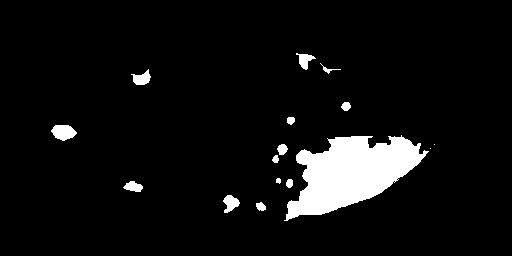

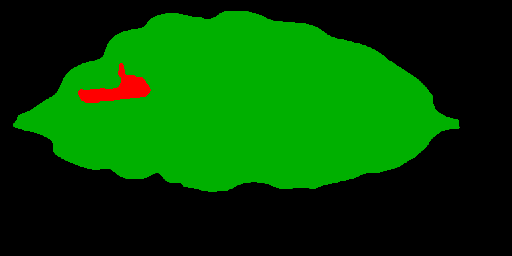

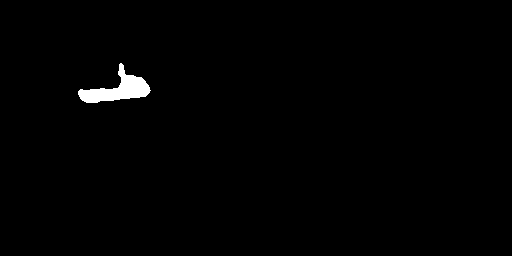

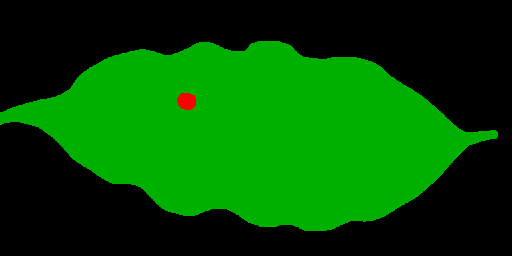

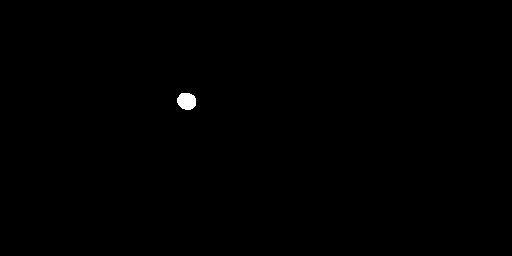

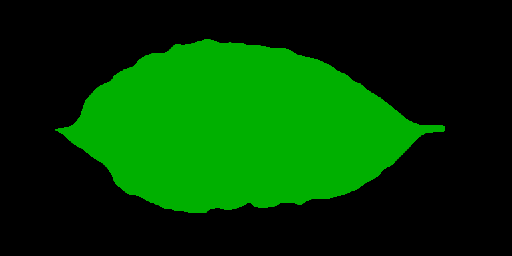

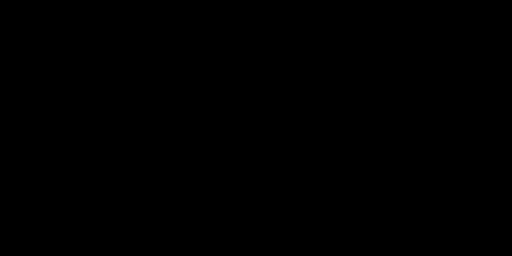

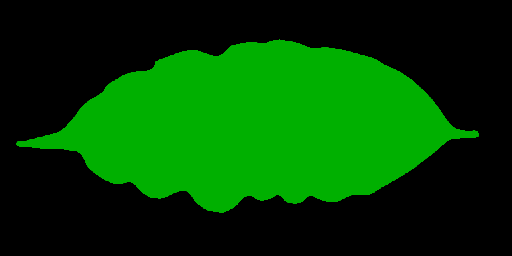

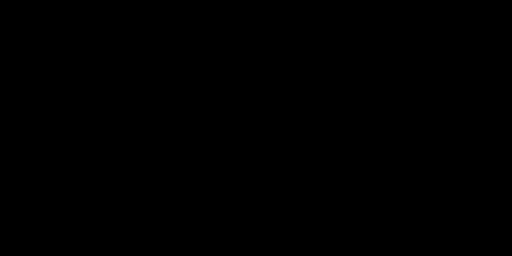

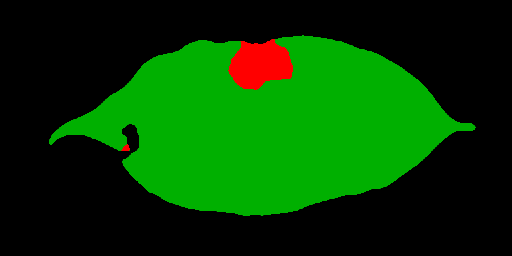

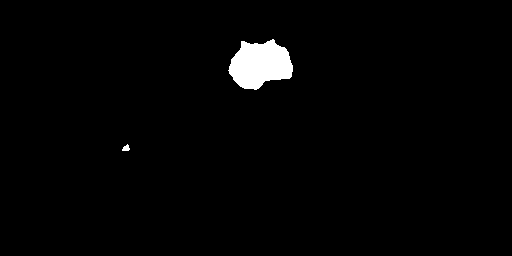

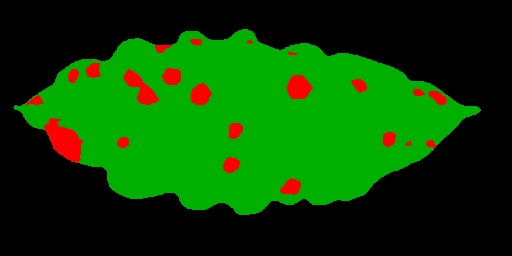

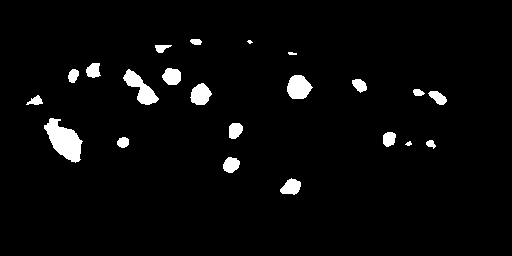

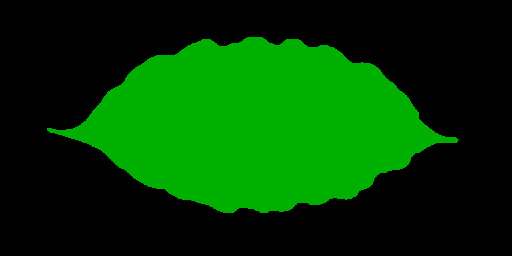

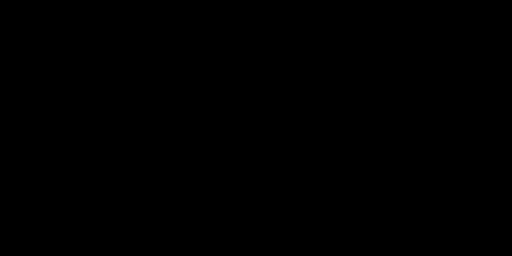

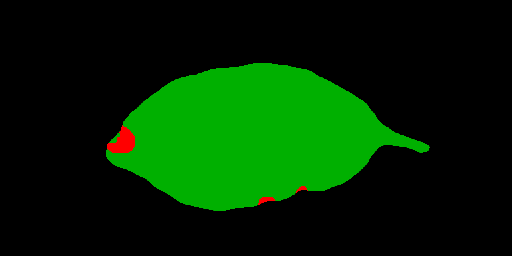

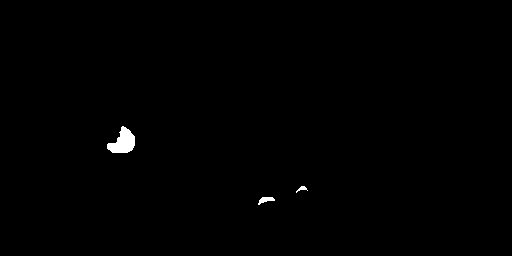

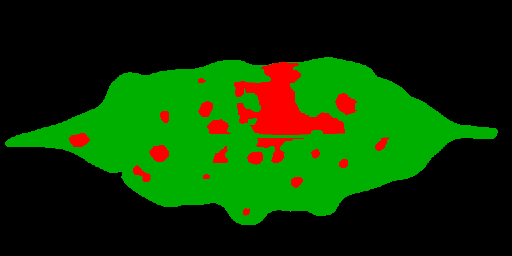

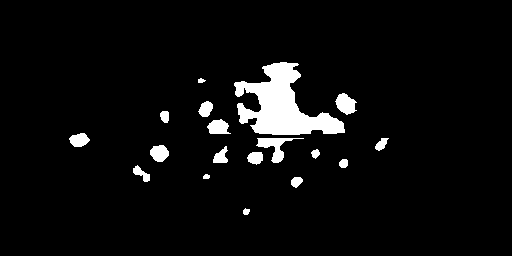

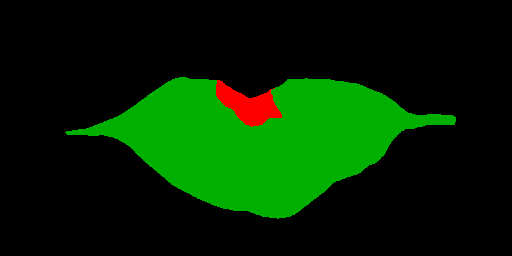

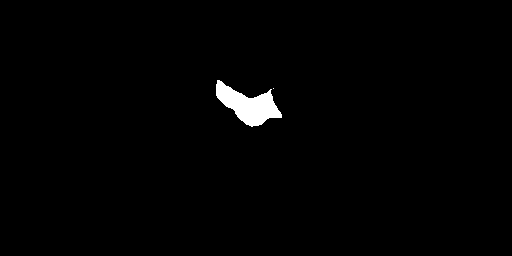

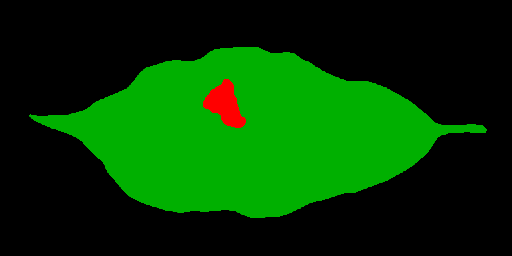

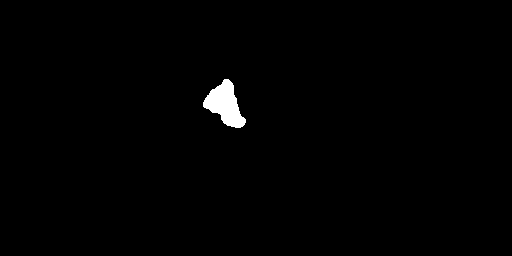

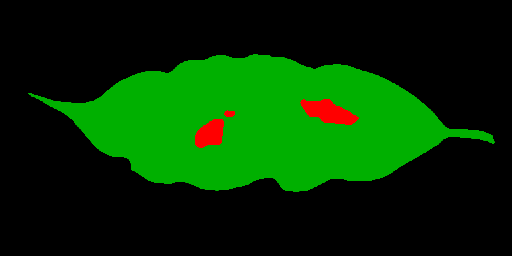

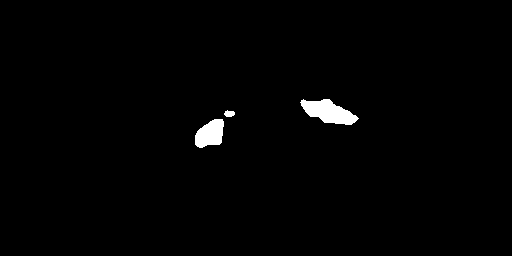

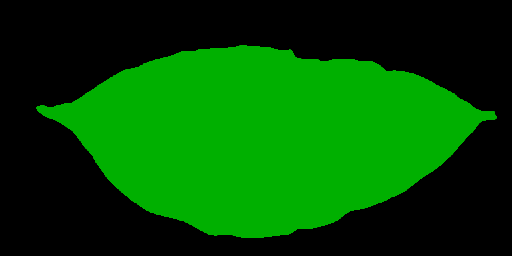

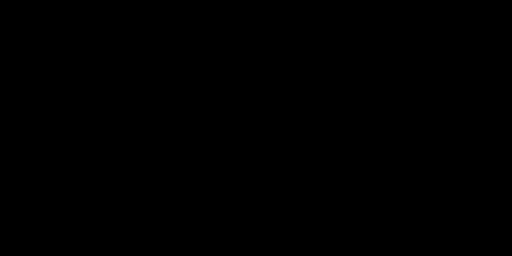

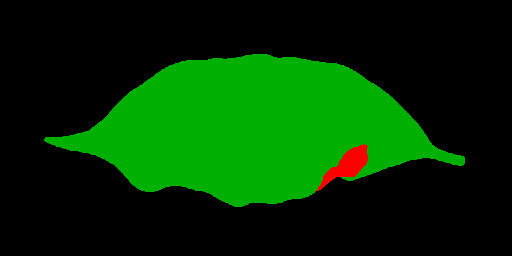

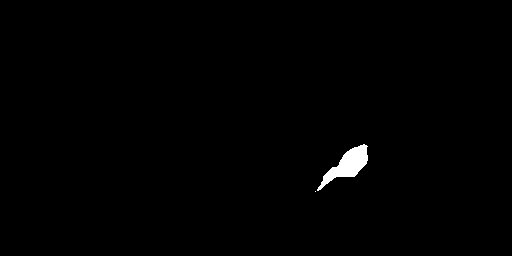

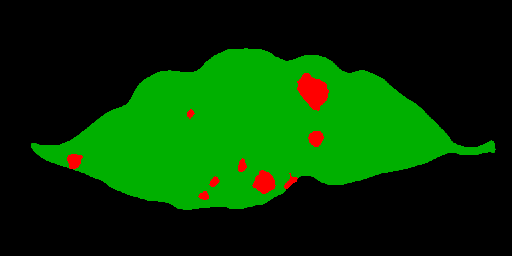

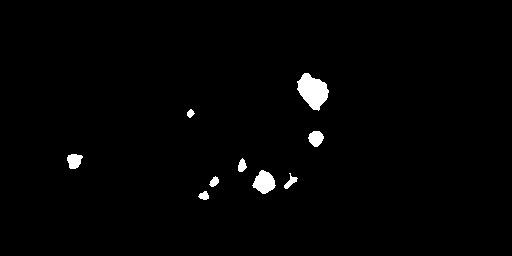

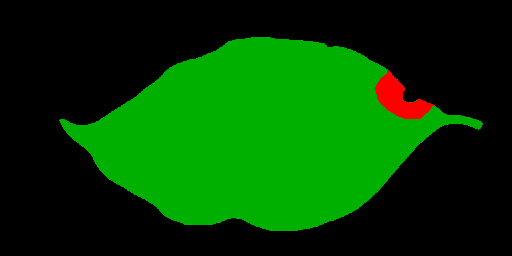

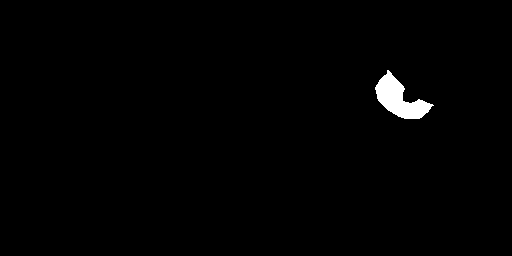

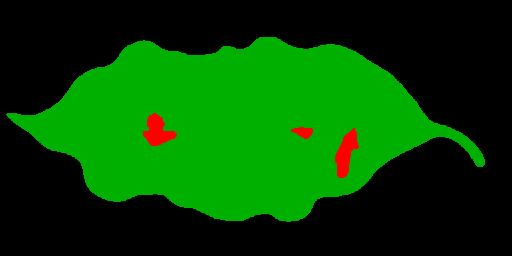

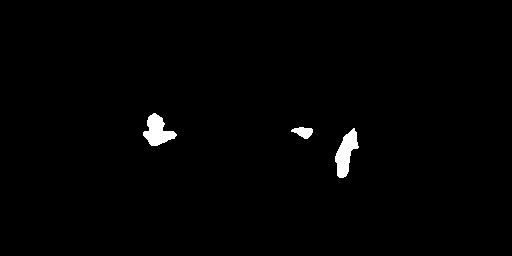

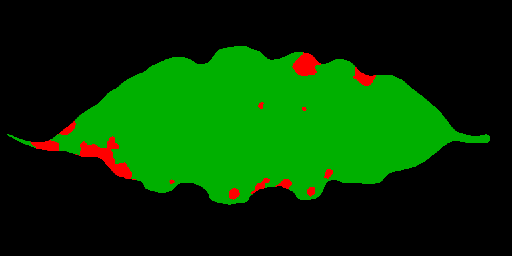

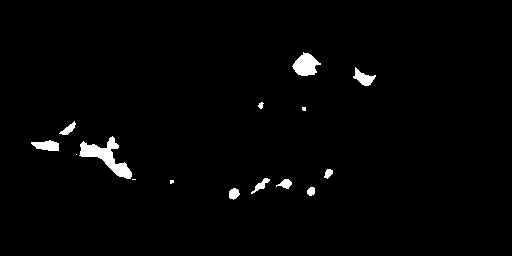

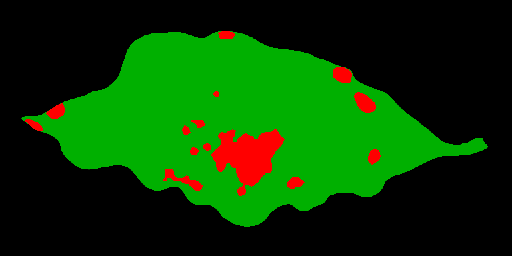

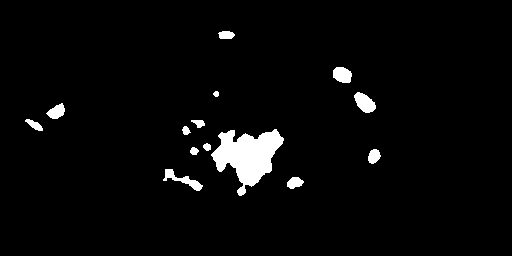

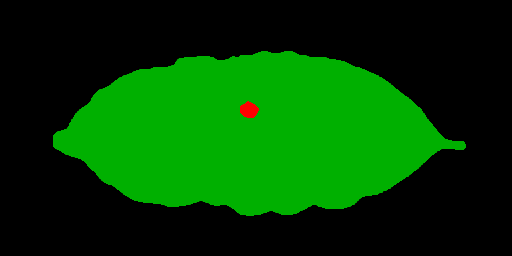

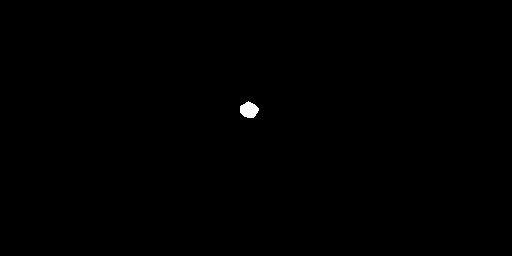

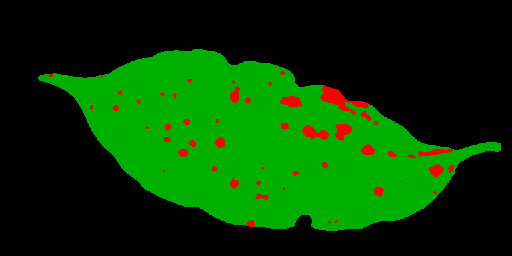

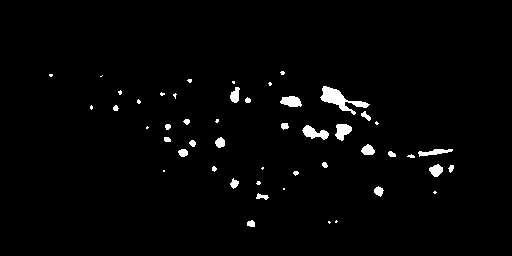

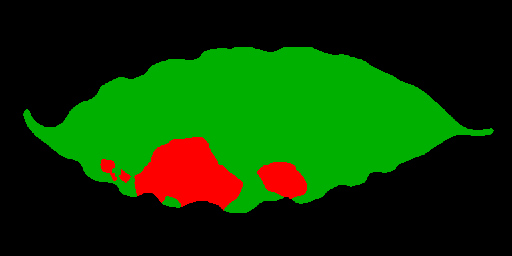

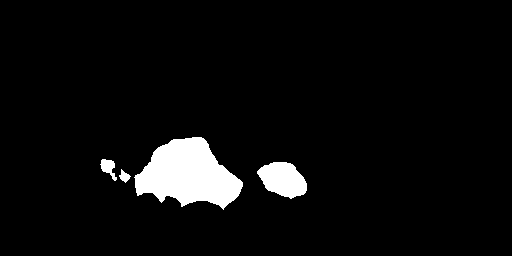

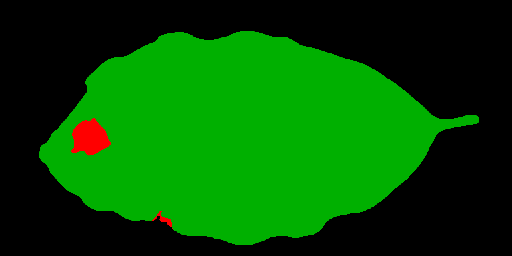

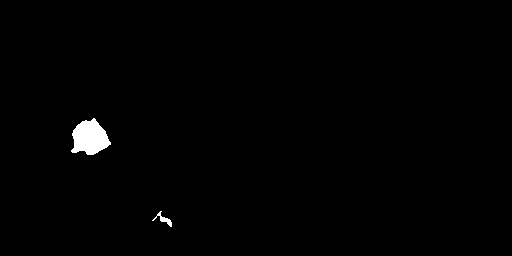

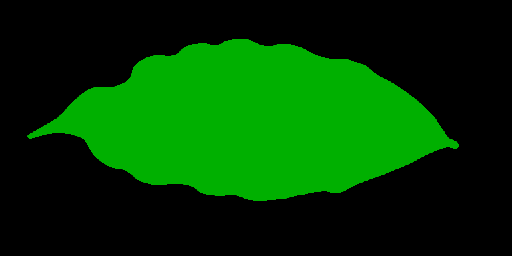

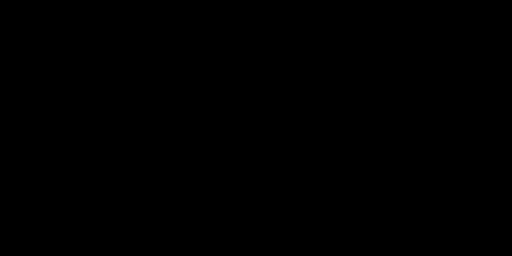

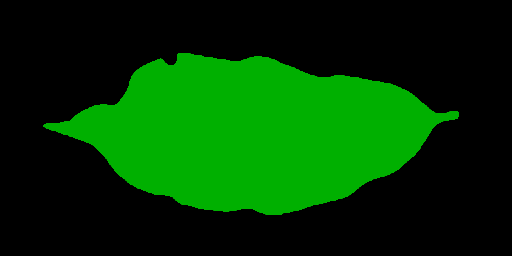

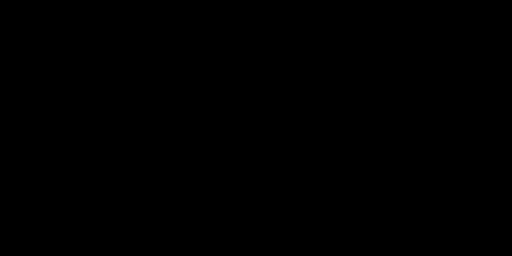

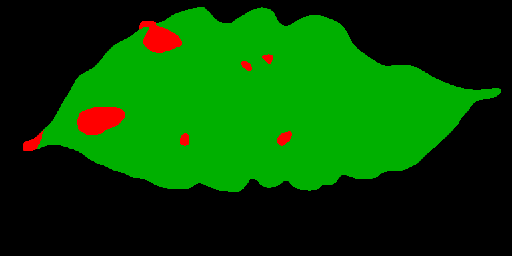

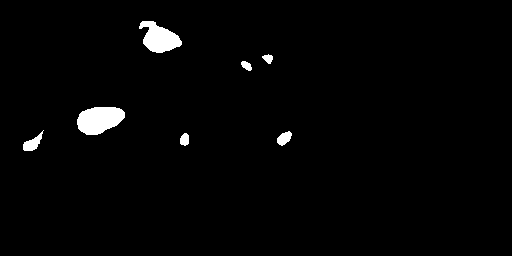

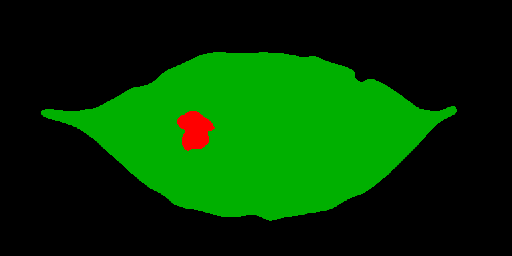

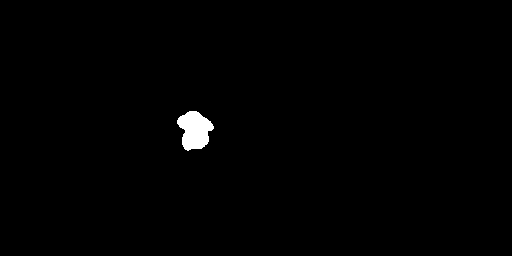

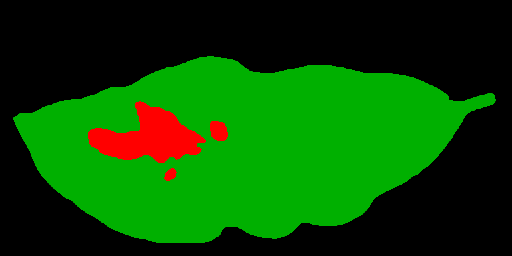

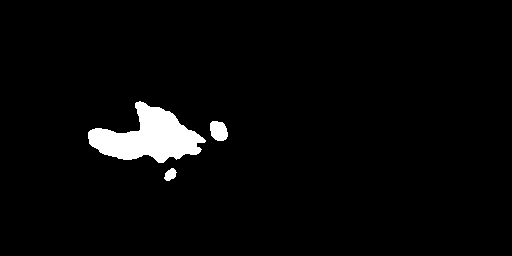

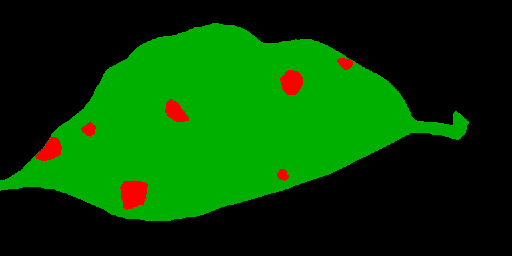

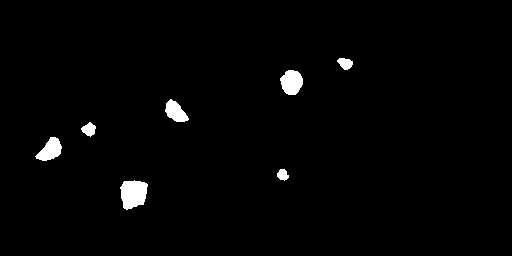

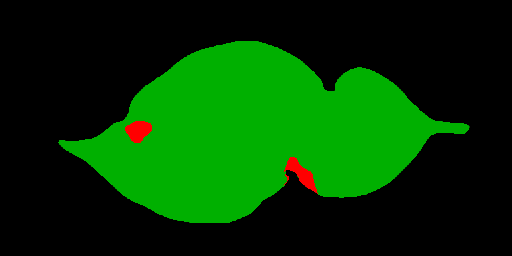

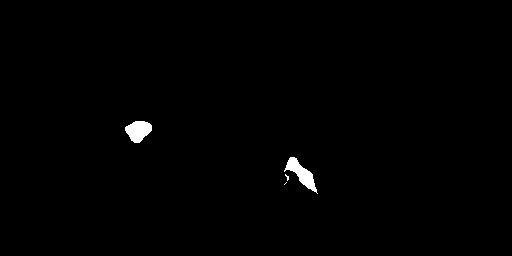

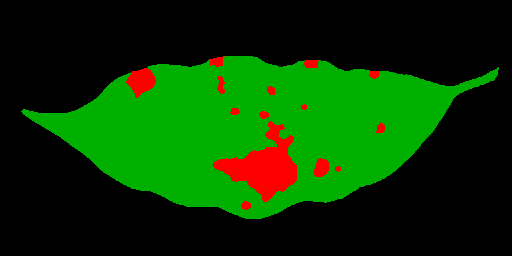

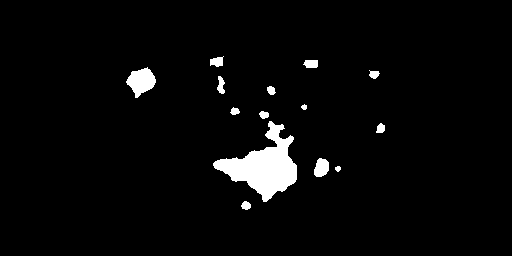

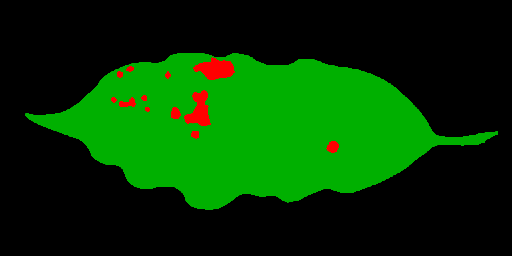

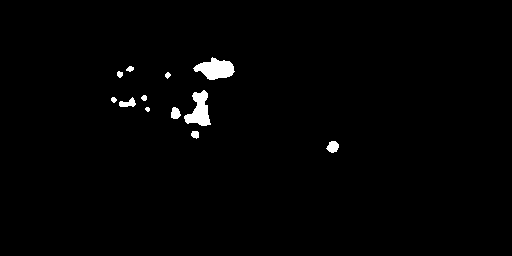

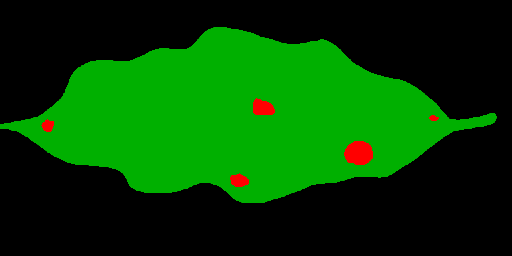

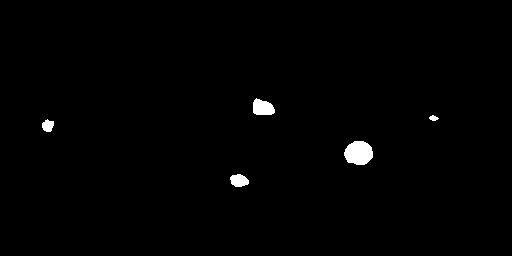

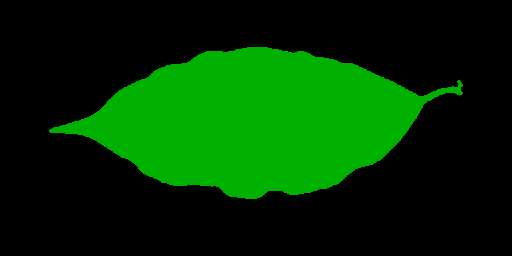

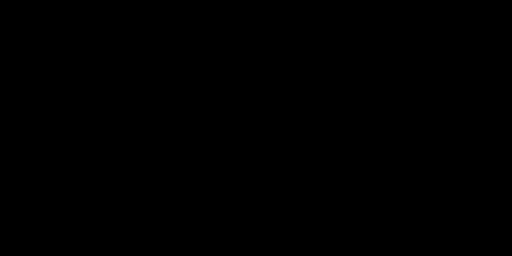

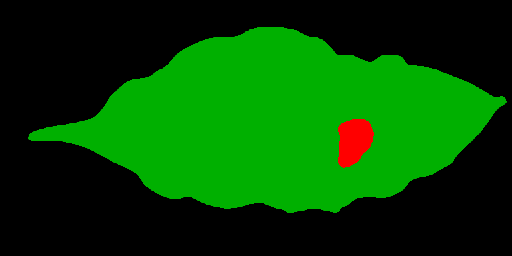

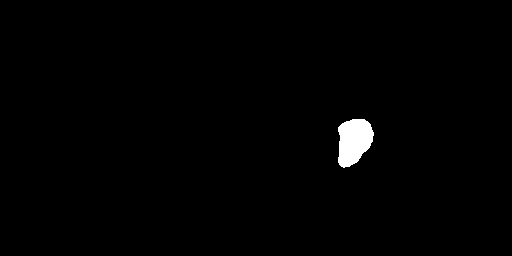

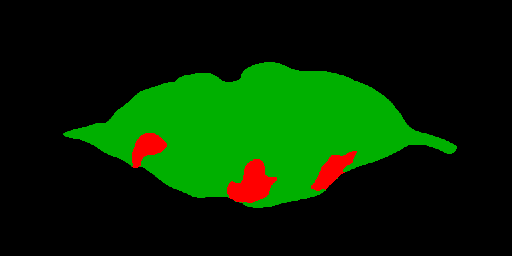

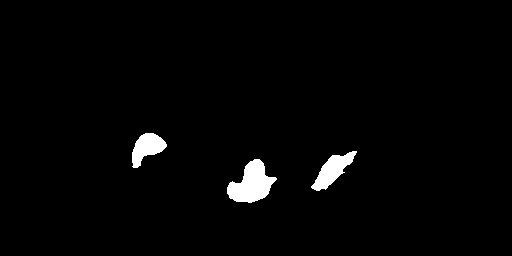

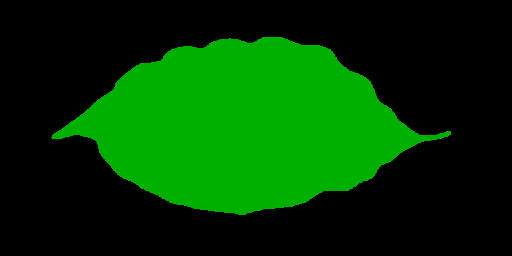

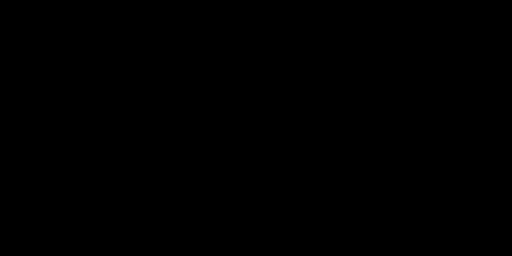

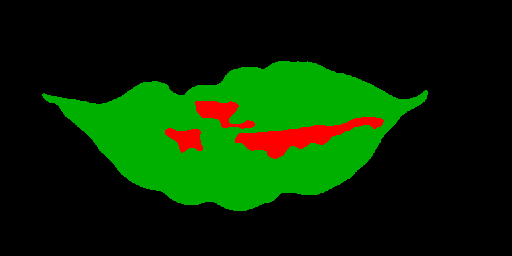

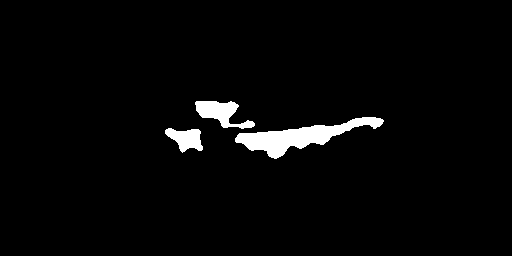

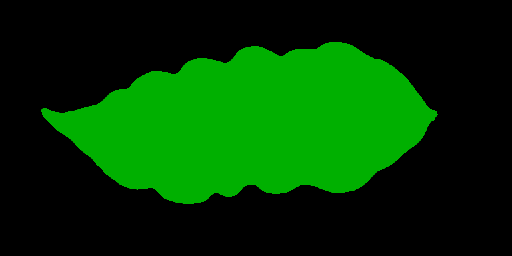

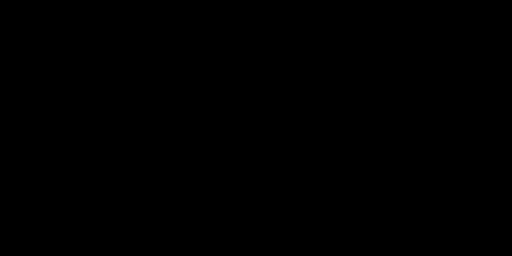

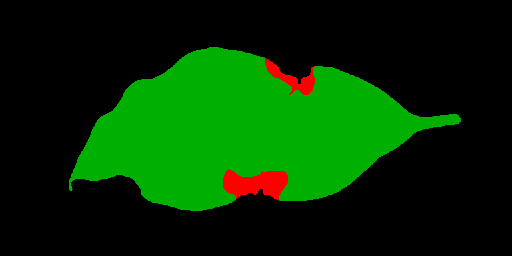

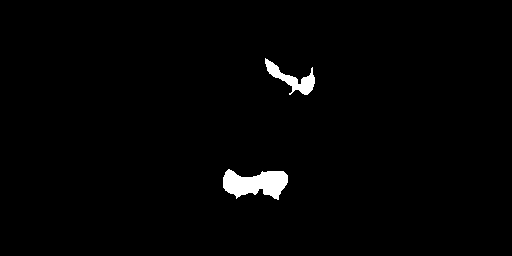

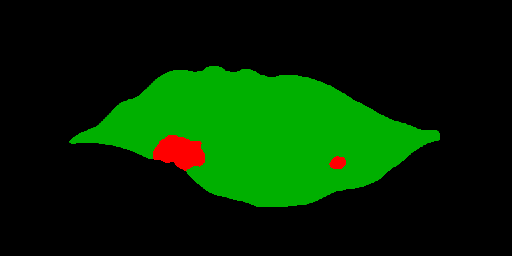

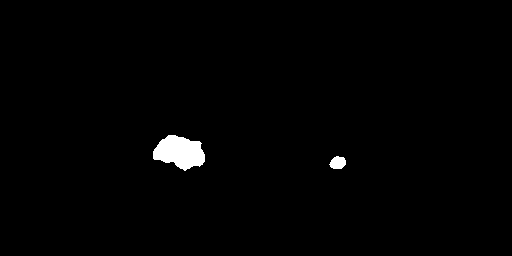

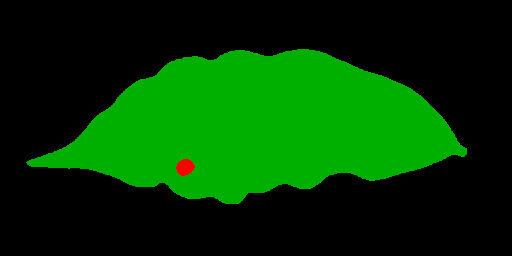

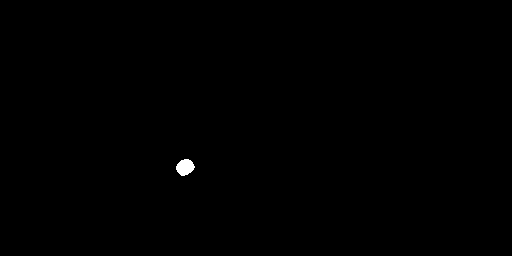

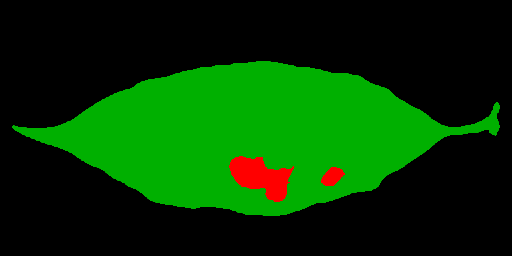

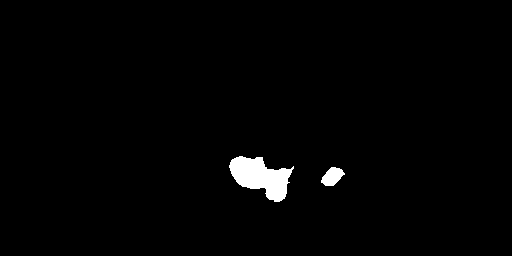

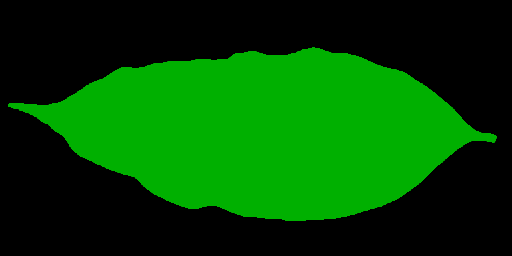

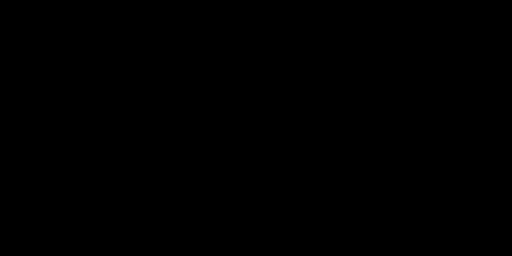

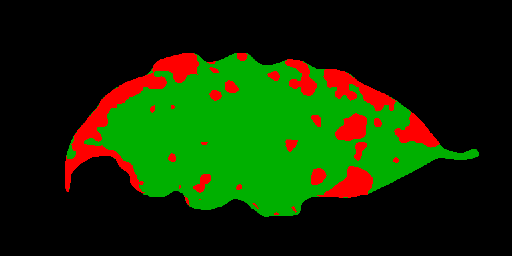

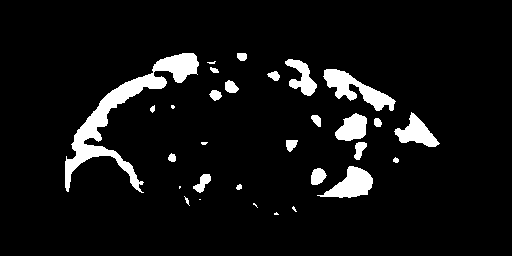

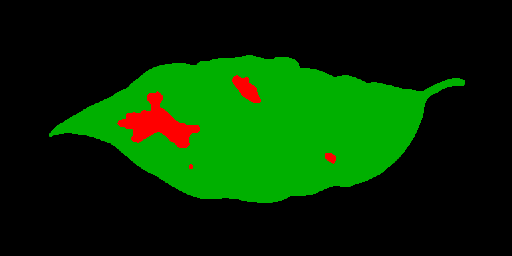

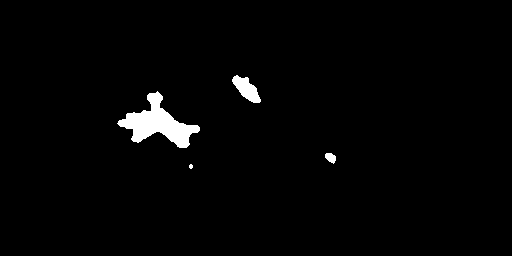

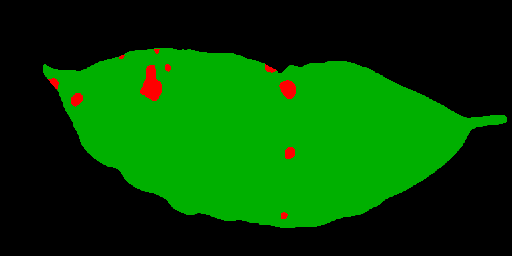

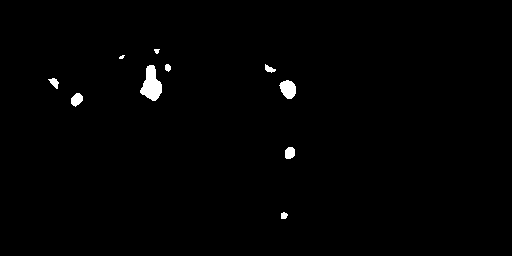

In [ ]:
test=prepare_dataset("/content/drive/MyDrive/annotations/test","/content/drive/MyDrive/images/test")


In [ ]:
prediction=model1.predict(test[0])

2/2 [==============================] - 13s 5s/step


In [ ]:
prediction=np.amax(prediction,axis=-1)

In [ ]:
prediction[prediction>=.5]=1
prediction[prediction<.5]=0

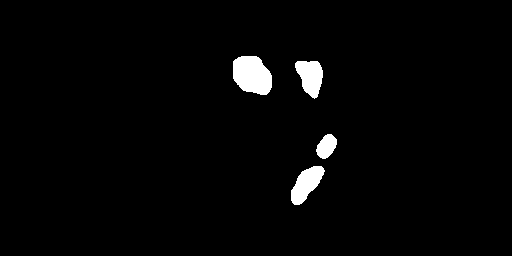

^^^^^^^^^^^^


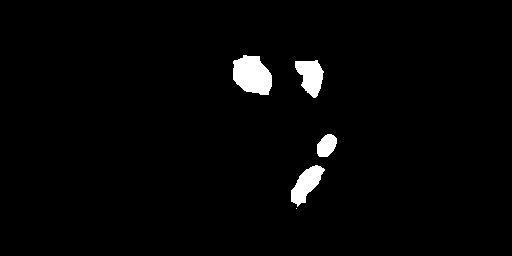

*************


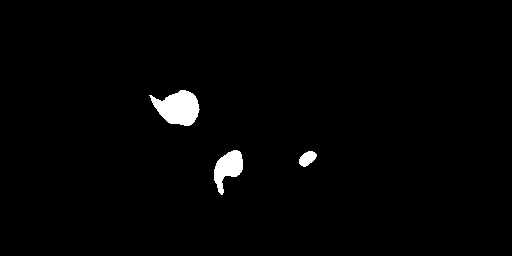

^^^^^^^^^^^^


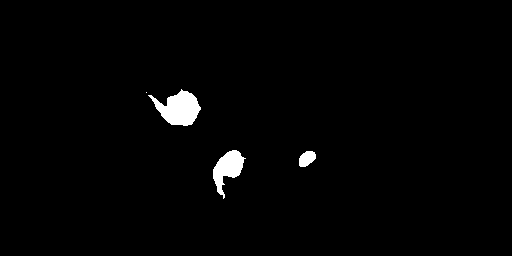

*************


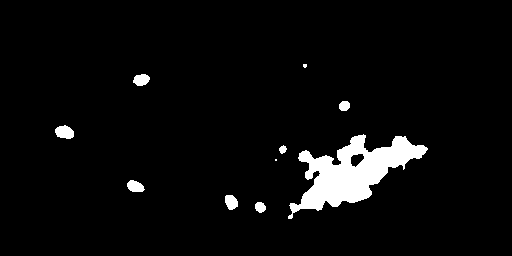

^^^^^^^^^^^^


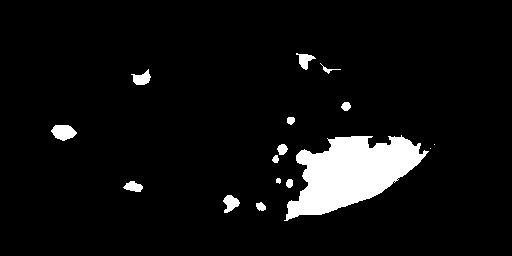

*************


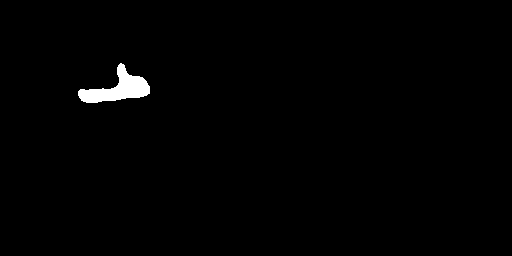

^^^^^^^^^^^^


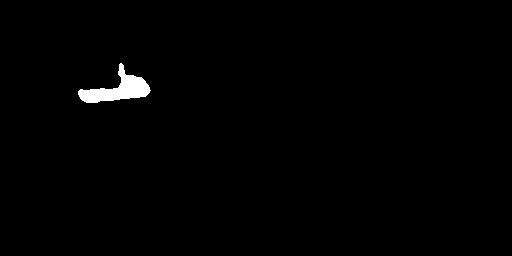

*************


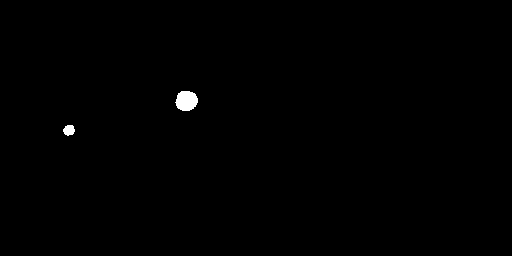

^^^^^^^^^^^^


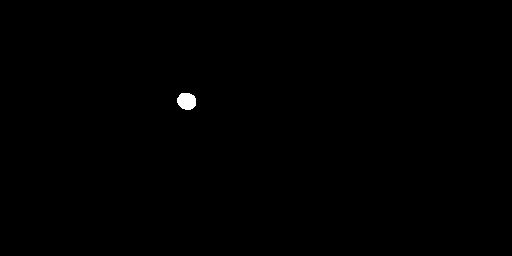

*************


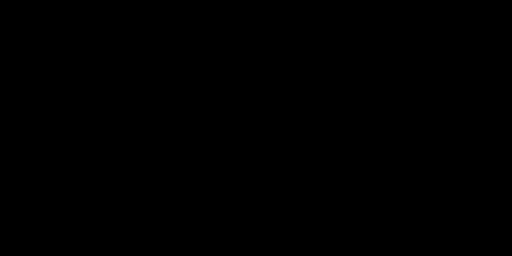

^^^^^^^^^^^^


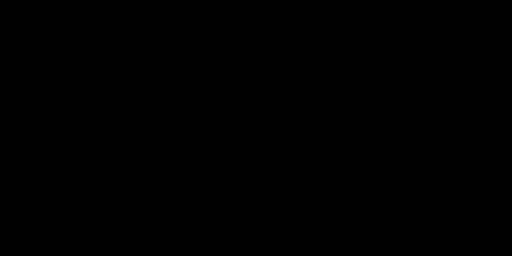

*************


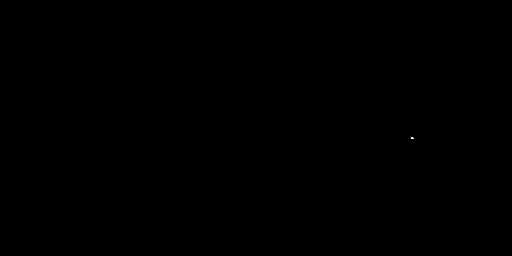

^^^^^^^^^^^^


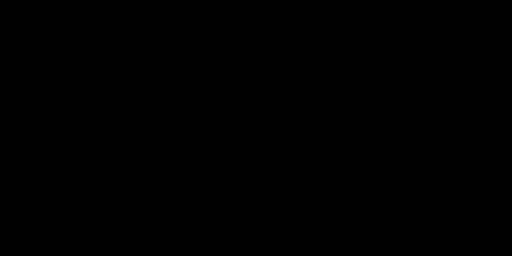

*************


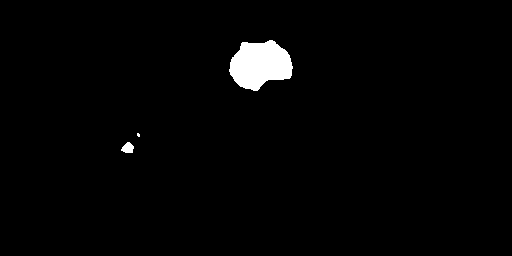

^^^^^^^^^^^^


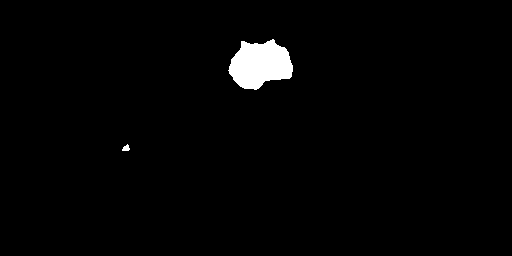

*************


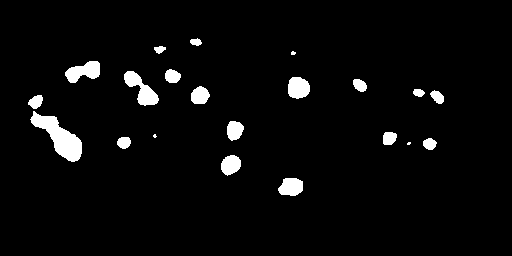

^^^^^^^^^^^^


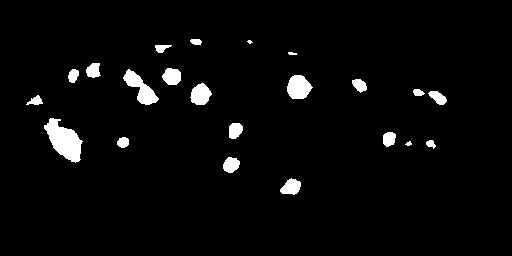

*************


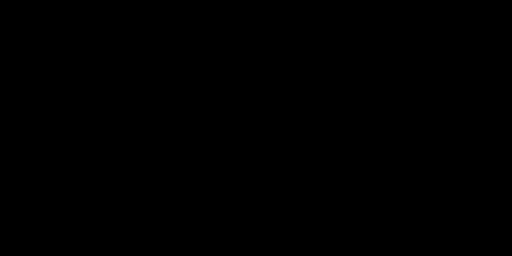

^^^^^^^^^^^^


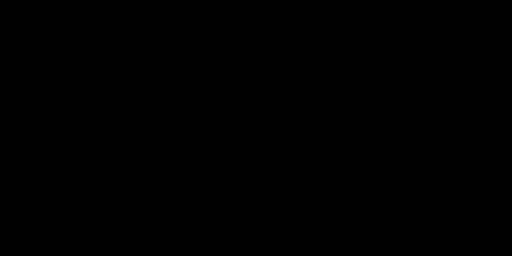

*************


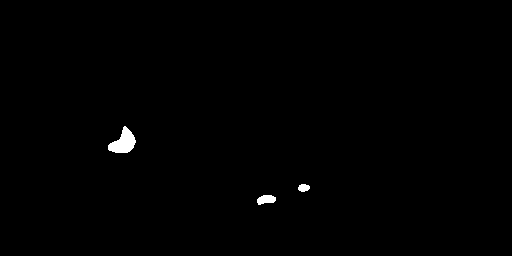

^^^^^^^^^^^^


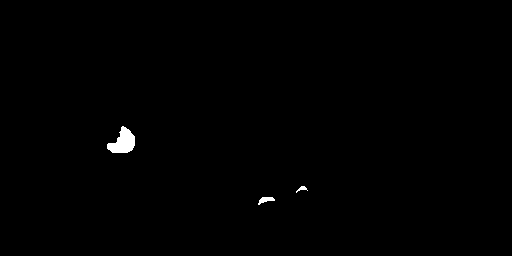

*************


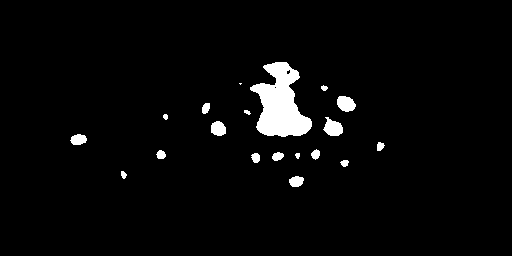

^^^^^^^^^^^^


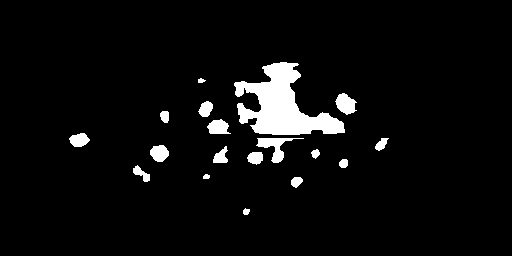

*************


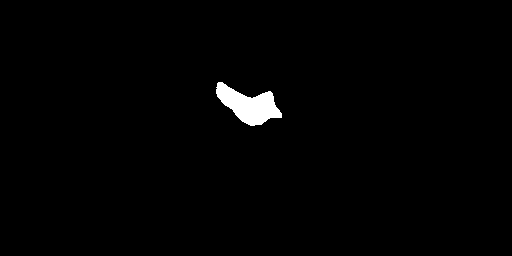

^^^^^^^^^^^^


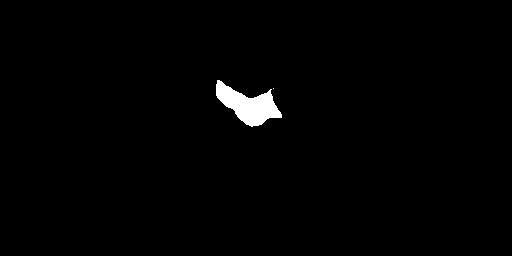

*************


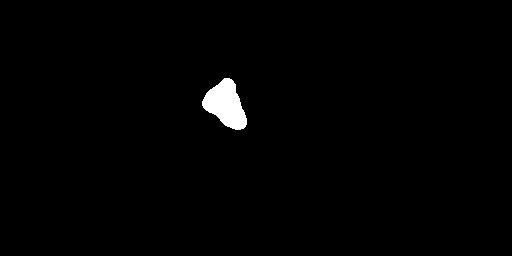

^^^^^^^^^^^^


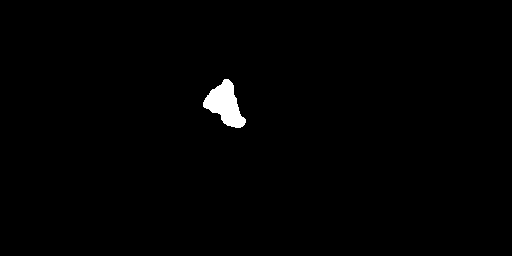

*************


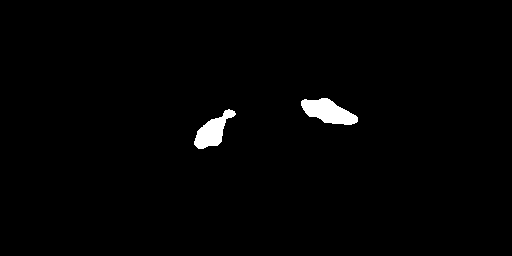

^^^^^^^^^^^^


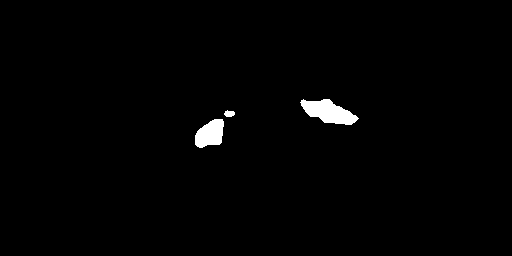

*************


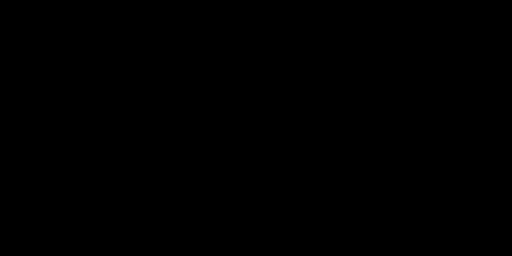

^^^^^^^^^^^^


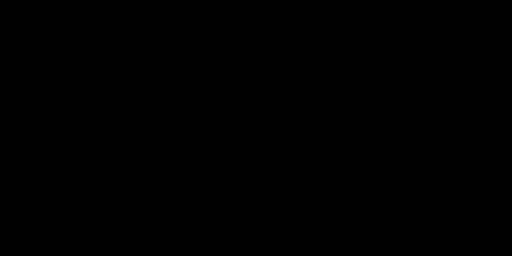

*************


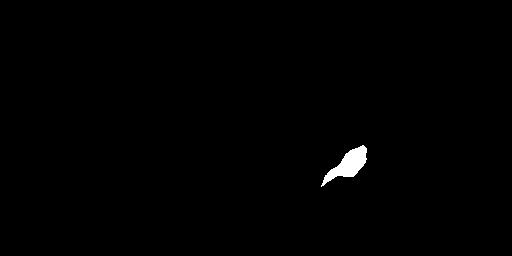

^^^^^^^^^^^^


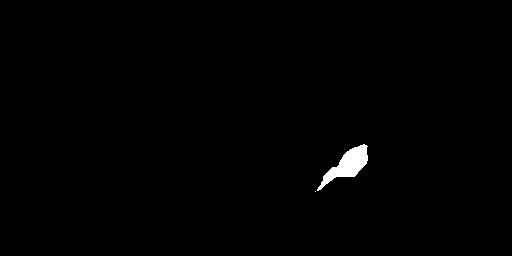

*************


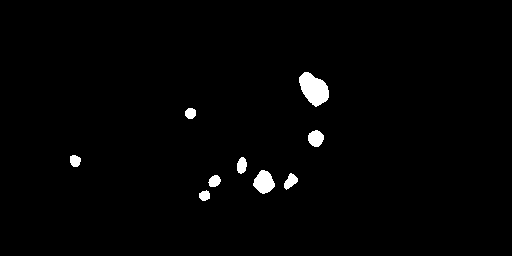

^^^^^^^^^^^^


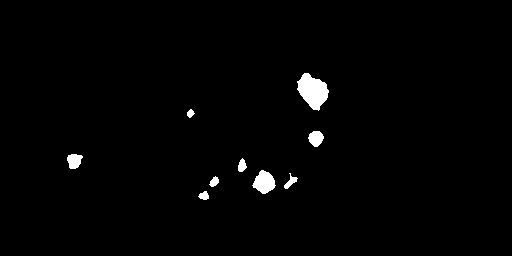

*************


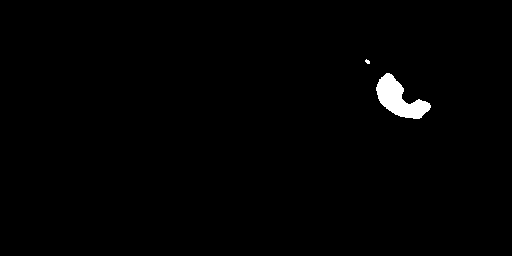

^^^^^^^^^^^^


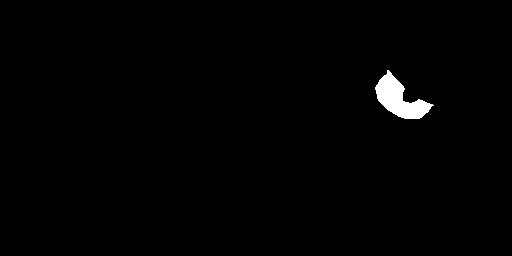

*************


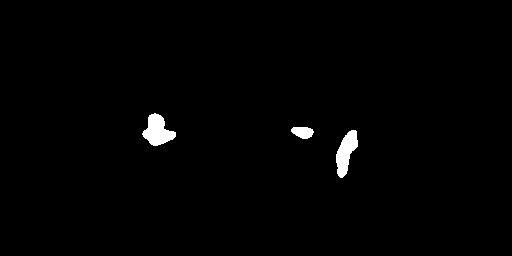

^^^^^^^^^^^^


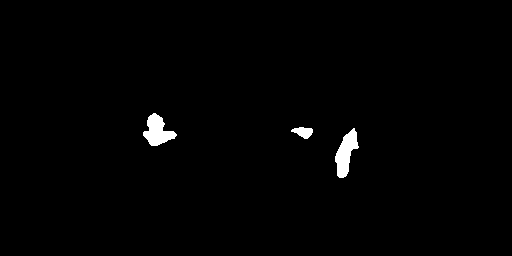

*************


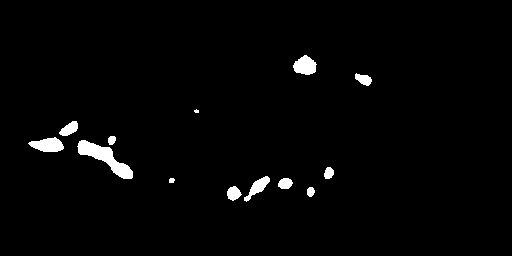

^^^^^^^^^^^^


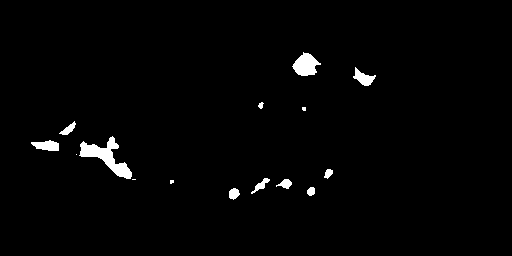

*************


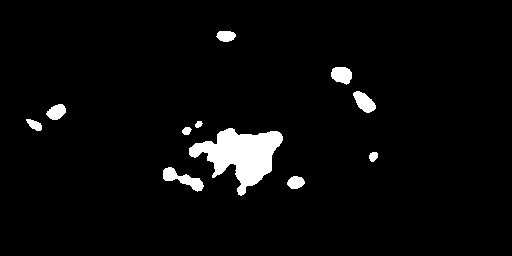

^^^^^^^^^^^^


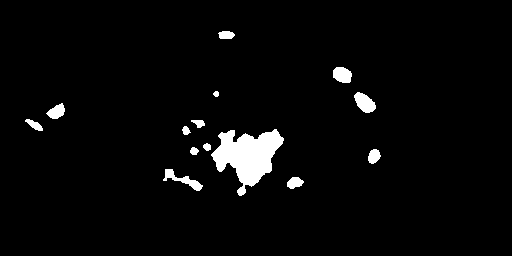

*************


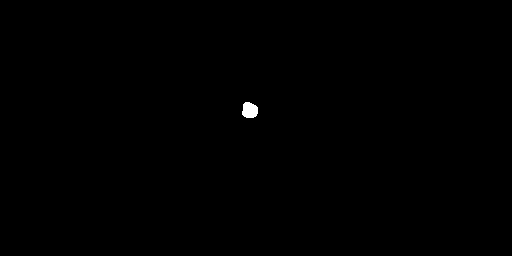

^^^^^^^^^^^^


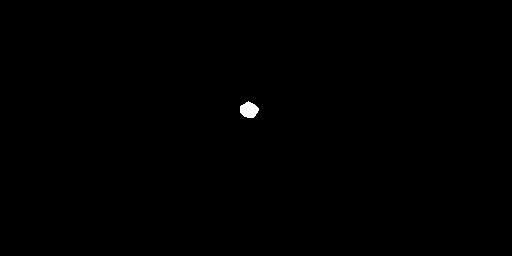

*************


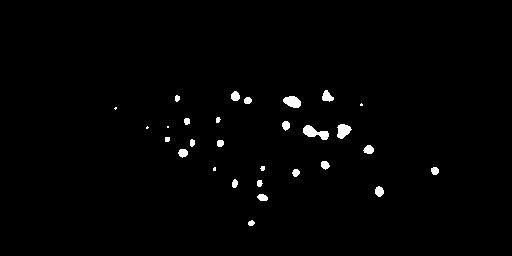

^^^^^^^^^^^^


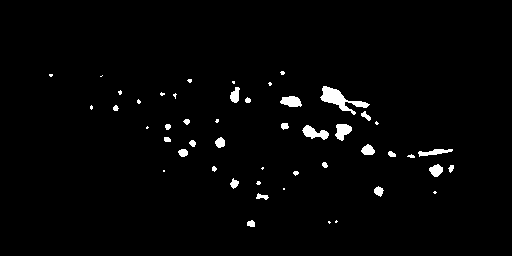

*************


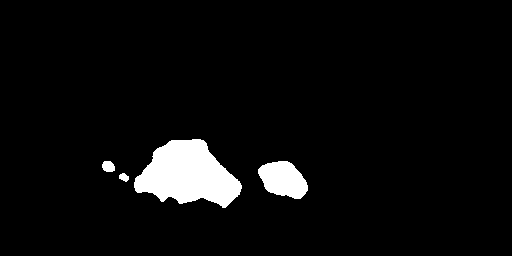

^^^^^^^^^^^^


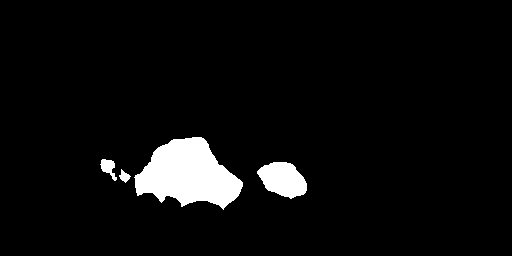

*************


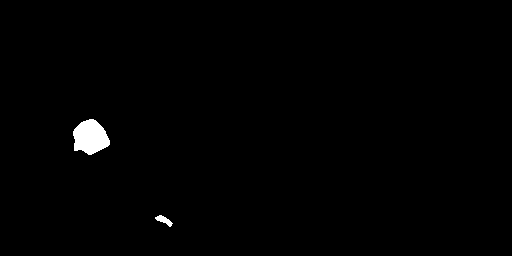

^^^^^^^^^^^^


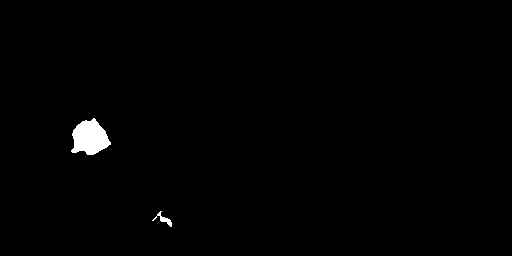

*************


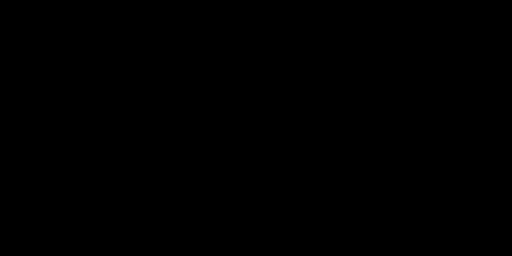

^^^^^^^^^^^^


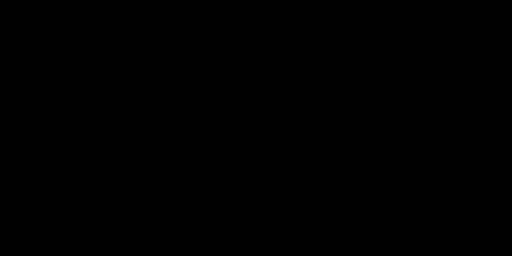

*************


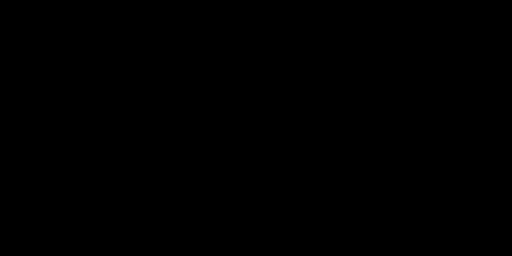

^^^^^^^^^^^^


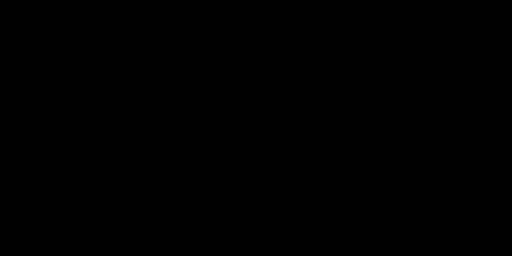

*************


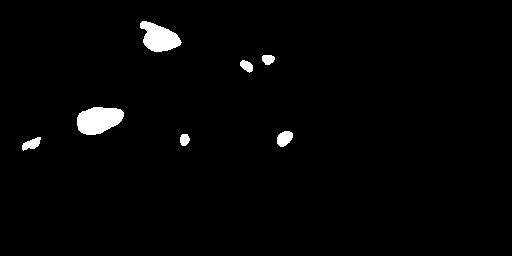

^^^^^^^^^^^^


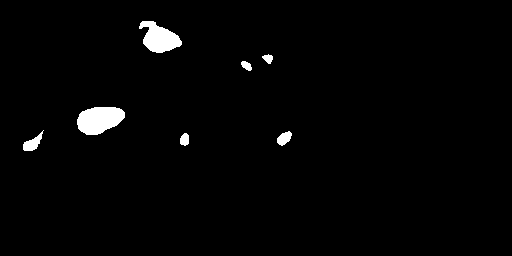

*************


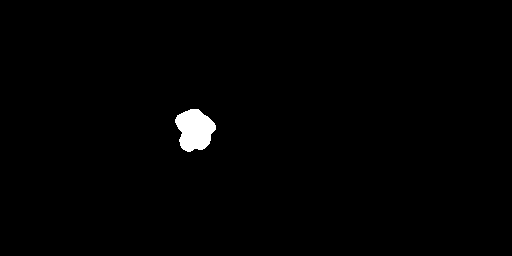

^^^^^^^^^^^^


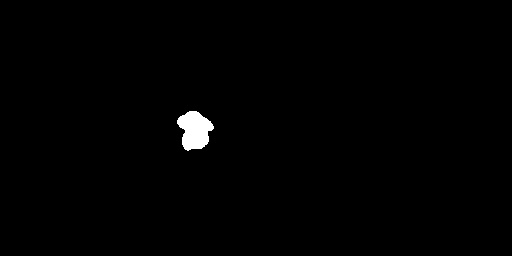

*************


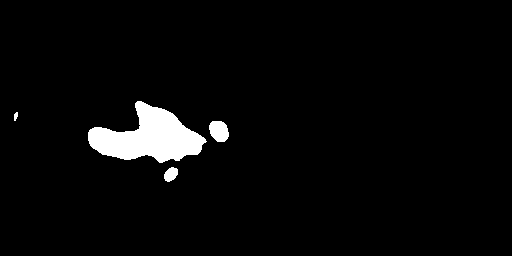

^^^^^^^^^^^^


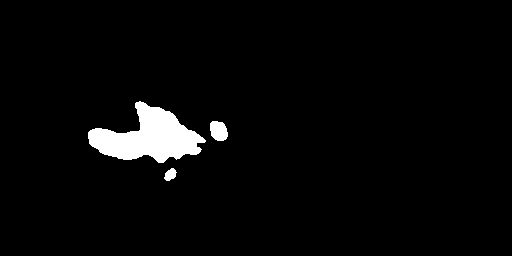

*************


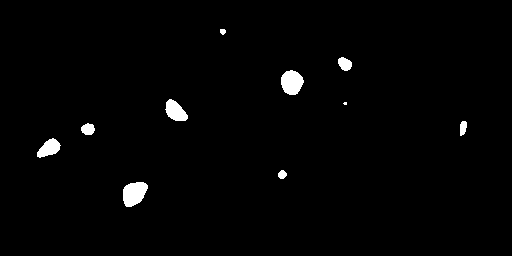

^^^^^^^^^^^^


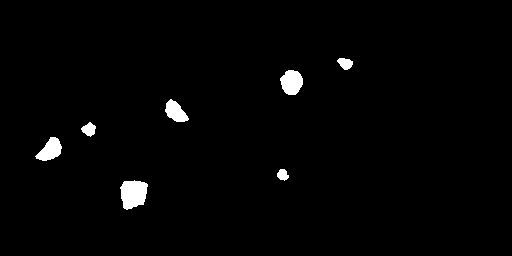

*************


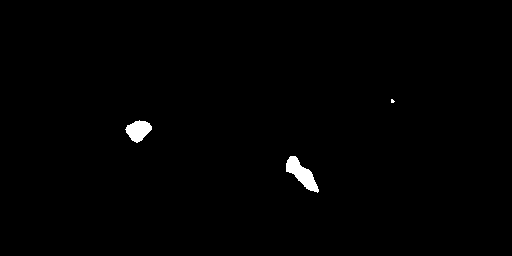

^^^^^^^^^^^^


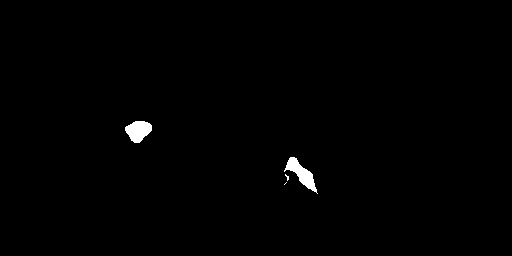

*************


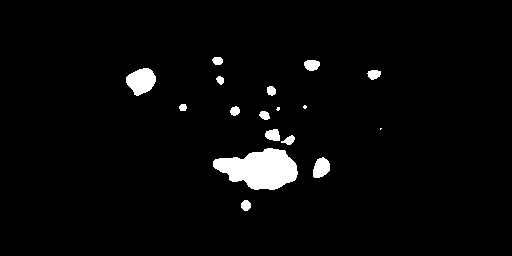

^^^^^^^^^^^^


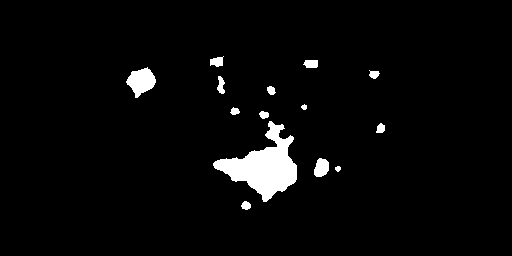

*************


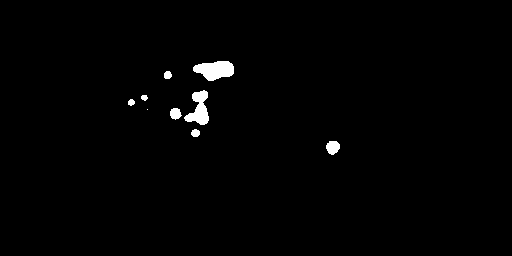

^^^^^^^^^^^^


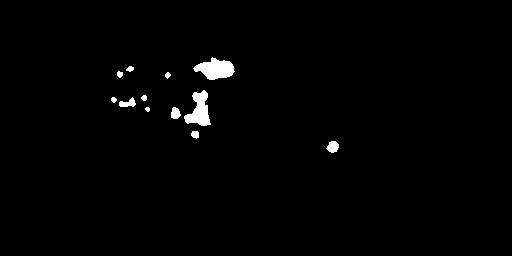

*************


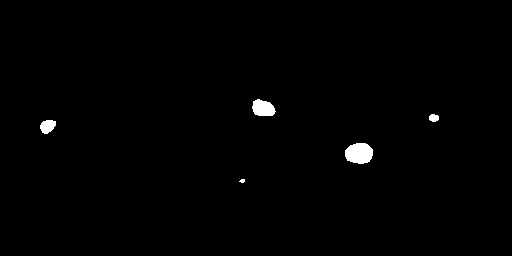

^^^^^^^^^^^^


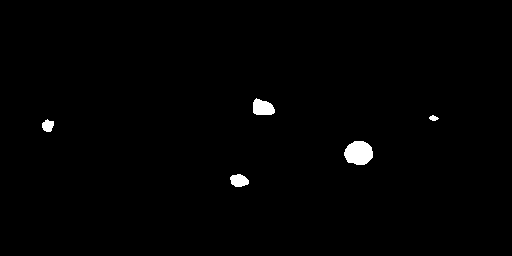

*************


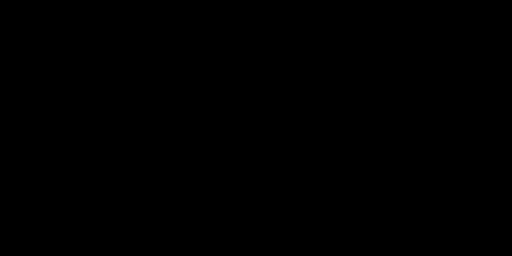

^^^^^^^^^^^^


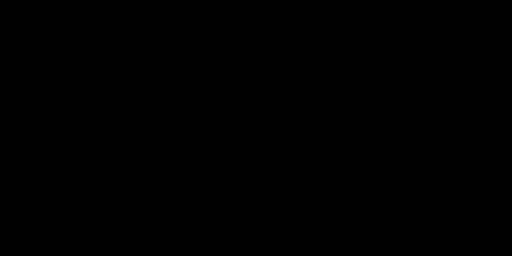

*************


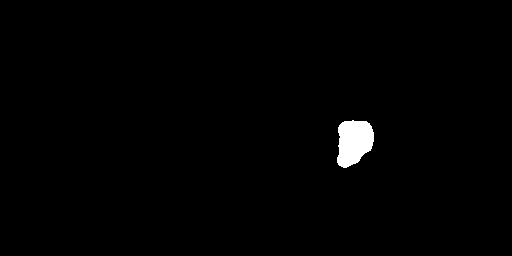

^^^^^^^^^^^^


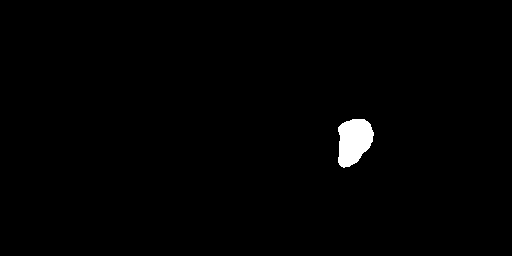

*************


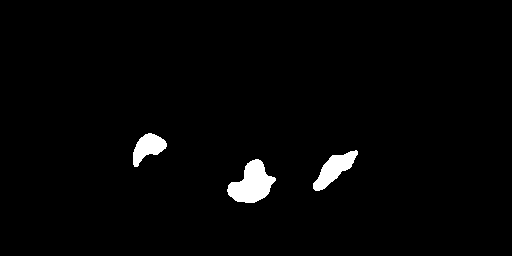

^^^^^^^^^^^^


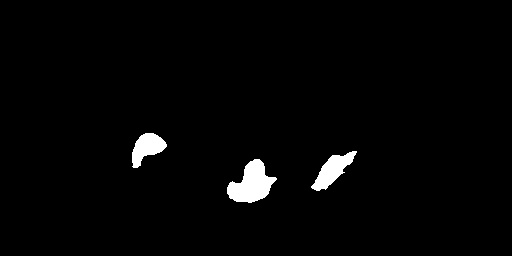

*************


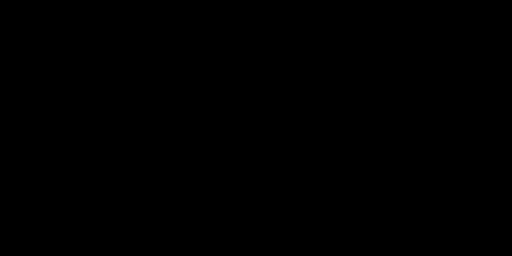

^^^^^^^^^^^^


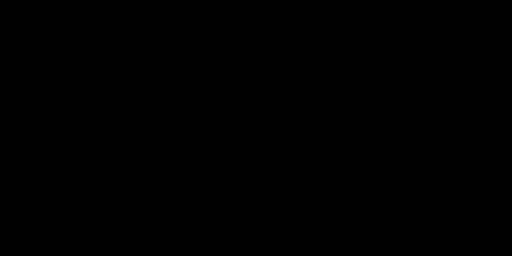

*************


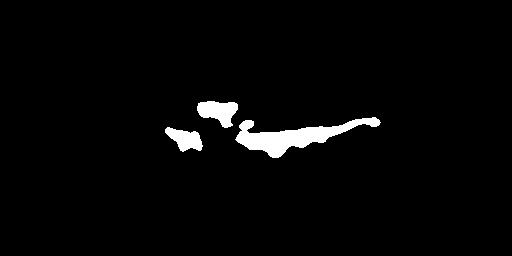

^^^^^^^^^^^^


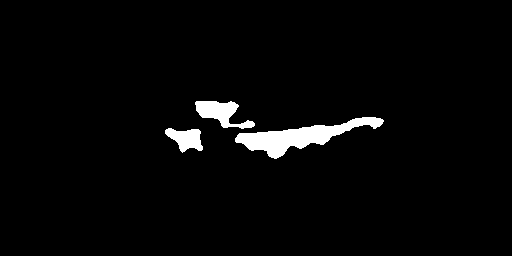

*************


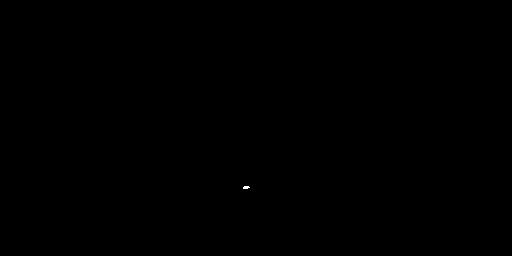

^^^^^^^^^^^^


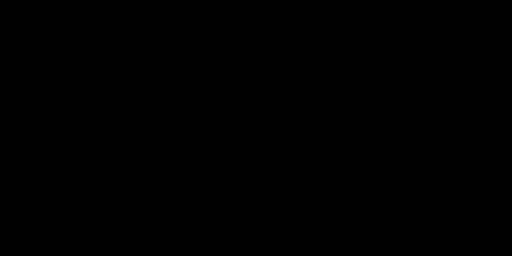

*************


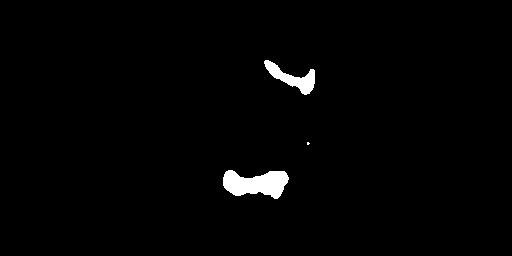

^^^^^^^^^^^^


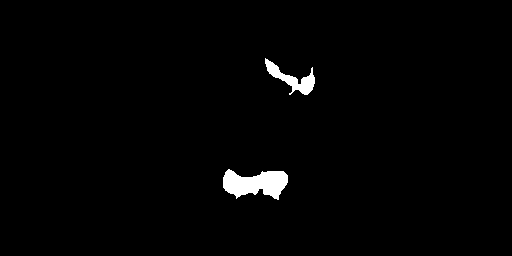

*************


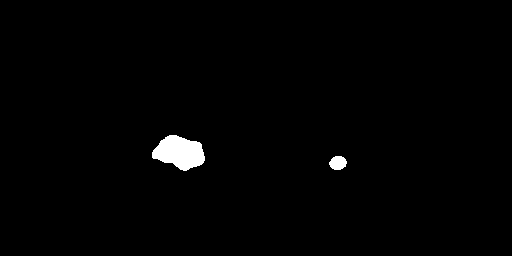

^^^^^^^^^^^^


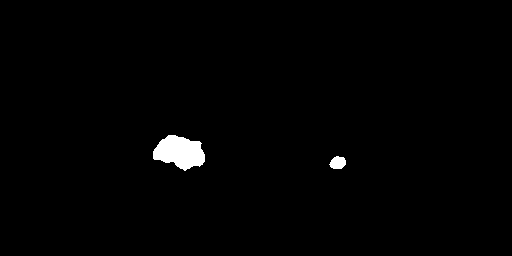

*************


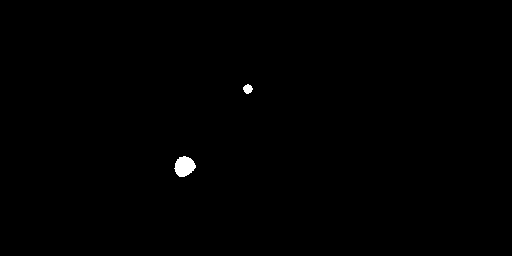

^^^^^^^^^^^^


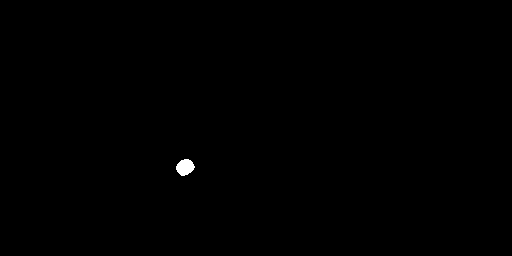

*************


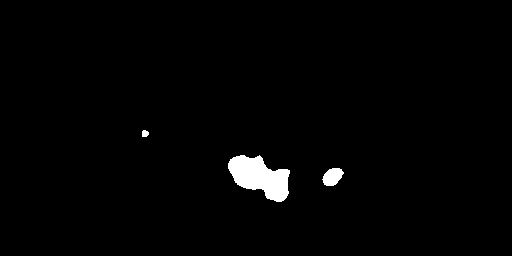

^^^^^^^^^^^^


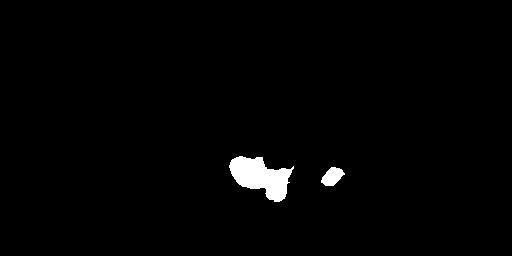

*************


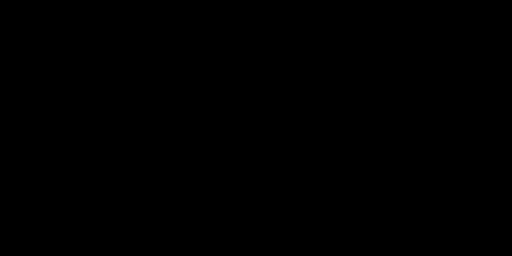

^^^^^^^^^^^^


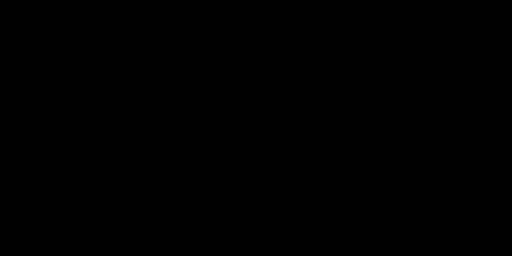

*************


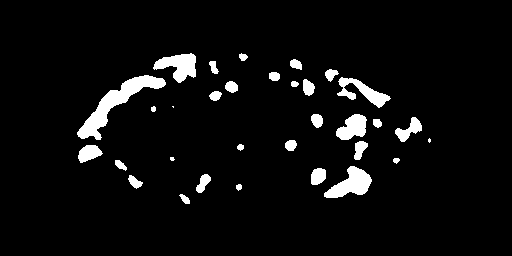

^^^^^^^^^^^^


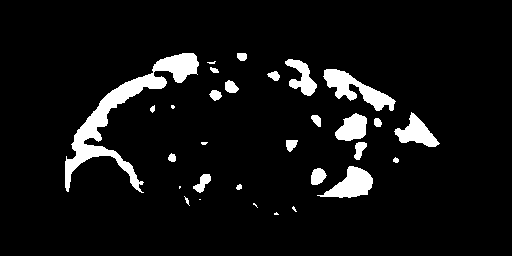

*************


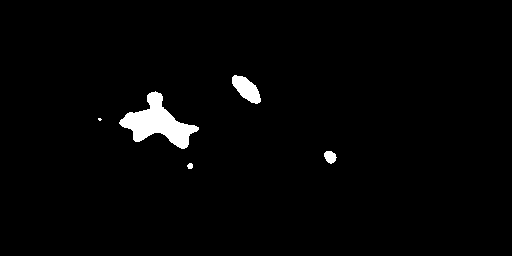

^^^^^^^^^^^^


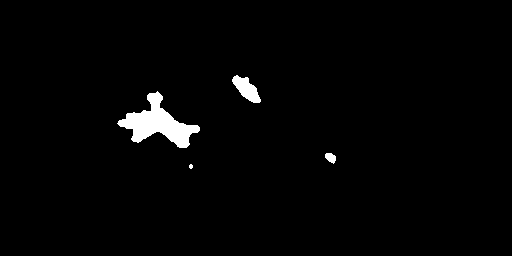

*************


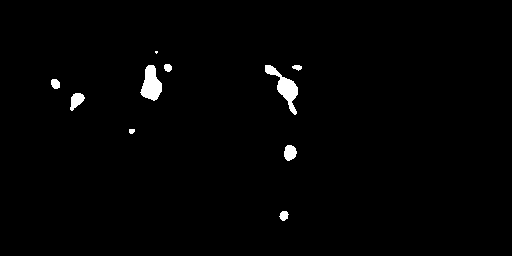

^^^^^^^^^^^^


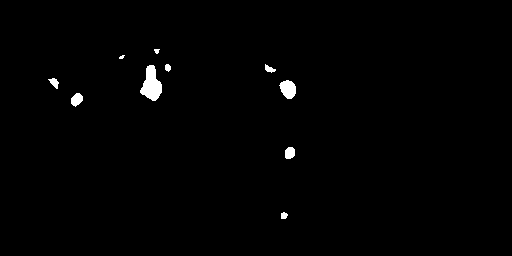

*************


In [ ]:
for index,val in enumerate(prediction):
  cv2_imshow(val*255)
  print("^^^^^^^^^^^^")
  cv2_imshow(test[1][index]*255)
  print("*************")